In [1]:
import json
import numpy 
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import pyarrow
import sys
from tqdm import tqdm
import seaborn as sns
from datetime import date
from dotenv import load_dotenv
from sqlalchemy import create_engine
from os import path
from typing import List,Dict, Tuple
from collections import defaultdict
pd.set_option("display.max_columns", None)

load_dotenv(verbose=True)
BIGQUERY_CREDENTIALS_PATH = os.environ.get('BIGQUERY_CREDENTIALS_PATH')
engine = create_engine('bigquery://bespoke-financial/ProdMetrcData', credentials_path=os.path.expanduser(BIGQUERY_CREDENTIALS_PATH))

sys.path.append(path.realpath(path.join(os.getcwd(), "../core")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../src")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../scripts")))

import create_queries
import prepare_data

from bespoke.inventory.analysis.shared import download_util, inventory_types
from bespoke.inventory.analysis import active_inventory_util as util
from bespoke.inventory.analysis import inventory_valuations_util as valuations_util
from underwriting import msrp_band_analyzer

%load_ext autoreload
%autoreload 2

/Users/victoria/GitHub/venvs/bespoke/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# mba = msrp_band_analyzer.MSRPBand()
# mba.update_company_data(['DF'])
# mba.output_time_series_metadata()

In [3]:
ca_cat_list_sale = [
'Flower (packaged eighth - each)',
 'Edible (volume - each)'
]

In [60]:
ca_prod_list_sale = [
'Infused jeeter 1g - Maui Wowie',
'Infused Baby Jeeter - Blue Zkittlez 0.5g x 5',
'Baby Jeeter - Tropicana Cookies',
'Baby Jeeter - Blue Zkittlez',
'Infused Baby Jeeter - Strawberry Shortcake',
'Infused Baby Jeeter Grape Ape',
'Baby Jeeter - Blueberry Kush',
'Infused Baby Jeeter Durban Poison',
'Baby Jeeter - Fire OG',
'Baby Jeeter - Grapefruit Romulan',
'Baby Jeeter - Honeydew',
'Baby Jeeter - Watermelon Zkittlez',
'Infused Baby Jeeter - Mai Tai',
'Infused Baby Jeeter - Apple Fritter 0.5g x 5',
'Infused Baby Jeeter - Watermelon Zkittlez 0.5g x 5',
'Infused Baby Jeeter - Strawberry Shortcake 0.5g x 5',
'Infused Baby Jeeter - Grape Ape 0.5g x 5',
'Infused Baby Jeeter - Peach Ringz 0.5g x 5',
'Infused Baby Jeeter - Maui Wowie 0.5g x 5',
'Infused Baby Jeeter - Blueberry Kush 0.5g x 5',
'Infused Baby Jeeter - Gelato #33',
'Baby Jeeter - Maui Wowie',
'Infused Baby Jeeter - Banana Kush 0.5g x 5',
'Infused Baby Jeeter - Churros 0.5g x 5',
'Baby Jeeter - Limoncello',
'Baby Jeeter - Banana Kush',
'Infused Baby Jeeter - Peach Ringz',
'Jeeter Juice 1g Vape Cartridge Strawberry Cheesecake'
]

In [5]:
ca_cat_list_cost = [
 'Flower (packaged eighth - each)',
 'Edible (volume - each)']

In [49]:
ca_prod_list_cost = [
'Camino Gummies Midnight Blueberry',
'WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack',
'Pacific Stone Flower 7.0g Pouch Indica Wedding Cake (16ct)',
'Pacific Stone Preroll 0.5g Indica Wedding Cake 14-Pack 7.0g (16ct)'
]

# RUN FOR ALL CA 

In [61]:
CA_COMPANY_IDENTIFIER_LIST = [
    'EMA',
    'EMM',
    'EMT',
    'EMF',
    'ST',
    'GRG',
    'EL',
    #'TT',
    'MD',
    'GHC',
    'SV',
    '99HT'
]

# Run product cat for Cost

EMA
Verifying download summaries for license C10-0000774-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-05-11

Verifying download summaries for license C10-0000695-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-02-09

Verifying download summaries for license C10-0000786-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-02-09

Verifying download summaries for license C10-0000939-LIC...
Earliest download summary: 2022-01-25
Latest download summary: 2022-02-09

[SUCCESS] All download summaries look good!
[FAILURE] Fxound a total of 42 unknown transfer packages
97.0% of incoming transfer packages have receiver wholesale price
# transactions missing incoming transfer package: 5 (0.0038380349261178275%)
# transactions total: 130275
# receipts with mismatching transactions: 0 (0.0%)
# receipts missing transactions: 0 (0.0%)
# receipts total: 57971
### Adding new columns calculated by average price per unit ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['edible' 'flower' 'vape cartridge' 'capsule' 'topical' 'extract'
 'pre-roll flower' 'tincture' 'other concentrate' 'pre-roll infused'
 'pre-roll leaf' 'shake' 'seeds' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['flower' 'pre-roll flower' 'edible' 'pre-roll leaf' 'pre-roll infused'
 'topical' 'vape cartridge' 'tincture' 'extract' 'capsule'
 'other concentrate' 'shake' 'infused butter/oil' 'seeds']
EMAFlower (packaged eighth - each)
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.9497964721845319 %


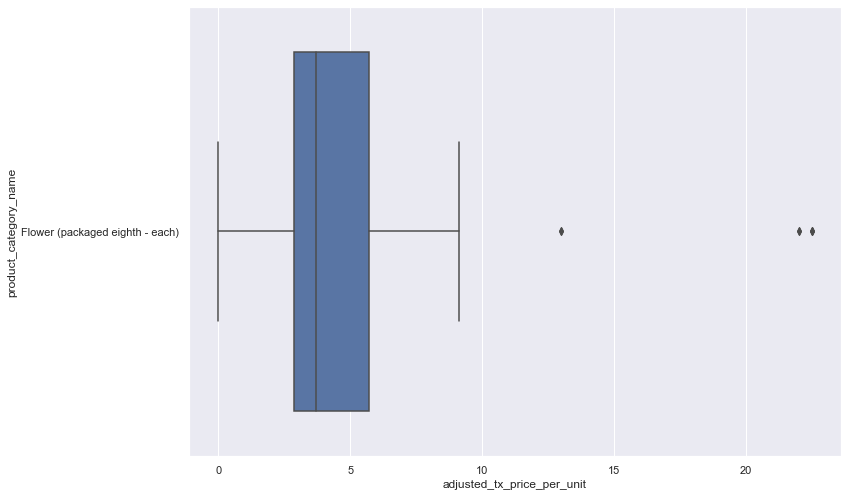

### Checking histogram distribution of MSRP for given product_category_name ### 	
Total number of transactions for Flower (packaged eighth - each) in product_category_name : 730


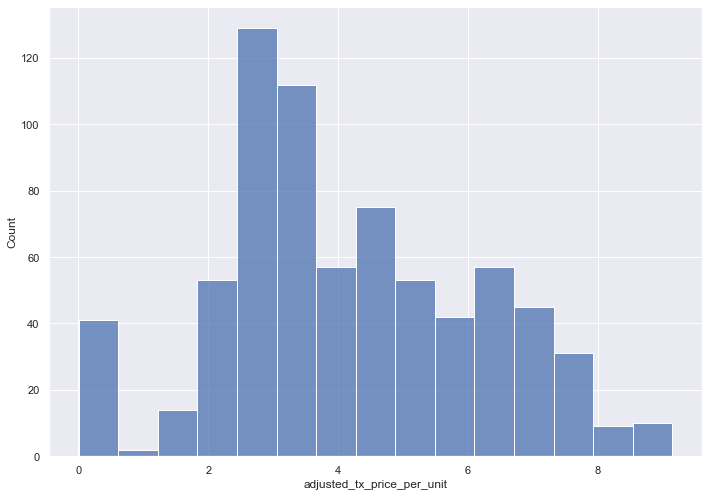

### Outputting summary table ### 	
count    730.00
mean       4.16
std        1.97
min        0.01
25%        2.86
50%        3.71
75%        5.71
max        9.14
Name: Flower (packaged eighth - each), dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean   std   min   25%   50%   75%   max
date_in_month                                                 
2021-01         29.0  4.67  1.49  2.86  3.57  4.29  5.65  8.00
2021-02          6.0  3.52  1.15  2.71  2.75  3.21  3.57  5.71
2021-03         45.0  3.97  1.85  0.01  2.86  3.71  5.14  7.43
2021-04         45.0  4.27  1.90  0.95  2.57  3.71  6.10  7.71
2021-05         47.0  3.87  2.18  0.01  2.79  3.71  5.57  7.71
2021-06         60.0  4.05  2.17  0.03  2.71  3.64  6.00  8.57
2021-07         41.0  4.12  2.15  0.29  2.71  3.57  5.29  9.14
2021-08         78.0  4.21  2.34  0.07  2.57  3.57  6.00  8.43
2021-09         43.0  4.22  1.28  2.29  3.57  3.57  5.11  7.14
2021-10         34.0  3.9

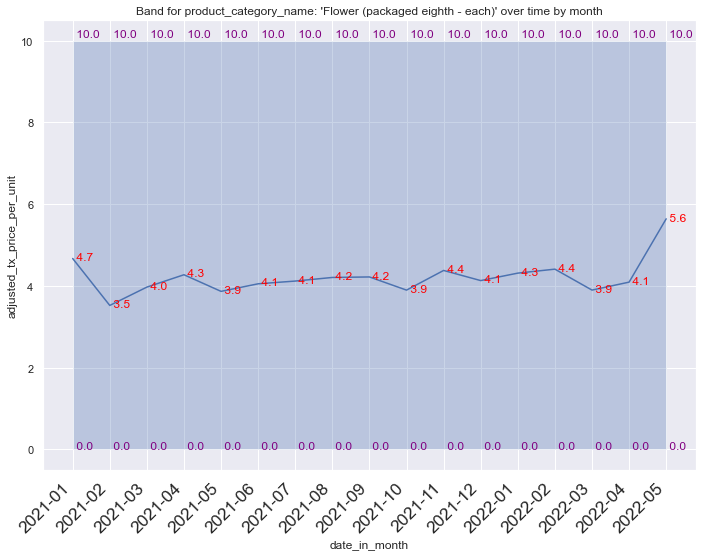

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-01                          0.0                   10.0
2021-02                          0.0                   10.0
2021-03                          0.0                   10.0
2021-04                          0.0                   10.0
2021-05                          0.0                   10.0
2021-06                          0.0                   10.0
2021-07                          0.0                   10.0
2021-08                          0.0                   10.0
2021-09                          0.0                   10.0
2021-10                          0.0                   10.0
2021-11                          0.0                   10.0
2021-12                          0.0                   10.0
2022-01                          0.0                   10.0
2022-02                          0.0                   10.0
2022-03                          0.0    

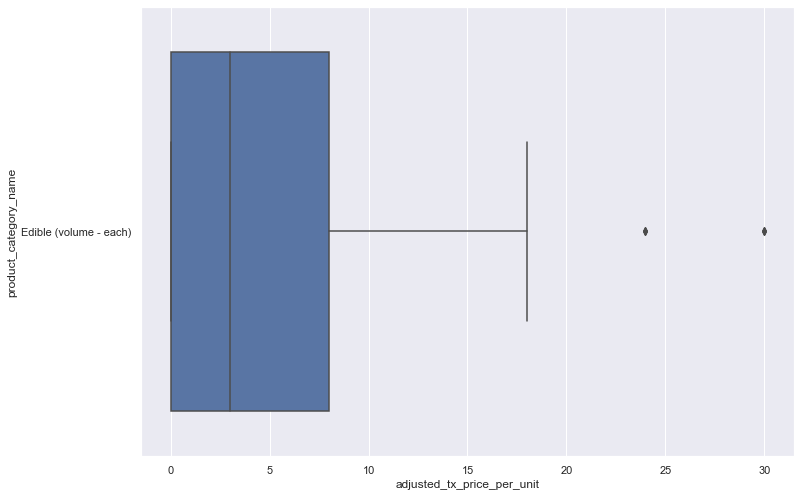

### Checking histogram distribution of MSRP for given product_category_name ### 	
Total number of transactions for Edible (volume - each) in product_category_name : 266


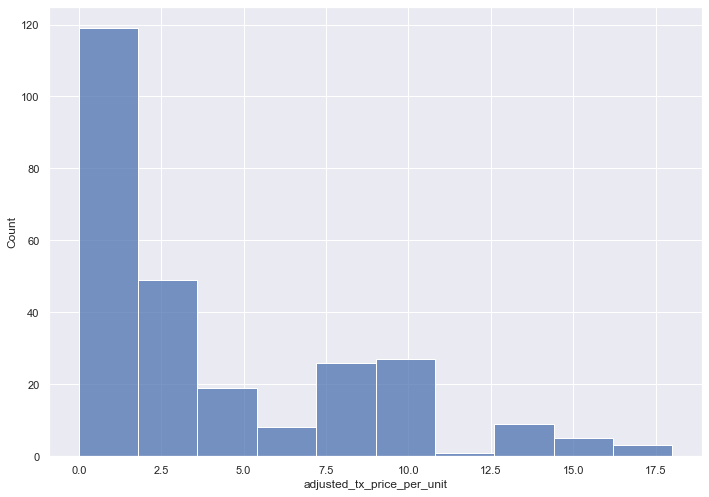

### Outputting summary table ### 	
count    266.00
mean       3.85
std        4.47
min        0.00
25%        0.04
50%        3.00
75%        8.00
max       18.00
Name: Edible (volume - each), dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean   std   min   25%   50%    75%   max
date_in_month                                                  
2021-01         25.0  4.87  3.79  0.05  2.50  4.00   8.00  13.0
2021-02         22.0  3.27  4.05  0.05  0.05  2.62   3.88  15.0
2021-03          5.0  4.38  3.45  0.05  3.00  3.00   7.83   8.0
2021-04         25.0  4.77  4.30  0.03  0.04  3.50   8.00  13.0
2021-05          3.0  8.70  8.97  0.10  4.05  8.00  13.00  18.0
2021-06         15.0  4.24  4.74  0.01  0.04  2.50   7.00  15.0
2021-07         19.0  5.18  5.42  0.01  0.04  3.00   9.50  17.0
2021-08         17.0  4.35  4.87  0.01  0.03  3.00   8.00  13.0
2021-09          9.0  4.73  5.55  0.01  0.01  3.50   5.00  17.0
2021-10          9.0  3

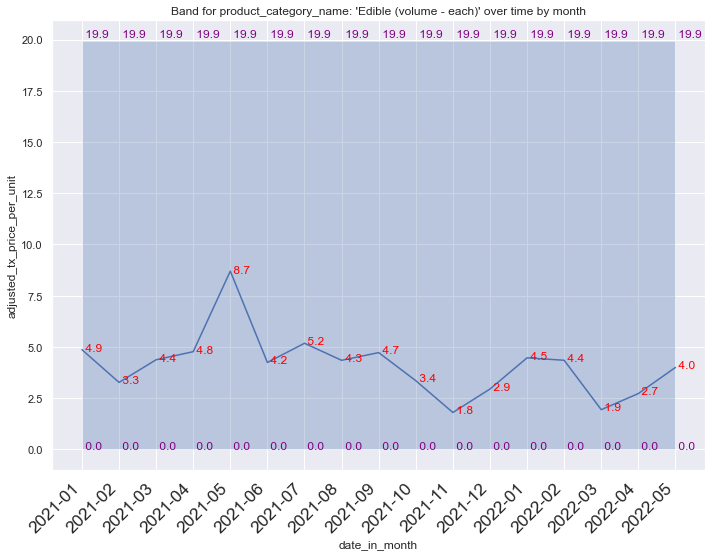

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-01                          0.0              19.939732
2021-02                          0.0              19.939732
2021-03                          0.0              19.939732
2021-04                          0.0              19.939732
2021-05                          0.0              19.939732
2021-06                          0.0              19.939732
2021-07                          0.0              19.939732
2021-08                          0.0              19.939732
2021-09                          0.0              19.939732
2021-10                          0.0              19.939732
2021-11                          0.0              19.939732
2021-12                          0.0              19.939732
2022-01                          0.0              19.939732
2022-02                          0.0              19.939732
2022-03                          0.0    

In [8]:
#cost + unit convert
cost_dict_minmax_tf = {}
for company in CA_COMPANY_IDENTIFIER_LIST: 
    print(company)
    mba = msrp_band_analyzer.MSRPBand()
    mba.update_company_data([company])
    mba.output_time_series_metadata()
    for c in ca_cat_list_cost:
        print(company + c)
        k = company + '-' + c
        _ = mba.run_analysis('product_category_name', c, 'C','minmax',use_unit_converted_price = True,ignore_non_unit_extractable_rows = False)
        cost_dict_minmax_tf[k] = mba.msrp_summary_table_by_time


In [9]:
flower_cost = []
for company in CA_COMPANY_IDENTIFIER_LIST:
    k = company + '-' + 'Flower (packaged eighth - each)'
    data = pd.DataFrame({k:cost_dict_minmax_tf[k]['mean']})
    flower_cost.append(data)
flower_cost_df = pd.concat(flower_cost,axis = 1).sort_values(by = 'date_in_month')

edible_v_cost = []
for company in CA_COMPANY_IDENTIFIER_LIST:
    k = company + '-' + 'Edible (volume - each)'
    data = pd.DataFrame({k:cost_dict_minmax_tf[k]['mean']})
    edible_v_cost.append(data)
edible_v_cost_df = pd.concat(edible_v_cost,axis = 1).sort_values(by = 'date_in_month')

In [10]:
flower_cost_df = flower_cost_df.reset_index()
flower_cost_df.columns = ['date_in_month',    
    'EMA',
#     'EMM',
#     'EMT',
#     'EMF',
#     'ST',
#     'GRG',
#     'EL',
#     'MD',
#     'GHC',
#     'SV',
#     '99HT'
    ]
flower_cost_df

date_in_month   EMA
0        2021-01  4.67
1        2021-02  3.52
2        2021-03  3.97
3        2021-04  4.27
4        2021-05  3.87
5        2021-06  4.05
6        2021-07  4.12
7        2021-08  4.21
8        2021-09  4.22
9        2021-10  3.90
10       2021-11  4.38
11       2021-12  4.13
12       2022-01  4.31
13       2022-02  4.41
14       2022-03  3.90
15       2022-04  4.09
16       2022-05  5.64

In [11]:
edible_v_cost_df = edible_v_cost_df.reset_index()
edible_v_cost_df.columns = ['date_in_month',    'EMA',
#     'EMM',
#     'EMT',
#     'EMF',
#     'ST',
#     'GRG',
#     'EL',
#     'MD',
#     'GHC',
#     'SV',
#     '99HT'
                           ]
edible_v_cost_df

date_in_month   EMA
0        2021-01  4.87
1        2021-02  3.27
2        2021-03  4.38
3        2021-04  4.77
4        2021-05  8.70
5        2021-06  4.24
6        2021-07  5.18
7        2021-08  4.35
8        2021-09  4.73
9        2021-10  3.35
10       2021-11  1.80
11       2021-12  2.95
12       2022-01  4.47
13       2022-02  4.35
14       2022-03  1.94
15       2022-04  2.73
16       2022-05  4.00

# Run for Sale

EMA
Verifying download summaries for license C10-0000774-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-05-11

Verifying download summaries for license C10-0000695-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-02-09

Verifying download summaries for license C10-0000786-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-02-09

Verifying download summaries for license C10-0000939-LIC...
Earliest download summary: 2022-01-25
Latest download summary: 2022-02-09

[SUCCESS] All download summaries look good!
[FAILURE] Fxound a total of 42 unknown transfer packages
97.0% of incoming transfer packages have receiver wholesale price
# transactions missing incoming transfer package: 5 (0.0038380349261178275%)
# transactions total: 130275
# receipts with mismatching transactions: 0 (0.0%)
# receipts missing transactions: 0 (0.0%)
# receipts total: 57971
### Adding new columns calculated by average price per unit ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['edible' 'flower' 'vape cartridge' 'capsule' 'topical' 'extract'
 'pre-roll flower' 'tincture' 'other concentrate' 'pre-roll infused'
 'pre-roll leaf' 'shake' 'seeds' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['flower' 'pre-roll flower' 'edible' 'pre-roll leaf' 'pre-roll infused'
 'topical' 'vape cartridge' 'tincture' 'extract' 'capsule'
 'other concentrate' 'shake' 'infused butter/oil' 'seeds']
EMAFlower (packaged eighth - each)
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.599559658542238 %


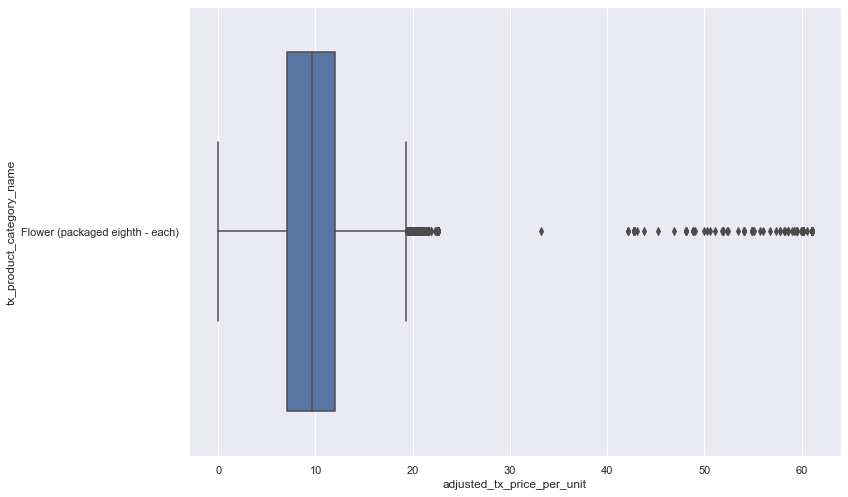

### Checking histogram distribution of MSRP for given tx_product_category_name ### 	
Total number of transactions for Flower (packaged eighth - each) in tx_product_category_name : 25216


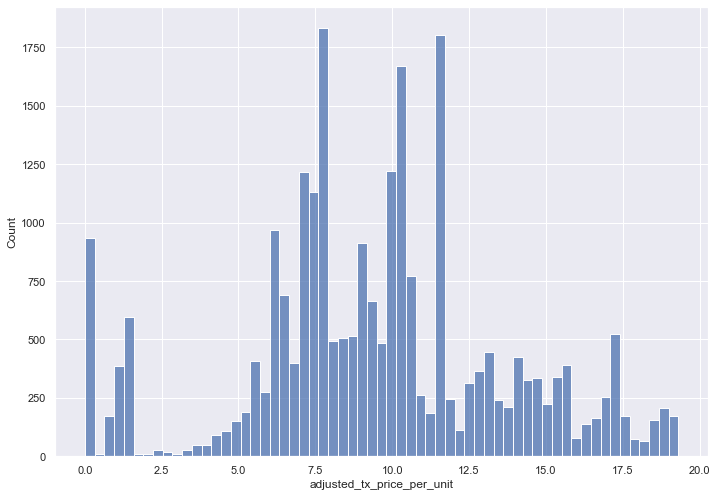

### Outputting summary table ### 	
count    25216.00
mean         9.47
std          4.25
min          0.01
25%          7.03
50%          9.37
75%         11.71
max         19.31
Name: Flower (packaged eighth - each), dtype: float64
### Outputting summary table by time broken down in months ### 	
                count   mean   std   min   25%    50%    75%    max
date_in_month                                                      
2021-01         150.0   9.97  4.07  0.08  7.81   9.89  12.03  19.27
2021-02         701.0   9.89  2.75  0.16  7.81   9.37  11.71  19.27
2021-03         973.0  10.45  2.98  0.20  8.67   9.87  11.71  19.27
2021-04        1257.0   9.74  3.96  0.15  7.03   9.84  12.65  19.27
2021-05        1169.0  10.61  4.18  0.18  7.64  10.03  13.67  19.27
2021-06        1200.0  10.56  4.48  0.16  7.09   9.26  15.04  19.31
2021-07        1824.0   9.63  4.26  0.23  6.59   9.14  12.50  19.29
2021-08        2040.0   9.29  4.13  0.07  6.79   8.85  11.71  19.31
2021-09        1613.0 

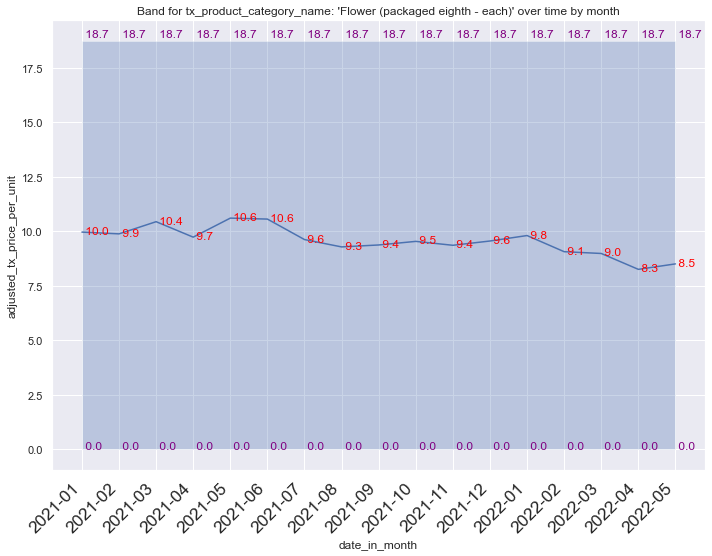

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-01                 2.664535e-15              18.742857
2021-02                 2.664535e-15              18.742857
2021-03                 2.664535e-15              18.742857
2021-04                 2.664535e-15              18.742857
2021-05                 2.664535e-15              18.742857
2021-06                 2.664535e-15              18.742857
2021-07                 2.664535e-15              18.742857
2021-08                 2.664535e-15              18.742857
2021-09                 2.664535e-15              18.742857
2021-10                 2.664535e-15              18.742857
2021-11                 2.664535e-15              18.742857
2021-12                 2.664535e-15              18.742857
2022-01                 2.664535e-15              18.742857
2022-02                 2.664535e-15              18.742857
2022-03                 2.664535e-15    

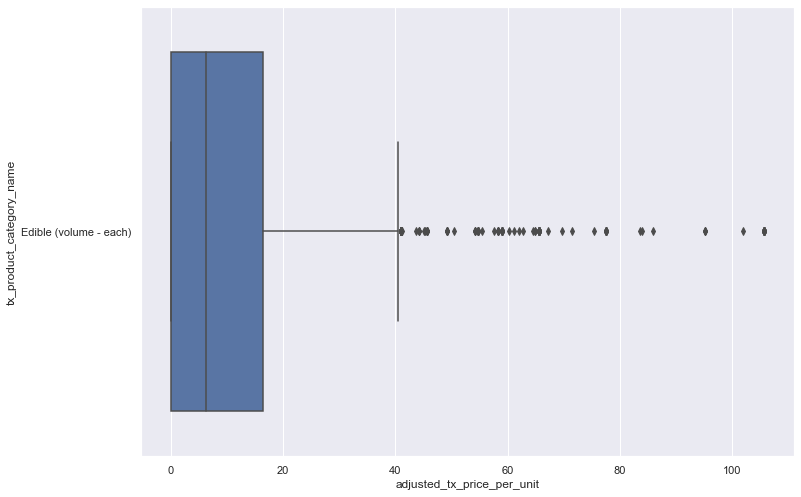

### Checking histogram distribution of MSRP for given tx_product_category_name ### 	
Total number of transactions for Edible (volume - each) in tx_product_category_name : 6248


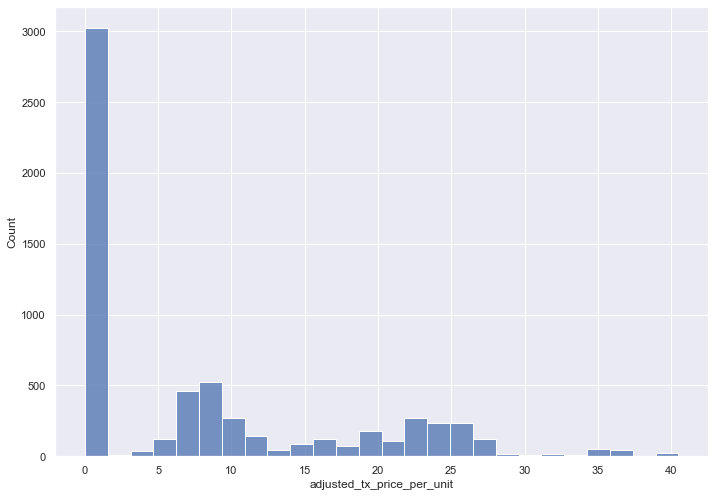

### Outputting summary table ### 	
count    6248.00
mean        8.28
std        10.00
min         0.00
25%         0.08
50%         5.74
75%        14.76
max        40.50
Name: Edible (volume - each), dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean    std   min   25%    50%    75%    max
date_in_month                                                      
2021-01        111.0   6.37   8.04  0.03  0.07   4.10   9.84  35.54
2021-02        350.0   9.65   9.26  0.00  0.15   8.20  16.40  35.54
2021-03        375.0  13.19   9.09  0.06  7.29  10.02  21.51  39.82
2021-04        579.0   9.27   9.27  0.00  0.82   7.38  15.31  39.22
2021-05        459.0   6.41   8.54  0.00  0.02   0.26  10.02  36.90
2021-06        326.0   9.24  10.85  0.00  0.11   7.29  15.82  40.50
2021-07        386.0   9.63  11.52  0.00  0.08   6.08  19.44  40.50
2021-08        381.0   7.76  10.26  0.00  0.07   0.46  10.80  39.17
2021-09        428.0   7.18   9.36  0.0

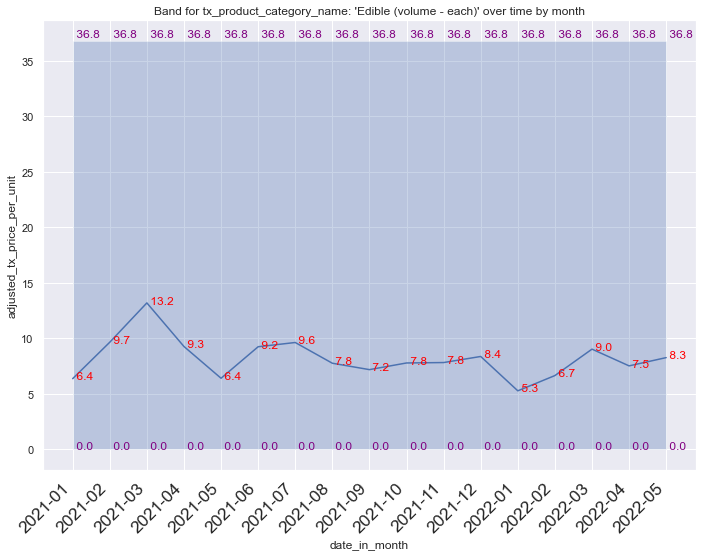

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-01                          0.0              36.784687
2021-02                          0.0              36.784687
2021-03                          0.0              36.784687
2021-04                          0.0              36.784687
2021-05                          0.0              36.784687
2021-06                          0.0              36.784687
2021-07                          0.0              36.784687
2021-08                          0.0              36.784687
2021-09                          0.0              36.784687
2021-10                          0.0              36.784687
2021-11                          0.0              36.784687
2021-12                          0.0              36.784687
2022-01                          0.0              36.784687
2022-02                          0.0              36.784687
2022-03                          0.0    

In [12]:
#sale
sale_dict_minmax_tf = {}
for company in CA_COMPANY_IDENTIFIER_LIST: 
    print(company)
    mba = msrp_band_analyzer.MSRPBand()
    mba.update_company_data([company])
    mba.output_time_series_metadata()
    for c in ca_cat_list_sale:
        print(company + c)
        k = company + '-' + c
        _ = mba.run_analysis('tx_product_category_name', c, 'S','minmax',use_unit_converted_price = True,ignore_non_unit_extractable_rows = False)
        sale_dict_minmax_tf[k] = mba.msrp_summary_table_by_time


In [19]:
flower_price = []
for company in CA_COMPANY_IDENTIFIER_LIST:
    k = company + '-' + 'Flower (packaged eighth - each)'
    data = pd.DataFrame({k:sale_dict_minmax_tf[k]['mean']})
    flower_price.append(data)
flower_price_df = pd.concat(flower_price,axis = 1).sort_values(by = 'date_in_month')

edible_v_price = []
for company in CA_COMPANY_IDENTIFIER_LIST:
    k = company + '-' + 'Edible (volume - each)'
    data = pd.DataFrame({k:sale_dict_minmax_tf[k]['mean']})
    edible_v_price.append(data)
edible_v_price_df = pd.concat(edible_v_price,axis = 1).sort_values(by = 'date_in_month')

In [20]:
flower_price_df = flower_price_df.reset_index()
flower_price_df.columns = ['date_in_month',    'EMA',
#     'EMM',
#     'EMT',
#     'EMF',
#     'ST',
#     'GRG',
#     'EL',
#     'MD',
#     'GHC',
#     'SV',
#     '99HT'
                          ]
flower_price_df

date_in_month    EMA
0        2021-01   9.97
1        2021-02   9.89
2        2021-03  10.45
3        2021-04   9.74
4        2021-05  10.61
5        2021-06  10.56
6        2021-07   9.63
7        2021-08   9.29
8        2021-09   9.38
9        2021-10   9.54
10       2021-11   9.36
11       2021-12   9.56
12       2022-01   9.81
13       2022-02   9.07
14       2022-03   8.99
15       2022-04   8.26
16       2022-05   8.51

In [17]:
edible_v_price_df

EMA-Edible (volume - each)
date_in_month                            
2021-01                              6.37
2021-02                              9.65
2021-03                             13.19
2021-04                              9.27
2021-05                              6.41
2021-06                              9.24
2021-07                              9.63
2021-08                              7.76
2021-09                              7.18
2021-10                              7.78
2021-11                              7.82
2021-12                              8.37
2022-01                              5.28
2022-02                              6.65
2022-03                              9.03
2022-04                              7.52
2022-05                              8.27

In [18]:
edible_v_price_df = edible_v_price_df.reset_index()
edible_v_price_df.columns = ['date_in_month',    'EMA',
#     'EMM',
#     'EMT',
#     'EMF',
#     'ST',
#     'GRG',
#     'EL',
#     'MD',
#     'GHC',
#     'SV',
#     '99HT'
                            ]
edible_v_price_df

date_in_month    EMA
0        2021-01   6.37
1        2021-02   9.65
2        2021-03  13.19
3        2021-04   9.27
4        2021-05   6.41
5        2021-06   9.24
6        2021-07   9.63
7        2021-08   7.76
8        2021-09   7.18
9        2021-10   7.78
10       2021-11   7.82
11       2021-12   8.37
12       2022-01   5.28
13       2022-02   6.65
14       2022-03   9.03
15       2022-04   7.52
16       2022-05   8.27

# run products on cost

EMA
Verifying download summaries for license C10-0000774-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-05-11

Verifying download summaries for license C10-0000695-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-02-09

Verifying download summaries for license C10-0000786-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-02-09

Verifying download summaries for license C10-0000939-LIC...
Earliest download summary: 2022-01-25
Latest download summary: 2022-02-09

[SUCCESS] All download summaries look good!
[FAILURE] Fxound a total of 42 unknown transfer packages
97.0% of incoming transfer packages have receiver wholesale price
# transactions missing incoming transfer package: 5 (0.0038380349261178275%)
# transactions total: 130275
# receipts with mismatching transactions: 0 (0.0%)
# receipts missing transactions: 0 (0.0%)
# receipts total: 57971
### Adding new columns calculated by average price per unit ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['edible' 'flower' 'tincture' 'vape cartridge' 'topical' 'extract'
 'pre-roll flower' 'capsule' 'other concentrate' 'pre-roll infused'
 'pre-roll leaf' 'shake' 'seeds' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['flower' 'pre-roll flower' 'edible' 'pre-roll leaf' 'pre-roll infused'
 'topical' 'vape cartridge' 'tincture' 'extract' 'capsule'
 'other concentrate' 'shake' 'infused butter/oil' 'seeds']
EMACamino Gummies Midnight Blueberry
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


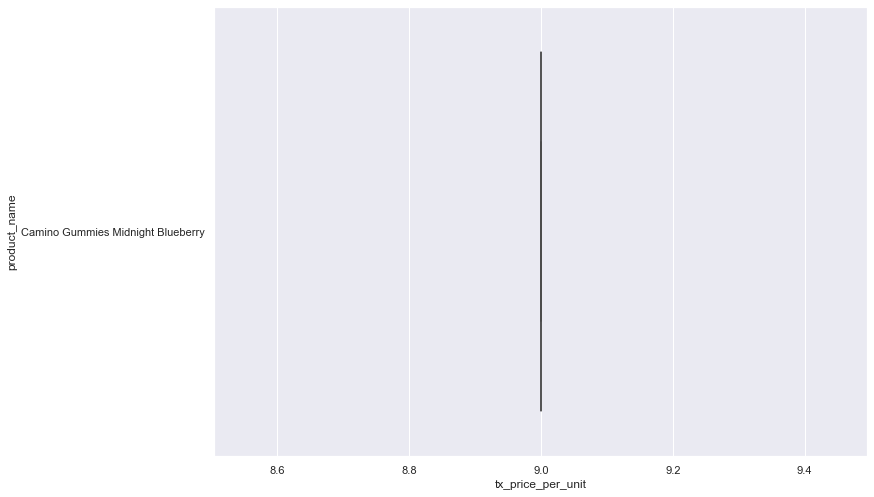

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for Camino Gummies Midnight Blueberry in product_name : 13


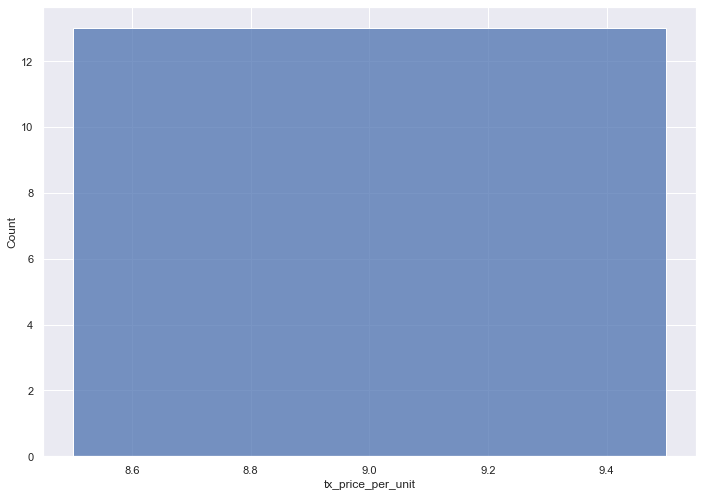

### Outputting summary table ### 	
count    13.0
mean      9.0
std       0.0
min       9.0
25%       9.0
50%       9.0
75%       9.0
max       9.0
Name: Camino Gummies Midnight Blueberry, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std  min  25%  50%  75%  max
date_in_month                                           
2021-01          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-02          2.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2021-03          2.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2021-04          2.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2021-05          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-07          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-10          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-11          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-12          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2022-02          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
### Outputting time series line plot of MSRP alo

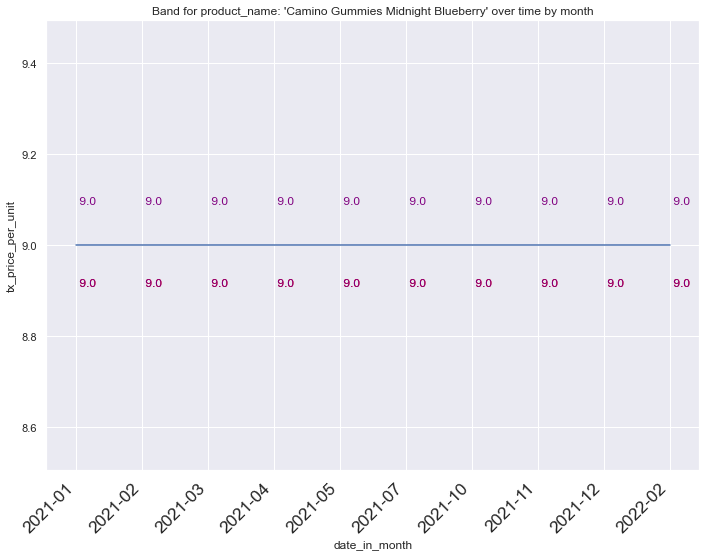

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-01                          9.0                    9.0
2021-02                          9.0                    9.0
2021-03                          9.0                    9.0
2021-04                          9.0                    9.0
2021-05                          9.0                    9.0
2021-07                          9.0                    9.0
2021-10                          9.0                    9.0
2021-11                          9.0                    9.0
2021-12                          9.0                    9.0
2022-02                          9.0                    9.0
EMAWYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 10.526315789473683 %
Number of transactions outliers above Boxplot Whisker 

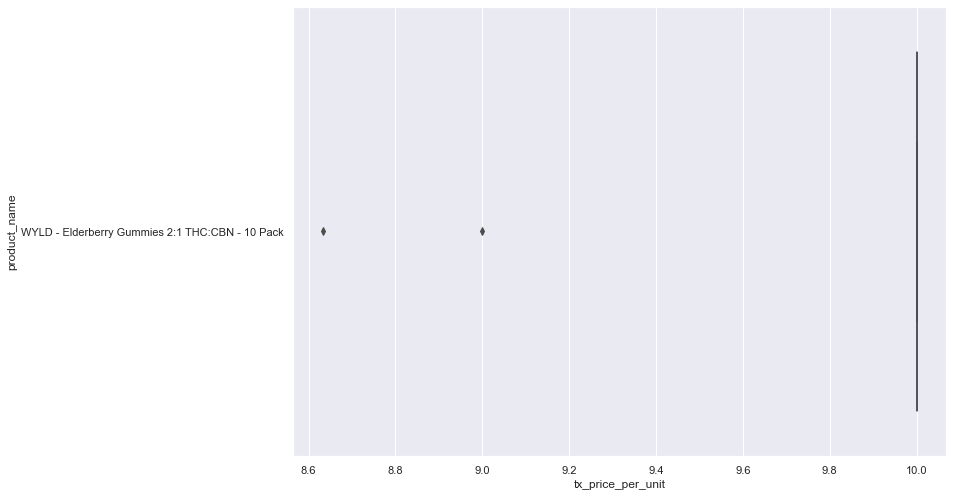

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack in product_name : 17


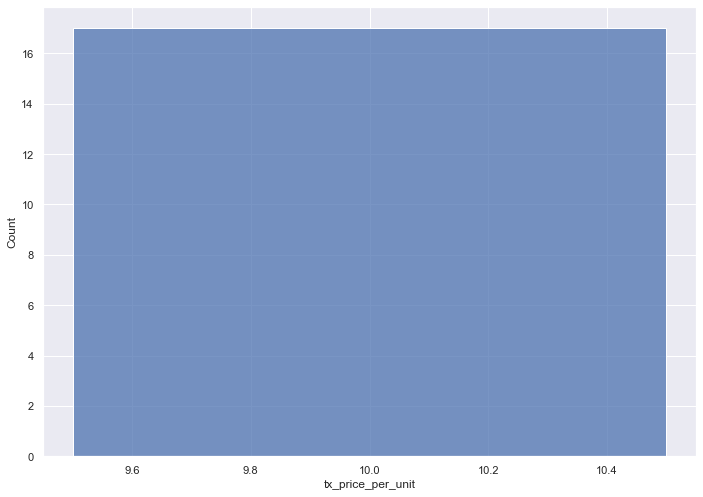

### Outputting summary table ### 	
count    17.0
mean     10.0
std       0.0
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std   min   25%   50%   75%   max
date_in_month                                                
2021-01          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-02          2.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0
2021-03          2.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0
2021-04          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-05          2.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0
2021-06          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-07          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-08          2.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0
2021-11          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-12          2.0  10.0  0.0  10.

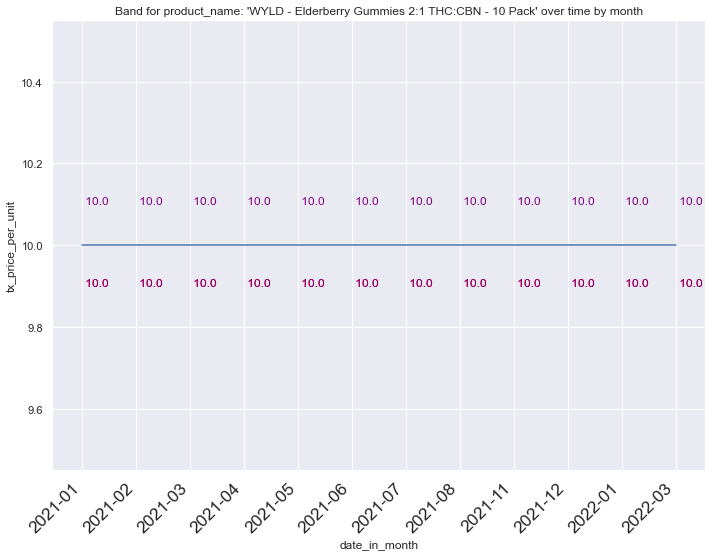

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-01                         10.0                   10.0
2021-02                         10.0                   10.0
2021-03                         10.0                   10.0
2021-04                         10.0                   10.0
2021-05                         10.0                   10.0
2021-06                         10.0                   10.0
2021-07                         10.0                   10.0
2021-08                         10.0                   10.0
2021-11                         10.0                   10.0
2021-12                         10.0                   10.0
2022-01                         10.0                   10.0
2022-03                         10.0                   10.0
EMAPacific Stone Flower 7.0g Pouch Indica Wedding Cake (16ct)
EMAPacific Stone Preroll 0.5g Indica Wedding Cake 14-Pack 7.0g (16ct)
EMM
Verifying download summa

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['flower' 'edible' 'extract' 'vape cartridge' 'pre-roll infused'
 'other concentrate' 'topical' 'pre-roll flower' 'tincture' 'capsule'
 'pre-roll leaf' 'shake' 'seeds' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['edible' 'pre-roll leaf' 'pre-roll flower' 'pre-roll infused' 'flower'
 'other concentrate' 'extract' 'vape cartridge' 'tincture' 'topical'
 'capsule' 'shake' 'infused butter/oil' 'seeds']
EMMCamino Gummies Midnight Blueberry
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


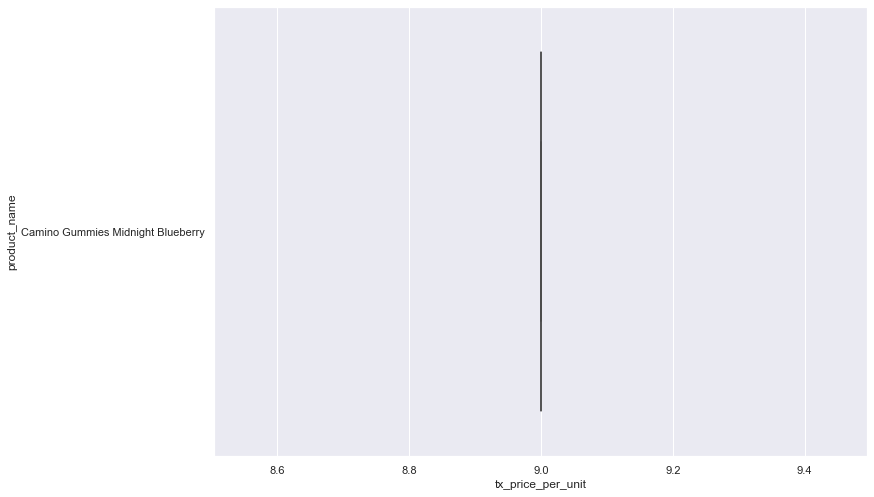

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for Camino Gummies Midnight Blueberry in product_name : 14


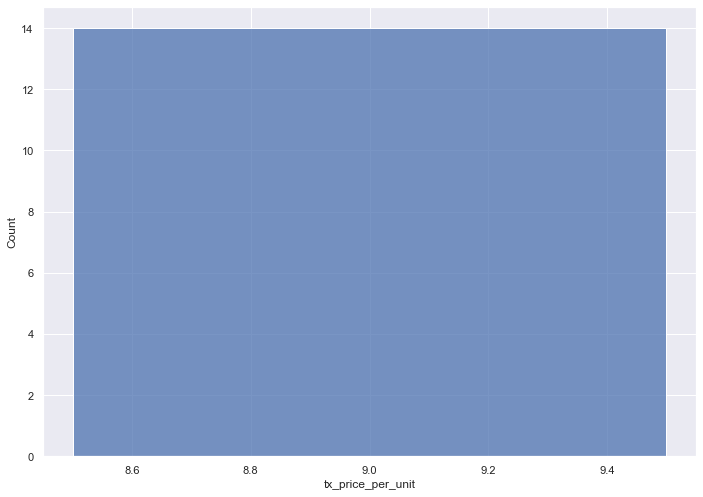

### Outputting summary table ### 	
count    14.0
mean      9.0
std       0.0
min       9.0
25%       9.0
50%       9.0
75%       9.0
max       9.0
Name: Camino Gummies Midnight Blueberry, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std  min  25%  50%  75%  max
date_in_month                                           
2021-03          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-04          3.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2021-05          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-07          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-09          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-10          2.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2021-11          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-12          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2022-01          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2022-03          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2022-04          1.0   9.0  NaN  9.0  9.0  9.0  

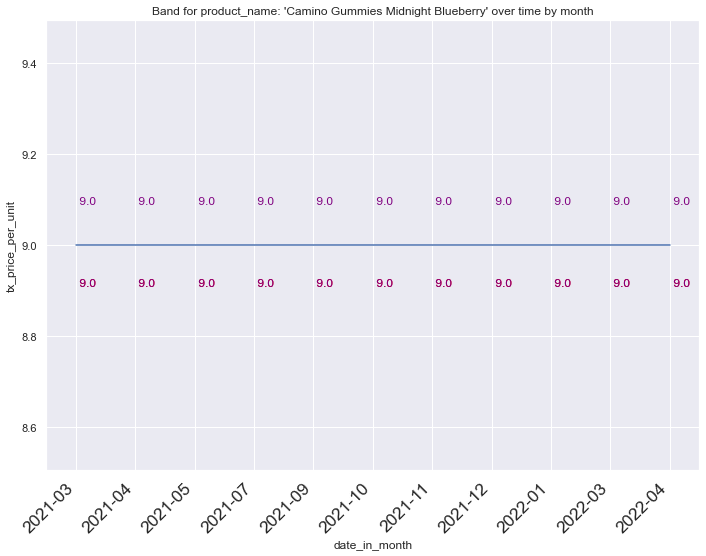

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-03                          9.0                    9.0
2021-04                          9.0                    9.0
2021-05                          9.0                    9.0
2021-07                          9.0                    9.0
2021-09                          9.0                    9.0
2021-10                          9.0                    9.0
2021-11                          9.0                    9.0
2021-12                          9.0                    9.0
2022-01                          9.0                    9.0
2022-03                          9.0                    9.0
2022-04                          9.0                    9.0
EMMWYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 8.3333333333333

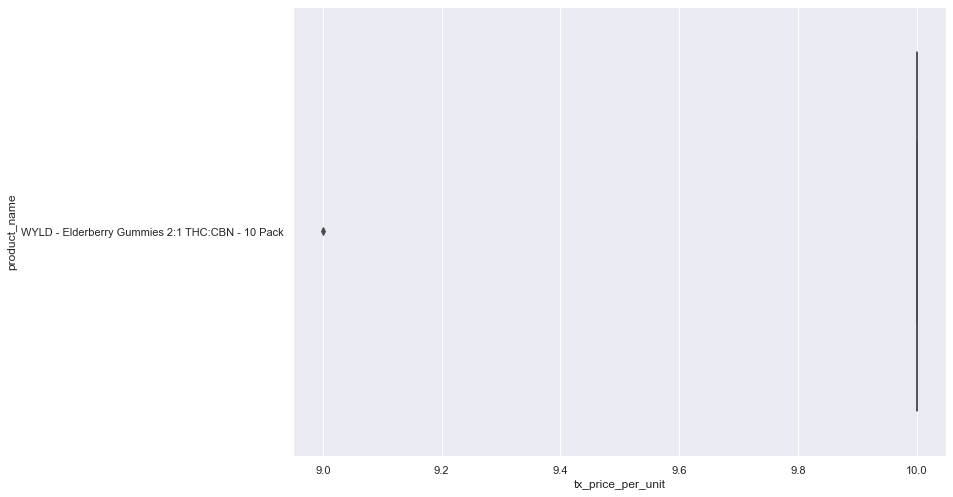

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack in product_name : 11


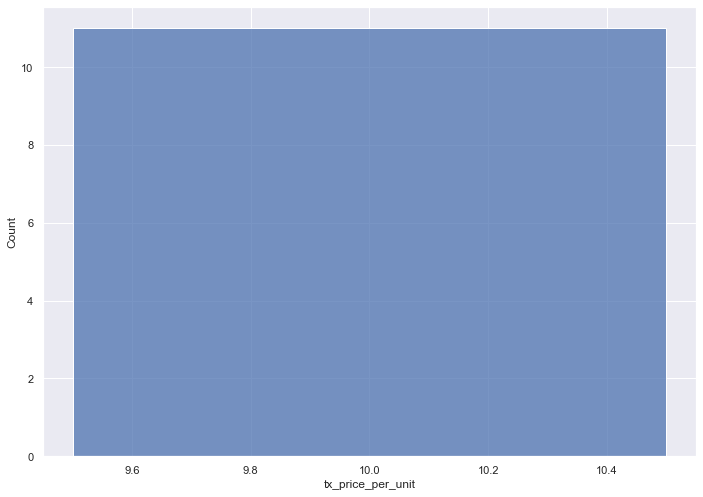

### Outputting summary table ### 	
count    11.0
mean     10.0
std       0.0
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std   min   25%   50%   75%   max
date_in_month                                                
2021-03          2.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0
2021-04          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-06          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-08          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-09          2.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0
2021-11          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-12          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2022-01          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2022-03          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
### Outputting time series line plot

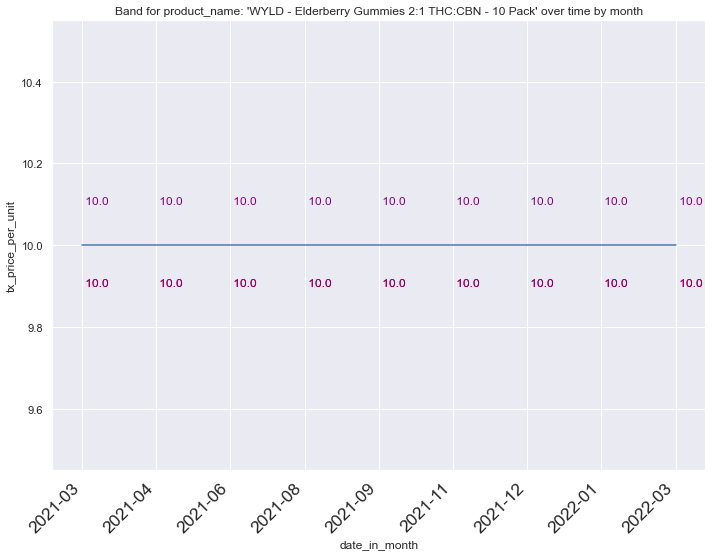

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-03                         10.0                   10.0
2021-04                         10.0                   10.0
2021-06                         10.0                   10.0
2021-08                         10.0                   10.0
2021-09                         10.0                   10.0
2021-11                         10.0                   10.0
2021-12                         10.0                   10.0
2022-01                         10.0                   10.0
2022-03                         10.0                   10.0
EMMPacific Stone Flower 7.0g Pouch Indica Wedding Cake (16ct)
EMMPacific Stone Preroll 0.5g Indica Wedding Cake 14-Pack 7.0g (16ct)
EMT
Verifying download summaries for license C10-0000695-LIC...
Earliest download summary: 2021-11-15
Latest download summary: 2022-05-11
Found bad download summary for license C10-0000695-LIC on date 2022-05

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['edible' 'vape cartridge' 'topical' 'pre-roll flower' 'tincture' 'flower'
 'pre-roll infused' 'other concentrate' 'capsule' 'extract' 'shake'
 'pre-roll leaf' 'seeds' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['capsule' 'vape cartridge' 'topical' 'edible' 'flower' 'pre-roll flower'
 'pre-roll infused' 'other concentrate' 'tincture' 'extract' 'shake'
 'pre-roll leaf' 'infused butter/oil']
EMTCamino Gummies Midnight Blueberry
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.3333333333333335 %


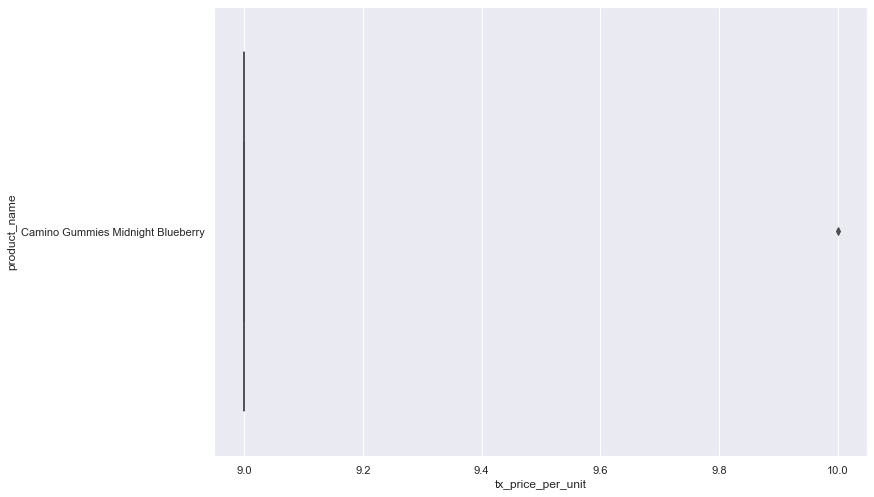

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for Camino Gummies Midnight Blueberry in product_name : 29


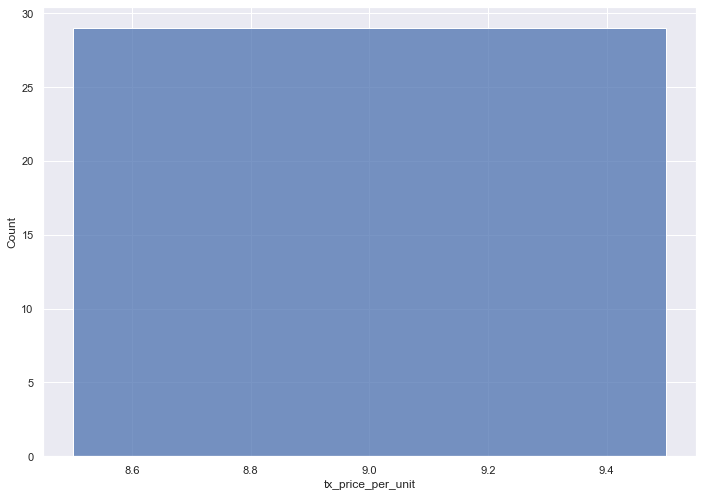

### Outputting summary table ### 	


/Users/victoria/GitHub/venvs/bespoke/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    29.0
mean      9.0
std       0.0
min       9.0
25%       9.0
50%       9.0
75%       9.0
max       9.0
Name: Camino Gummies Midnight Blueberry, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std  min  25%  50%  75%  max
date_in_month                                           
2020-06          2.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2020-07          2.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2020-08          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2020-09          3.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2020-10          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2020-11          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2020-12          2.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2021-01          2.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2021-02          2.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2021-03          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-04          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-06          1.0   9.0

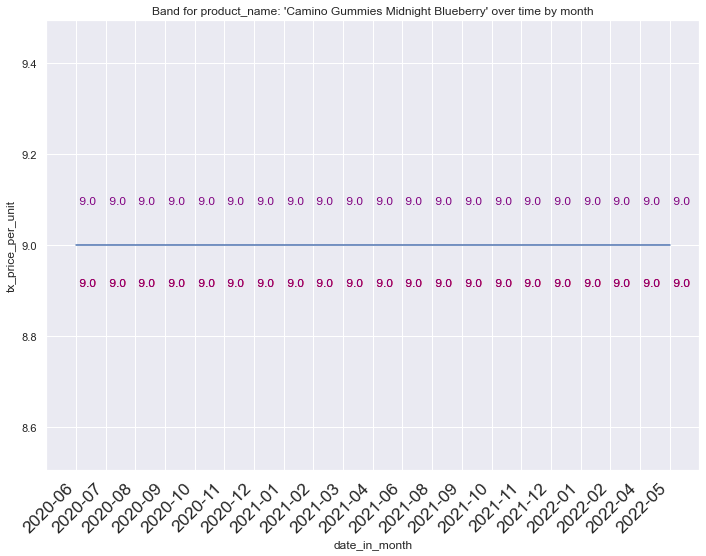

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-06                          9.0                    9.0
2020-07                          9.0                    9.0
2020-08                          9.0                    9.0
2020-09                          9.0                    9.0
2020-10                          9.0                    9.0
2020-11                          9.0                    9.0
2020-12                          9.0                    9.0
2021-01                          9.0                    9.0
2021-02                          9.0                    9.0
2021-03                          9.0                    9.0
2021-04                          9.0                    9.0
2021-06                          9.0                    9.0
2021-08                          9.0                    9.0
2021-09                          9.0                    9.0
2021-10                          9.0    

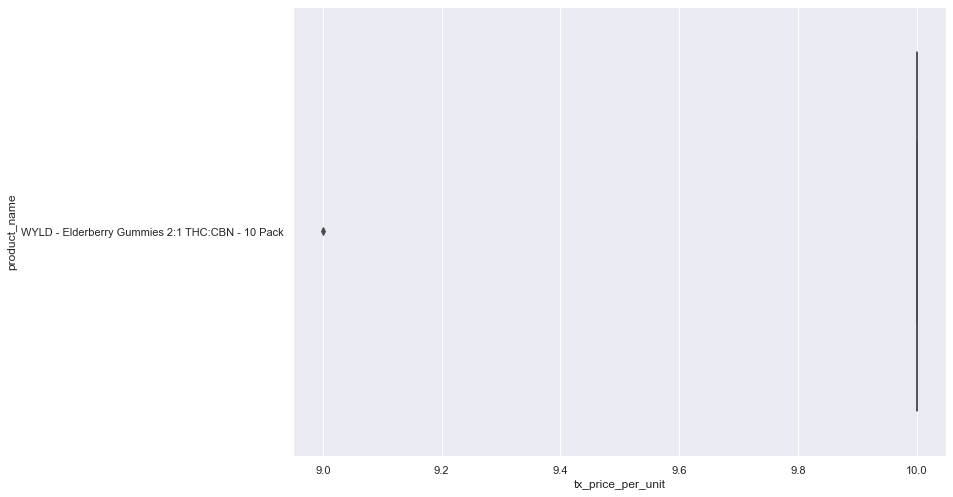

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack in product_name : 7


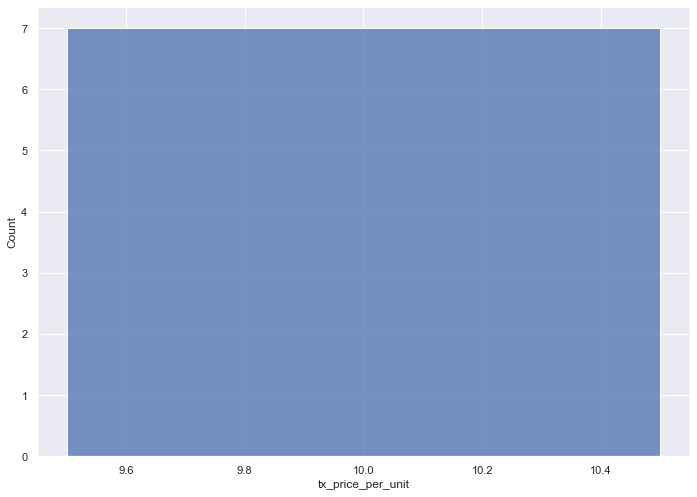

### Outputting summary table ### 	


/Users/victoria/GitHub/venvs/bespoke/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count     7.0
mean     10.0
std       0.0
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std   min   25%   50%   75%   max
date_in_month                                                
2021-02          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-03          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-05          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-07          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-08          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-11          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2022-01          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
### Outputting time series line plot of MSRP along with confidence bands ### 	


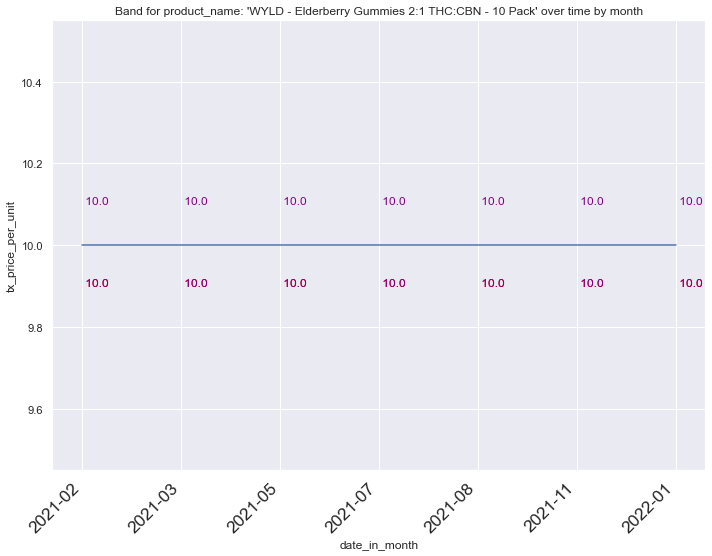

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-02                         10.0                   10.0
2021-03                         10.0                   10.0
2021-05                         10.0                   10.0
2021-07                         10.0                   10.0
2021-08                         10.0                   10.0
2021-11                         10.0                   10.0
2022-01                         10.0                   10.0
EMTPacific Stone Flower 7.0g Pouch Indica Wedding Cake (16ct)
EMTPacific Stone Preroll 0.5g Indica Wedding Cake 14-Pack 7.0g (16ct)
EMF
Verifying download summaries for license C10-0000939-LIC...
Earliest download summary: 2021-10-01
Latest download summary: 2022-05-11

[SUCCESS] All download summaries look good!
[SUCCESS] No unknown transfer packages!
91.0% of incoming transfer packages have receiver wholesale price
# transactions missing incoming transfe

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	
### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['pre-roll flower' 'pre-roll infused' 'vape cartridge' 'edible' 'flower'
 'tincture' 'extract' 'pre-roll leaf' 'shake' 'other concentrate'
 'topical' 'infused butter/oil' 'capsule']
### Available combined product category name in sales dataframe ### 	
['flower' 'pre-roll flower' 'pre-roll leaf' 'pre-roll infused' 'topical'
 'vape cartridge' 'extract' 'edible' 'other concentrate' 'shake'
 'tincture' 'infused butter/oil' 'capsule']
EMFCamino Gummies Midnight Blueberry
EMFWYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


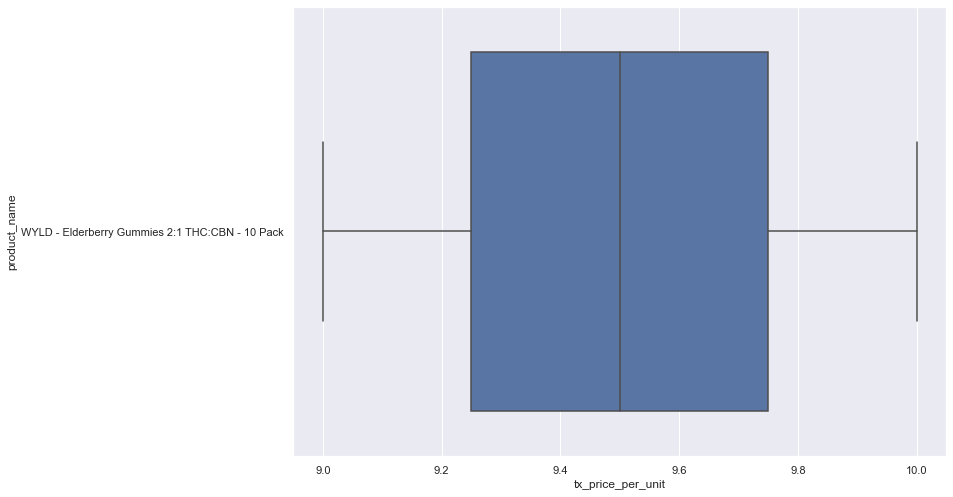

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack in product_name : 2


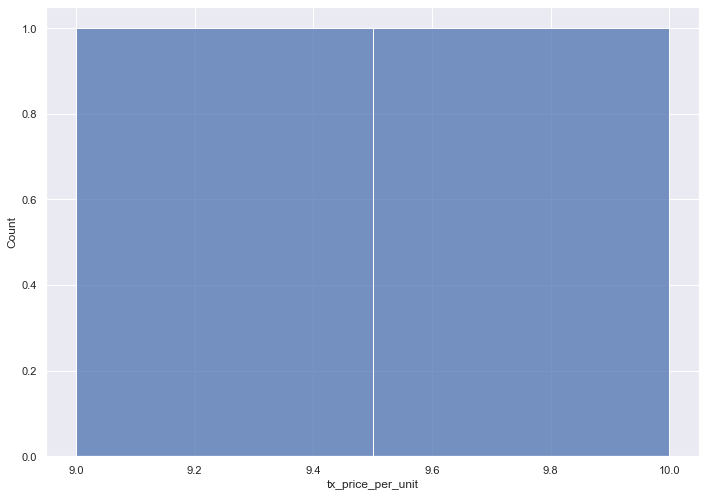

### Outputting summary table ### 	
count     2.00
mean      9.50
std       0.71
min       9.00
25%       9.25
50%       9.50
75%       9.75
max      10.00
Name: WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std   min   25%   50%   75%   max
date_in_month                                                
2022-02          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2022-04          1.0   9.0  NaN   9.0   9.0   9.0   9.0   9.0
### Outputting time series line plot of MSRP along with confidence bands ### 	


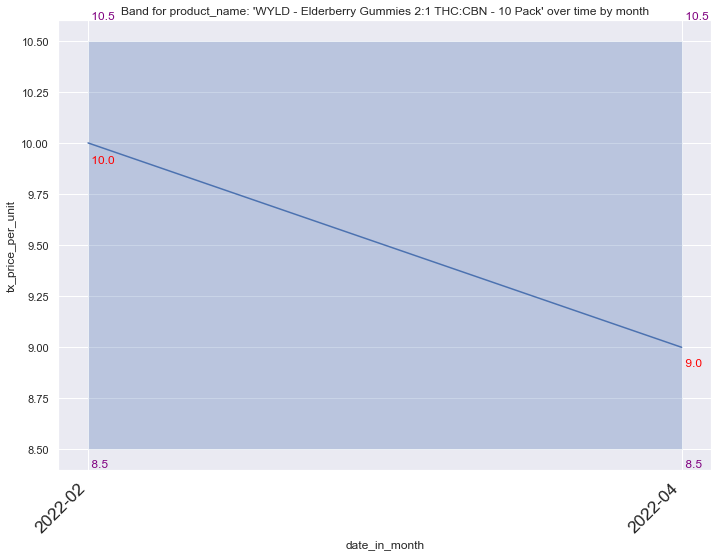

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-02                          8.5                   10.5
2022-04                          8.5                   10.5
EMFPacific Stone Flower 7.0g Pouch Indica Wedding Cake (16ct)
EMFPacific Stone Preroll 0.5g Indica Wedding Cake 14-Pack 7.0g (16ct)
ST
Verifying download summaries for license C12-0000359-LIC...
Earliest download summary: 2022-01-03
Latest download summary: 2022-05-11
Found bad download summary for license C12-0000359-LIC on date 2022-04-12
Found bad download summary for license C12-0000359-LIC on date 2022-03-11
Found bad download summary for license C12-0000359-LIC on date 2022-03-10
Found bad download summary for license C12-0000359-LIC on date 2022-03-09

Verifying download summaries for license C9-0000323-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-05-11
Found bad download summary for license C9-0000323-LIC on date

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['pre-roll flower' 'flower' 'vape cartridge' 'extract' 'pre-roll infused'
 'edible' 'pre-roll leaf' 'topical' 'tincture' 'capsule'
 'other concentrate' 'shake']
### Available combined product category name in sales dataframe ### 	
['edible' 'flower' 'extract' 'vape cartridge' 'pre-roll leaf'
 'pre-roll infused' 'pre-roll flower' 'other concentrate' 'capsule'
 'topical' 'tincture' 'shake']
STCamino Gummies Midnight Blueberry
STWYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


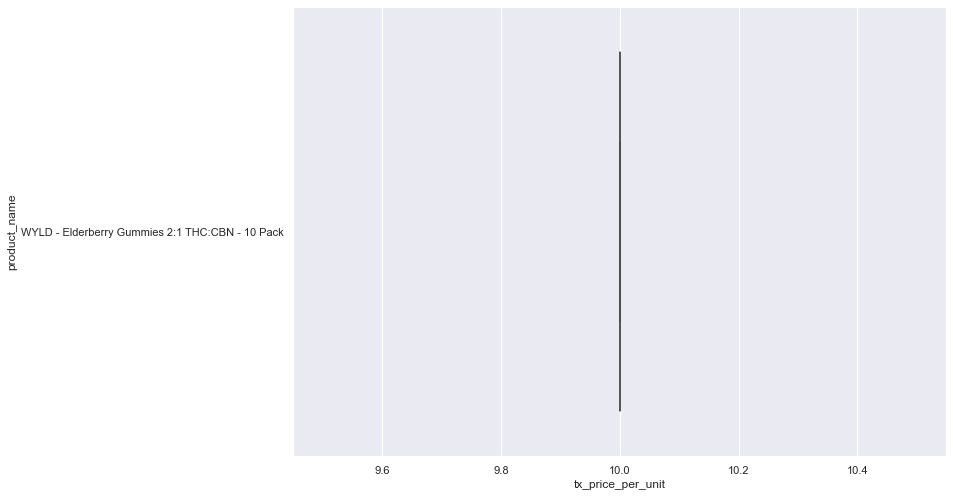

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack in product_name : 11


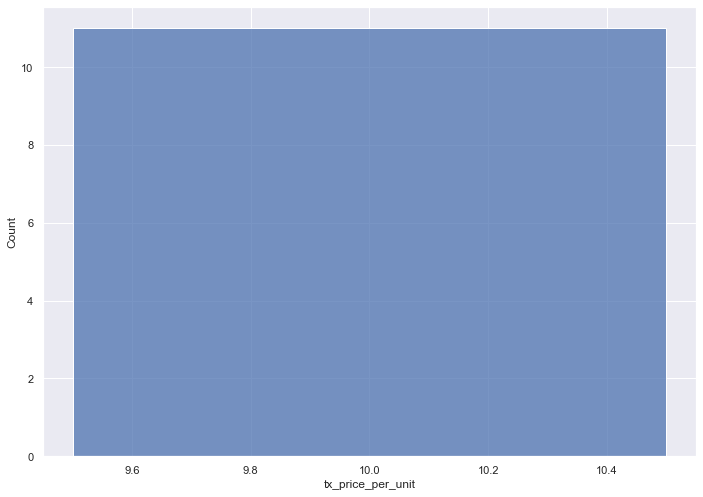

### Outputting summary table ### 	
count    11.0
mean     10.0
std       0.0
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std   min   25%   50%   75%   max
date_in_month                                                
2021-02          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-03          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-05          2.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0
2021-06          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-08          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-09          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-11          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2022-01          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2022-03          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2022-04          1.0  10.0  NaN  10.

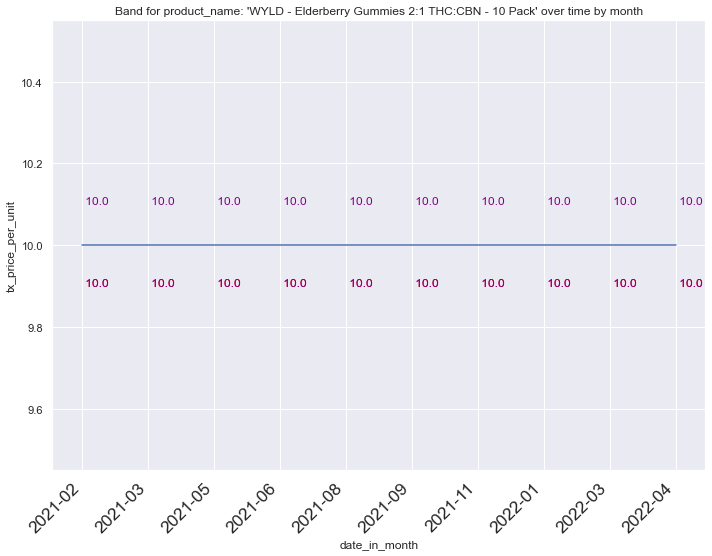

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-02                         10.0                   10.0
2021-03                         10.0                   10.0
2021-05                         10.0                   10.0
2021-06                         10.0                   10.0
2021-08                         10.0                   10.0
2021-09                         10.0                   10.0
2021-11                         10.0                   10.0
2022-01                         10.0                   10.0
2022-03                         10.0                   10.0
2022-04                         10.0                   10.0
STPacific Stone Flower 7.0g Pouch Indica Wedding Cake (16ct)
STPacific Stone Preroll 0.5g Indica Wedding Cake 14-Pack 7.0g (16ct)
GRG
Verifying download summaries for license C10-0000169-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-05-11
Found bad do

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['pre-roll flower' 'edible' 'flower' 'extract' 'other concentrate'
 'vape cartridge' 'pre-roll infused' 'pre-roll leaf' 'shake' 'topical'
 'tincture' 'infused butter/oil' 'capsule' 'clone - cutting']
### Available combined product category name in sales dataframe ### 	
['other concentrate' 'flower' 'pre-roll infused' 'vape cartridge'
 'pre-roll flower' 'edible' 'extract' 'pre-roll leaf' 'topical' 'shake'
 'tincture' 'infused butter/oil' 'capsule' 'clone - cutting']
GRGCamino Gummies Midnight Blueberry
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


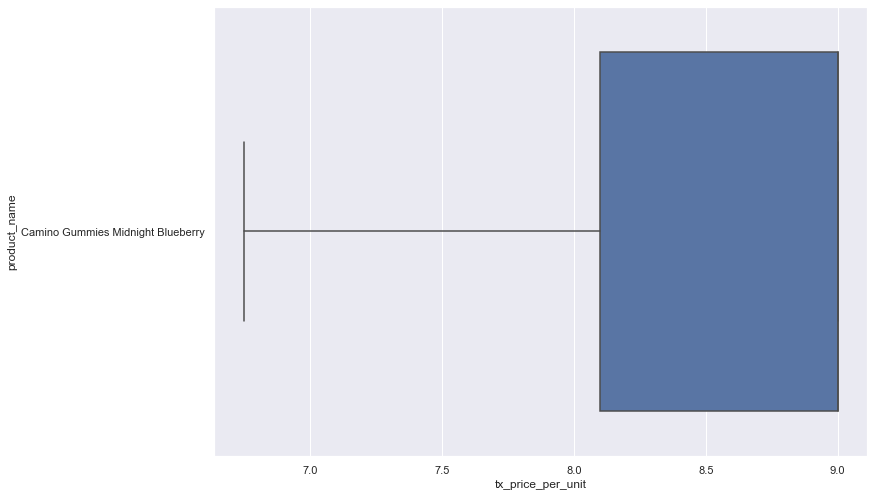

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for Camino Gummies Midnight Blueberry in product_name : 9


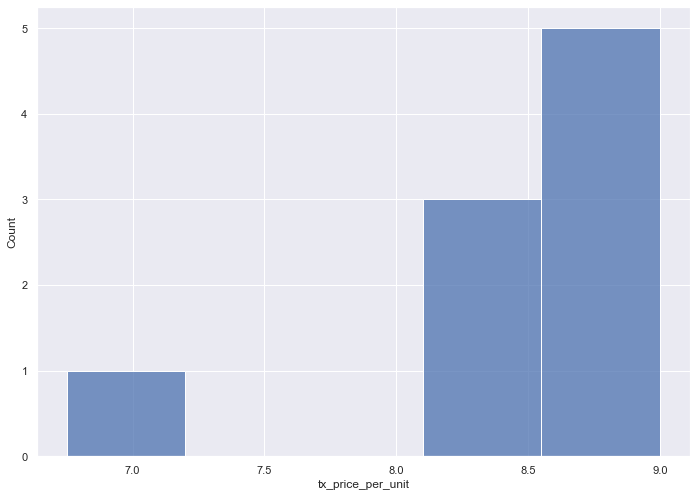

### Outputting summary table ### 	


/Users/victoria/GitHub/venvs/bespoke/lib/python3.8/site-packages/numpy/lib/function_base.py:4488: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
/Users/victoria/GitHub/venvs/bespoke/lib/python3.8/site-packages/numpy/lib/function_base.py:4489: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)


count    9.00
mean     8.45
std      0.77
min      6.75
25%      8.10
50%      9.00
75%      9.00
max      9.00
Name: Camino Gummies Midnight Blueberry, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std   min   25%   50%   75%   max
date_in_month                                                
2021-06          1.0  6.75  NaN  6.75  6.75  6.75  6.75  6.75
2021-09          2.0  9.00  0.0  9.00  9.00  9.00  9.00  9.00
2022-02          2.0  9.00  0.0  9.00  9.00  9.00  9.00  9.00
2022-03          1.0  9.00  NaN  9.00  9.00  9.00  9.00  9.00
2022-04          2.0  8.10  0.0  8.10  8.10  8.10  8.10  8.10
2022-05          1.0  8.10  NaN  8.10  8.10  8.10  8.10  8.10
### Outputting time series line plot of MSRP along with confidence bands ### 	


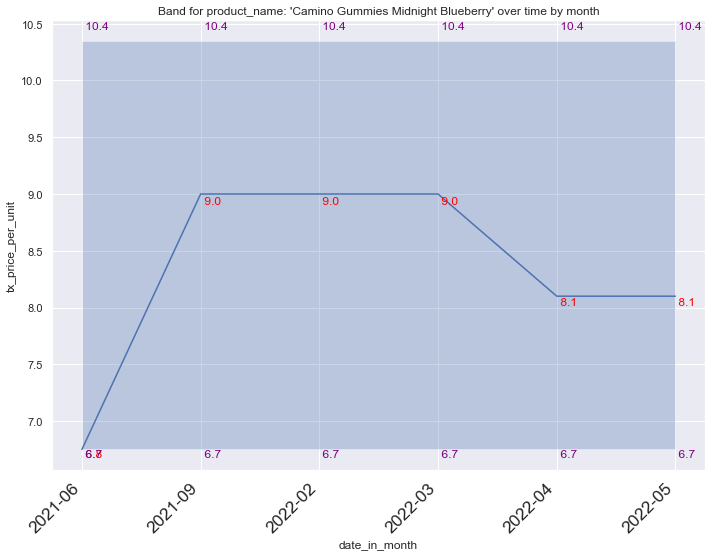

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-06                         6.75                  10.35
2021-09                         6.75                  10.35
2022-02                         6.75                  10.35
2022-03                         6.75                  10.35
2022-04                         6.75                  10.35
2022-05                         6.75                  10.35
GRGWYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.571428571428571 %


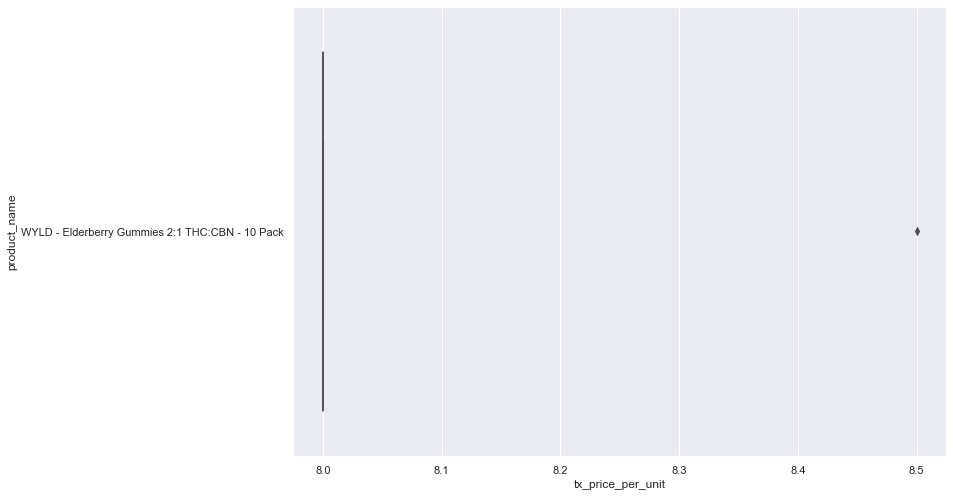

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack in product_name : 27


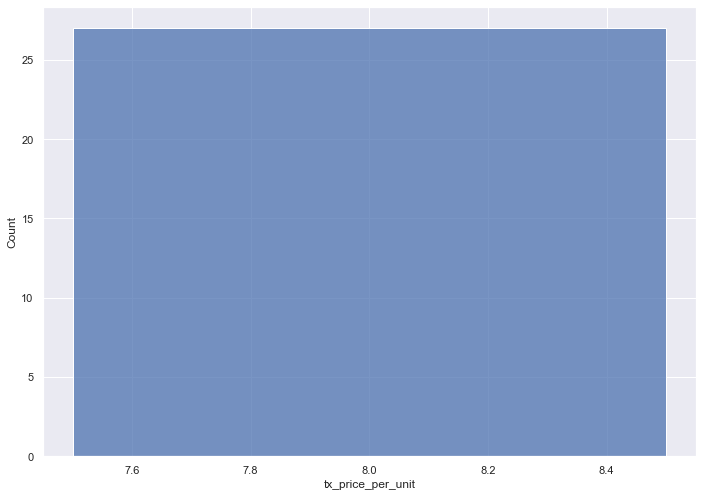

### Outputting summary table ### 	


/Users/victoria/GitHub/venvs/bespoke/lib/python3.8/site-packages/numpy/lib/function_base.py:4488: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
/Users/victoria/GitHub/venvs/bespoke/lib/python3.8/site-packages/numpy/lib/function_base.py:4489: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)


count    27.0
mean      8.0
std       0.0
min       8.0
25%       8.0
50%       8.0
75%       8.0
max       8.0
Name: WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std  min  25%  50%  75%  max
date_in_month                                           
2020-11          1.0   8.0  NaN  8.0  8.0  8.0  8.0  8.0
2020-12          1.0   8.0  NaN  8.0  8.0  8.0  8.0  8.0
2021-01          2.0   8.0  0.0  8.0  8.0  8.0  8.0  8.0
2021-03          1.0   8.0  NaN  8.0  8.0  8.0  8.0  8.0
2021-04          1.0   8.0  NaN  8.0  8.0  8.0  8.0  8.0
2021-05          1.0   8.0  NaN  8.0  8.0  8.0  8.0  8.0
2021-06          1.0   8.0  NaN  8.0  8.0  8.0  8.0  8.0
2021-07          1.0   8.0  NaN  8.0  8.0  8.0  8.0  8.0
2021-08          2.0   8.0  0.0  8.0  8.0  8.0  8.0  8.0
2021-09          1.0   8.0  NaN  8.0  8.0  8.0  8.0  8.0
2021-10          2.0   8.0  0.0  8.0  8.0  8.0  8.0  8.0
2021-11     

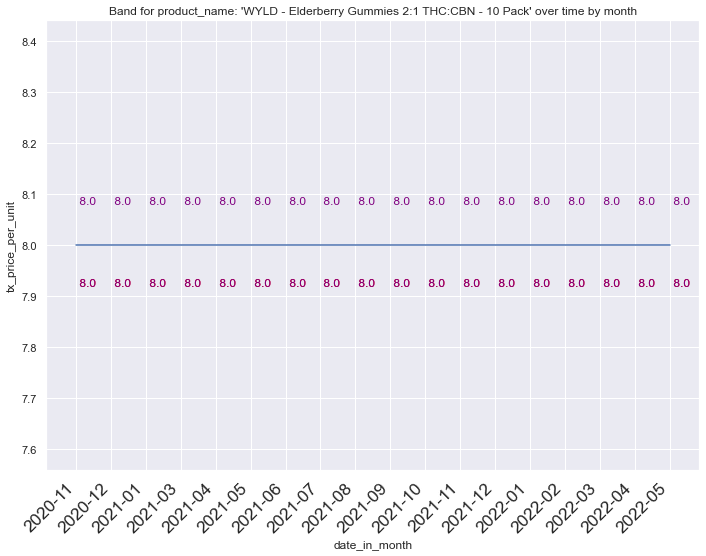

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-11                          8.0                    8.0
2020-12                          8.0                    8.0
2021-01                          8.0                    8.0
2021-03                          8.0                    8.0
2021-04                          8.0                    8.0
2021-05                          8.0                    8.0
2021-06                          8.0                    8.0
2021-07                          8.0                    8.0
2021-08                          8.0                    8.0
2021-09                          8.0                    8.0
2021-10                          8.0                    8.0
2021-11                          8.0                    8.0
2021-12                          8.0                    8.0
2022-01                          8.0                    8.0
2022-02                          8.0    

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	
### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][extracted_units_idx] = df['extracted_units'][extracted_units_idx]
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match

### Available combined product category name in costs dataframe ### 	
['flower' 'tincture' 'pre-roll flower' 'edible' 'vape cartridge' 'extract'
 'other concentrate' 'pre-roll leaf' 'capsule' 'pre-roll infused'
 'topical' 'shake']
### Available combined product category name in sales dataframe ### 	
['vape cartridge' 'pre-roll leaf' 'flower' 'pre-roll flower' 'extract'
 'tincture' 'edible' 'other concentrate' 'capsule' 'topical'
 'pre-roll infused' 'shake']
ELCamino Gummies Midnight Blueberry
ELWYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


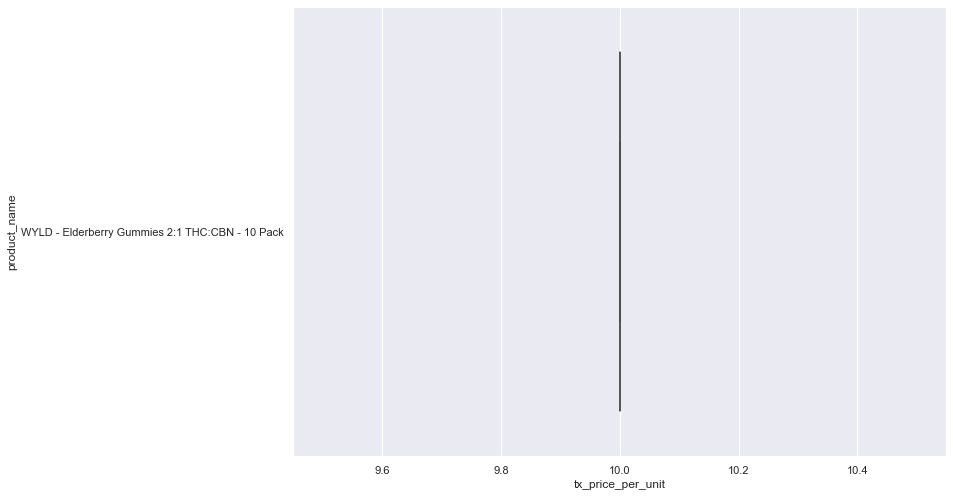

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack in product_name : 1


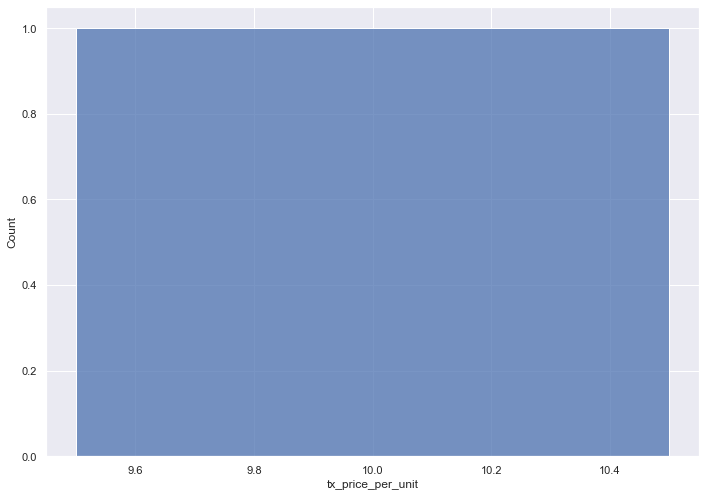

### Outputting summary table ### 	
count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std   min   25%   50%   75%   max
date_in_month                                                
2022-01          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
### Outputting time series line plot of MSRP along with confidence bands ### 	


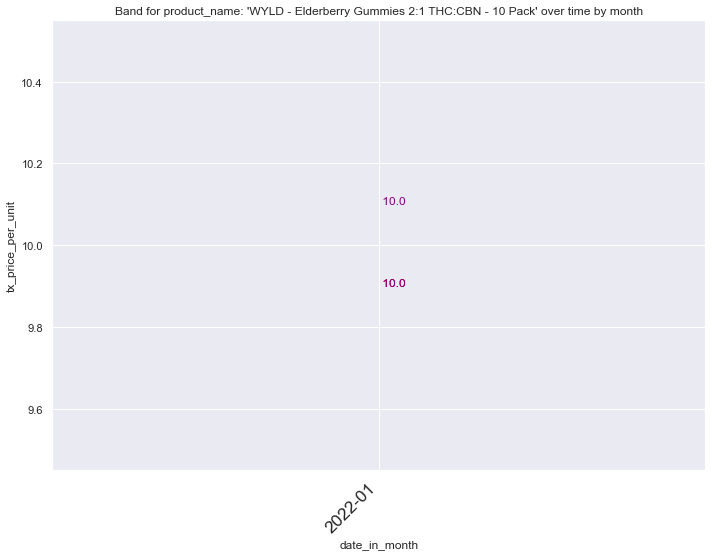

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-01                         10.0                   10.0
ELPacific Stone Flower 7.0g Pouch Indica Wedding Cake (16ct)
ELPacific Stone Preroll 0.5g Indica Wedding Cake 14-Pack 7.0g (16ct)
MD
Verifying download summaries for license C9-0000247-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-05-11
Found bad download summary for license C9-0000247-LIC on date 2022-05-05
Found bad download summary for license C9-0000247-LIC on date 2022-04-12

[FAILURE] Found a total of 2 bad download summaries
[SUCCESS] No unknown transfer packages!
98.0% of incoming transfer packages have receiver wholesale price
# transactions missing incoming transfer package: 2349 (3.1699977058339295%)
# transactions total: 74101
# receipts with mismatching transactions: 0 (0.0%)
# receipts missing transactions: 0 (0.0%)
# receipts total: 26925
### Adding new columns calc

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	
### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Available combined product category name in costs dataframe ### 	
['flower' 'edible' 'pre-roll flower' 'other concentrate' 'extract'
 'capsule' 'vape cartridge' 'pre-roll infused' 'tincture' 'topical'
 'pre-roll leaf' 'seeds' 'shake']
### Available combined product category name in sales dataframe ### 	
['vape cartridge' 'other concentrate' 'flower' 'extract' 'pre-roll flower'
 'edible' 'tincture' 'pre-roll infused' 'topical' 'capsule'
 'pre-roll leaf' 'seeds' 'shake']
MDCamino Gummies Midnight Blueberry
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 25.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


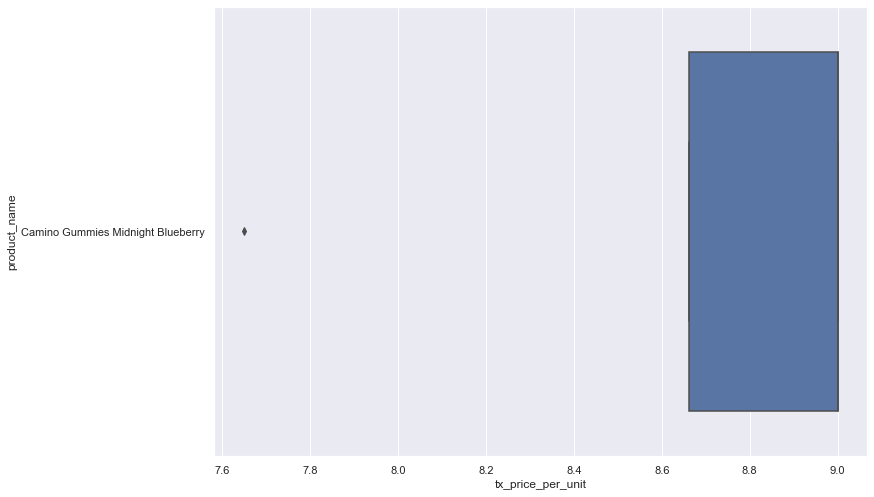

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for Camino Gummies Midnight Blueberry in product_name : 3


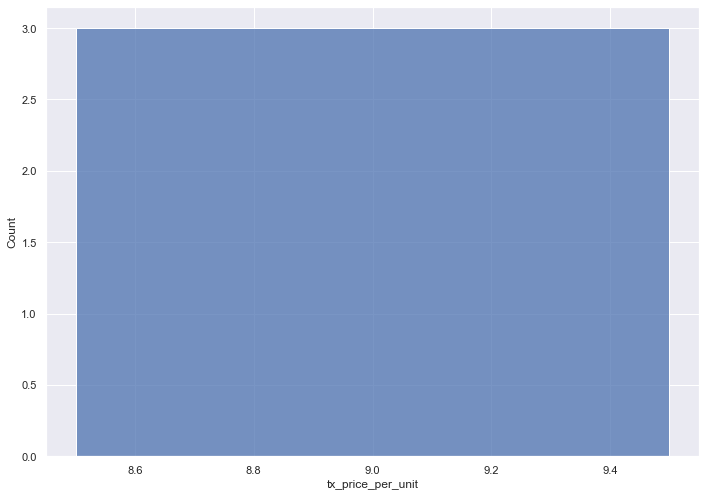

### Outputting summary table ### 	
count    3.0
mean     9.0
std      0.0
min      9.0
25%      9.0
50%      9.0
75%      9.0
max      9.0
Name: Camino Gummies Midnight Blueberry, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std  min  25%  50%  75%  max
date_in_month                                           
2021-09          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-11          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2022-05          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
### Outputting time series line plot of MSRP along with confidence bands ### 	


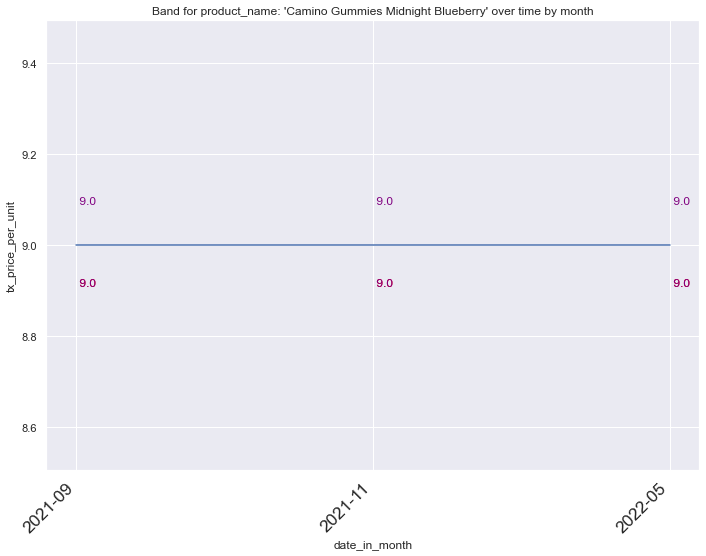

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-09                          9.0                    9.0
2021-11                          9.0                    9.0
2022-05                          9.0                    9.0
MDWYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 25.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


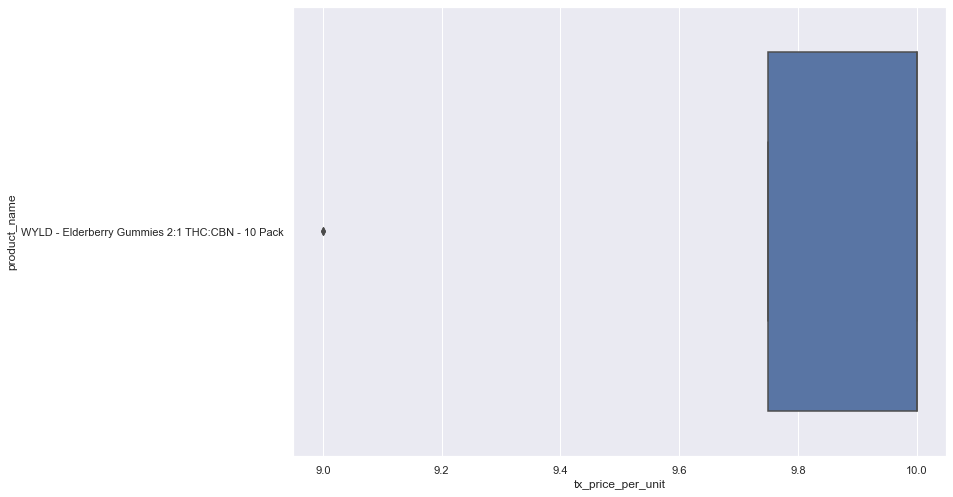

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack in product_name : 6


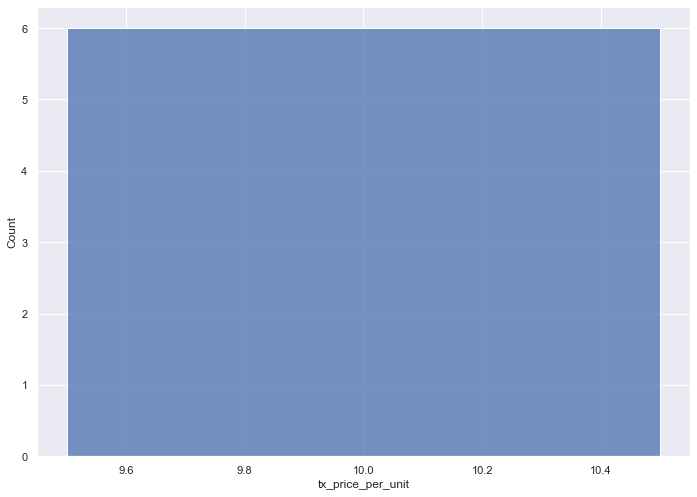

### Outputting summary table ### 	
count     6.0
mean     10.0
std       0.0
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std   min   25%   50%   75%   max
date_in_month                                                
2020-12          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-02          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-04          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-07          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-10          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-12          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
### Outputting time series line plot of MSRP along with confidence bands ### 	


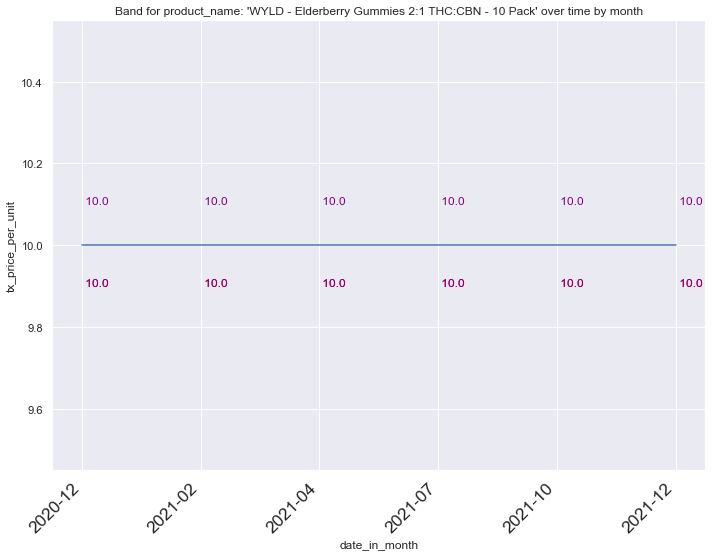

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-12                         10.0                   10.0
2021-02                         10.0                   10.0
2021-04                         10.0                   10.0
2021-07                         10.0                   10.0
2021-10                         10.0                   10.0
2021-12                         10.0                   10.0
MDPacific Stone Flower 7.0g Pouch Indica Wedding Cake (16ct)
MDPacific Stone Preroll 0.5g Indica Wedding Cake 14-Pack 7.0g (16ct)
GHC
Verifying download summaries for license C11-0000985-LIC...
Earliest download summary: 2021-01-01
Latest download summary: 2022-05-11

Verifying download summaries for license CCL18-0000591...
Earliest download summary: 2021-01-01
Latest download summary: 2022-05-11

Verifying download summaries for license CDPH-10003269...
Earliest download summary: 2021-01-01
Latest download summar

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['vape cartridge' 'extract' 'pre-roll flower' 'edible' 'flower'
 'pre-roll infused' 'other concentrate' 'shake' 'pre-roll leaf' 'tincture'
 'topical' 'capsule' 'seeds']
### Available combined product category name in sales dataframe ### 	
['pre-roll flower' 'vape cartridge' 'flower' 'other concentrate'
 'pre-roll infused' 'edible' 'extract' 'shake' 'tincture' 'pre-roll leaf'
 'topical' 'capsule' 'seeds']
GHCCamino Gummies Midnight Blueberry
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


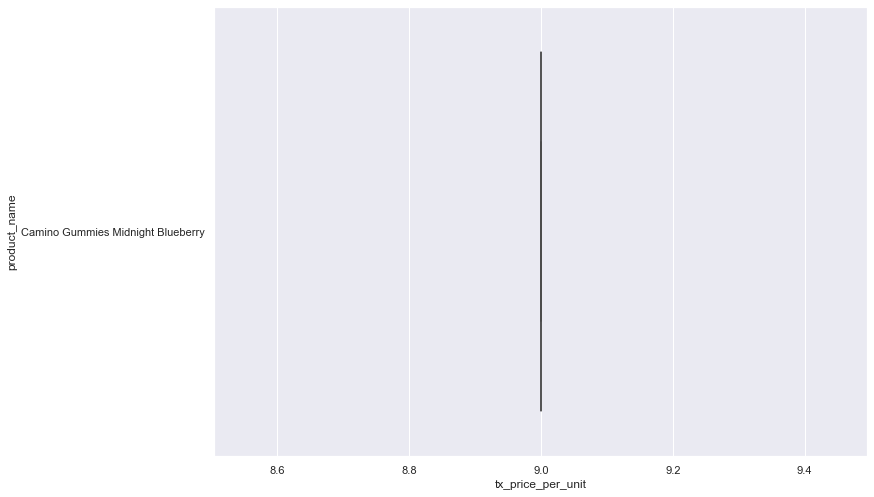

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for Camino Gummies Midnight Blueberry in product_name : 16


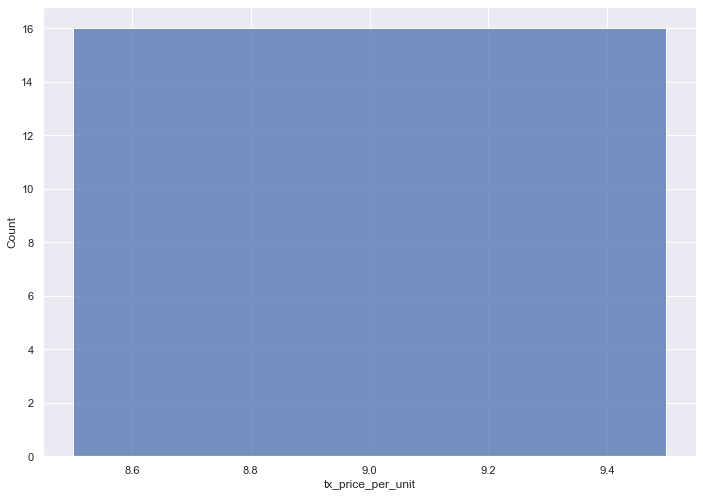

### Outputting summary table ### 	
count    16.0
mean      9.0
std       0.0
min       9.0
25%       9.0
50%       9.0
75%       9.0
max       9.0
Name: Camino Gummies Midnight Blueberry, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std  min  25%  50%  75%  max
date_in_month                                           
2021-01          2.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2021-02          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-03          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-04          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-06          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-07          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-08          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-09          2.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2021-10          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-11          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-12          1.0   9.0  NaN  9.0  9.0  9.0  

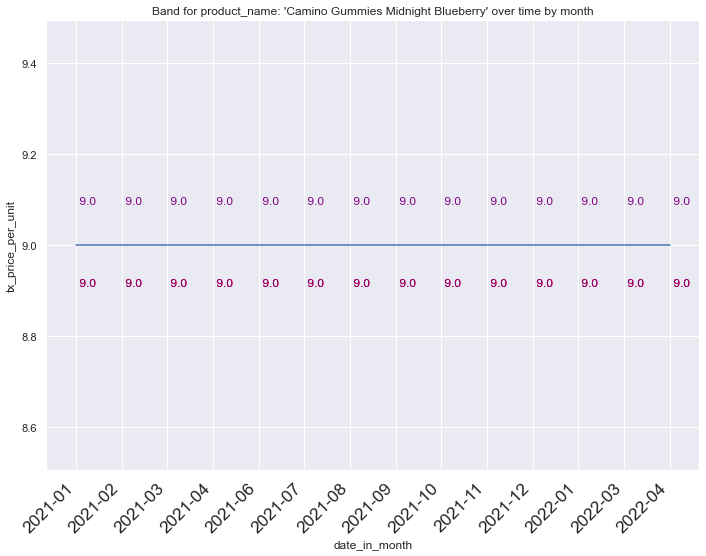

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-01                          9.0                    9.0
2021-02                          9.0                    9.0
2021-03                          9.0                    9.0
2021-04                          9.0                    9.0
2021-06                          9.0                    9.0
2021-07                          9.0                    9.0
2021-08                          9.0                    9.0
2021-09                          9.0                    9.0
2021-10                          9.0                    9.0
2021-11                          9.0                    9.0
2021-12                          9.0                    9.0
2022-01                          9.0                    9.0
2022-03                          9.0                    9.0
2022-04                          9.0                    9.0
GHCWYLD - Elderberry Gummies 2:1 THC:CBN

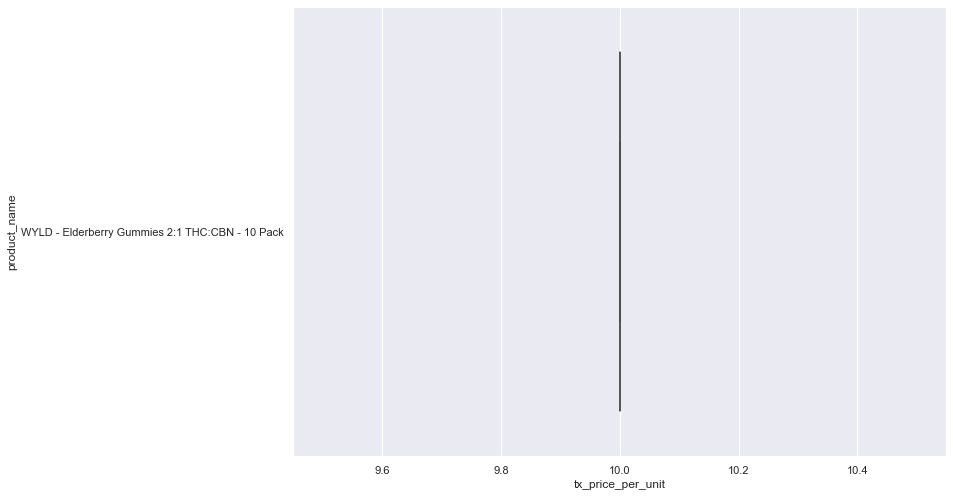

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack in product_name : 12


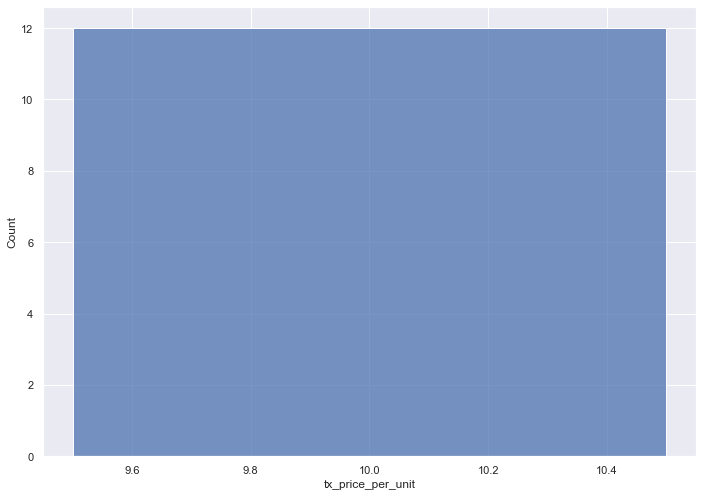

### Outputting summary table ### 	
count    12.0
mean     10.0
std       0.0
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std   min   25%   50%   75%   max
date_in_month                                                
2021-02          2.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0
2021-03          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-04          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-05          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-06          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-08          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-09          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-10          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2022-01          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2022-02          1.0  10.0  NaN  10.

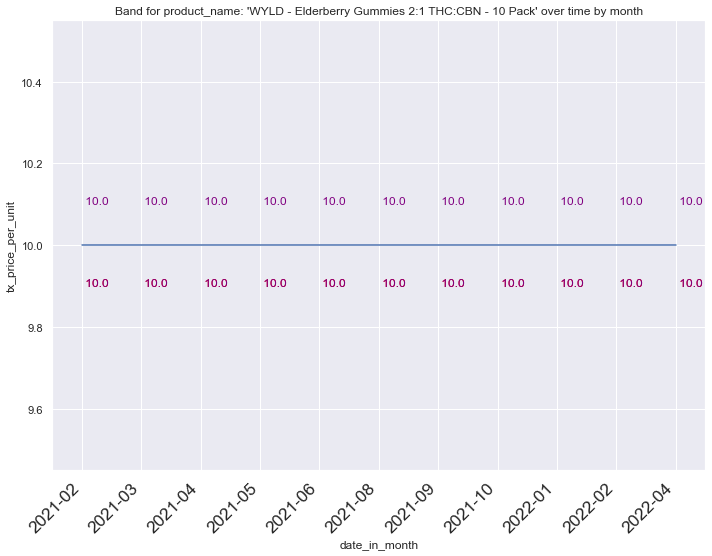

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-02                         10.0                   10.0
2021-03                         10.0                   10.0
2021-04                         10.0                   10.0
2021-05                         10.0                   10.0
2021-06                         10.0                   10.0
2021-08                         10.0                   10.0
2021-09                         10.0                   10.0
2021-10                         10.0                   10.0
2022-01                         10.0                   10.0
2022-02                         10.0                   10.0
2022-04                         10.0                   10.0
GHCPacific Stone Flower 7.0g Pouch Indica Wedding Cake (16ct)
GHCPacific Stone Preroll 0.5g Indica Wedding Cake 14-Pack 7.0g (16ct)
SV
Verifying download summaries for license C9-0000146-LIC...
Earliest download summary:

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['edible' 'vape cartridge' 'topical' 'tincture' 'pre-roll flower'
 'extract' 'flower' 'capsule' 'pre-roll infused' 'seeds'
 'other concentrate' 'pre-roll leaf' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['topical' 'tincture' 'vape cartridge' 'flower' 'edible'
 'other concentrate' 'pre-roll flower' 'extract' 'pre-roll infused'
 'seeds' 'capsule' 'infused butter/oil' 'pre-roll leaf']
SVCamino Gummies Midnight Blueberry
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


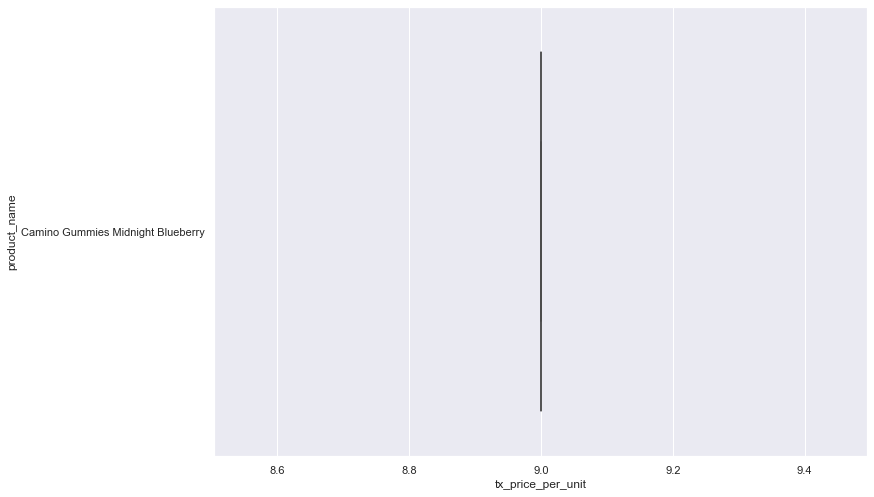

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for Camino Gummies Midnight Blueberry in product_name : 41


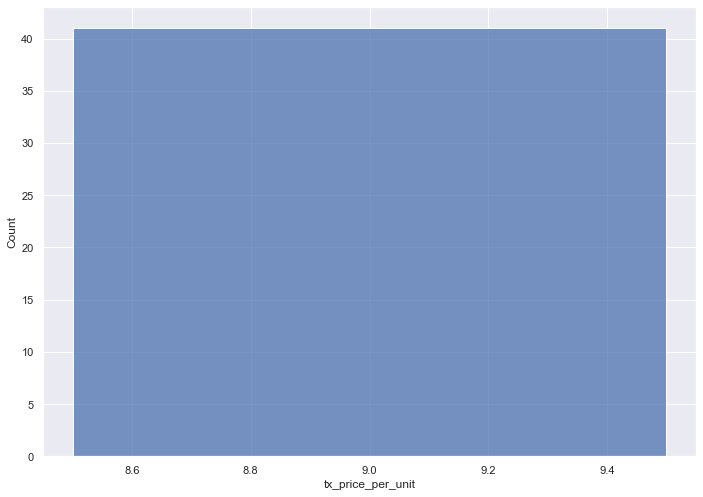

### Outputting summary table ### 	
count    41.0
mean      9.0
std       0.0
min       9.0
25%       9.0
50%       9.0
75%       9.0
max       9.0
Name: Camino Gummies Midnight Blueberry, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std  min  25%  50%  75%  max
date_in_month                                           
2021-01          3.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2021-02          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-03          3.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2021-04          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-05          3.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2021-06          3.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2021-07          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-08          3.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2021-09          1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0
2021-10          4.0   9.0  0.0  9.0  9.0  9.0  9.0  9.0
2021-11          1.0   9.0  NaN  9.0  9.0  9.0  

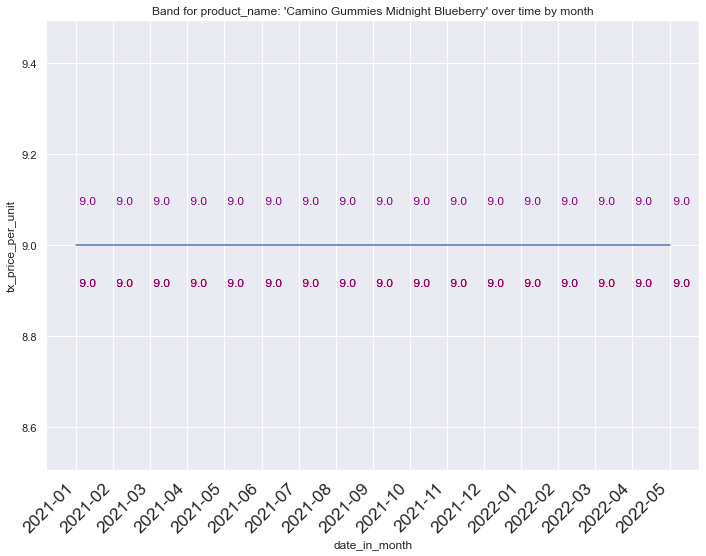

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-01                          9.0                    9.0
2021-02                          9.0                    9.0
2021-03                          9.0                    9.0
2021-04                          9.0                    9.0
2021-05                          9.0                    9.0
2021-06                          9.0                    9.0
2021-07                          9.0                    9.0
2021-08                          9.0                    9.0
2021-09                          9.0                    9.0
2021-10                          9.0                    9.0
2021-11                          9.0                    9.0
2021-12                          9.0                    9.0
2022-01                          9.0                    9.0
2022-02                          9.0                    9.0
2022-03                          9.0    

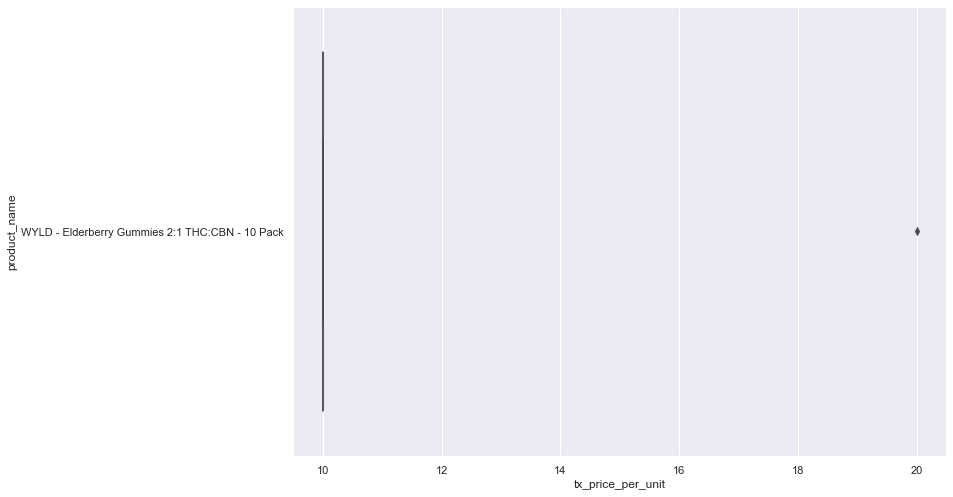

### Checking histogram distribution of MSRP for given product_name ### 	
Total number of transactions for WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack in product_name : 24


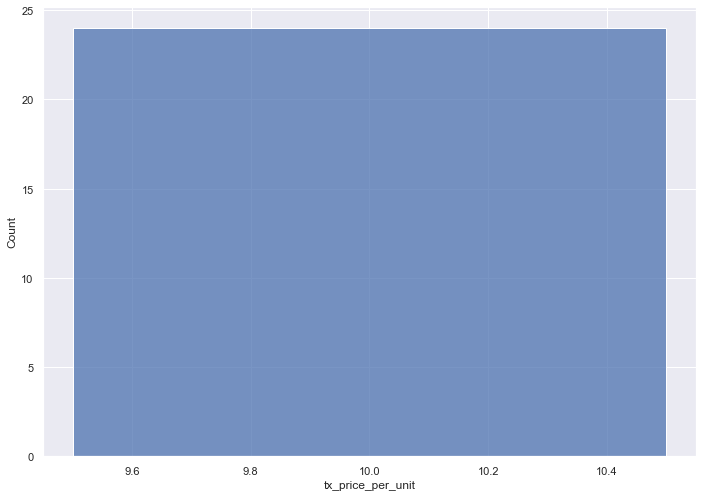

### Outputting summary table ### 	
count    24.0
mean     10.0
std       0.0
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean  std   min   25%   50%   75%   max
date_in_month                                                
2021-03          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-04          2.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0
2021-05          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-06          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-07          2.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0
2021-08          2.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0
2021-10          1.0  10.0  NaN  10.0  10.0  10.0  10.0  10.0
2021-11          3.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0
2021-12          2.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0
2022-01          1.0  10.0  NaN  10.

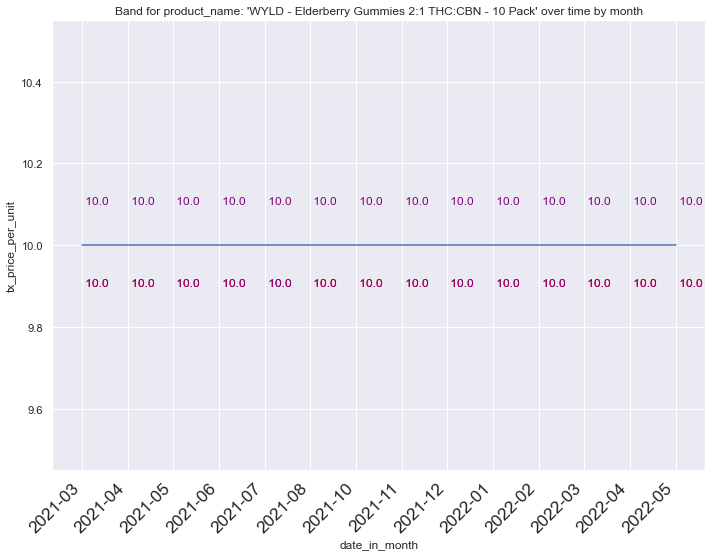

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-03                         10.0                   10.0
2021-04                         10.0                   10.0
2021-05                         10.0                   10.0
2021-06                         10.0                   10.0
2021-07                         10.0                   10.0
2021-08                         10.0                   10.0
2021-10                         10.0                   10.0
2021-11                         10.0                   10.0
2021-12                         10.0                   10.0
2022-01                         10.0                   10.0
2022-02                         10.0                   10.0
2022-03                         10.0                   10.0
2022-04                         10.0                   10.0
2022-05                         10.0                   10.0
SVPacific Stone Flower 7.0g Pouch Indica

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['flower' 'capsule' 'pre-roll leaf' 'vape cartridge' 'other concentrate'
 'extract' 'pre-roll flower' 'topical' 'tincture' 'edible' 'shake'
 'pre-roll infused' 'seeds']
### Available combined product category name in sales dataframe ### 	
['edible' 'flower' 'vape cartridge' 'other concentrate' 'extract'
 'tincture' 'pre-roll flower' 'pre-roll leaf' 'pre-roll infused' 'topical'
 'shake' 'capsule' 'seeds']
99HTCamino Gummies Midnight Blueberry
99HTWYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack
99HTPacific Stone Flower 7.0g Pouch Indica Wedding Cake (16ct)
99HTPacific Stone Preroll 0.5g Indica Wedding Cake 14-Pack 7.0g (16ct)


In [51]:
#cost + unit convert
cost_dict_minmax_prod = {}
for company in CA_COMPANY_IDENTIFIER_LIST: 
    print(company)
    mba = msrp_band_analyzer.MSRPBand()
    mba.update_company_data([company])
    mba.output_time_series_metadata()
    for c in ca_prod_list_cost:
        print(company + c)
        k = company + '-' + c
        if mba.company_costs_df[mba.company_costs_df['product_name'] == c].shape[0] == 0:
            continue
        else:
            _ = mba.run_analysis('product_name', c, 'C','minmax',use_unit_converted_price = False,ignore_non_unit_extractable_rows = False)
            cost_dict_minmax_prod[k] = mba.msrp_summary_table_by_time


In [52]:
cost_dict_minmax_prod.keys()

dict_keys(['EMA-Camino Gummies Midnight Blueberry', 'EMA-WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack', 'EMM-Camino Gummies Midnight Blueberry', 'EMM-WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack', 'EMT-Camino Gummies Midnight Blueberry', 'EMT-WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack', 'EMF-WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack', 'ST-WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack', 'GRG-Camino Gummies Midnight Blueberry', 'GRG-WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack', 'EL-WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack', 'MD-Camino Gummies Midnight Blueberry', 'MD-WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack', 'GHC-Camino Gummies Midnight Blueberry', 'GHC-WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack', 'SV-Camino Gummies Midnight Blueberry', 'SV-WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack'])

In [56]:
a_cost = []
for company in CA_COMPANY_IDENTIFIER_LIST:
    k = company + '-' + 'Camino Gummies Midnight Blueberry'
    if k not in list(cost_dict_minmax_prod.keys()):
        continue
    else:
        data = pd.DataFrame({k:cost_dict_minmax_prod[k]['mean']})
        a_cost.append(data)
a_cost_df = pd.concat(a_cost,axis = 1).sort_values(by = 'date_in_month')

In [57]:
a_cost_df


EMA-Camino Gummies Midnight Blueberry  \
date_in_month                                          
2020-06                                          NaN   
2020-07                                          NaN   
2020-08                                          NaN   
2020-09                                          NaN   
2020-10                                          NaN   
2020-11                                          NaN   
2020-12                                          NaN   
2021-01                                          9.0   
2021-02                                          9.0   
2021-03                                          9.0   
2021-04                                          9.0   
2021-05                                          9.0   
2021-06                                          NaN   
2021-07                                          9.0   
2021-08                                          NaN   
2021-09                                          NaN   
2021-10                                          9.0   
2021-11                                          9.0   
2021-12                                          9.0   
2022-01                                          NaN   
2022-02                                          9.0   
2022-03                                          NaN   
2022-04                                          NaN   
2022-05                                          NaN   

               EMM-Camino Gummies Midnight Blueberry  \
date_in_month                                          
2020-06                                          NaN   
2020-07                                          NaN   
2020-08                                          NaN   
2020-09                                          NaN   
2020-10                                          NaN   
2020-11                                          NaN   
2020-12                                          NaN   
2021-01                                          NaN   
2021-02                                          NaN   
2021-03                                          9.0   
2021-04                                          9.0   
2021-05                                          9.0   
2021-06                                          NaN   
2021-07                                          9.0   
2021-08                                          NaN   
2021-09                                          9.0   
2021-10                                          9.0   
2021-11                                          9.0   
2021-12                                          9.0   
2022-01                                          9.0   
2022-02                                          NaN   
2022-03                                          9.0   
2022-04                                          9.0   
2022-05                                          NaN   

               EMT-Camino Gummies Midnight Blueberry  \
date_in_month                                          
2020-06                                          9.0   
2020-07                                          9.0   
2020-08                                          9.0   
2020-09                                          9.0   
2020-10                                          9.0   
2020-11                                          9.0   
2020-12                                          9.0   
2021-01                                          9.0   
2021-02                                          9.0   
2021-03                                          9.0   
2021-04                                          9.0   
2021-05                                          NaN   
2021-06                                          9.0   
2021-07                                          NaN   
2021-08                                          9.0   
2021-09                                          9.0   
2021-10                                          9.0   
2021-11                              

In [58]:
b_cost = []
for company in CA_COMPANY_IDENTIFIER_LIST:
    k = company + '-' + 'WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack'
    if k not in list(cost_dict_minmax_prod.keys()):
        continue
    else:
        data = pd.DataFrame({k:cost_dict_minmax_prod[k]['mean']})
        b_cost.append(data)
b_cost_df = pd.concat(b_cost,axis = 1).sort_values(by = 'date_in_month')

In [59]:
b_cost_df

EMA-WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack  \
date_in_month                                                        
2020-11                                                      NaN     
2020-12                                                      NaN     
2021-01                                                     10.0     
2021-02                                                     10.0     
2021-03                                                     10.0     
2021-04                                                     10.0     
2021-05                                                     10.0     
2021-06                                                     10.0     
2021-07                                                     10.0     
2021-08                                                     10.0     
2021-09                                                      NaN     
2021-10                                                      NaN     
2021-11                                                     10.0     
2021-12                                                     10.0     
2022-01                                                     10.0     
2022-02                                                      NaN     
2022-03                                                     10.0     
2022-04                                                      NaN     
2022-05                                                      NaN     

               EMM-WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack  \
date_in_month                                                        
2020-11                                                      NaN     
2020-12                                                      NaN     
2021-01                                                      NaN     
2021-02                                                      NaN     
2021-03                                                     10.0     
2021-04                                                     10.0     
2021-05                                                      NaN     
2021-06                                                     10.0     
2021-07                                                      NaN     
2021-08                                                     10.0     
2021-09                                                     10.0     
2021-10                                                      NaN     
2021-11                                                     10.0     
2021-12                                                     10.0     
2022-01                                                     10.0     
2022-02                                                      NaN     
2022-03                                                     10.0     
2022-04                                                      NaN     
2022-05                                                      NaN     

               EMT-WYLD - Elderberry Gummies 2:1 THC:CBN - 10 Pack  \
date_in_month                                                        
2020-11                                                      NaN     
2020-12                                                      NaN     
2021-01                                                      NaN     
2021-02                                                     10.0     
2021-03                                                     10.0     
2021-04                                                      NaN     
2021-05                                                     10.0     
2021-06                                                      NaN     
2021-07                                                     10.0     
2021-08                                                     10.0     
2021-09                                                      NaN     
2021-10                                                      NaN     
2021-11                                                     10.0     
2021-12                

# run product name on sales

EMA
Verifying download summaries for license C10-0000774-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-05-11

Verifying download summaries for license C10-0000695-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-02-09

Verifying download summaries for license C10-0000786-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-02-09

Verifying download summaries for license C10-0000939-LIC...
Earliest download summary: 2022-01-25
Latest download summary: 2022-02-09

[SUCCESS] All download summaries look good!
[FAILURE] Fxound a total of 42 unknown transfer packages
97.0% of incoming transfer packages have receiver wholesale price
# transactions missing incoming transfer package: 5 (0.0038380349261178275%)
# transactions total: 130275
# receipts with mismatching transactions: 0 (0.0%)
# receipts missing transactions: 0 (0.0%)
# receipts total: 57971
### Adding new columns calculated by average price per unit ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['edible' 'topical' 'vape cartridge' 'extract' 'tincture' 'flower'
 'other concentrate' 'pre-roll flower' 'capsule' 'pre-roll infused'
 'pre-roll leaf' 'shake' 'seeds' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['flower' 'pre-roll flower' 'edible' 'pre-roll leaf' 'pre-roll infused'
 'topical' 'vape cartridge' 'tincture' 'extract' 'capsule'
 'other concentrate' 'shake' 'infused butter/oil' 'seeds']
EMAInfused jeeter 1g - Maui Wowie
EMAInfused Baby Jeeter - Blue Zkittlez 0.5g x 5
EMABaby Jeeter - Tropicana Cookies
EMABaby Jeeter - Blue Zkittlez
EMAInfused Baby Jeeter - Strawberry Shortcake
EMAInfused Baby Jeeter Grape Ape
EMABaby Jeeter - Blueberry Kush
EMAInfused Baby Jeeter Durban Poison
EMABaby Jeeter - Fire OG
EMABaby Jeeter - Grapefruit Romulan
EMABaby Jeeter - Honeydew
EMABaby Jeeter - Watermelon Zkittlez
EMAInfused Baby Jeeter - Mai Tai
EMAInfused Baby Jeeter - Ap

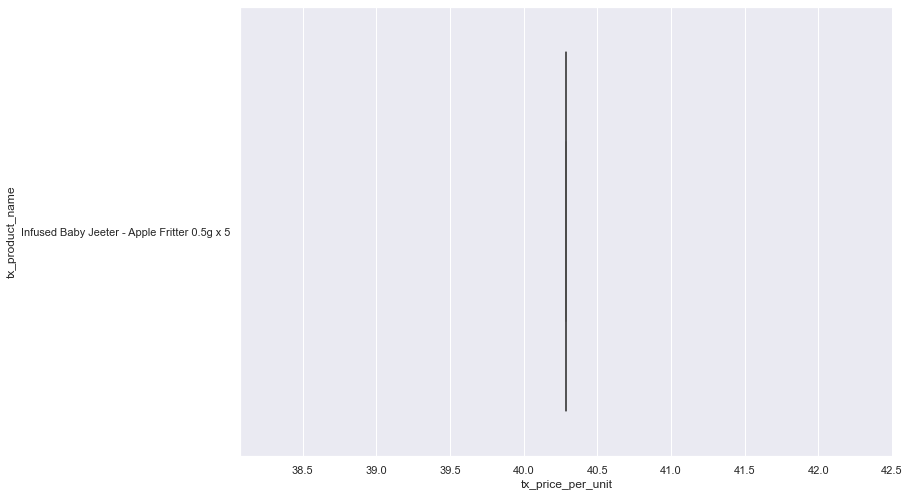

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Apple Fritter 0.5g x 5 in tx_product_name : 17


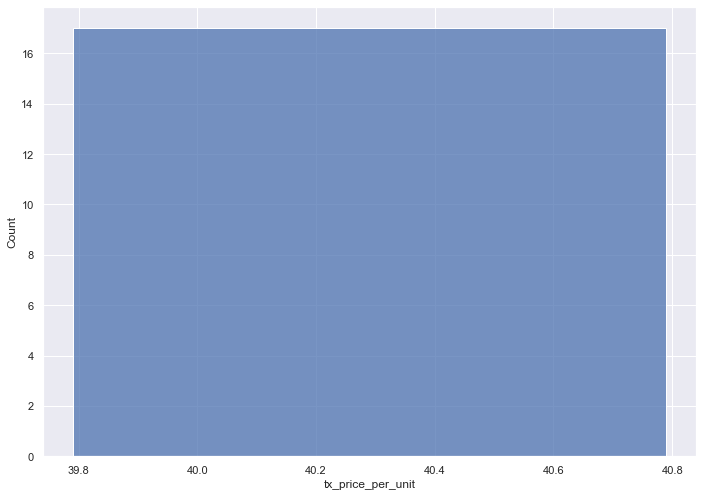

### Outputting summary table ### 	
count    17.00
mean     40.29
std       0.00
min      40.29
25%      40.29
50%      40.29
75%      40.29
max      40.29
Name: Infused Baby Jeeter - Apple Fritter 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean  std    min    25%    50%    75%    max
date_in_month                                                      
2022-04          4.0  40.29  0.0  40.29  40.29  40.29  40.29  40.29
2022-05         13.0  40.29  0.0  40.29  40.29  40.29  40.29  40.29
### Outputting time series line plot of MSRP along with confidence bands ### 	


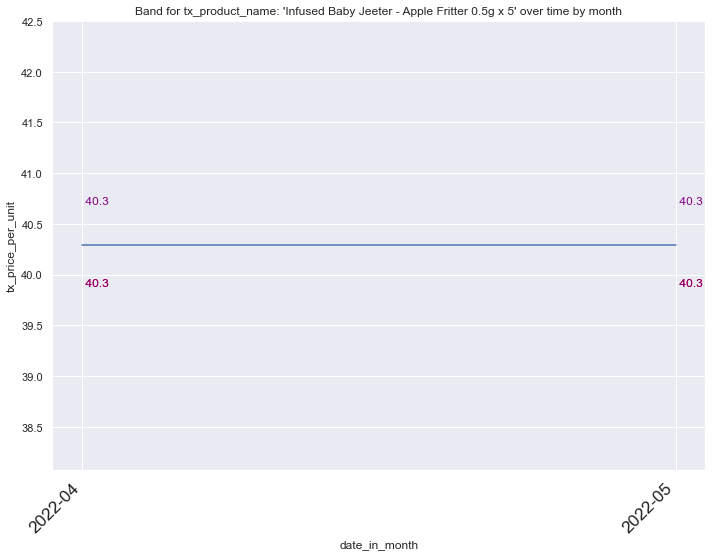

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-04                        40.29                  40.29
2022-05                        40.29                  40.29
EMAInfused Baby Jeeter - Watermelon Zkittlez 0.5g x 5
EMAInfused Baby Jeeter - Strawberry Shortcake 0.5g x 5
EMAInfused Baby Jeeter - Grape Ape 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


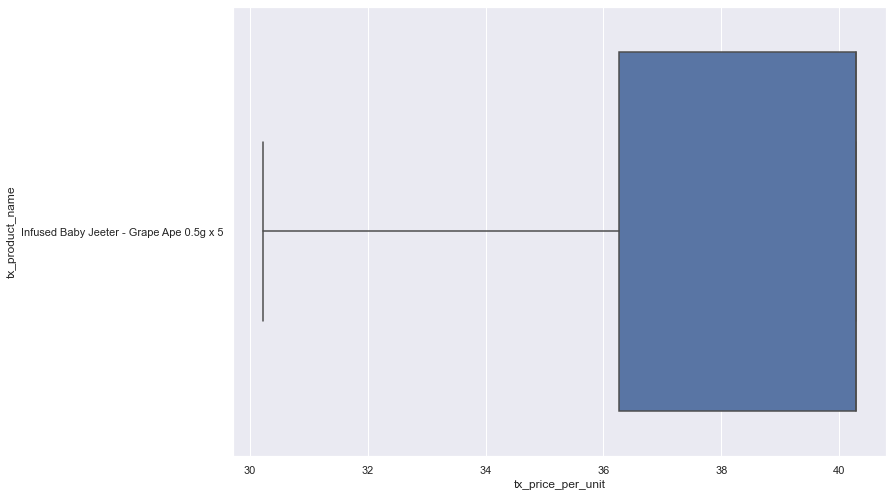

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Grape Ape 0.5g x 5 in tx_product_name : 11


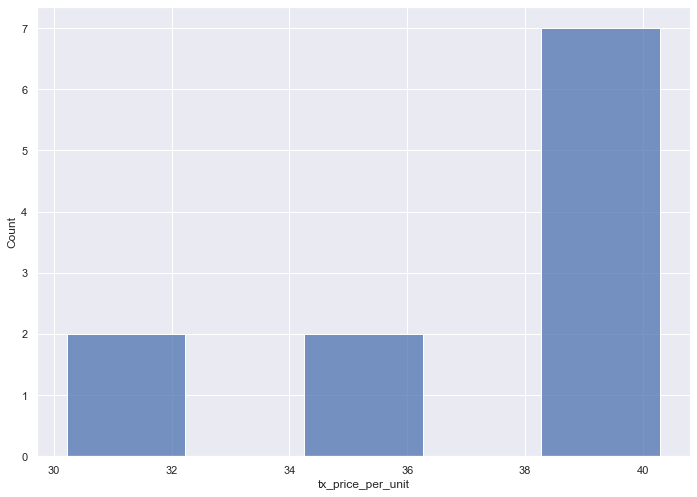

### Outputting summary table ### 	
count    11.00
mean     37.70
std       3.66
min      30.22
25%      36.26
50%      40.29
75%      40.29
max      40.29
Name: Infused Baby Jeeter - Grape Ape 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2022-04          1.0  40.29   NaN  40.29  40.29  40.29  40.29  40.29
2022-05         10.0  37.44  3.75  30.22  36.26  39.28  40.29  40.29
### Outputting time series line plot of MSRP along with confidence bands ### 	


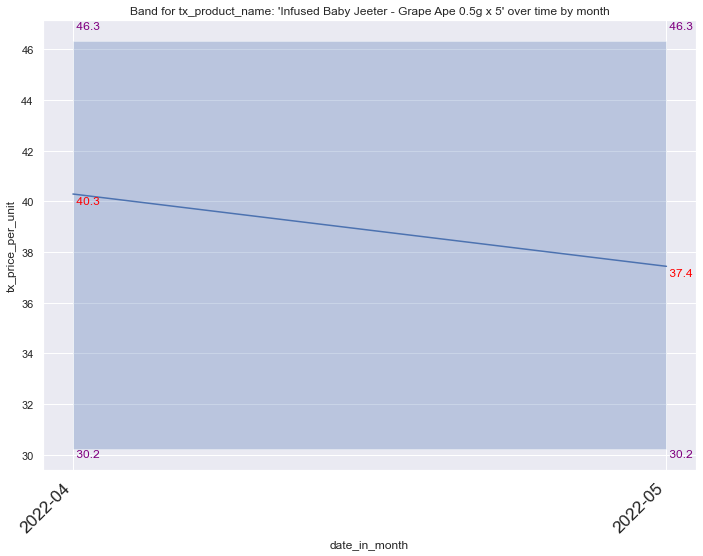

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-04                       30.215                 46.335
2022-05                       30.215                 46.335
EMAInfused Baby Jeeter - Peach Ringz 0.5g x 5
EMAInfused Baby Jeeter - Maui Wowie 0.5g x 5
EMAInfused Baby Jeeter - Blueberry Kush 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 8.333333333333332 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


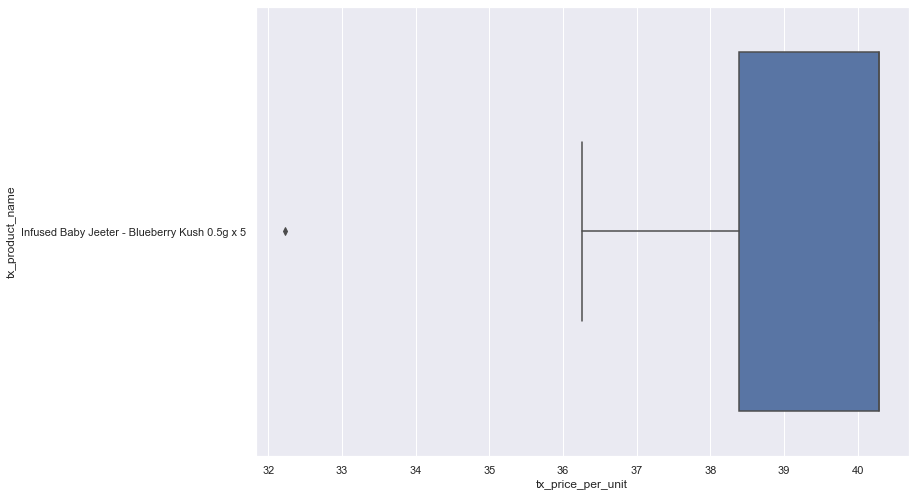

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Blueberry Kush 0.5g x 5 in tx_product_name : 11


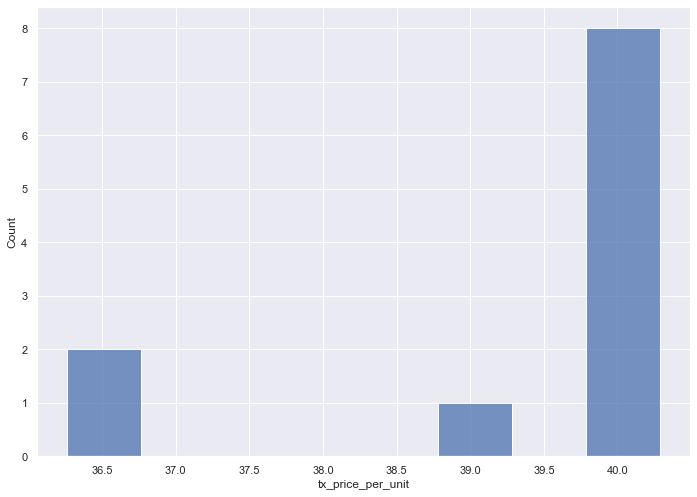

### Outputting summary table ### 	
count    11.00
mean     39.45
std       1.62
min      36.26
25%      39.70
50%      40.29
75%      40.29
max      40.29
Name: Infused Baby Jeeter - Blueberry Kush 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min   25%    50%    75%    max
date_in_month                                                      
2022-05         11.0  39.45  1.62  36.26  39.7  40.29  40.29  40.29
### Outputting time series line plot of MSRP along with confidence bands ### 	


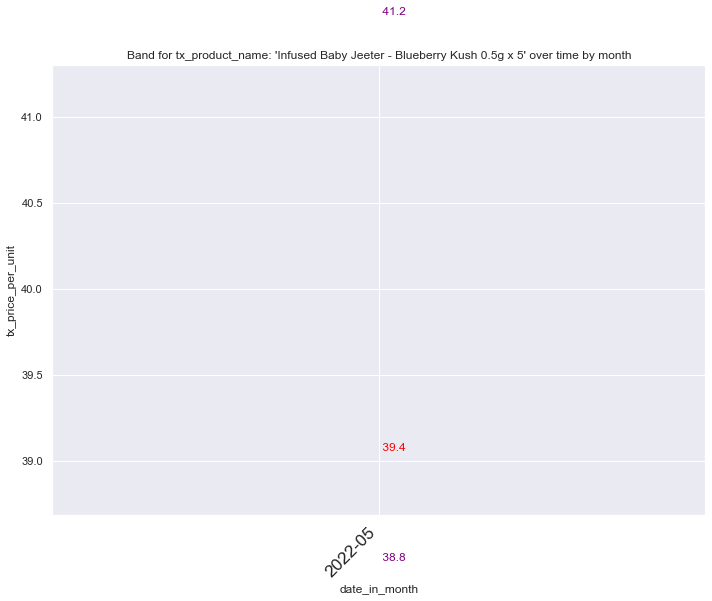

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-05                      38.8025                41.1825
EMAInfused Baby Jeeter - Gelato #33
EMABaby Jeeter - Maui Wowie
EMAInfused Baby Jeeter - Banana Kush 0.5g x 5
EMAInfused Baby Jeeter - Churros 0.5g x 5
EMABaby Jeeter - Limoncello
EMABaby Jeeter - Banana Kush
EMAInfused Baby Jeeter - Peach Ringz
EMAJeeter Juice 1g Vape Cartridge Strawberry Cheesecake
EMM
Verifying download summaries for license C10-0000786-LIC...
Earliest download summary: 2022-01-27
Latest download summary: 2022-05-11
Found bad download summary for license C10-0000786-LIC on date 2022-03-11
Found bad download summary for license C10-0000786-LIC on date 2022-03-10
Found bad download summary for license C10-0000786-LIC on date 2022-03-09

[FAILURE] Found a total of 3 bad download summaries
[SUCCESS] No unknown transfer packages!
95.0% of incoming transfer packages have receiver wholesale price

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['flower' 'vape cartridge' 'pre-roll infused' 'other concentrate'
 'extract' 'edible' 'tincture' 'pre-roll flower' 'topical' 'capsule'
 'pre-roll leaf' 'shake' 'seeds' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['edible' 'pre-roll leaf' 'pre-roll flower' 'pre-roll infused' 'flower'
 'other concentrate' 'extract' 'vape cartridge' 'tincture' 'topical'
 'capsule' 'shake' 'infused butter/oil' 'seeds']
EMMInfused jeeter 1g - Maui Wowie
EMMInfused Baby Jeeter - Blue Zkittlez 0.5g x 5
EMMBaby Jeeter - Tropicana Cookies
EMMBaby Jeeter - Blue Zkittlez
EMMInfused Baby Jeeter - Strawberry Shortcake
EMMInfused Baby Jeeter Grape Ape
EMMBaby Jeeter - Blueberry Kush
EMMInfused Baby Jeeter Durban Poison
EMMBaby Jeeter - Fire OG
EMMBaby Jeeter - Grapefruit Romulan
EMMBaby Jeeter - Honeydew
EMMBaby Jeeter - Watermelon Zkittlez
EMMInfused Baby Jeeter - Mai Tai
EMMInfused Baby Jeeter - Ap

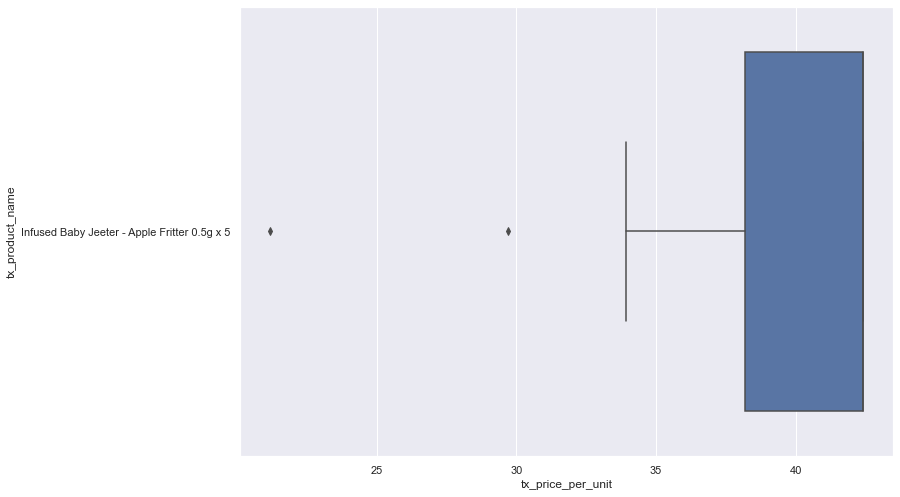

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Apple Fritter 0.5g x 5 in tx_product_name : 22


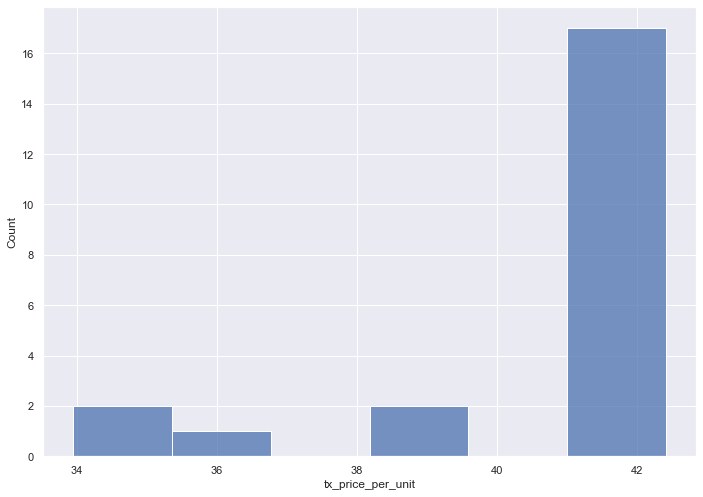

### Outputting summary table ### 	
count    22.00
mean     41.04
std       2.74
min      33.94
25%      42.42
50%      42.42
75%      42.42
max      42.42
Name: Infused Baby Jeeter - Apple Fritter 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2022-04         10.0  41.43  2.12  36.73  42.42  42.42  42.42  42.42
2022-05         12.0  40.72  3.23  33.94  41.36  42.42  42.42  42.42
### Outputting time series line plot of MSRP along with confidence bands ### 	


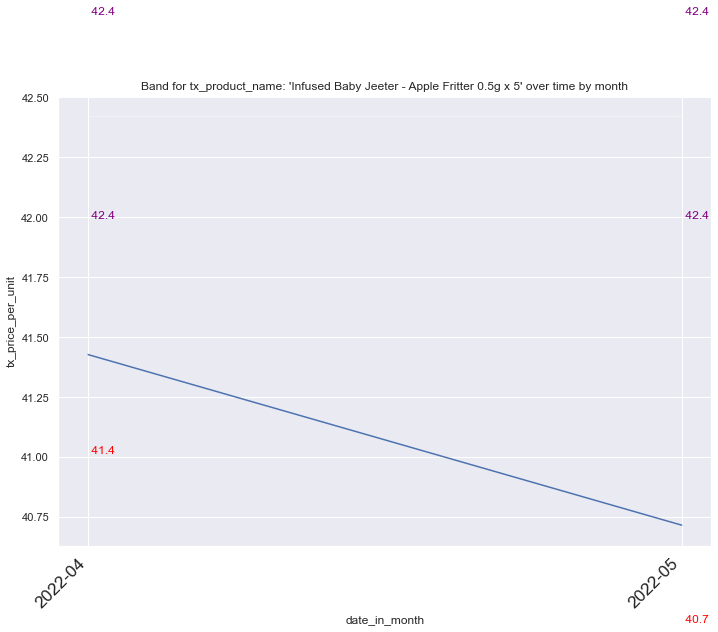

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-04                        42.42                  42.42
2022-05                        42.42                  42.42
EMMInfused Baby Jeeter - Watermelon Zkittlez 0.5g x 5
EMMInfused Baby Jeeter - Strawberry Shortcake 0.5g x 5
EMMInfused Baby Jeeter - Grape Ape 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 11.11111111111111 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


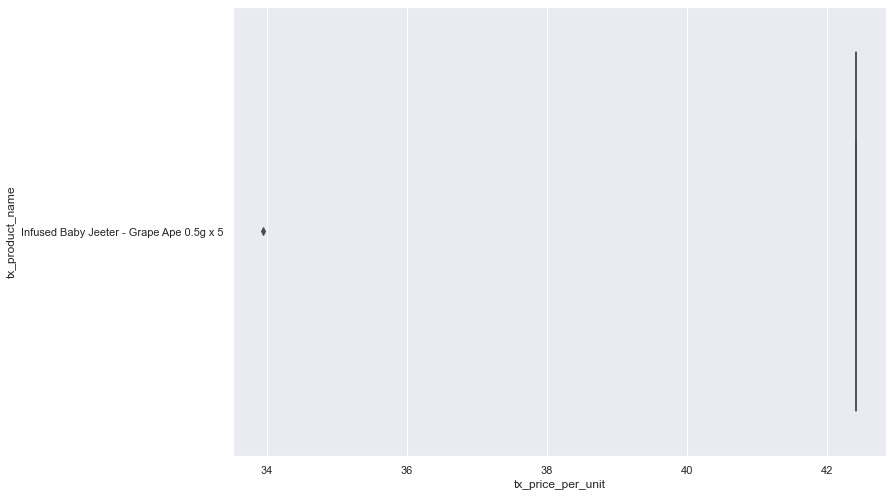

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Grape Ape 0.5g x 5 in tx_product_name : 8


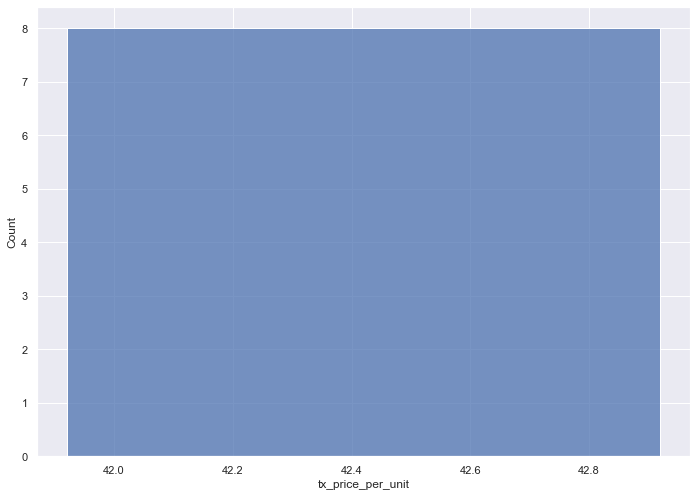

### Outputting summary table ### 	
count     8.00
mean     42.42
std       0.00
min      42.42
25%      42.42
50%      42.42
75%      42.42
max      42.42
Name: Infused Baby Jeeter - Grape Ape 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean  std    min    25%    50%    75%    max
date_in_month                                                      
2022-04          4.0  42.42  0.0  42.42  42.42  42.42  42.42  42.42
2022-05          4.0  42.42  0.0  42.42  42.42  42.42  42.42  42.42
### Outputting time series line plot of MSRP along with confidence bands ### 	


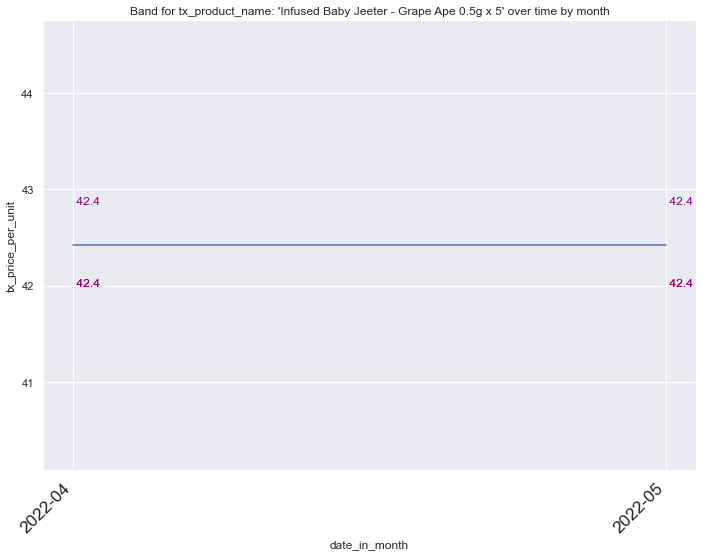

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-04                        42.42                  42.42
2022-05                        42.42                  42.42
EMMInfused Baby Jeeter - Peach Ringz 0.5g x 5
EMMInfused Baby Jeeter - Maui Wowie 0.5g x 5
EMMInfused Baby Jeeter - Blueberry Kush 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 4.166666666666666 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


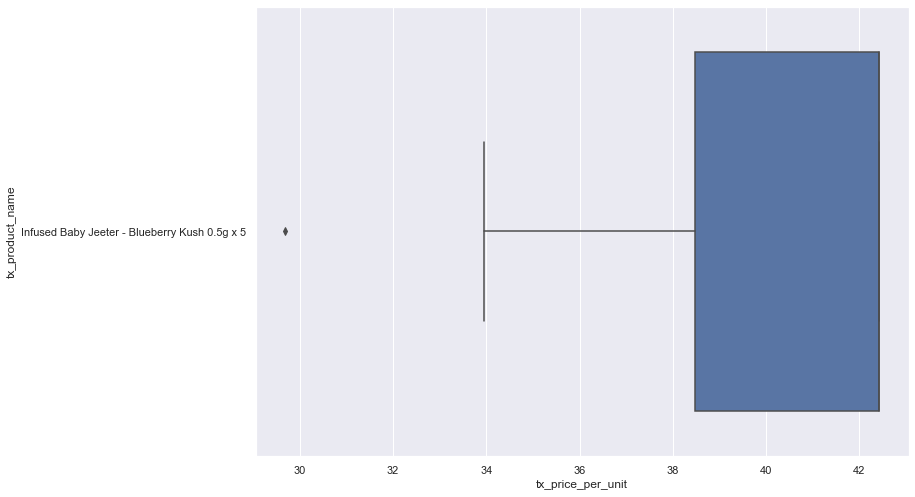

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Blueberry Kush 0.5g x 5 in tx_product_name : 23


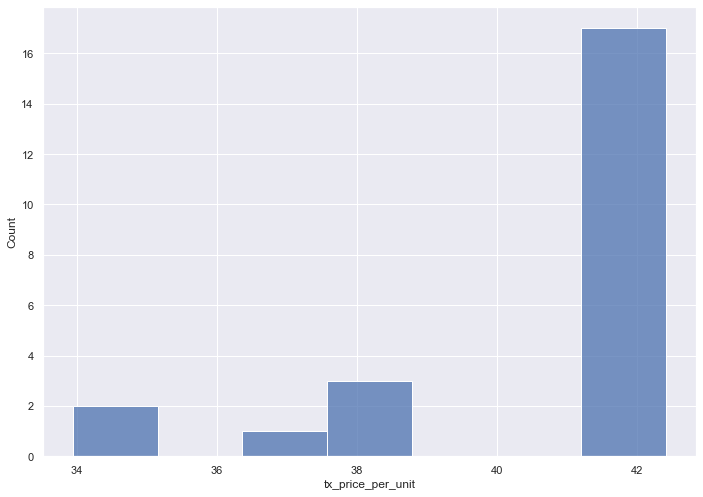

### Outputting summary table ### 	
count    23.00
mean     40.95
std       2.69
min      33.94
25%      40.50
50%      42.42
75%      42.42
max      42.42
Name: Infused Baby Jeeter - Blueberry Kush 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2022-04         13.0  41.12  2.58  35.03  42.42  42.42  42.42  42.42
2022-05         10.0  40.72  2.96  33.94  39.24  42.42  42.42  42.42
### Outputting time series line plot of MSRP along with confidence bands ### 	


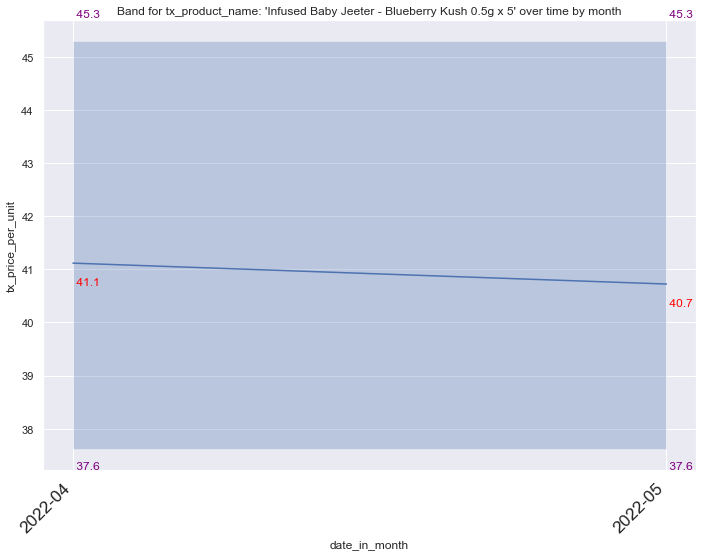

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-04                      37.6075                45.3075
2022-05                      37.6075                45.3075
EMMInfused Baby Jeeter - Gelato #33
EMMBaby Jeeter - Maui Wowie
EMMInfused Baby Jeeter - Banana Kush 0.5g x 5
EMMInfused Baby Jeeter - Churros 0.5g x 5
EMMBaby Jeeter - Limoncello
EMMBaby Jeeter - Banana Kush
EMMInfused Baby Jeeter - Peach Ringz
EMMJeeter Juice 1g Vape Cartridge Strawberry Cheesecake
EMT
Verifying download summaries for license C10-0000695-LIC...
Earliest download summary: 2021-11-15
Latest download summary: 2022-05-11
Found bad download summary for license C10-0000695-LIC on date 2022-05-05

[FAILURE] Found a total of 1 bad download summaries
[SUCCESS] No unknown transfer packages!
97.0% of incoming transfer packages have receiver wholesale price
# transactions missing incoming transfer package: 219 (0.08628739613006939%)
# transact

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['edible' 'pre-roll flower' 'vape cartridge' 'flower' 'topical' 'tincture'
 'other concentrate' 'pre-roll infused' 'capsule' 'extract' 'shake'
 'pre-roll leaf' 'seeds' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['capsule' 'vape cartridge' 'topical' 'edible' 'flower' 'pre-roll flower'
 'pre-roll infused' 'other concentrate' 'tincture' 'extract' 'shake'
 'pre-roll leaf' 'infused butter/oil']
EMTInfused jeeter 1g - Maui Wowie
EMTInfused Baby Jeeter - Blue Zkittlez 0.5g x 5
EMTBaby Jeeter - Tropicana Cookies
EMTBaby Jeeter - Blue Zkittlez
EMTInfused Baby Jeeter - Strawberry Shortcake
EMTInfused Baby Jeeter Grape Ape
EMTBaby Jeeter - Blueberry Kush
EMTInfused Baby Jeeter Durban Poison
EMTBaby Jeeter - Fire OG
EMTBaby Jeeter - Grapefruit Romulan
EMTBaby Jeeter - Honeydew
EMTBaby Jeeter - Watermelon Zkittlez
EMTInfused Baby Jeeter - Mai Tai
EMTInfused Baby Jeeter - Apple Frit

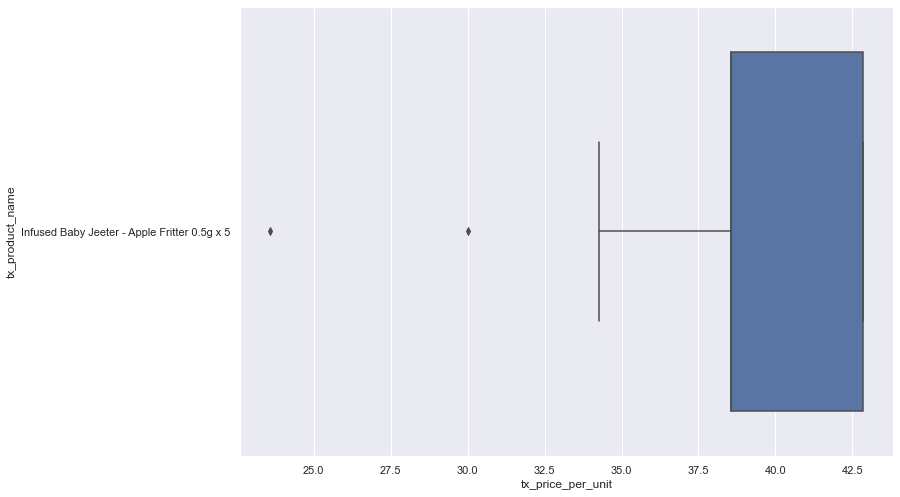

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Apple Fritter 0.5g x 5 in tx_product_name : 19


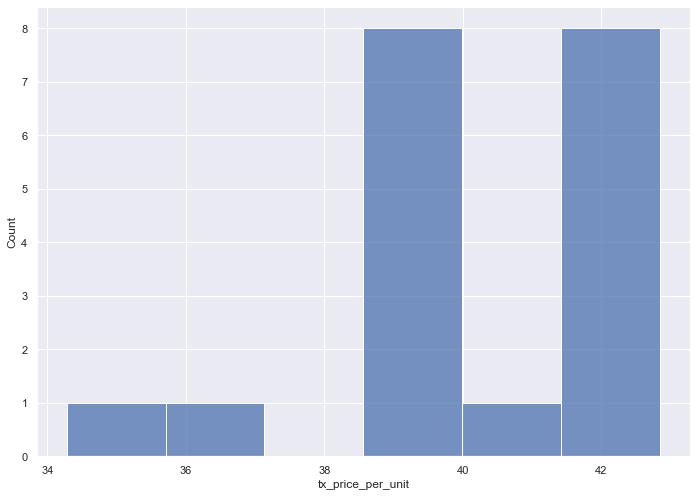

### Outputting summary table ### 	
count    19.00
mean     40.16
std       2.66
min      34.28
25%      38.57
50%      38.57
75%      42.85
max      42.85
Name: Infused Baby Jeeter - Apple Fritter 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2022-04          2.0  37.50  1.52  36.42  36.96  37.50  38.03  38.57
2022-05         17.0  40.48  2.61  34.28  38.57  41.03  42.85  42.85
### Outputting time series line plot of MSRP along with confidence bands ### 	


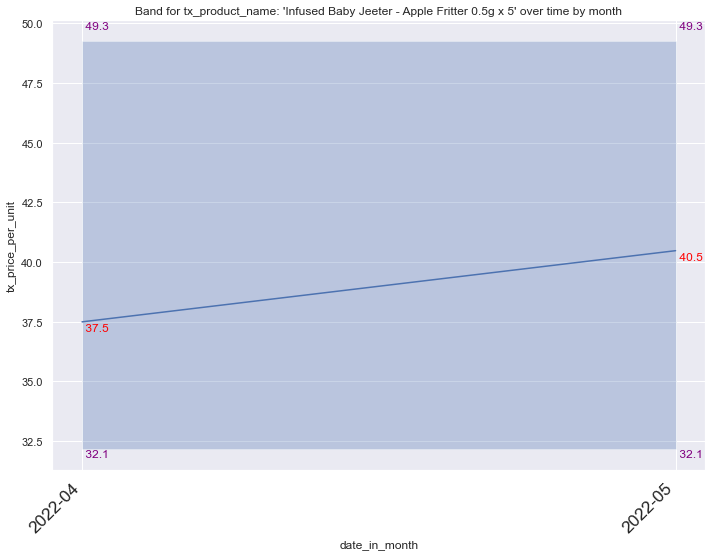

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-04                        32.15                  49.27
2022-05                        32.15                  49.27
EMTInfused Baby Jeeter - Watermelon Zkittlez 0.5g x 5
EMTInfused Baby Jeeter - Strawberry Shortcake 0.5g x 5
EMTInfused Baby Jeeter - Grape Ape 0.5g x 5
EMTInfused Baby Jeeter - Peach Ringz 0.5g x 5
EMTInfused Baby Jeeter - Maui Wowie 0.5g x 5
EMTInfused Baby Jeeter - Blueberry Kush 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 8.695652173913043 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


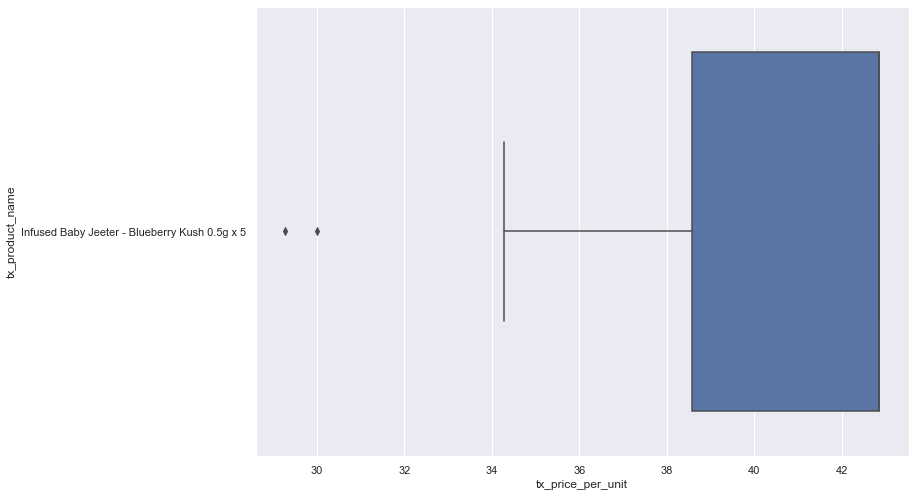

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Blueberry Kush 0.5g x 5 in tx_product_name : 21


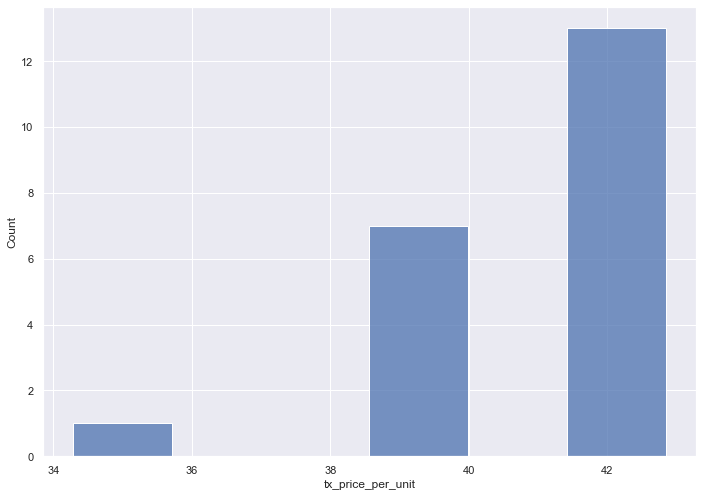

### Outputting summary table ### 	
count    21.00
mean     41.02
std       2.56
min      34.28
25%      38.57
50%      42.85
75%      42.85
max      42.85
Name: Infused Baby Jeeter - Blueberry Kush 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2022-04         17.0  40.58  2.67  34.28  38.57  42.85  42.85  42.85
2022-05          4.0  42.85  0.00  42.85  42.85  42.85  42.85  42.85
### Outputting time series line plot of MSRP along with confidence bands ### 	


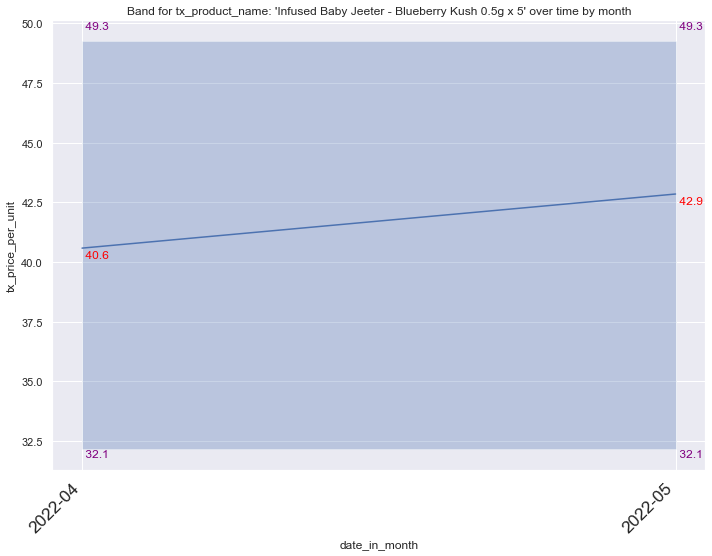

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-04                        32.15                  49.27
2022-05                        32.15                  49.27
EMTInfused Baby Jeeter - Gelato #33
EMTBaby Jeeter - Maui Wowie
EMTInfused Baby Jeeter - Banana Kush 0.5g x 5
EMTInfused Baby Jeeter - Churros 0.5g x 5
EMTBaby Jeeter - Limoncello
EMTBaby Jeeter - Banana Kush
EMTInfused Baby Jeeter - Peach Ringz
EMTJeeter Juice 1g Vape Cartridge Strawberry Cheesecake
EMF
Verifying download summaries for license C10-0000939-LIC...
Earliest download summary: 2021-10-01
Latest download summary: 2022-05-11

[SUCCESS] All download summaries look good!
[SUCCESS] No unknown transfer packages!
91.0% of incoming transfer packages have receiver wholesale price
# transactions missing incoming transfer package: 190 (0.7734581721962142%)
# transactions total: 24565
# receipts with mismatching transactions: 0 (0.0%)
# receipts mis

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	
### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['pre-roll flower' 'pre-roll infused' 'vape cartridge' 'shake' 'flower'
 'edible' 'pre-roll leaf' 'other concentrate' 'extract' 'tincture'
 'topical' 'capsule' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['flower' 'pre-roll flower' 'pre-roll infused' 'pre-roll leaf' 'topical'
 'vape cartridge' 'edible' 'extract' 'other concentrate' 'shake'
 'tincture' 'infused butter/oil' 'capsule']
EMFInfused jeeter 1g - Maui Wowie
EMFInfused Baby Jeeter - Blue Zkittlez 0.5g x 5
EMFBaby Jeeter - Tropicana Cookies
EMFBaby Jeeter - Blue Zkittlez
EMFInfused Baby Jeeter - Strawberry Shortcake
EMFInfused Baby Jeeter Grape Ape
EMFBaby Jeeter - Blueberry Kush
EMFInfused Baby Jeeter Durban Poison
EMFBaby Jeeter - Fire OG
EMFBaby Jeeter - Grapefruit Romulan
EMFBaby Jeeter - Honeydew
EMFBaby Jeeter - Watermelon Zkittlez
EMFInfused Baby Jeeter - Mai Tai
EMFInfused Baby Jeeter - Apple Fritter 0.5g

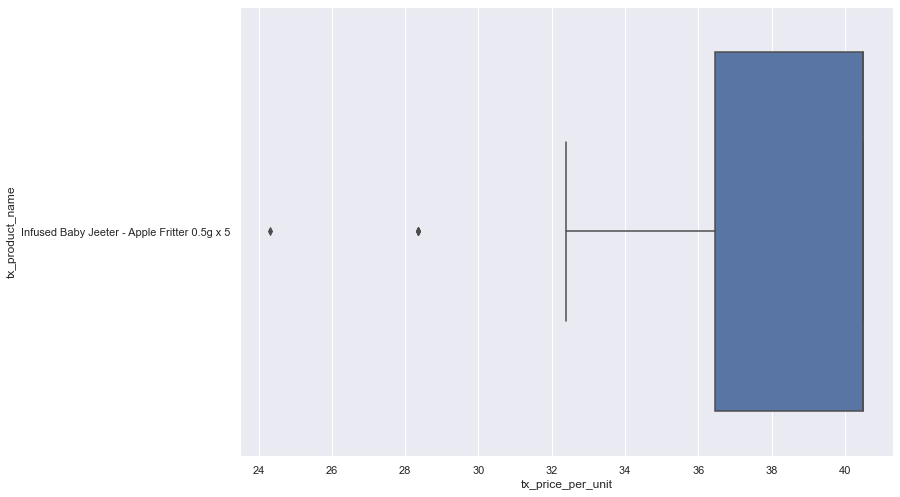

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Apple Fritter 0.5g x 5 in tx_product_name : 19


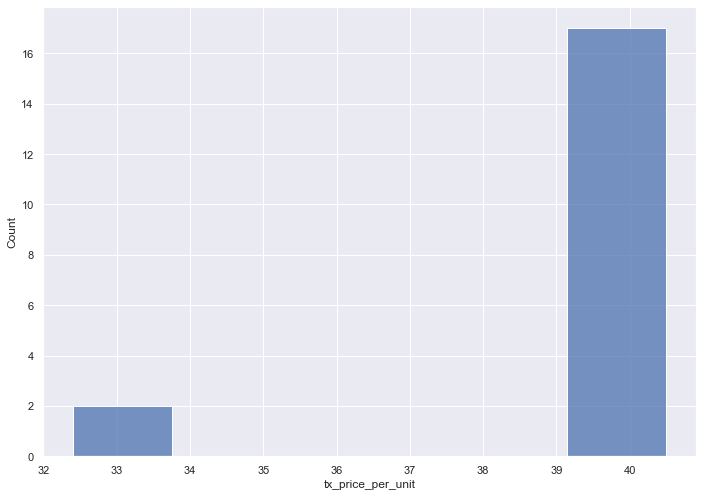

### Outputting summary table ### 	
count    19.00
mean     39.65
std       2.55
min      32.40
25%      40.50
50%      40.50
75%      40.50
max      40.50
Name: Infused Baby Jeeter - Apple Fritter 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count  mean   std   min   25%   50%   75%   max
date_in_month                                                 
2022-04         18.0  39.6  2.62  32.4  40.5  40.5  40.5  40.5
2022-05          1.0  40.5   NaN  40.5  40.5  40.5  40.5  40.5
### Outputting time series line plot of MSRP along with confidence bands ### 	


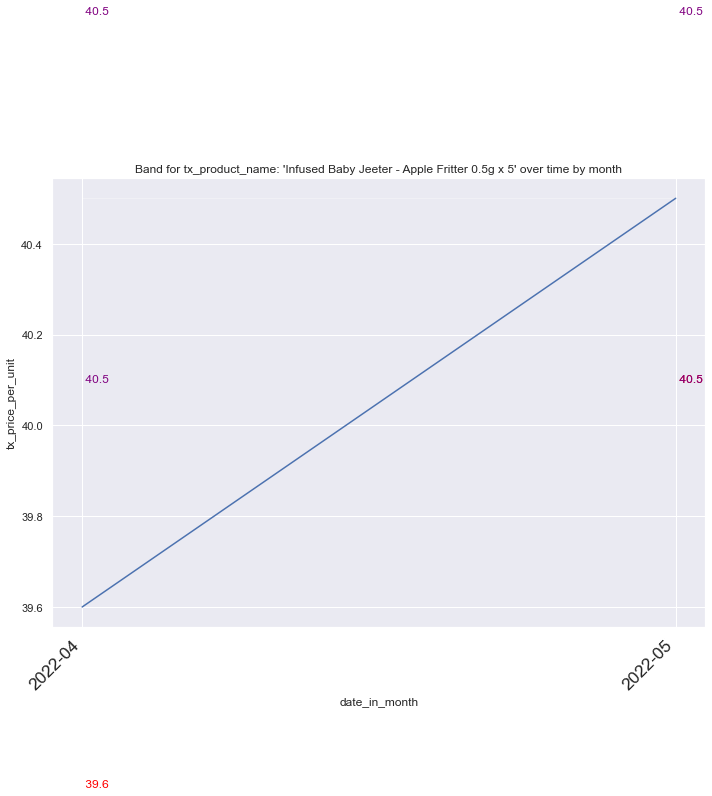

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-04                         40.5                   40.5
2022-05                         40.5                   40.5
EMFInfused Baby Jeeter - Watermelon Zkittlez 0.5g x 5
EMFInfused Baby Jeeter - Strawberry Shortcake 0.5g x 5
EMFInfused Baby Jeeter - Grape Ape 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 13.636363636363635 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


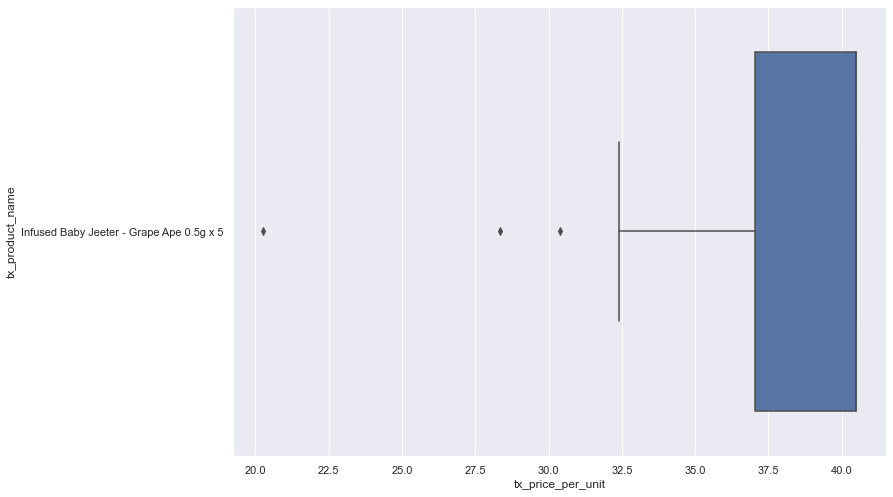

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Grape Ape 0.5g x 5 in tx_product_name : 19


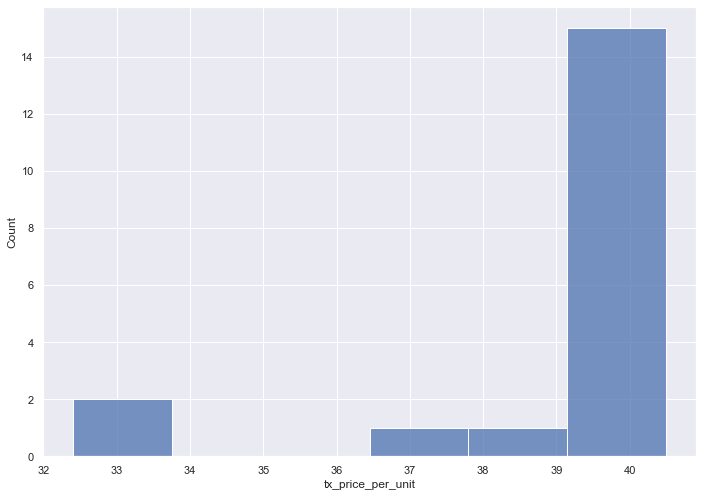

### Outputting summary table ### 	
count    19.00
mean     39.35
std       2.64
min      32.40
25%      40.50
50%      40.50
75%      40.50
max      40.50
Name: Infused Baby Jeeter - Grape Ape 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std   min    25%   50%   75%   max
date_in_month                                                   
2022-04          6.0  40.50  0.00  40.5  40.50  40.5  40.5  40.5
2022-05         13.0  38.82  3.07  32.4  38.87  40.5  40.5  40.5
### Outputting time series line plot of MSRP along with confidence bands ### 	


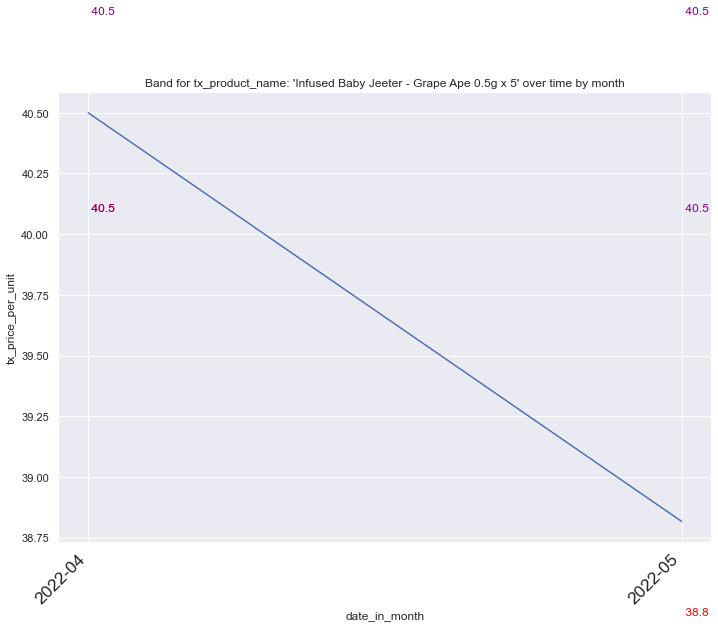

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-04                         40.5                   40.5
2022-05                         40.5                   40.5
EMFInfused Baby Jeeter - Peach Ringz 0.5g x 5
EMFInfused Baby Jeeter - Maui Wowie 0.5g x 5
EMFInfused Baby Jeeter - Blueberry Kush 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


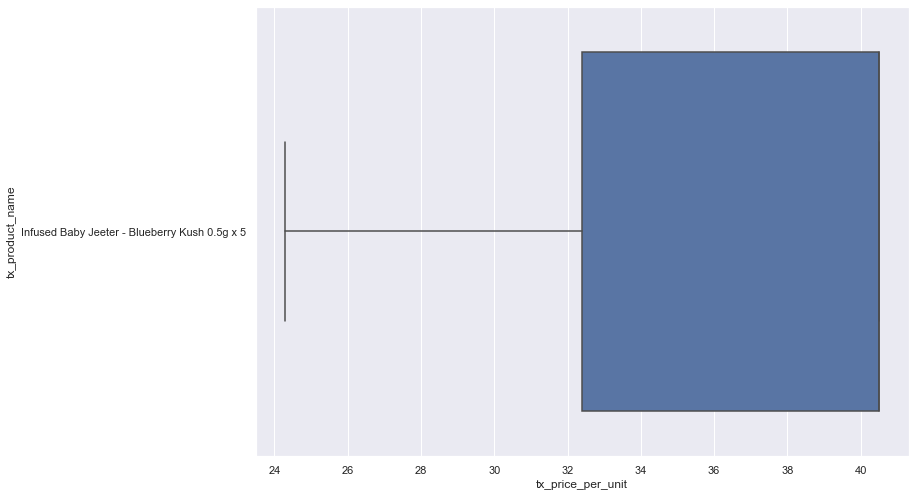

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Blueberry Kush 0.5g x 5 in tx_product_name : 21


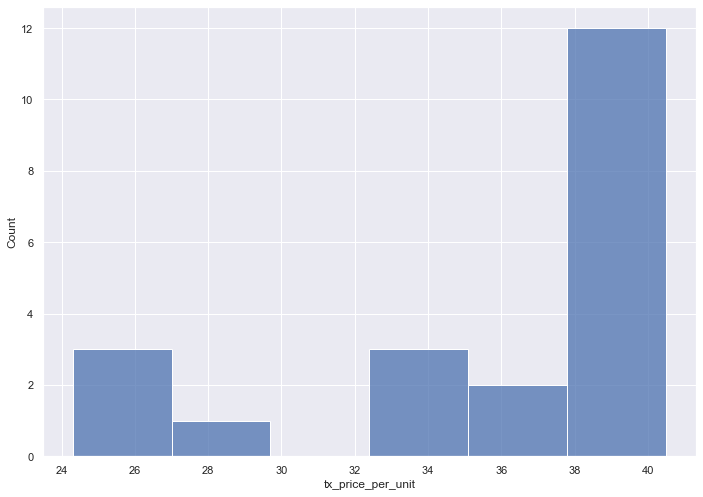

### Outputting summary table ### 	
count    21.00
mean     35.97
std       6.07
min      24.30
25%      32.40
50%      40.50
75%      40.50
max      40.50
Name: Infused Baby Jeeter - Blueberry Kush 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std   min   25%    50%   75%   max
date_in_month                                                   
2022-04         18.0  35.22  6.26  24.3  32.4  37.51  40.5  40.5
2022-05          3.0  40.50  0.00  40.5  40.5  40.50  40.5  40.5
### Outputting time series line plot of MSRP along with confidence bands ### 	


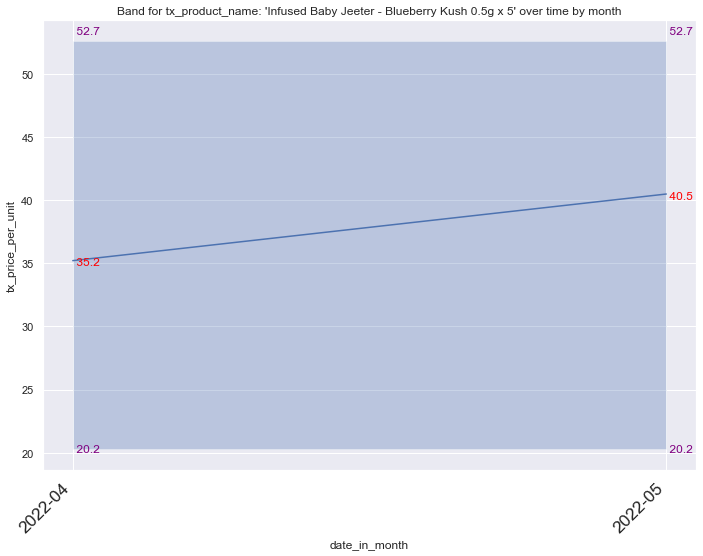

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-04                        20.25                  52.65
2022-05                        20.25                  52.65
EMFInfused Baby Jeeter - Gelato #33
EMFBaby Jeeter - Maui Wowie
EMFInfused Baby Jeeter - Banana Kush 0.5g x 5
EMFInfused Baby Jeeter - Churros 0.5g x 5
EMFBaby Jeeter - Limoncello
EMFBaby Jeeter - Banana Kush
EMFInfused Baby Jeeter - Peach Ringz
EMFJeeter Juice 1g Vape Cartridge Strawberry Cheesecake
ST
Verifying download summaries for license C12-0000359-LIC...
Earliest download summary: 2022-01-03
Latest download summary: 2022-05-11
Found bad download summary for license C12-0000359-LIC on date 2022-04-12
Found bad download summary for license C12-0000359-LIC on date 2022-03-11
Found bad download summary for license C12-0000359-LIC on date 2022-03-10
Found bad download summary for license C12-0000359-LIC on date 2022-03-09

Verifying download summa

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['flower' 'vape cartridge' 'extract' 'pre-roll infused' 'edible'
 'pre-roll flower' 'pre-roll leaf' 'topical' 'tincture' 'capsule'
 'other concentrate' 'shake']
### Available combined product category name in sales dataframe ### 	
['edible' 'flower' 'extract' 'vape cartridge' 'pre-roll leaf'
 'pre-roll infused' 'pre-roll flower' 'other concentrate' 'capsule'
 'topical' 'tincture' 'shake']
STInfused jeeter 1g - Maui Wowie
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 4.3478260869565215 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


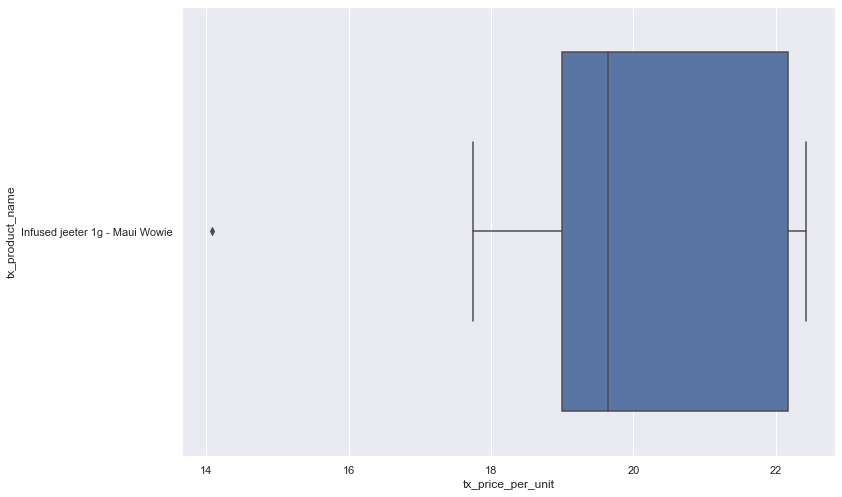

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused jeeter 1g - Maui Wowie in tx_product_name : 22


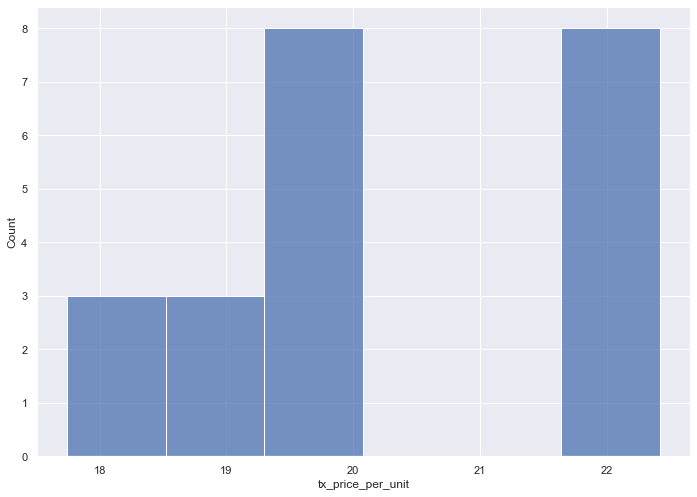

### Outputting summary table ### 	
count    22.00
mean     20.24
std       1.67
min      17.74
25%      19.12
50%      19.78
75%      22.17
max      22.42
Name: Infused jeeter 1g - Maui Wowie, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-04          9.0  20.85  1.75  17.74  19.47  22.17  22.17  22.42
2021-05         12.0  19.81  1.62  17.74  18.92  19.45  20.51  22.42
2021-06          1.0  19.91   NaN  19.91  19.91  19.91  19.91  19.91
### Outputting time series line plot of MSRP along with confidence bands ### 	


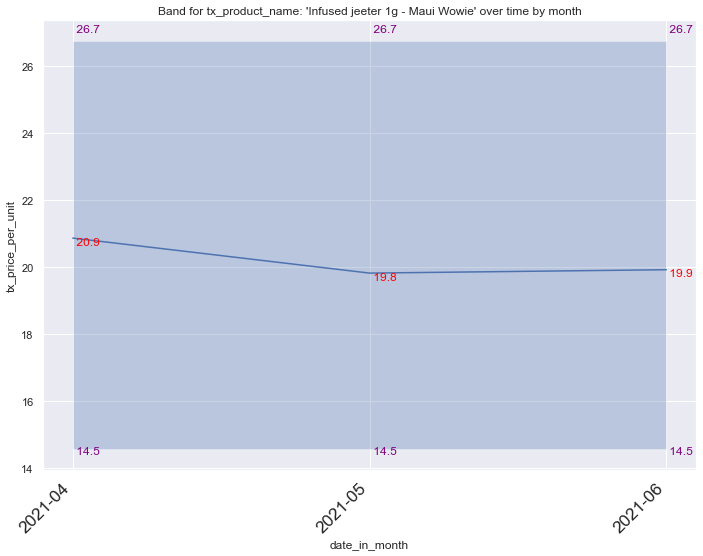

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-04                       14.545                 26.745
2021-05                       14.545                 26.745
2021-06                       14.545                 26.745
STInfused Baby Jeeter - Blue Zkittlez 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 3.125 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


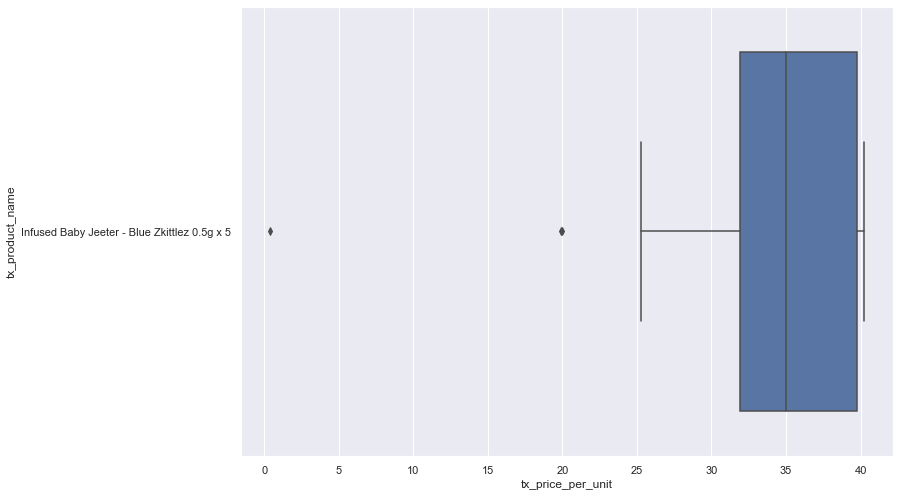

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Blue Zkittlez 0.5g x 5 in tx_product_name : 93


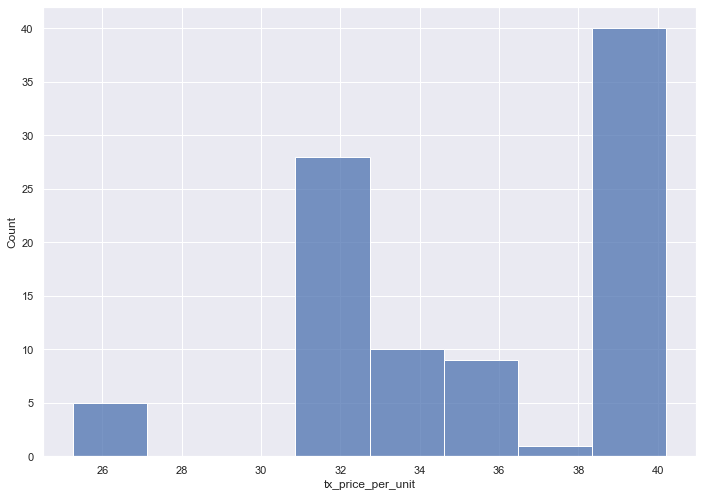

### Outputting summary table ### 	
count    93.00
mean     35.54
std       4.25
min      25.25
25%      31.88
50%      34.99
75%      39.76
max      40.22
Name: Infused Baby Jeeter - Blue Zkittlez 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2022-01         24.0  35.27  4.03  25.54  31.96  33.84  39.76  39.94
2022-03          2.0  39.85  0.13  39.76  39.80  39.85  39.89  39.94
2022-04         59.0  35.25  4.41  25.25  31.88  34.99  39.76  40.22
2022-05          8.0  37.46  3.56  31.81  35.82  39.76  39.76  39.76
### Outputting time series line plot of MSRP along with confidence bands ### 	


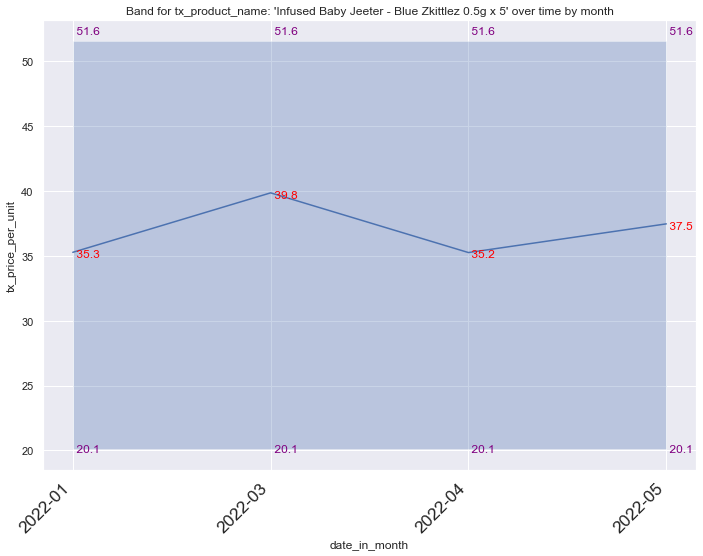

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-01                      20.0725                51.5725
2022-03                      20.0725                51.5725
2022-04                      20.0725                51.5725
2022-05                      20.0725                51.5725
STBaby Jeeter - Tropicana Cookies
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 2.5 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


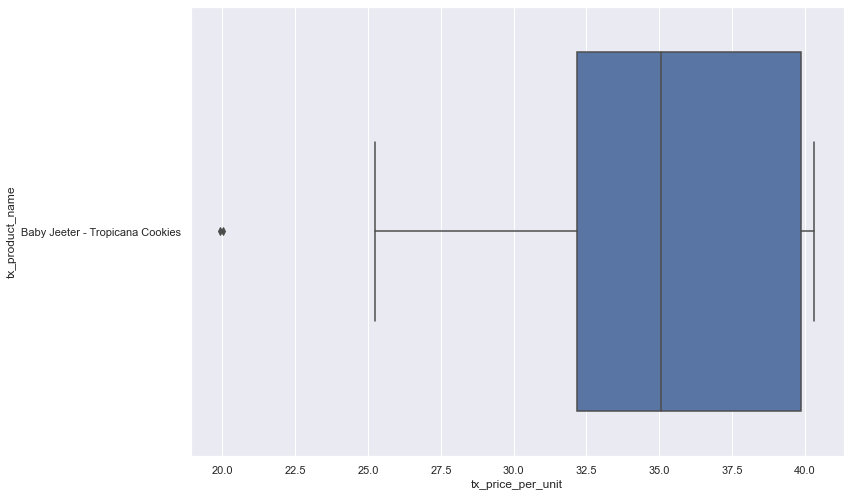

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Tropicana Cookies in tx_product_name : 78


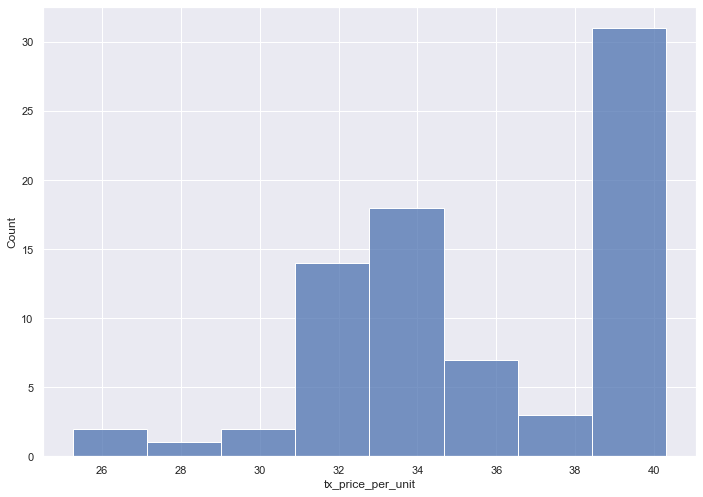

### Outputting summary table ### 	
count    78.00
mean     35.81
std       3.88
min      25.25
25%      33.80
50%      35.11
75%      39.87
max      40.31
Name: Baby Jeeter - Tropicana Cookies, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-09         14.0  36.24  5.07  25.32  33.91  39.87  39.94  40.31
2021-10         25.0  36.98  2.99  29.90  34.04  37.21  39.87  40.04
2021-11          5.0  34.02  3.46  31.96  32.04  32.18  33.88  40.04
2021-12         32.0  35.17  3.94  25.25  31.94  33.88  39.78  40.22
2022-01          2.0  32.84  1.36  31.88  32.36  32.84  33.32  33.80
### Outputting time series line plot of MSRP along with confidence bands ### 	


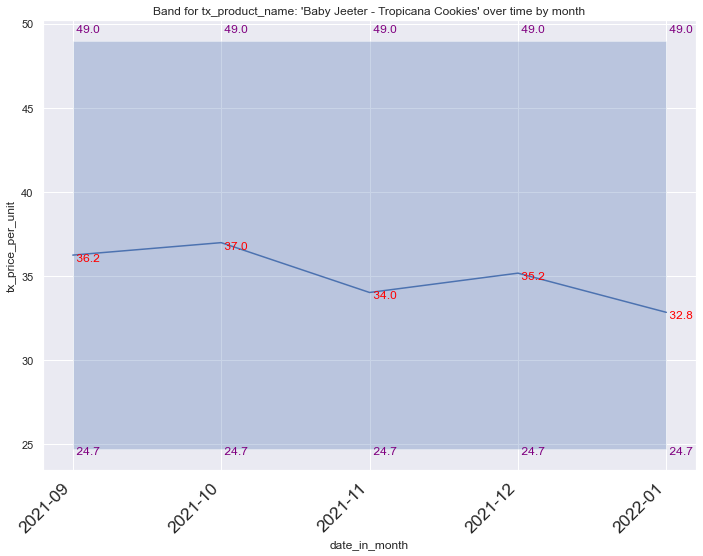

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-09                       24.695                 48.975
2021-10                       24.695                 48.975
2021-11                       24.695                 48.975
2021-12                       24.695                 48.975
2022-01                       24.695                 48.975
STBaby Jeeter - Blue Zkittlez
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


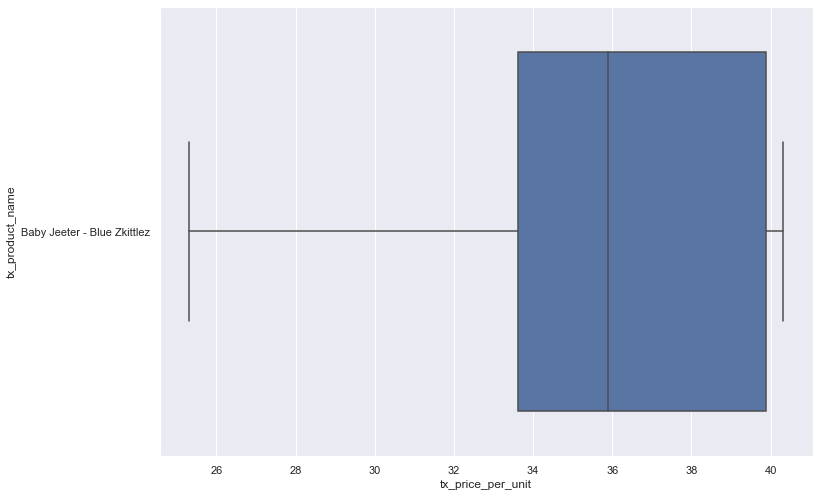

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Blue Zkittlez in tx_product_name : 27


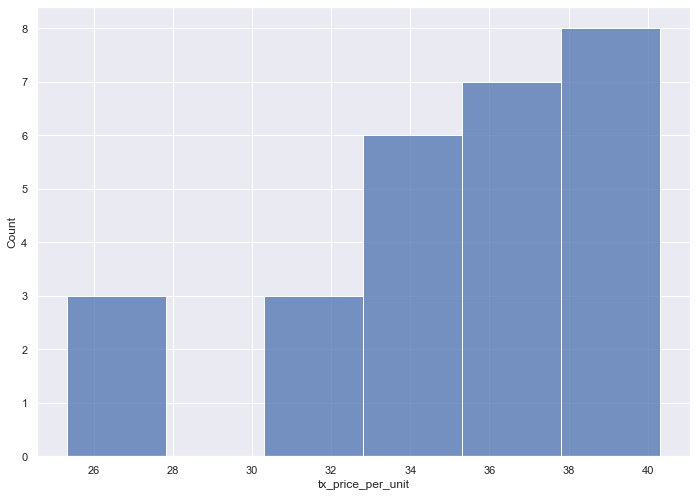

### Outputting summary table ### 	
count    27.00
mean     35.19
std       4.50
min      25.32
25%      33.61
50%      35.88
75%      39.87
max      40.31
Name: Baby Jeeter - Blue Zkittlez, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean  std    min    25%    50%    75%    max
date_in_month                                                      
2021-07         27.0  35.19  4.5  25.32  33.61  35.88  39.87  40.31
### Outputting time series line plot of MSRP along with confidence bands ### 	


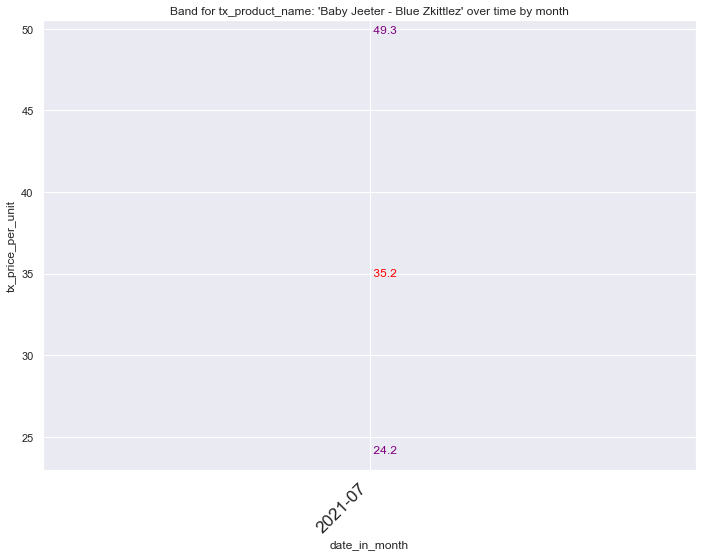

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-07                        24.22                  49.26
STInfused Baby Jeeter - Strawberry Shortcake
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 7.4074074074074066 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


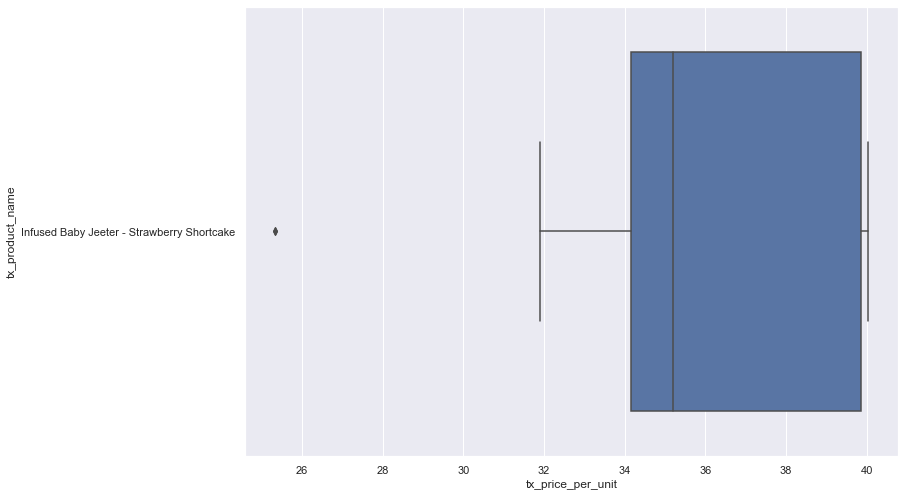

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Strawberry Shortcake in tx_product_name : 25


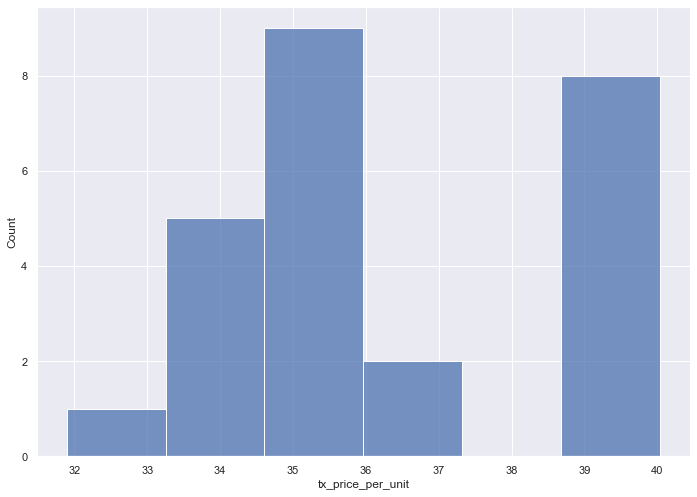

### Outputting summary table ### 	
count    25.00
mean     36.44
std       2.62
min      31.89
25%      34.64
50%      35.33
75%      39.87
max      40.04
Name: Infused Baby Jeeter - Strawberry Shortcake, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-07         25.0  36.44  2.62  31.89  34.64  35.33  39.87  40.04
### Outputting time series line plot of MSRP along with confidence bands ### 	


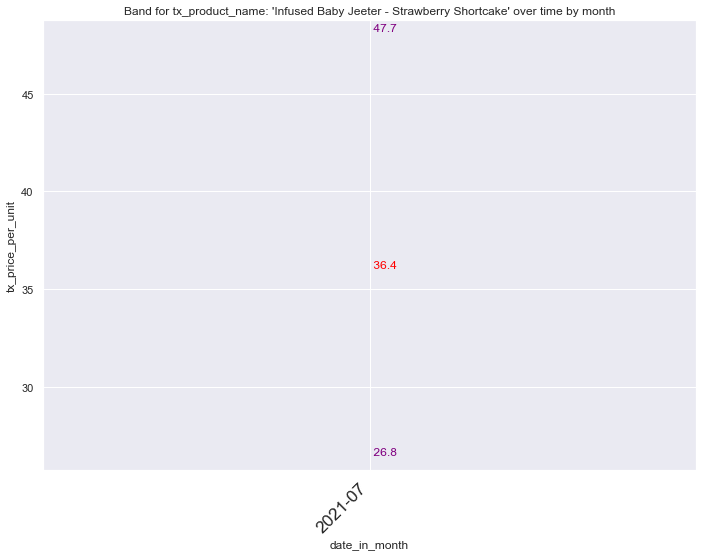

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-07                       26.795                 47.715
STInfused Baby Jeeter Grape Ape
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


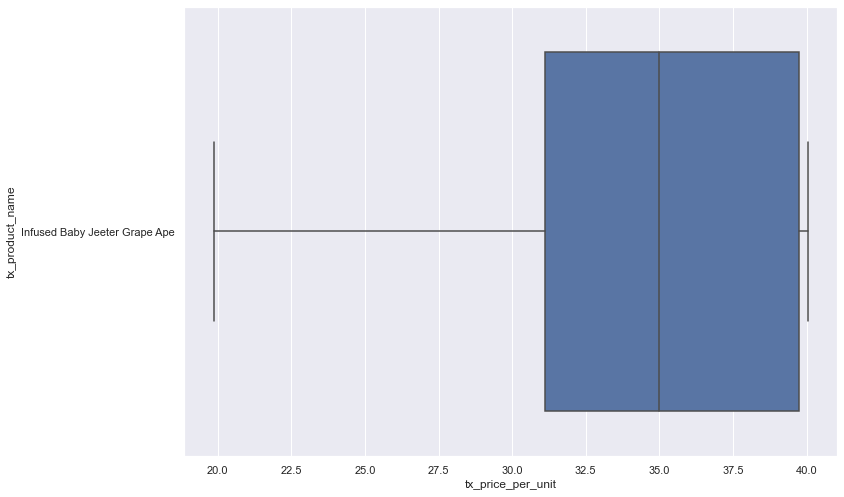

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter Grape Ape in tx_product_name : 71


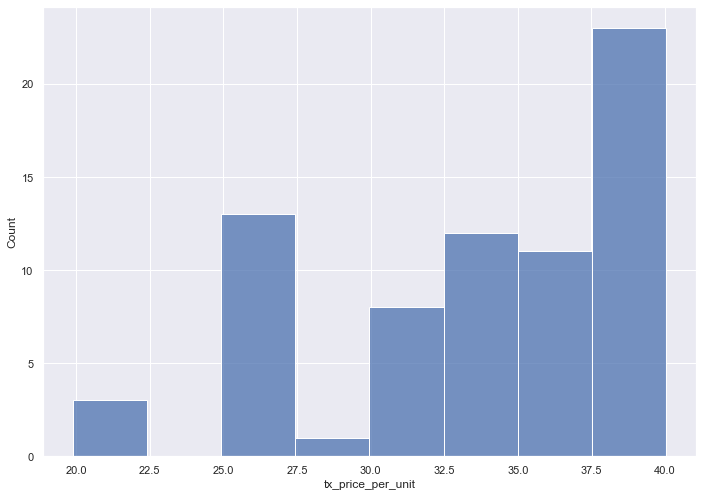

### Outputting summary table ### 	
count    71.00
mean     33.70
std       6.00
min      19.88
25%      31.12
50%      34.99
75%      39.76
max      40.04
Name: Infused Baby Jeeter Grape Ape, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-10          7.0  32.82  7.33  25.32  25.32  33.89  39.96  39.96
2021-11         30.0  33.21  6.76  19.93  25.89  33.88  39.87  40.04
2021-12         34.0  34.32  5.07  19.88  32.42  35.07  37.18  39.94
### Outputting time series line plot of MSRP along with confidence bands ### 	


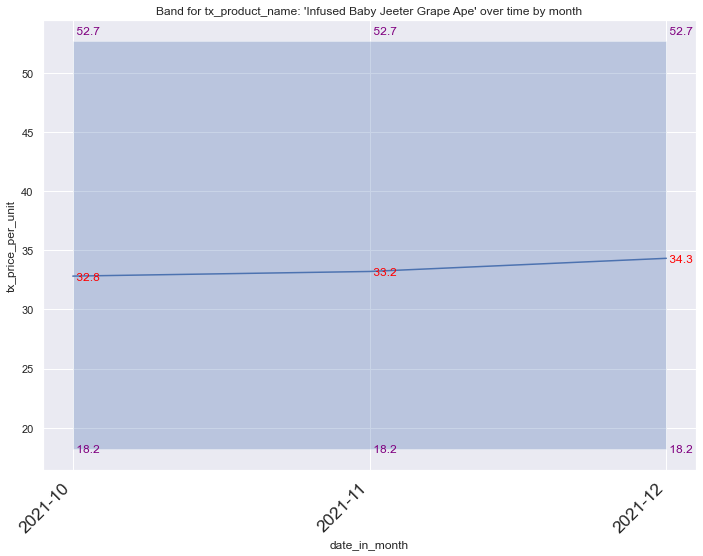

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-10                        18.16                  52.72
2021-11                        18.16                  52.72
2021-12                        18.16                  52.72
STBaby Jeeter - Blueberry Kush
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 5.714285714285714 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


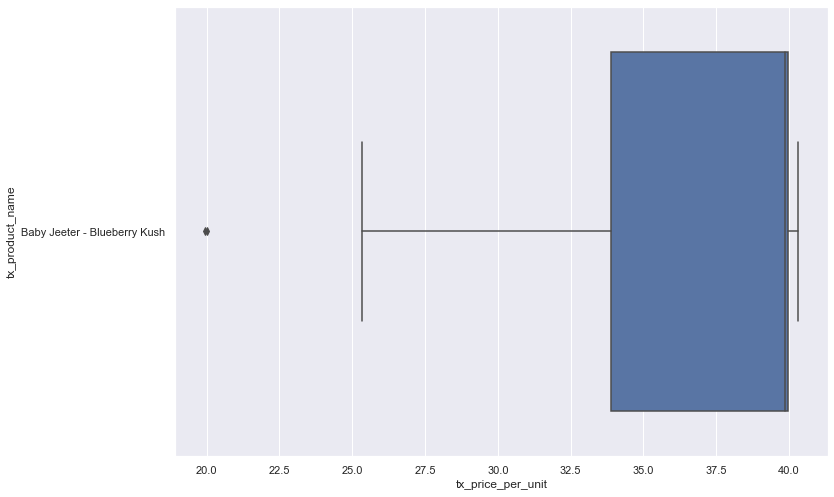

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Blueberry Kush in tx_product_name : 33


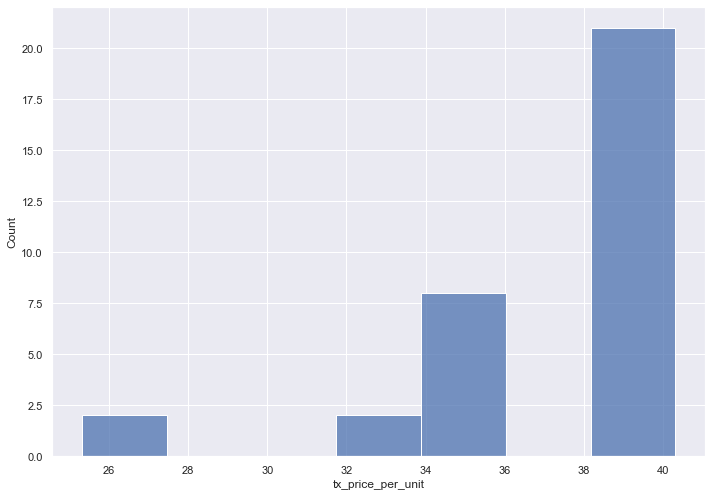

### Outputting summary table ### 	
count    33.00
mean     37.11
std       4.25
min      25.32
25%      33.96
50%      39.87
75%      39.96
max      40.31
Name: Baby Jeeter - Blueberry Kush, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-09         33.0  37.11  4.25  25.32  33.96  39.87  39.96  40.31
### Outputting time series line plot of MSRP along with confidence bands ### 	


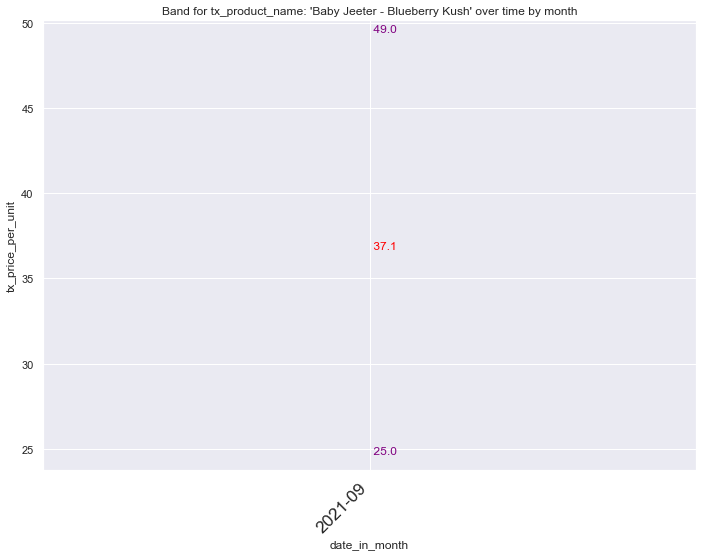

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-09                        24.96                  48.96
STInfused Baby Jeeter Durban Poison
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 9.836065573770492 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


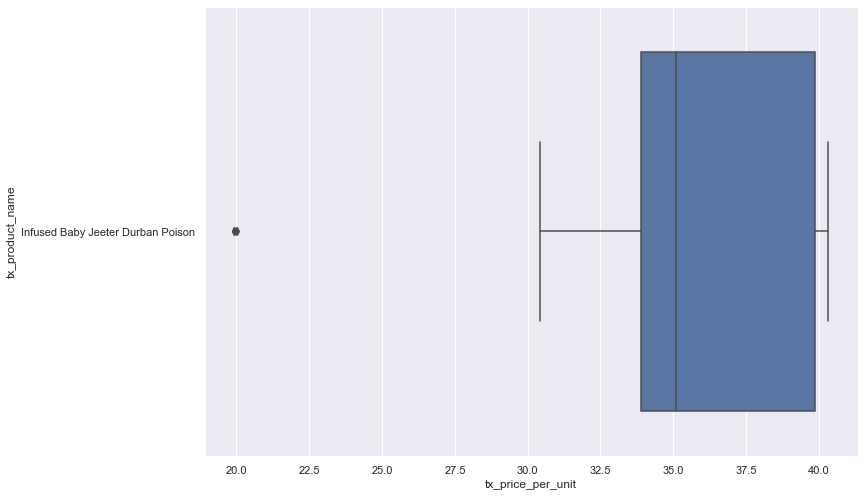

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter Durban Poison in tx_product_name : 55


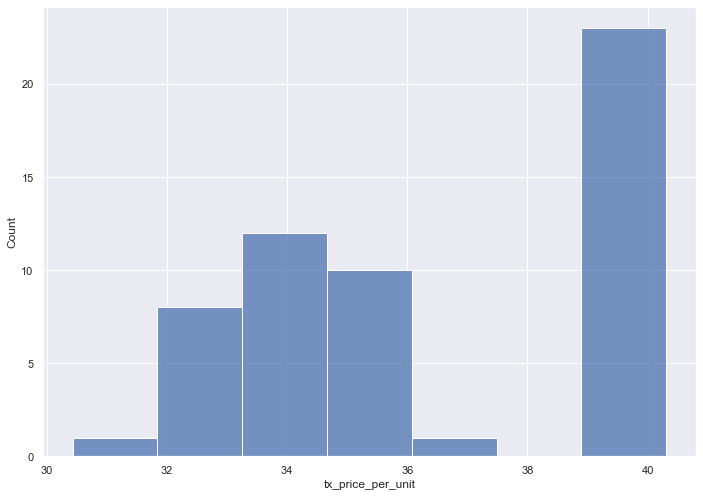

### Outputting summary table ### 	
count    55.00
mean     36.38
std       3.26
min      30.43
25%      33.96
50%      35.16
75%      39.92
max      40.31
Name: Infused Baby Jeeter Durban Poison, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-08          3.0  34.35  0.63  33.96  33.99  34.02  34.55  35.08
2021-09         20.0  36.65  2.84  31.90  34.38  35.48  39.87  39.96
2021-10         28.0  36.63  3.59  31.89  33.46  38.01  39.98  40.31
2021-11          4.0  34.82  3.90  30.43  33.02  34.48  36.28  39.87
### Outputting time series line plot of MSRP along with confidence bands ### 	


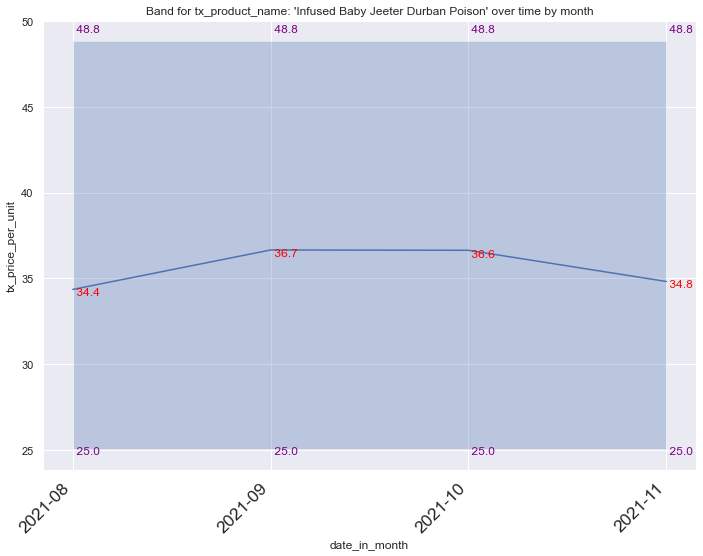

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-08                      25.0275                48.8475
2021-09                      25.0275                48.8475
2021-10                      25.0275                48.8475
2021-11                      25.0275                48.8475
STBaby Jeeter - Fire OG
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 21.052631578947366 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


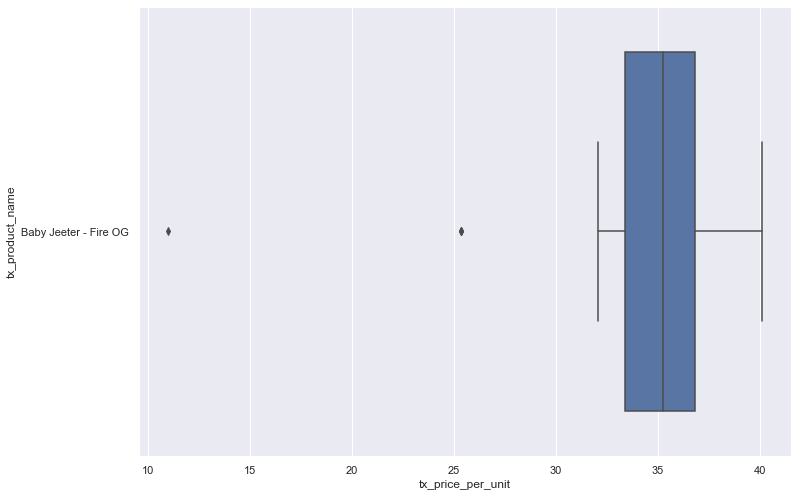

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Fire OG in tx_product_name : 15


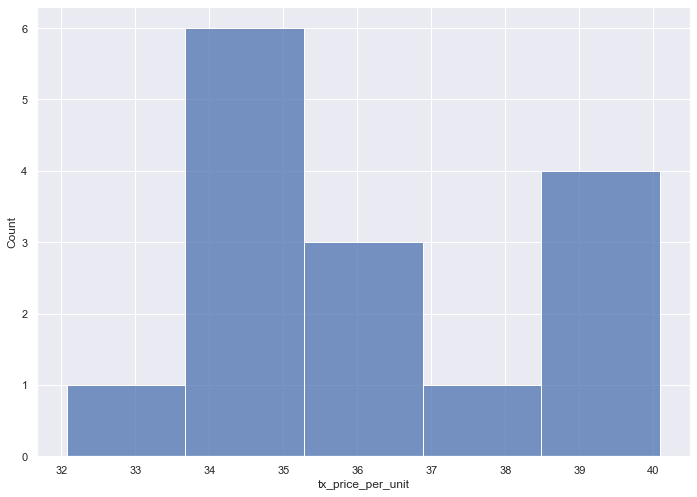

### Outputting summary table ### 	
count    15.00
mean     36.51
std       2.45
min      32.07
25%      34.92
50%      35.92
75%      38.58
max      40.09
Name: Baby Jeeter - Fire OG, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-06         15.0  36.51  2.45  32.07  34.92  35.92  38.58  40.09
### Outputting time series line plot of MSRP along with confidence bands ### 	


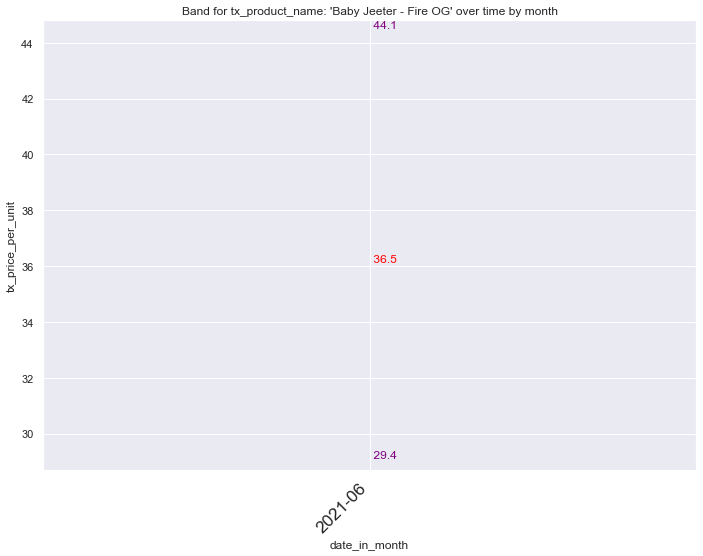

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-06                        29.43                  44.07
STBaby Jeeter - Grapefruit Romulan
STBaby Jeeter - Honeydew
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


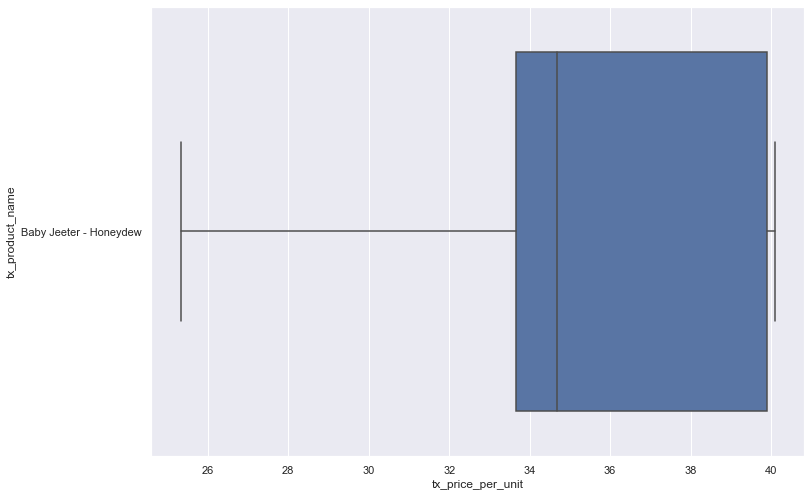

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Honeydew in tx_product_name : 31


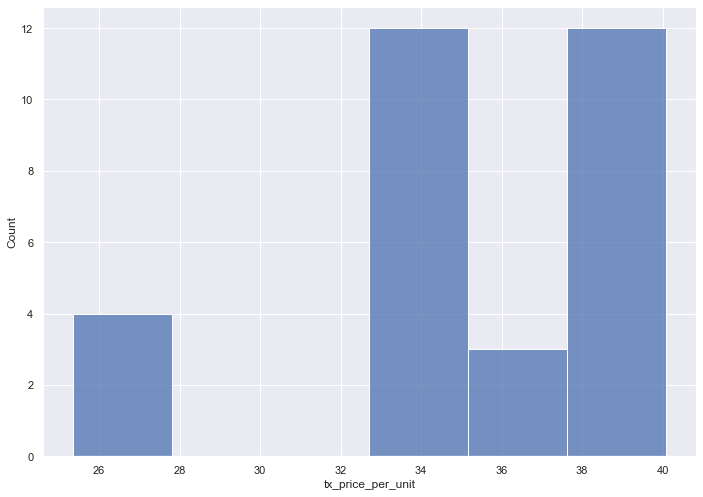

### Outputting summary table ### 	
count    31.00
mean     35.24
std       4.69
min      25.34
25%      33.66
50%      34.67
75%      39.91
max      40.09
Name: Baby Jeeter - Honeydew, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-05         12.0  35.99  2.99  33.26  33.39  34.45  39.91  39.91
2021-06         19.0  34.76  5.52  25.34  33.96  35.83  39.91  40.09
### Outputting time series line plot of MSRP along with confidence bands ### 	


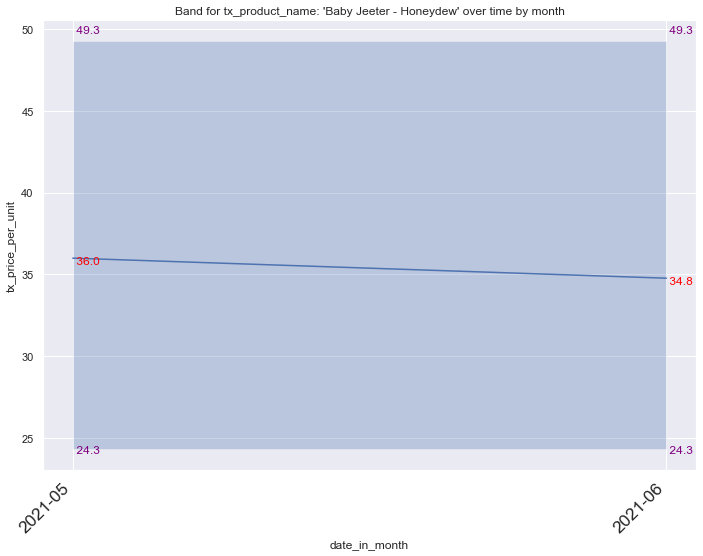

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-05                      24.2975                49.2775
2021-06                      24.2975                49.2775
STBaby Jeeter - Watermelon Zkittlez
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 3.7735849056603774 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


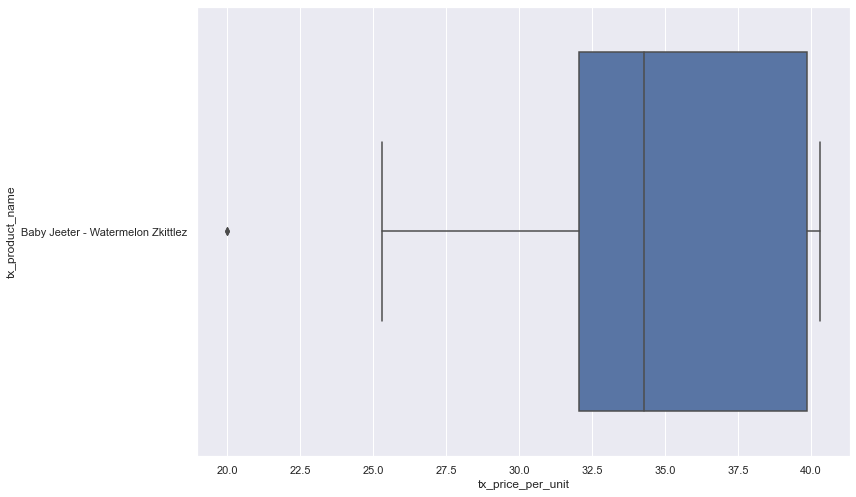

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Watermelon Zkittlez in tx_product_name : 51


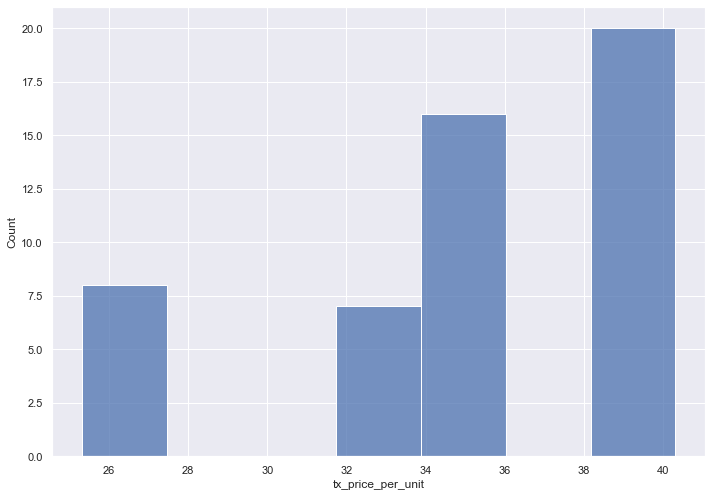

### Outputting summary table ### 	
count    51.00
mean     34.89
std       5.10
min      25.32
25%      32.07
50%      34.29
75%      39.87
max      40.31
Name: Baby Jeeter - Watermelon Zkittlez, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-04          9.0  28.72  4.10  25.34  25.34  25.54  32.07  35.41
2021-05         11.0  35.54  4.50  25.34  33.86  35.92  39.91  40.00
2021-09         30.0  36.50  4.31  25.32  33.89  39.87  39.87  40.31
2021-10          1.0  35.24   NaN  35.24  35.24  35.24  35.24  35.24
### Outputting time series line plot of MSRP along with confidence bands ### 	


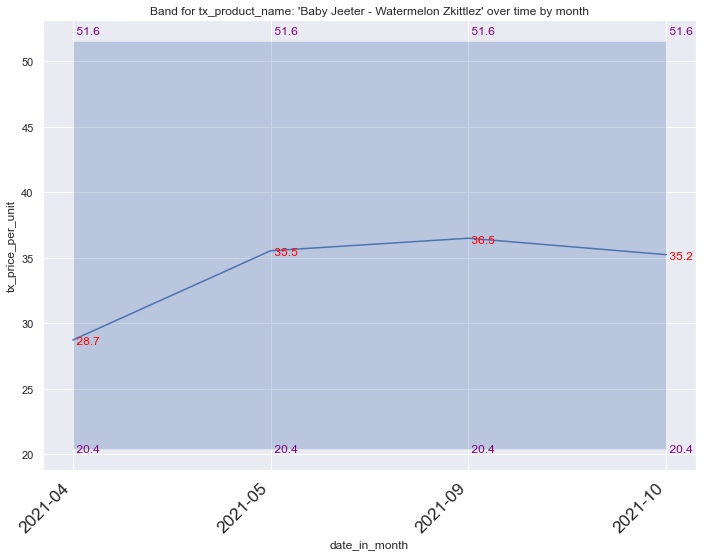

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-04                        20.37                  51.57
2021-05                        20.37                  51.57
2021-09                        20.37                  51.57
2021-10                        20.37                  51.57
STInfused Baby Jeeter - Mai Tai
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 23.809523809523807 %


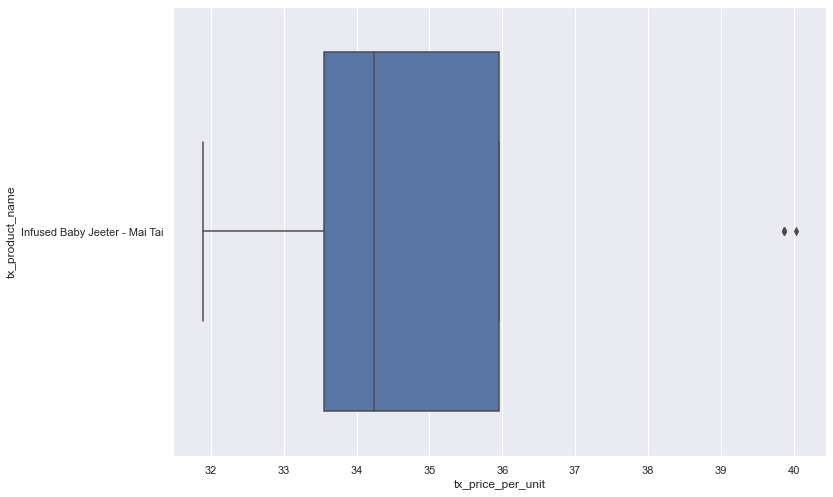

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Mai Tai in tx_product_name : 16


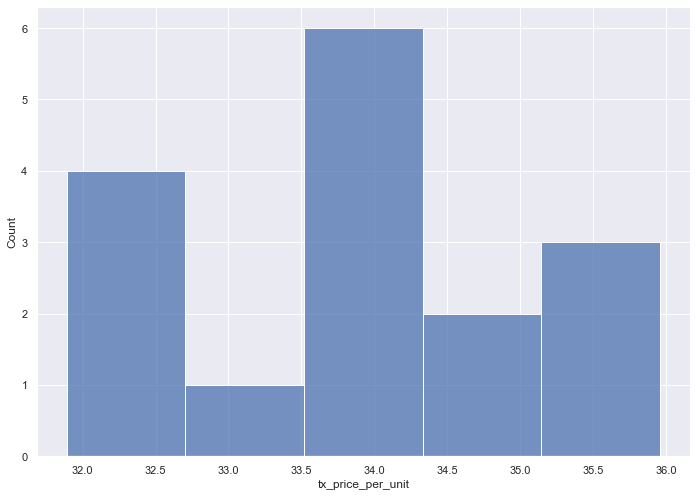

### Outputting summary table ### 	
count    16.00
mean     33.83
std       1.30
min      31.89
25%      33.03
50%      33.92
75%      34.72
max      35.96
Name: Infused Baby Jeeter - Mai Tai, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-07          9.0  34.21  1.18  32.03  33.55  34.24  35.08  35.96
2021-08          7.0  33.34  1.36  31.89  32.07  33.89  34.00  35.48
### Outputting time series line plot of MSRP along with confidence bands ### 	


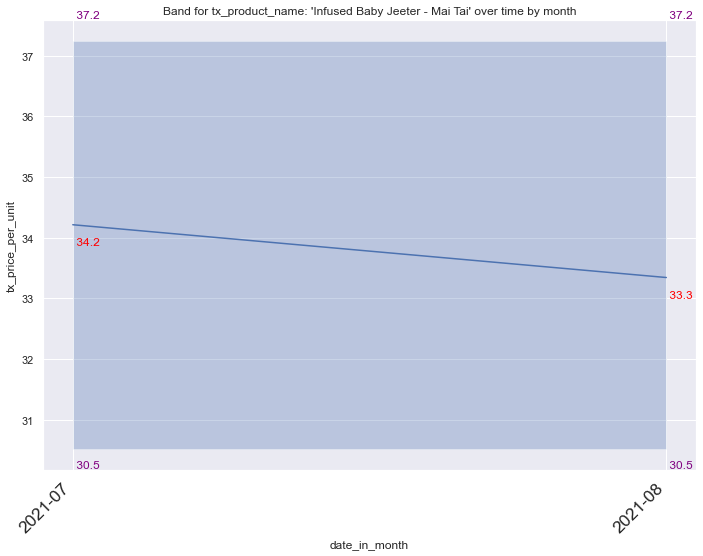

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-07                      30.5075                37.2475
2021-08                      30.5075                37.2475
STInfused Baby Jeeter - Apple Fritter 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 12.121212121212121 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


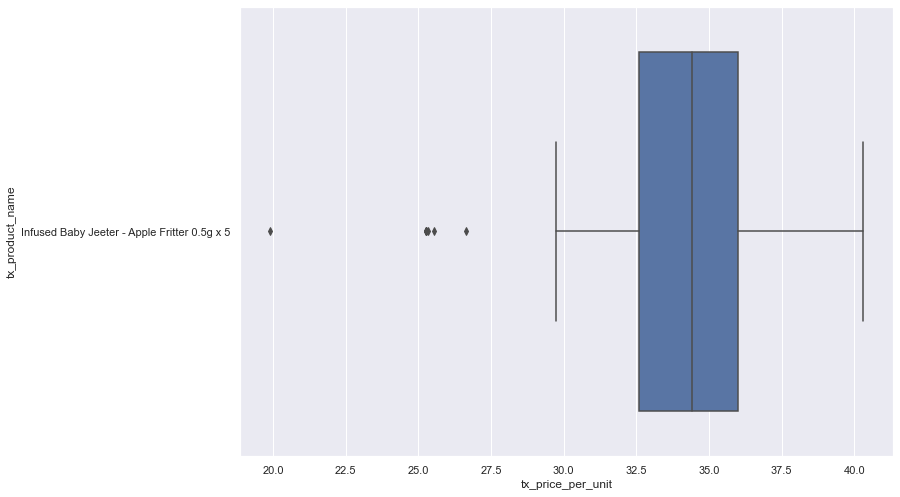

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Apple Fritter 0.5g x 5 in tx_product_name : 58


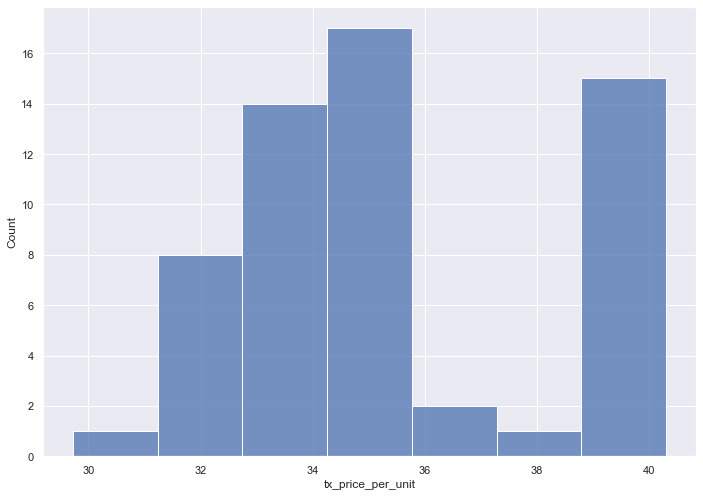

### Outputting summary table ### 	
count    58.00
mean     35.57
std       2.91
min      29.72
25%      33.89
50%      34.56
75%      39.26
max      40.31
Name: Infused Baby Jeeter - Apple Fritter 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-08         19.0  34.90  1.95  32.04  33.92  34.20  35.42  39.87
2021-09         23.0  35.89  2.67  31.90  34.42  35.08  37.96  40.31
2022-02         12.0  36.29  4.29  29.72  32.09  38.76  39.94  40.22
2022-03          4.0  34.79  3.44  31.81  33.30  33.80  35.29  39.76
### Outputting time series line plot of MSRP along with confidence bands ### 	


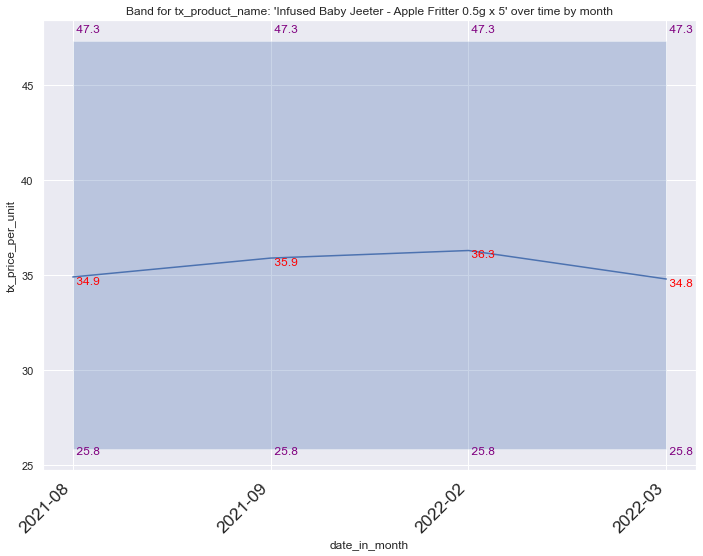

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-08                     25.83125               47.32125
2021-09                     25.83125               47.32125
2022-02                     25.83125               47.32125
2022-03                     25.83125               47.32125
STInfused Baby Jeeter - Watermelon Zkittlez 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


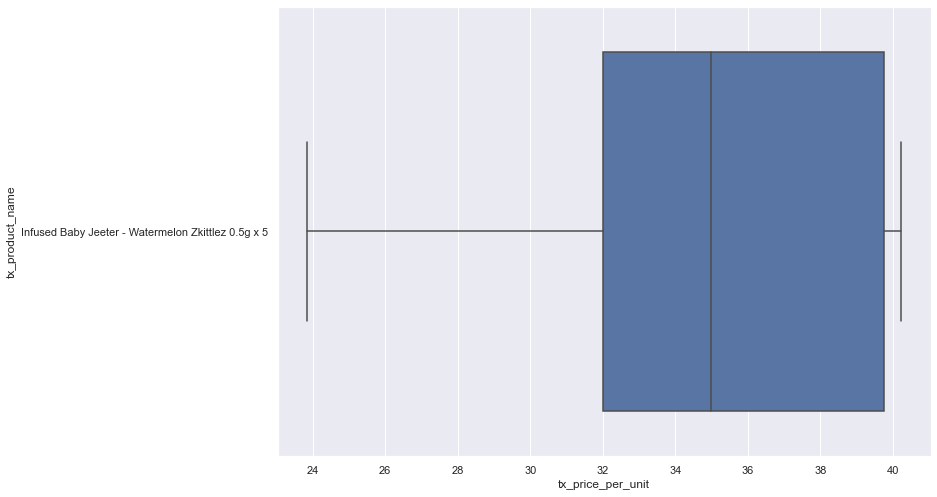

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Watermelon Zkittlez 0.5g x 5 in tx_product_name : 23


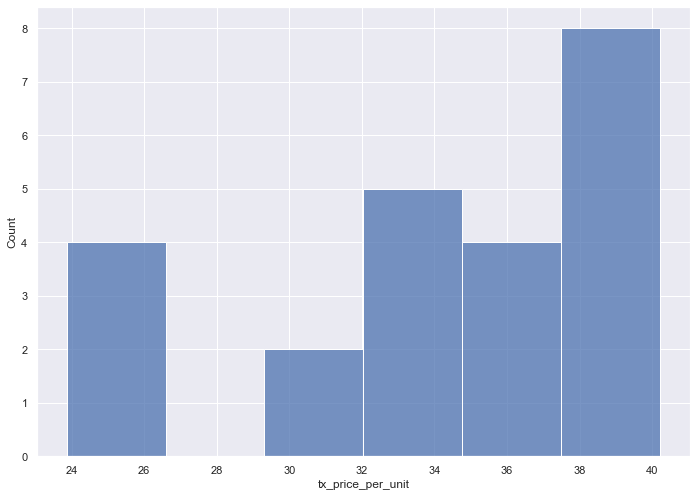

### Outputting summary table ### 	
count    23.00
mean     34.27
std       5.33
min      23.86
25%      31.99
50%      34.99
75%      39.76
max      40.22
Name: Infused Baby Jeeter - Watermelon Zkittlez 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2022-01          5.0  30.57  6.36  23.86  25.25  31.81  32.18  39.76
2022-02         18.0  35.30  4.71  25.25  33.82  34.99  39.76  40.22
### Outputting time series line plot of MSRP along with confidence bands ### 	


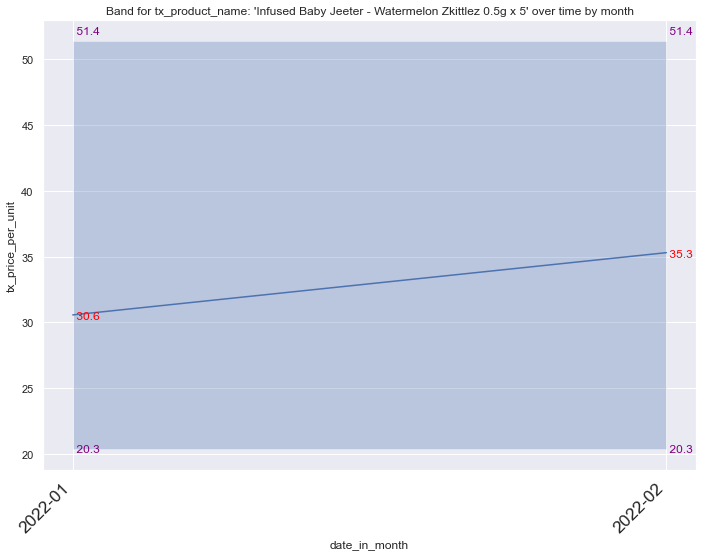

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-01                      20.3475                51.4075
2022-02                      20.3475                51.4075
STInfused Baby Jeeter - Strawberry Shortcake 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


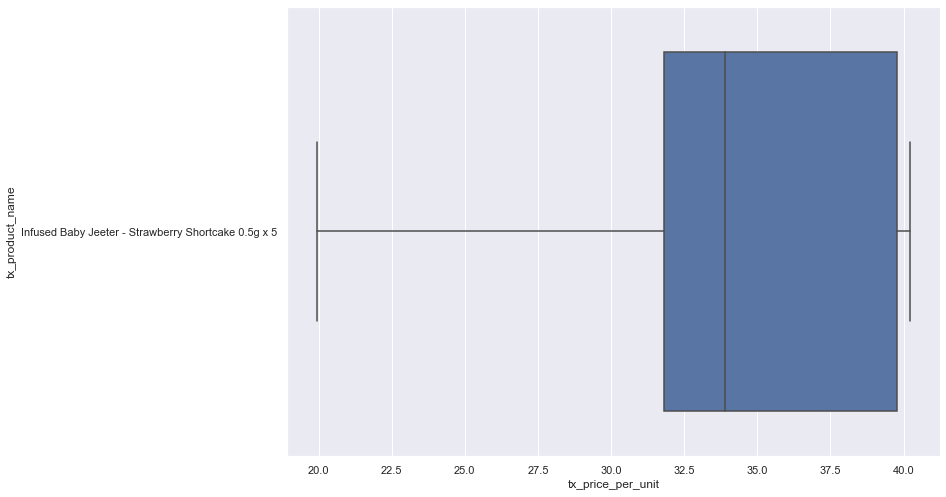

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Strawberry Shortcake 0.5g x 5 in tx_product_name : 48


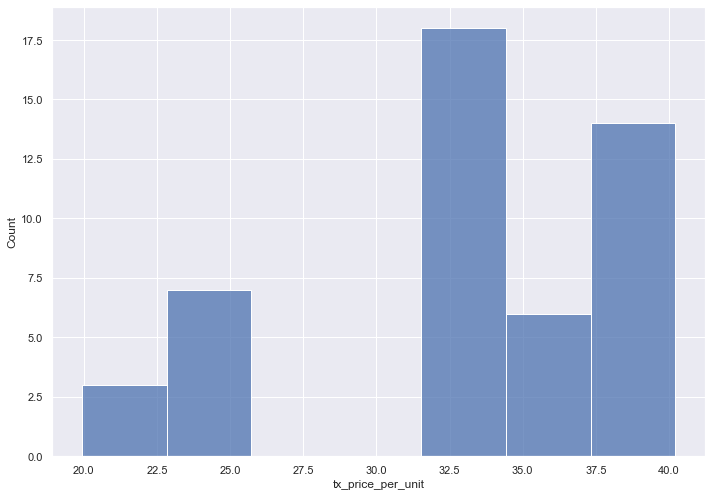

### Outputting summary table ### 	
count    48.00
mean     33.60
std       5.94
min      19.93
25%      31.81
50%      33.88
75%      39.76
max      40.22
Name: Infused Baby Jeeter - Strawberry Shortcake 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2022-03         46.0  33.63  6.06  19.93  31.81  33.88  39.76  40.22
2022-04          2.0  32.96  1.41  31.96  32.46  32.96  33.45  33.95
### Outputting time series line plot of MSRP along with confidence bands ### 	


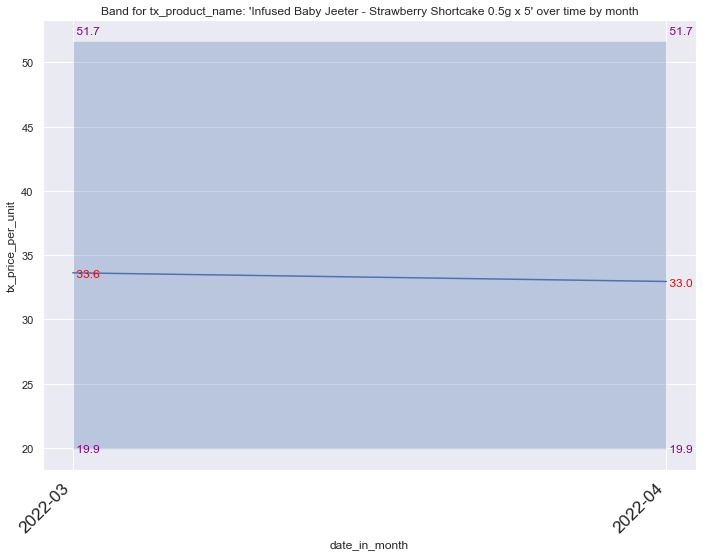

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-03                       19.885                 51.685
2022-04                       19.885                 51.685
STInfused Baby Jeeter - Grape Ape 0.5g x 5
STInfused Baby Jeeter - Peach Ringz 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 15.789473684210526 %
Number of transactions outliers above Boxplot Whisker Maximum is 18.421052631578945 %


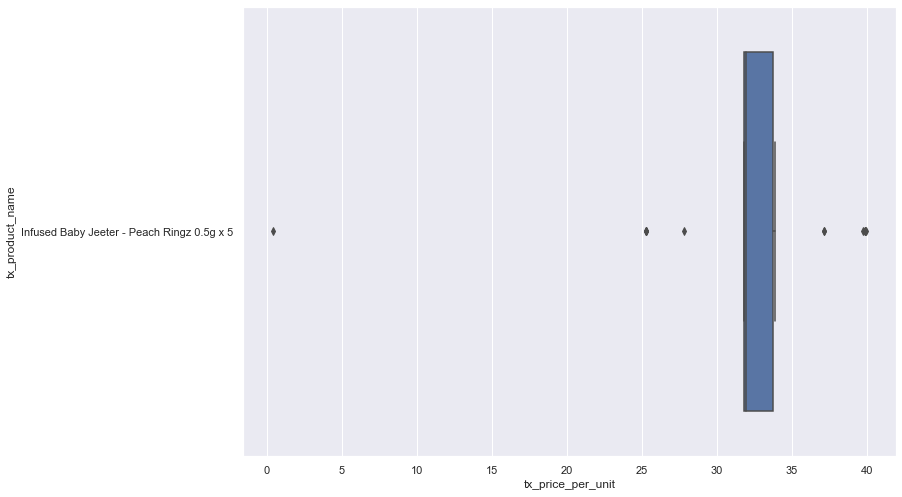

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Peach Ringz 0.5g x 5 in tx_product_name : 25


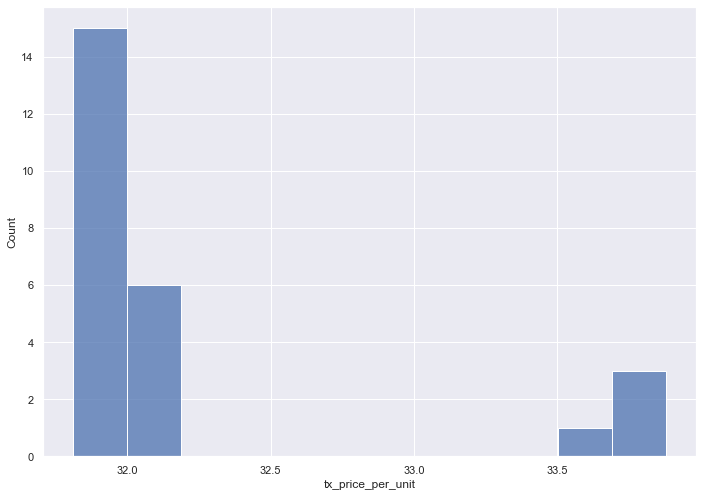

### Outputting summary table ### 	
count    25.00
mean     32.24
std       0.69
min      31.81
25%      31.88
50%      31.88
75%      32.18
max      33.88
Name: Infused Baby Jeeter - Peach Ringz 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-12          8.0  32.31  0.87  31.81  31.81  31.88  32.30  33.88
2022-01          7.0  32.28  0.69  31.88  31.88  32.18  32.18  33.80
2022-04         10.0  32.16  0.60  31.81  31.83  31.96  32.18  33.80
### Outputting time series line plot of MSRP along with confidence bands ### 	


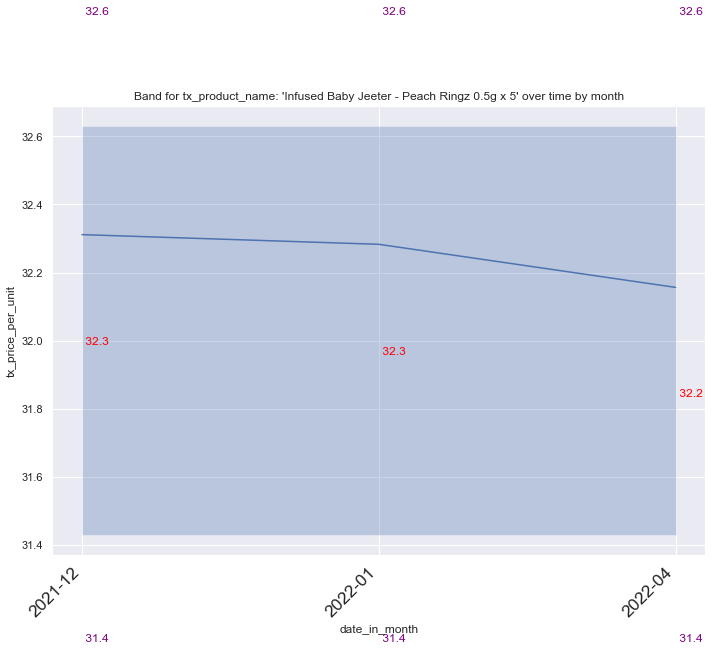

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-12                        31.43                  32.63
2022-01                        31.43                  32.63
2022-04                        31.43                  32.63
STInfused Baby Jeeter - Maui Wowie 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 3.076923076923077 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


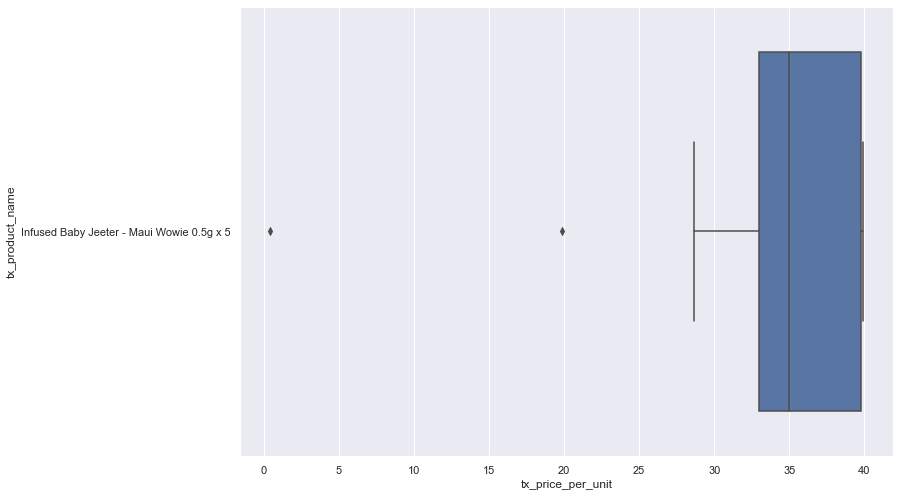

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Maui Wowie 0.5g x 5 in tx_product_name : 63


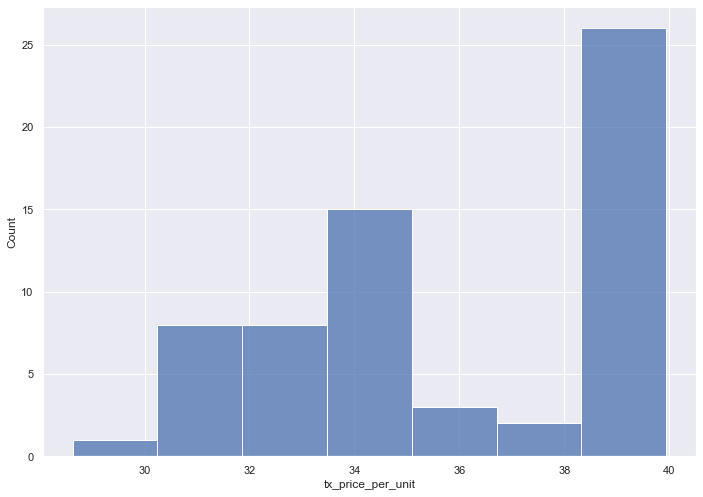

### Outputting summary table ### 	
count    63.00
mean     36.07
std       3.43
min      28.63
25%      33.04
50%      35.07
75%      39.76
max      39.94
Name: Infused Baby Jeeter - Maui Wowie 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-12          1.0  39.85   NaN  39.85  39.85  39.85  39.85  39.85
2022-01         23.0  36.31  3.16  31.81  33.84  35.87  39.76  39.85
2022-03         39.0  35.84  3.59  28.63  32.59  34.99  39.76  39.94
### Outputting time series line plot of MSRP along with confidence bands ### 	


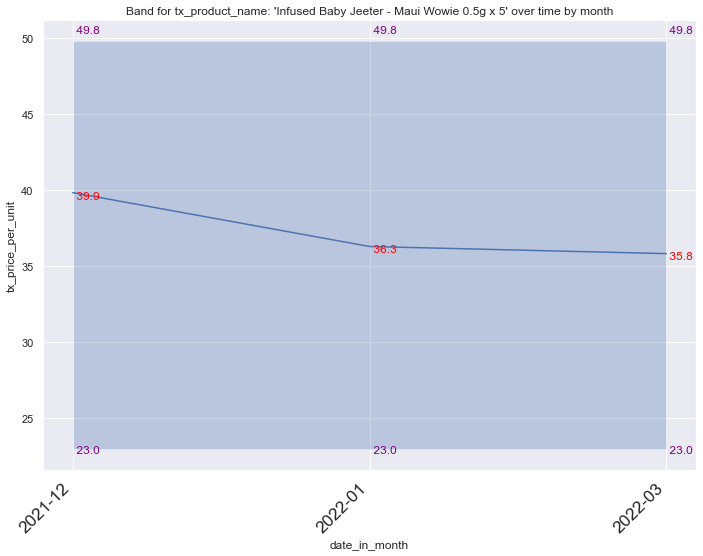

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-12                        22.96                  49.84
2022-01                        22.96                  49.84
2022-03                        22.96                  49.84
STInfused Baby Jeeter - Blueberry Kush 0.5g x 5
STInfused Baby Jeeter - Gelato #33
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 10.16949152542373 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


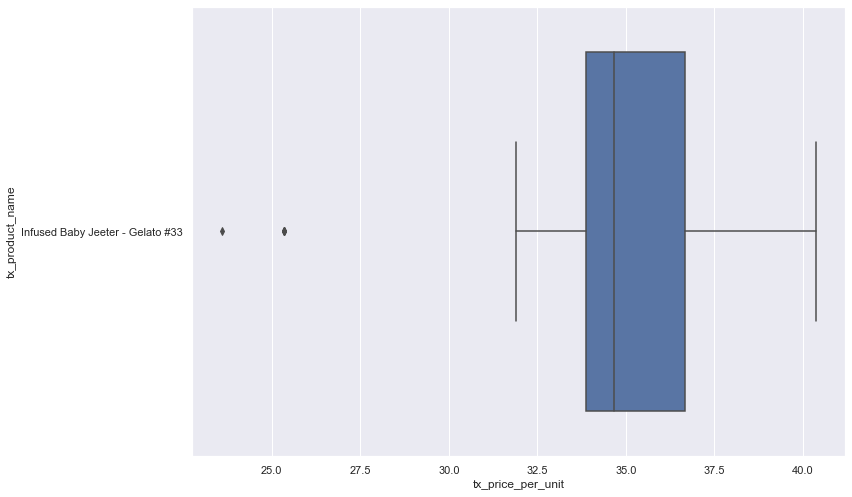

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Gelato #33 in tx_product_name : 53


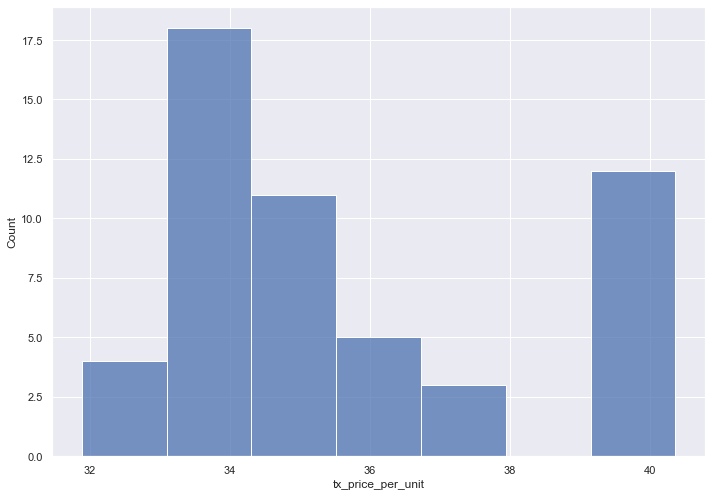

### Outputting summary table ### 	
count    53.00
mean     35.76
std       2.61
min      31.89
25%      33.92
50%      35.16
75%      37.37
max      40.36
Name: Infused Baby Jeeter - Gelato #33, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-04          7.0  35.08  3.47  31.93  32.89  33.92  36.96  40.00
2021-05         15.0  36.49  2.70  33.92  33.96  35.41  39.91  40.36
2021-08         29.0  35.55  2.45  31.89  33.89  34.90  37.25  40.31
2021-09          2.0  35.64  0.57  35.24  35.44  35.64  35.84  36.04
### Outputting time series line plot of MSRP along with confidence bands ### 	


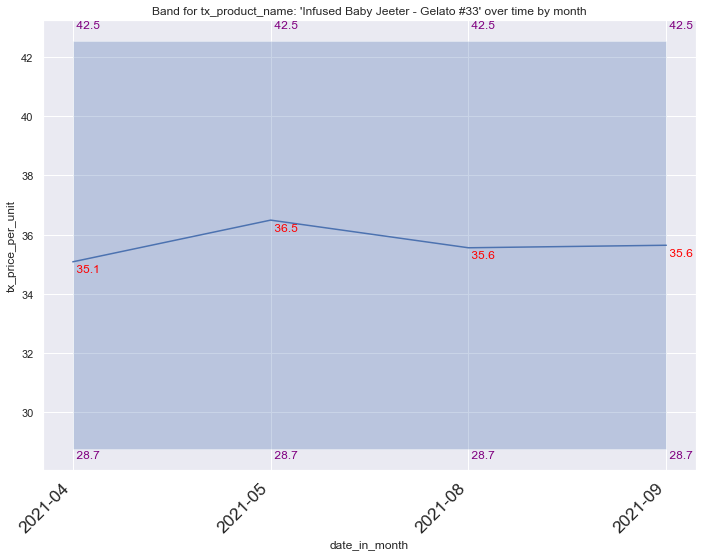

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-04                       28.745                 42.545
2021-05                       28.745                 42.545
2021-08                       28.745                 42.545
2021-09                       28.745                 42.545
STBaby Jeeter - Maui Wowie
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 3.571428571428571 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


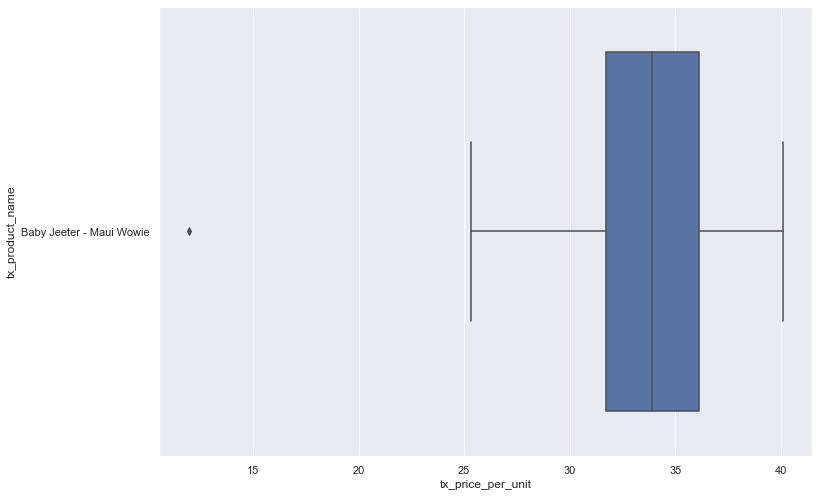

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Maui Wowie in tx_product_name : 27


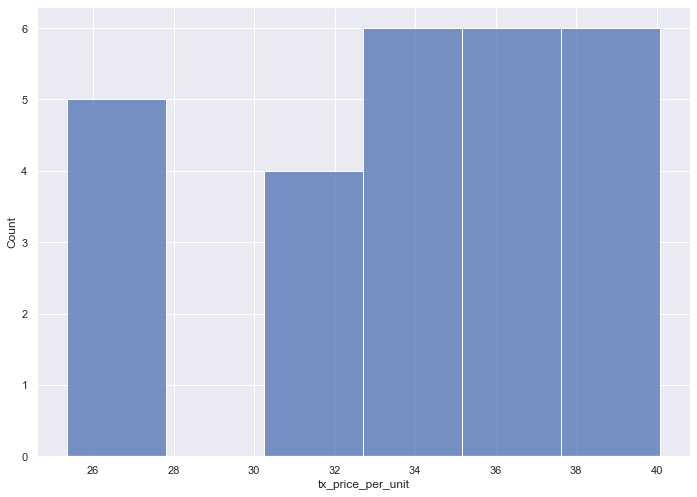

### Outputting summary table ### 	
count    27.00
mean     33.72
std       4.84
min      25.34
25%      31.96
50%      33.92
75%      36.16
max      40.09
Name: Baby Jeeter - Maui Wowie, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-04         27.0  33.72  4.84  25.34  31.96  33.92  36.16  40.09
### Outputting time series line plot of MSRP along with confidence bands ### 	


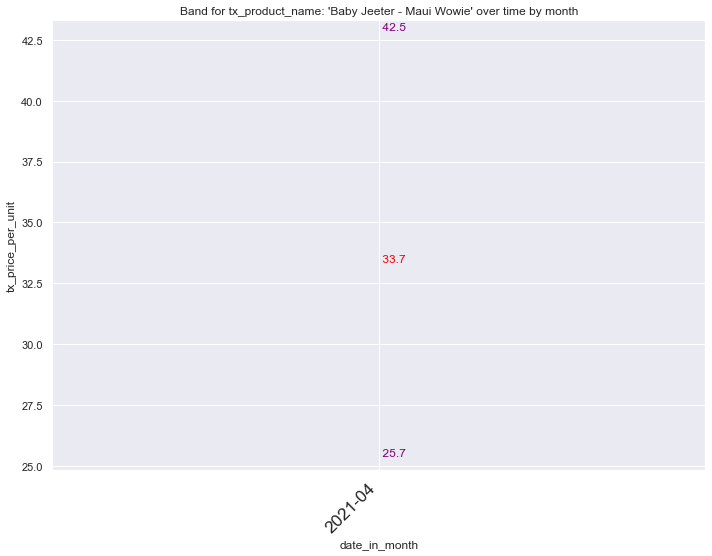

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-04                       25.665                 42.465
STInfused Baby Jeeter - Banana Kush 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 8.695652173913043 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


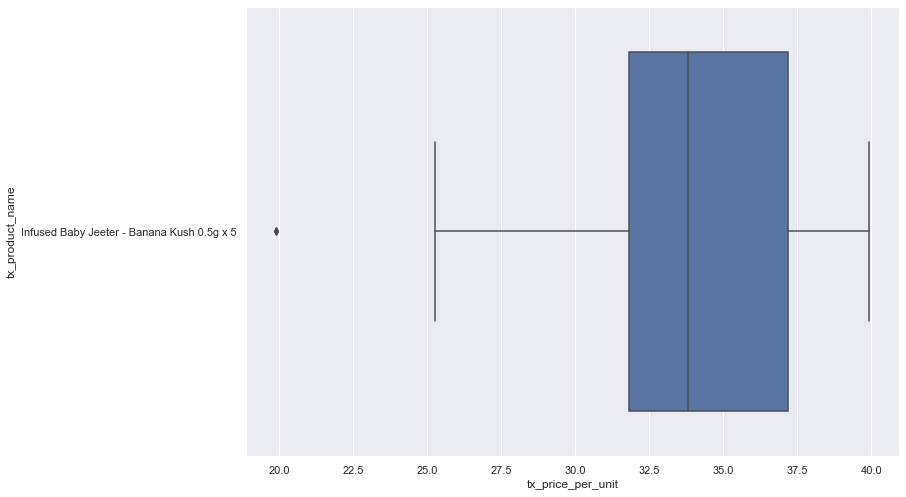

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Banana Kush 0.5g x 5 in tx_product_name : 21


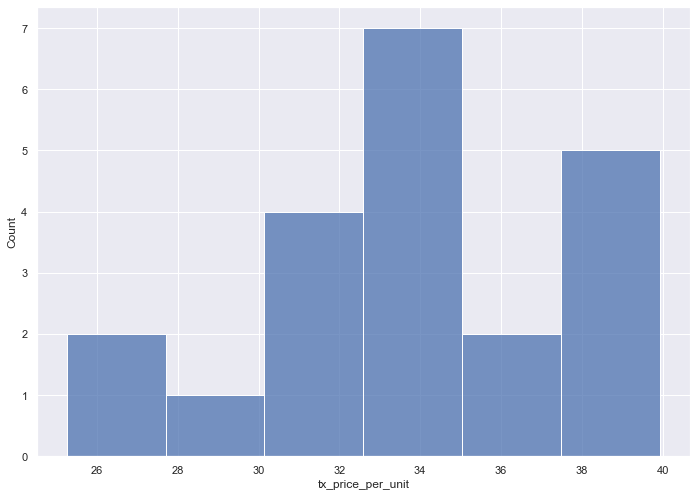

### Outputting summary table ### 	
count    21.00
mean     34.13
std       4.45
min      25.25
25%      31.81
50%      33.88
75%      37.28
max      39.94
Name: Infused Baby Jeeter - Banana Kush 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-12         21.0  34.13  4.45  25.25  31.81  33.88  37.28  39.94
### Outputting time series line plot of MSRP along with confidence bands ### 	


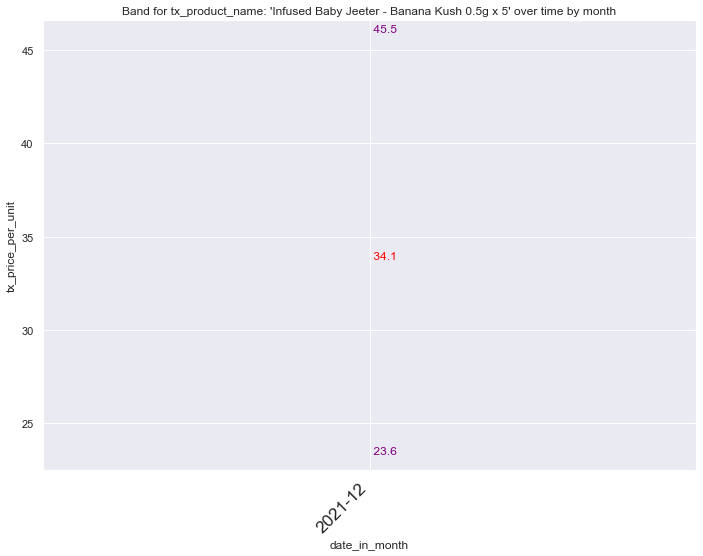

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-12                       23.605                 45.485
STInfused Baby Jeeter - Churros 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 4.166666666666666 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


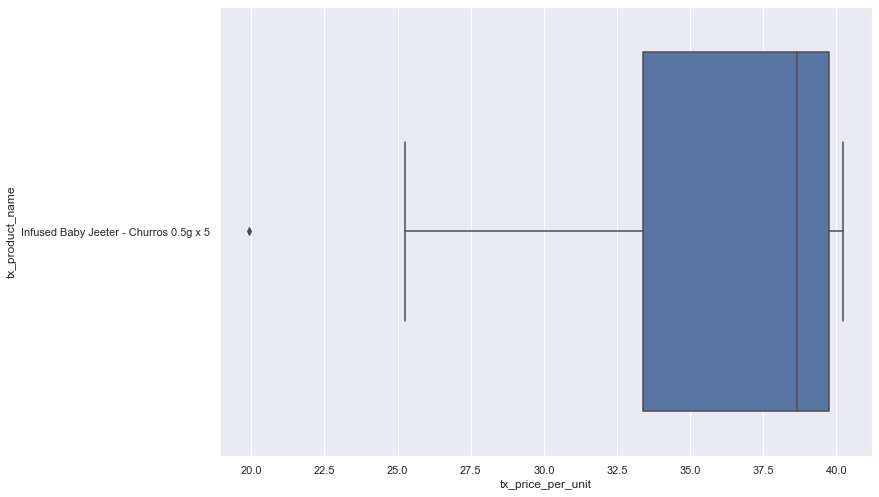

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Churros 0.5g x 5 in tx_product_name : 23


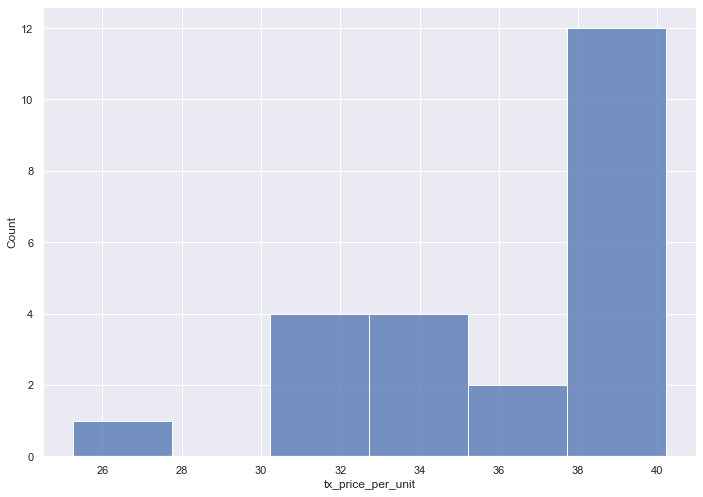

### Outputting summary table ### 	
count    23.00
mean     36.60
std       4.13
min      25.25
25%      33.92
50%      39.76
75%      39.76
max      40.22
Name: Infused Baby Jeeter - Churros 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2022-02         13.0  36.73  4.62  25.25  34.32  39.76  39.85  40.22
2022-03         10.0  36.44  3.62  31.81  33.90  36.86  39.76  39.94
### Outputting time series line plot of MSRP along with confidence bands ### 	


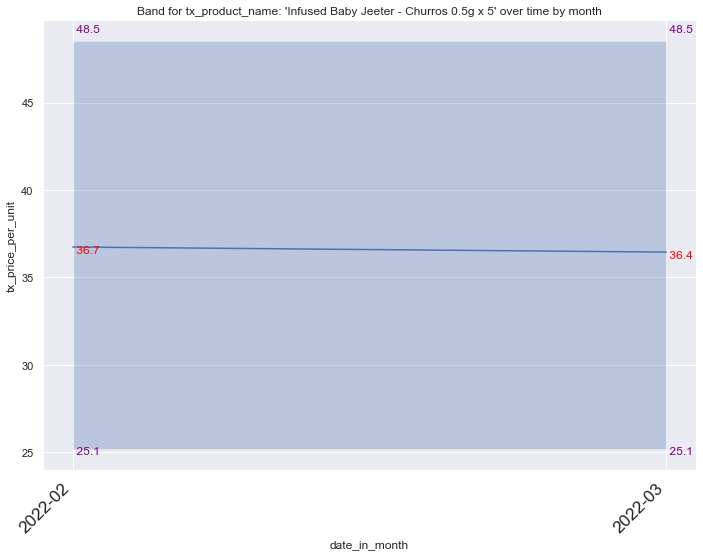

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-02                     25.14375               48.53375
2022-03                     25.14375               48.53375
STBaby Jeeter - Limoncello
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 2.666666666666667 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


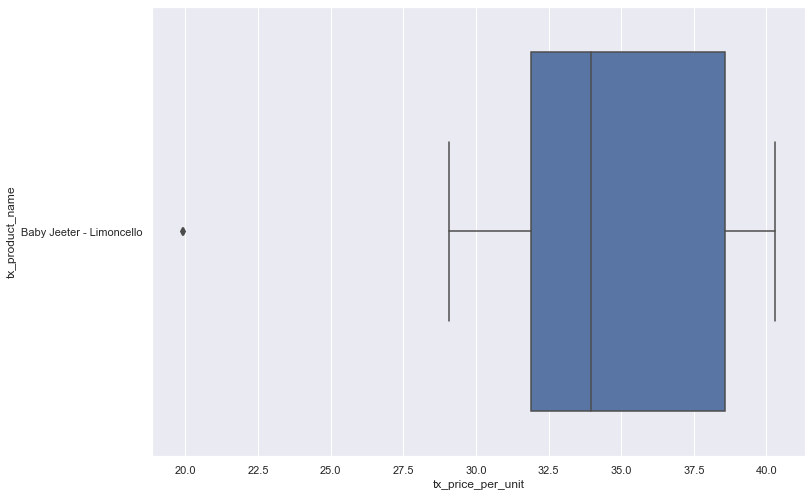

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Limoncello in tx_product_name : 73


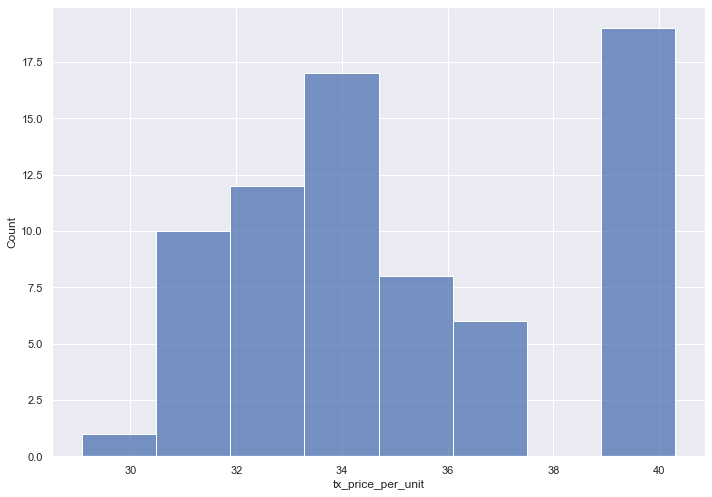

### Outputting summary table ### 	
count    73.00
mean     35.25
std       3.23
min      29.08
25%      31.90
50%      34.04
75%      39.76
max      40.31
Name: Baby Jeeter - Limoncello, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-10         16.0  35.71  2.97  31.89  33.89  34.86  37.94  40.31
2021-11         52.0  34.99  3.30  29.08  31.89  33.92  37.97  40.04
2021-12          5.0  36.54  3.45  32.17  33.80  37.20  39.76  39.76
### Outputting time series line plot of MSRP along with confidence bands ### 	


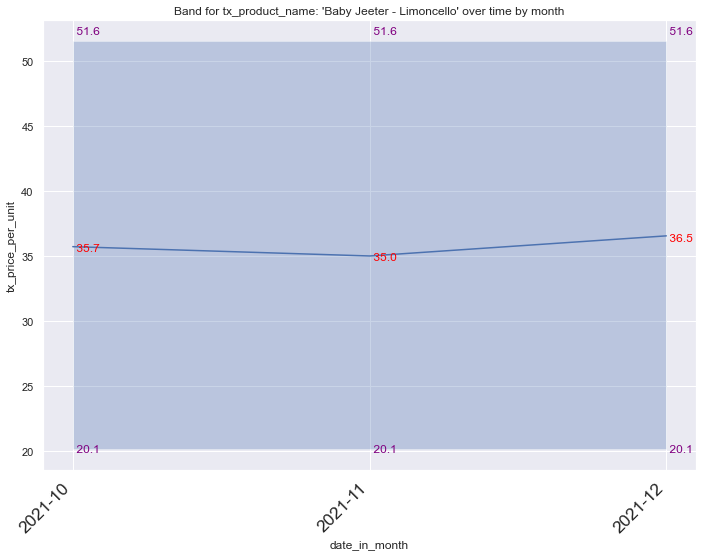

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-10                      20.0975                51.5575
2021-11                      20.0975                51.5575
2021-12                      20.0975                51.5575
STBaby Jeeter - Banana Kush
STInfused Baby Jeeter - Peach Ringz
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 5.88235294117647 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


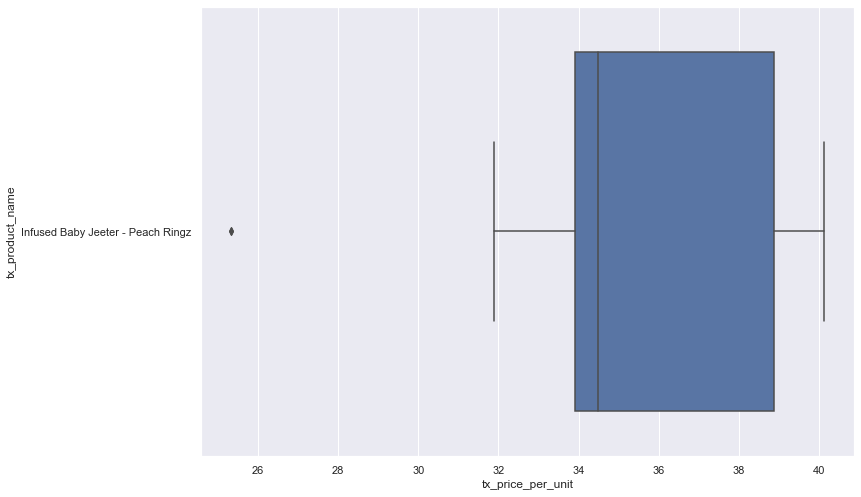

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Peach Ringz in tx_product_name : 32


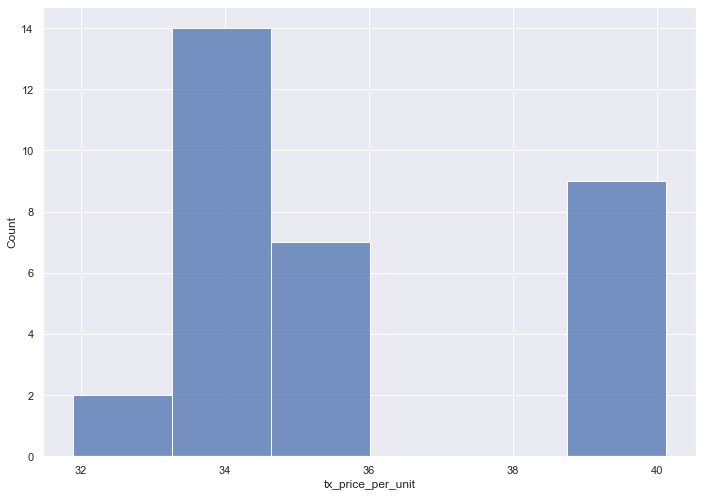

### Outputting summary table ### 	
count    32.00
mean     35.86
std       2.71
min      31.89
25%      34.01
50%      34.61
75%      39.87
max      40.13
Name: Infused Baby Jeeter - Peach Ringz, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-08         28.0  35.44  2.53  31.89  33.94  34.46  35.88  40.13
2021-11          4.0  38.74  2.44  35.08  38.67  39.91  39.98  40.04
### Outputting time series line plot of MSRP along with confidence bands ### 	


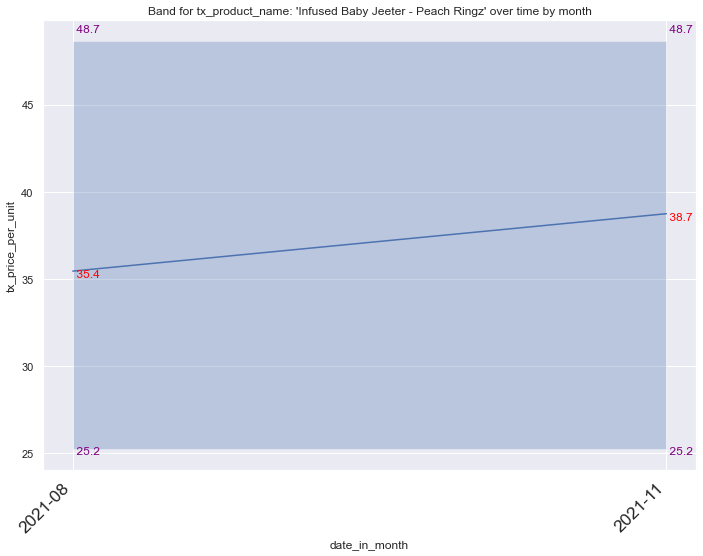

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-08                    25.213125              48.658125
2021-11                    25.213125              48.658125
STJeeter Juice 1g Vape Cartridge Strawberry Cheesecake
GRG
Verifying download summaries for license C10-0000169-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-05-11
Found bad download summary for license C10-0000169-LIC on date 2022-03-09

Verifying download summaries for license C10-0000408-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-05-11
Found bad download summary for license C10-0000408-LIC on date 2022-03-09

[FAILURE] Found a total of 2 bad download summaries
[SUCCESS] No unknown transfer packages!
94.0% of incoming transfer packages have receiver wholesale price
# transactions missing incoming transfer package: 6705 (0.8909162419146528%)
# transactions total: 752596
# receipts with mis

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['flower' 'other concentrate' 'vape cartridge' 'pre-roll infused' 'edible'
 'pre-roll leaf' 'pre-roll flower' 'extract' 'shake' 'topical' 'tincture'
 'infused butter/oil' 'capsule' 'clone - cutting']
### Available combined product category name in sales dataframe ### 	
['other concentrate' 'flower' 'pre-roll infused' 'vape cartridge'
 'pre-roll flower' 'edible' 'extract' 'pre-roll leaf' 'topical' 'shake'
 'tincture' 'infused butter/oil' 'capsule' 'clone - cutting']
GRGInfused jeeter 1g - Maui Wowie
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


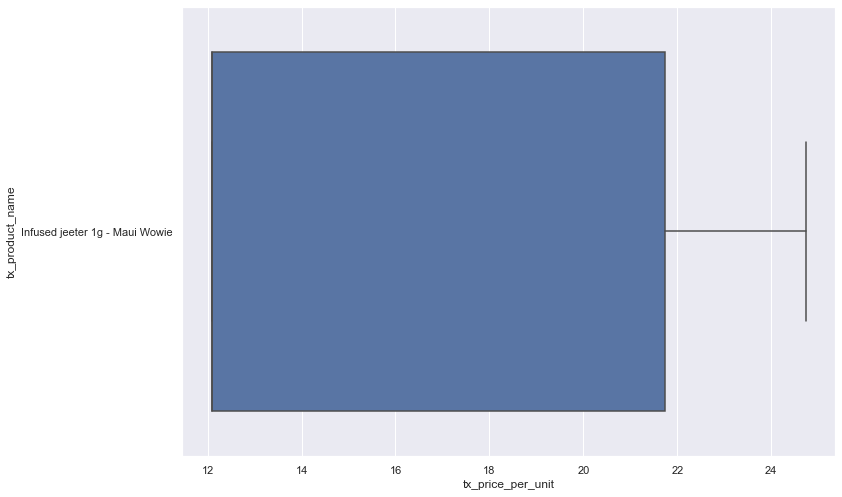

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused jeeter 1g - Maui Wowie in tx_product_name : 155


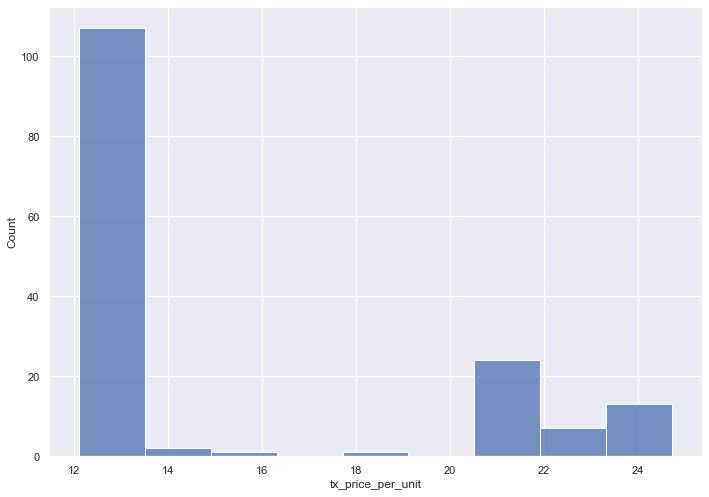

### Outputting summary table ### 	
count    155.00
mean      15.20
std        4.83
min       12.10
25%       12.10
50%       12.10
75%       21.73
max       24.73
Name: Infused jeeter 1g - Maui Wowie, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2020-12          7.0  23.32  1.32  22.26  22.26  22.26  24.73  24.73
2021-01          6.0  23.50  1.35  22.26  22.26  23.50  24.73  24.73
2021-02          3.0  21.67  3.09  18.55  20.14  21.73  23.23  24.73
2021-03          7.0  23.87  1.46  21.73  23.23  24.73  24.73  24.73
2021-04          6.0  21.73  0.00  21.73  21.73  21.73  21.73  21.73
2021-05          9.0  22.06  1.00  21.73  21.73  21.73  21.73  24.73
2021-06          8.0  20.90  2.36  15.06  21.73  21.73  21.73  21.73
2021-10         19.0  12.10  0.00  12.10  12.10  12.10  12.10  12.10
2021-11         33.0  12.10  

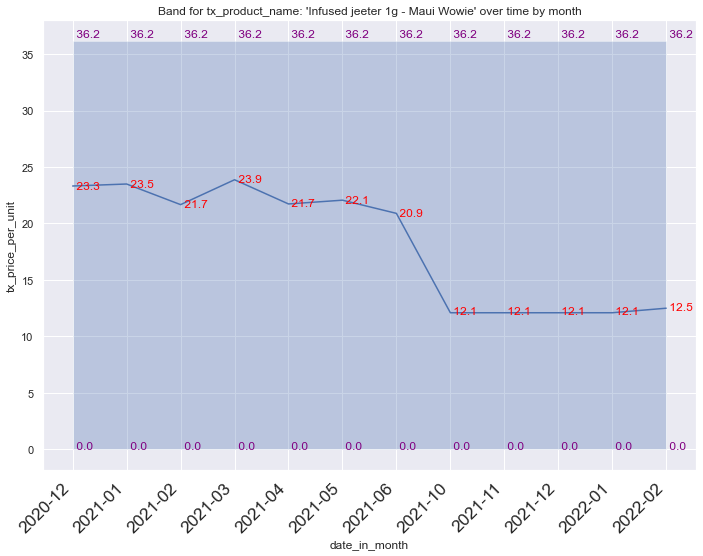

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-12                          0.0                 36.175
2021-01                          0.0                 36.175
2021-02                          0.0                 36.175
2021-03                          0.0                 36.175
2021-04                          0.0                 36.175
2021-05                          0.0                 36.175
2021-06                          0.0                 36.175
2021-10                          0.0                 36.175
2021-11                          0.0                 36.175
2021-12                          0.0                 36.175
2022-01                          0.0                 36.175
2022-02                          0.0                 36.175
GRGInfused Baby Jeeter - Blue Zkittlez 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions 

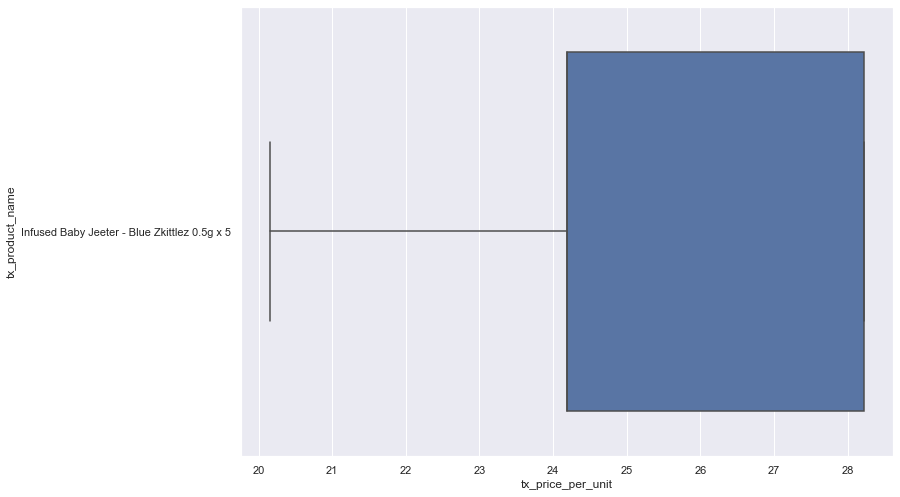

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Blue Zkittlez 0.5g x 5 in tx_product_name : 563


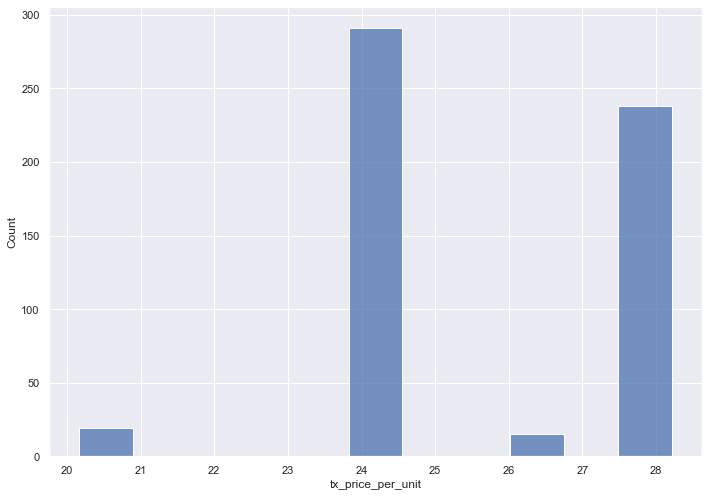

### Outputting summary table ### 	
count    563.00
mean      25.81
std        2.21
min       20.16
25%       24.19
50%       24.19
75%       28.22
max       28.22
Name: Infused Baby Jeeter - Blue Zkittlez 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-12         64.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2022-01        170.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2022-02         64.0  24.63  1.27  24.19  24.19  24.19  24.19  28.22
2022-03        120.0  28.22  0.00  28.22  28.22  28.22  28.22  28.22
2022-04        124.0  26.74  2.89  20.16  26.21  28.22  28.22  28.22
2022-05         21.0  28.22  0.00  28.22  28.22  28.22  28.22  28.22
### Outputting time series line plot of MSRP along with confidence bands ### 	


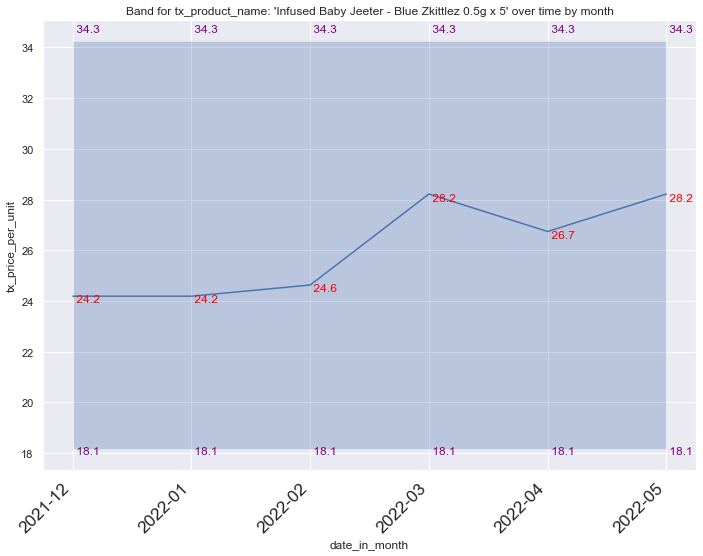

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-12                       18.145                 34.265
2022-01                       18.145                 34.265
2022-02                       18.145                 34.265
2022-03                       18.145                 34.265
2022-04                       18.145                 34.265
2022-05                       18.145                 34.265
GRGBaby Jeeter - Tropicana Cookies
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


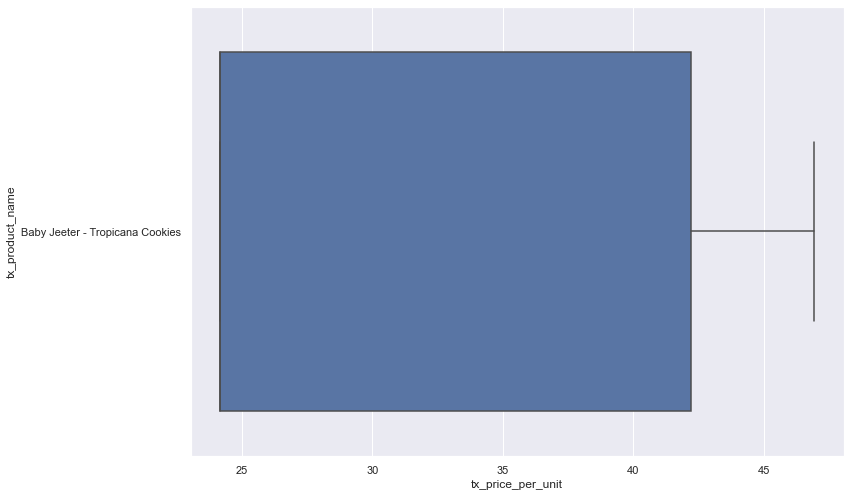

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Tropicana Cookies in tx_product_name : 239


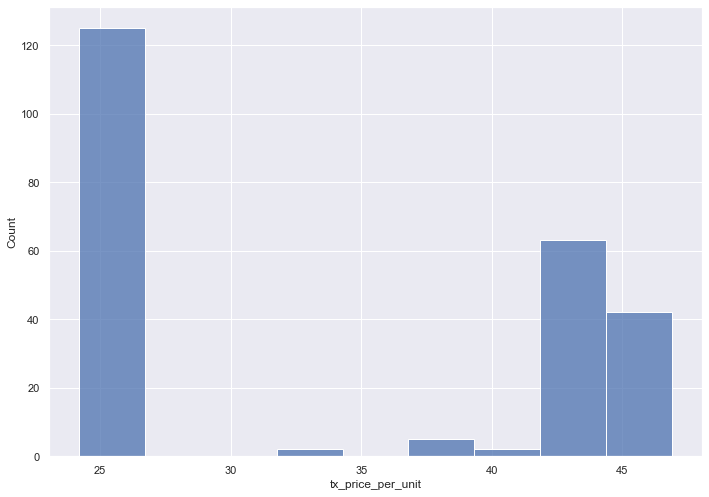

### Outputting summary table ### 	
count    239.00
mean      33.39
std        9.87
min       24.19
25%       24.19
50%       24.19
75%       42.22
max       46.91
Name: Baby Jeeter - Tropicana Cookies, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2020-11          7.0  42.89  3.24  37.53  42.22  42.22  44.56  46.91
2020-12         19.0  43.95  2.32  42.22  42.22  42.22  46.91  46.91
2021-01          8.0  43.10  2.49  39.87  42.22  42.22  43.39  46.91
2021-02          9.0  44.53  2.91  39.87  42.22  46.91  46.91  46.91
2021-03         11.0  43.33  3.11  37.53  41.91  41.91  46.91  46.91
2021-04         17.0  43.50  2.69  38.91  41.91  41.91  46.91  46.91
2021-05         19.0  42.98  3.50  32.32  41.91  41.91  46.91  46.91
2021-06         24.0  43.42  3.45  34.12  41.91  41.91  46.91  46.91
2021-09         50.0  24.19 

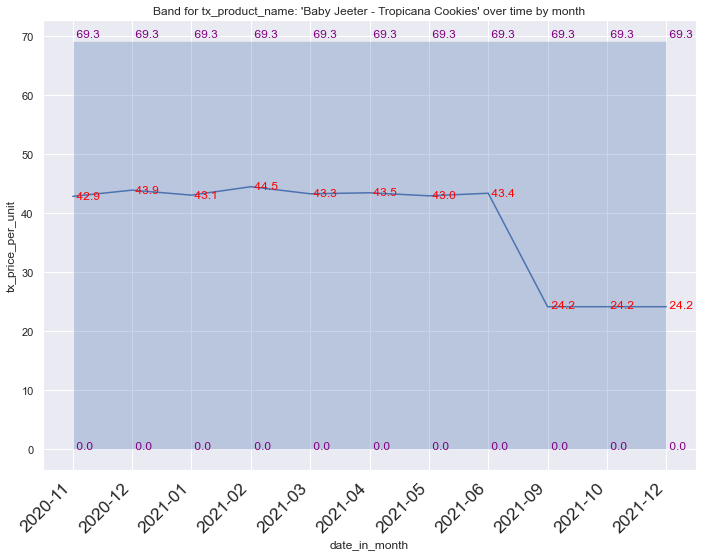

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-11                          0.0                 69.265
2020-12                          0.0                 69.265
2021-01                          0.0                 69.265
2021-02                          0.0                 69.265
2021-03                          0.0                 69.265
2021-04                          0.0                 69.265
2021-05                          0.0                 69.265
2021-06                          0.0                 69.265
2021-09                          0.0                 69.265
2021-10                          0.0                 69.265
2021-12                          0.0                 69.265
GRGBaby Jeeter - Blue Zkittlez
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outlie

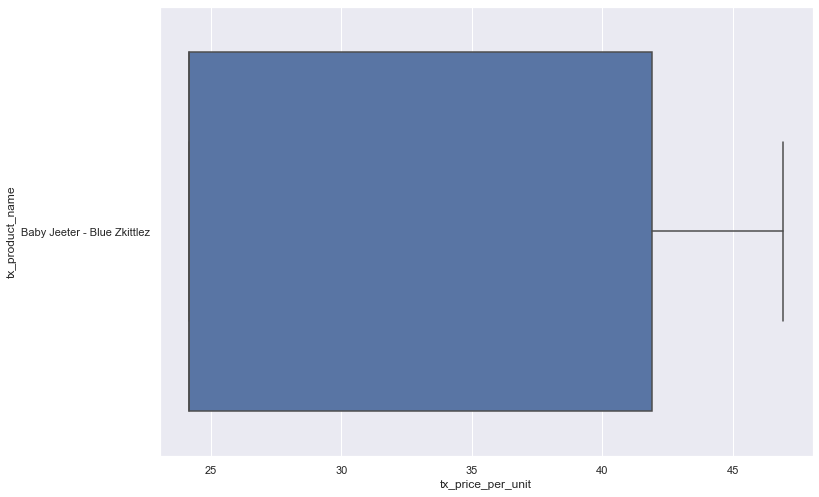

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Blue Zkittlez in tx_product_name : 280


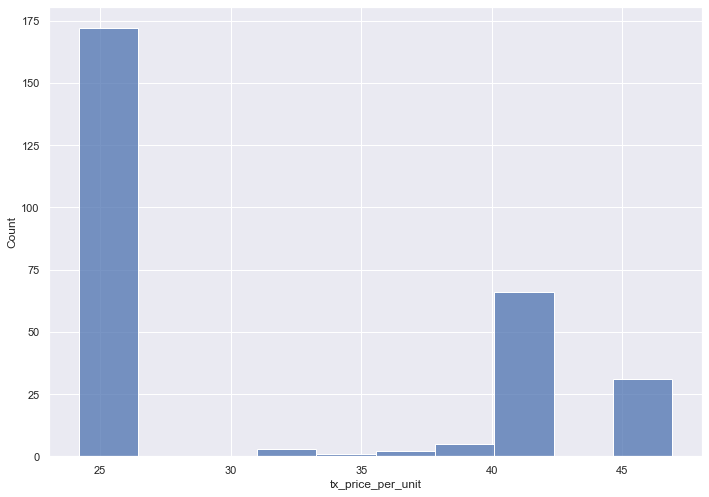

### Outputting summary table ### 	
count    280.00
mean      31.39
std        9.31
min       24.19
25%       24.19
50%       24.19
75%       41.91
max       46.91
Name: Baby Jeeter - Blue Zkittlez, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2020-11         19.0  42.47  4.27  32.84  42.22  42.22  46.91  46.91
2020-12         15.0  43.47  3.75  32.84  42.22  42.22  46.91  46.91
2021-02          1.0  46.91   NaN  46.91  46.91  46.91  46.91  46.91
2021-03         24.0  42.38  2.70  37.53  41.91  41.91  41.91  46.91
2021-04         19.0  43.30  2.61  38.91  41.91  41.91  46.91  46.91
2021-05         19.0  42.62  2.72  35.40  41.91  41.91  41.91  46.91
2021-06         11.0  43.08  2.54  39.76  41.91  41.91  44.41  46.91
2021-08         47.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2021-09         86.0  24.19  0.0

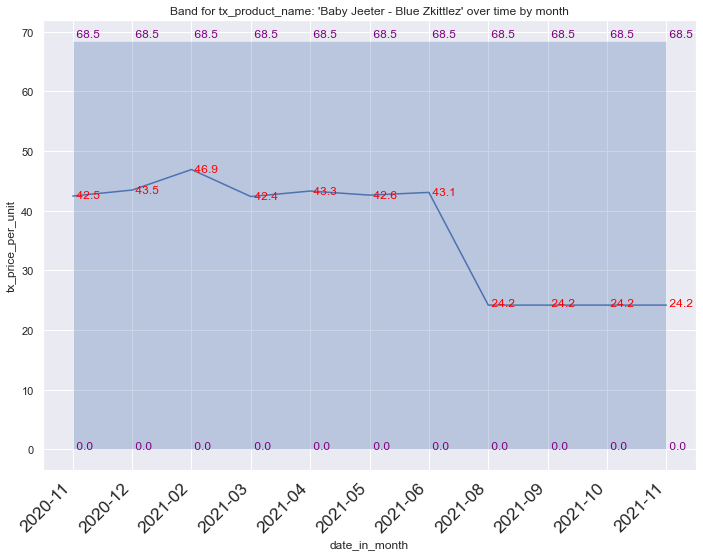

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-11                          0.0                  68.49
2020-12                          0.0                  68.49
2021-02                          0.0                  68.49
2021-03                          0.0                  68.49
2021-04                          0.0                  68.49
2021-05                          0.0                  68.49
2021-06                          0.0                  68.49
2021-08                          0.0                  68.49
2021-09                          0.0                  68.49
2021-10                          0.0                  68.49
2021-11                          0.0                  68.49
GRGInfused Baby Jeeter - Strawberry Shortcake
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of tran

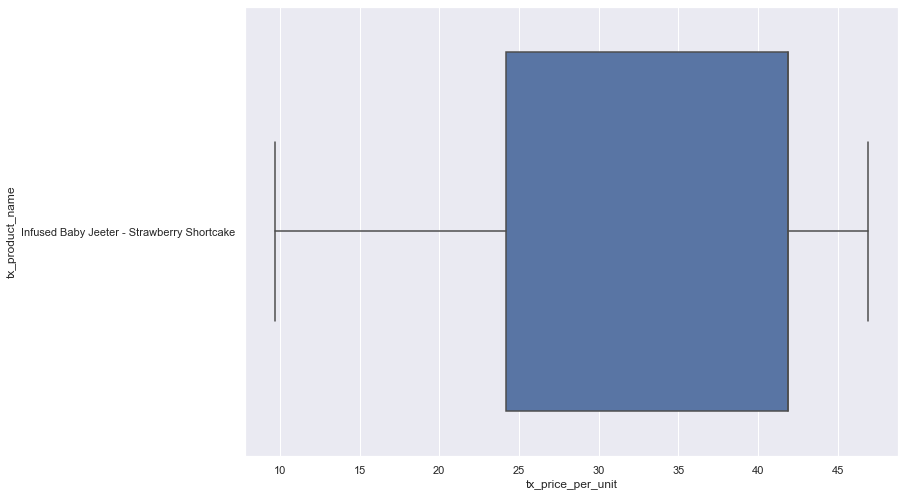

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Strawberry Shortcake in tx_product_name : 207


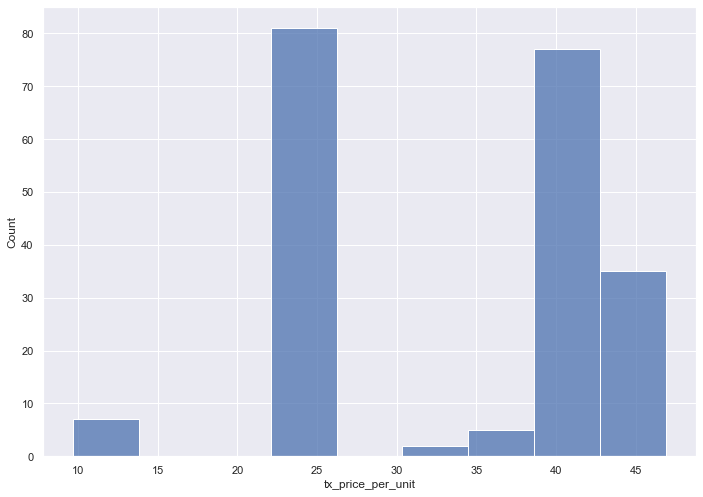

### Outputting summary table ### 	
count    207.00
mean      34.47
std       10.45
min        9.68
25%       24.19
50%       41.91
75%       41.91
max       46.91
Name: Infused Baby Jeeter - Strawberry Shortcake, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-01         17.0  43.19  2.20  39.87  42.22  42.22  42.22  46.91
2021-02         13.0  43.10  3.40  37.53  39.87  42.22  46.91  46.91
2021-03         35.0  42.36  3.40  31.91  41.91  41.91  44.41  46.91
2021-04         21.0  43.34  2.31  41.91  41.91  41.91  46.91  46.91
2021-05         23.0  42.71  3.71  31.91  41.91  41.91  46.91  46.91
2021-06         10.0  43.91  2.58  41.91  41.91  41.91  46.91  46.91
2021-08         46.0  21.98  5.27   9.68  24.19  24.19  24.19  24.19
2021-09          1.0  24.19   NaN  24.19  24.19  24.19  24.19  24.19
2021-10         3

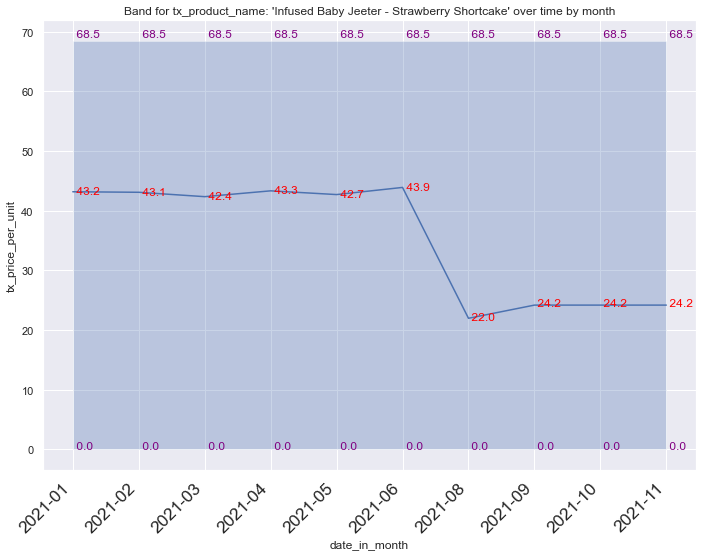

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-01                          0.0                  68.49
2021-02                          0.0                  68.49
2021-03                          0.0                  68.49
2021-04                          0.0                  68.49
2021-05                          0.0                  68.49
2021-06                          0.0                  68.49
2021-08                          0.0                  68.49
2021-09                          0.0                  68.49
2021-10                          0.0                  68.49
2021-11                          0.0                  68.49
GRGInfused Baby Jeeter Grape Ape
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


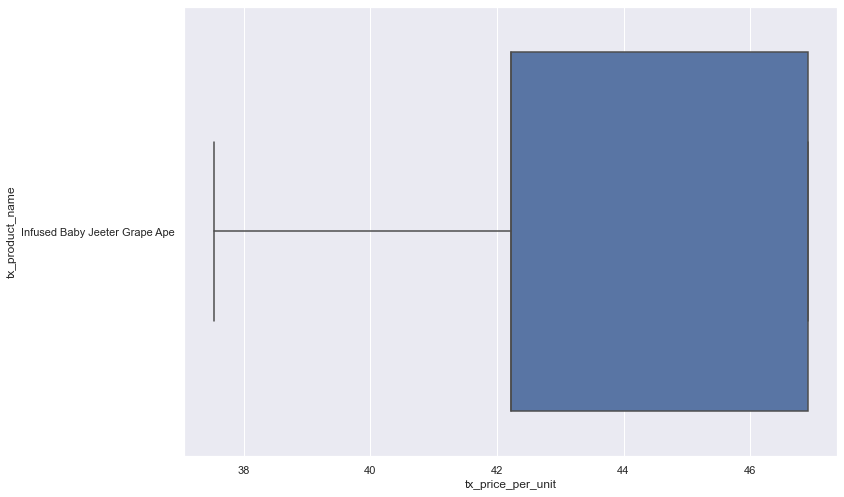

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter Grape Ape in tx_product_name : 45


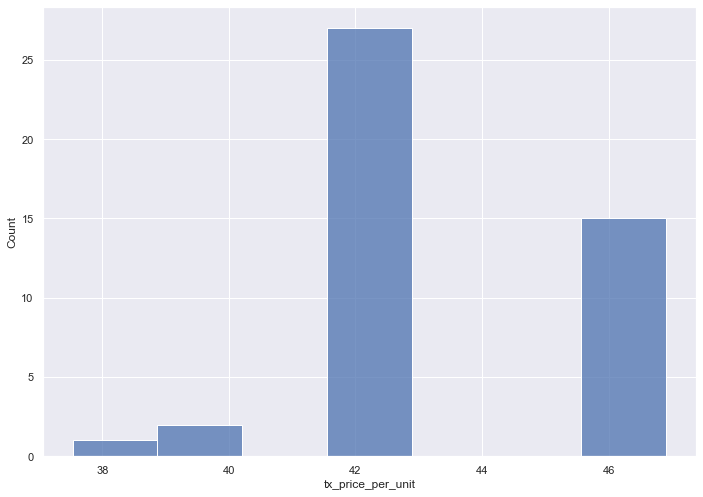

### Outputting summary table ### 	
count    45.00
mean     43.56
std       2.53
min      37.53
25%      42.22
50%      42.22
75%      46.91
max      46.91
Name: Infused Baby Jeeter Grape Ape, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2020-12         15.0  43.00  2.11  39.87  42.22  42.22  42.22  46.91
2021-01         15.0  43.78  2.89  37.53  42.22  42.22  46.91  46.91
2021-02         15.0  43.90  2.61  39.87  42.22  42.22  46.91  46.91
### Outputting time series line plot of MSRP along with confidence bands ### 	


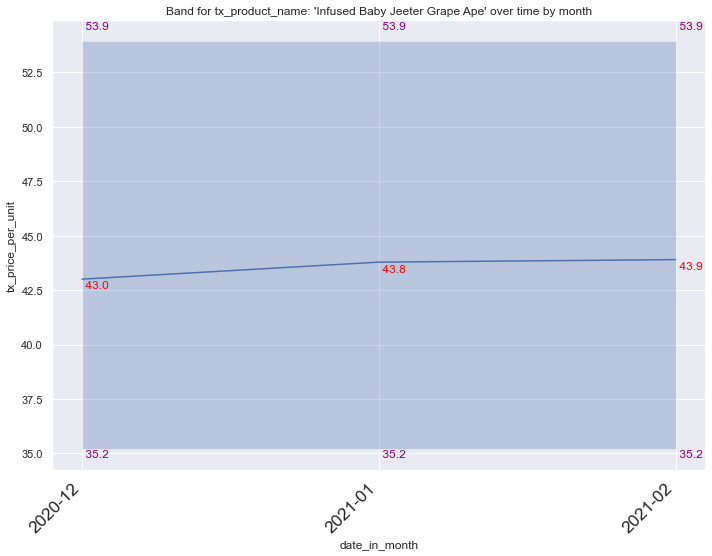

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-12                       35.185                 53.945
2021-01                       35.185                 53.945
2021-02                       35.185                 53.945
GRGBaby Jeeter - Blueberry Kush
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 10.416666666666668 %


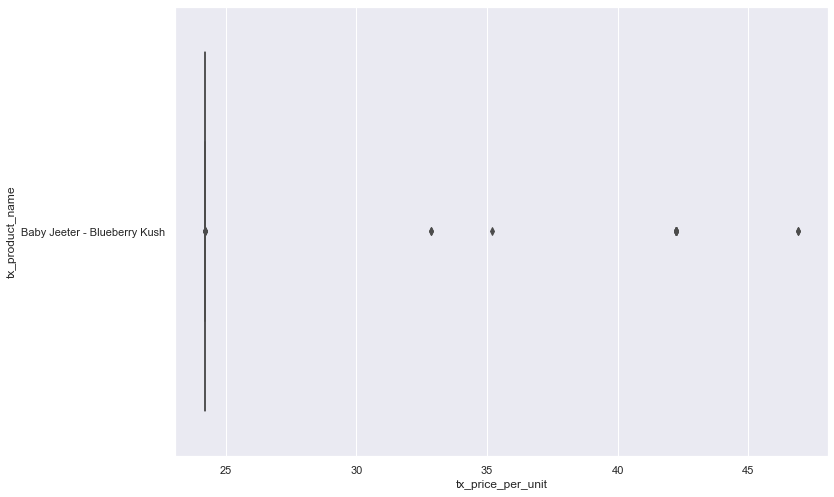

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Blueberry Kush in tx_product_name : 172


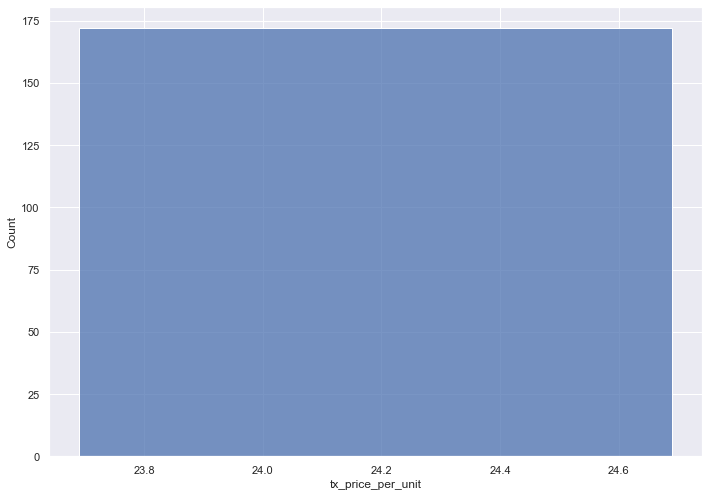

### Outputting summary table ### 	
count    172.00
mean      24.19
std        0.00
min       24.19
25%       24.19
50%       24.19
75%       24.19
max       24.19
Name: Baby Jeeter - Blueberry Kush, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean  std    min    25%    50%    75%    max
date_in_month                                                      
2021-09         90.0  24.19  0.0  24.19  24.19  24.19  24.19  24.19
2021-10         12.0  24.19  0.0  24.19  24.19  24.19  24.19  24.19
2021-11         70.0  24.19  0.0  24.19  24.19  24.19  24.19  24.19
### Outputting time series line plot of MSRP along with confidence bands ### 	


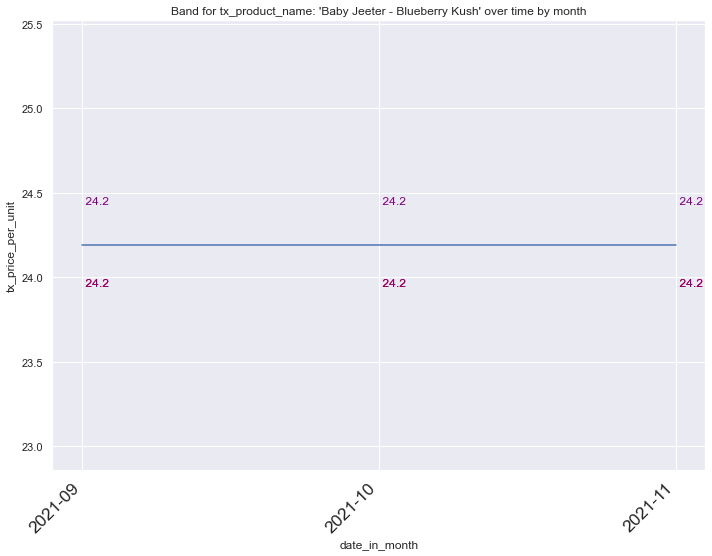

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-09                        24.19                  24.19
2021-10                        24.19                  24.19
2021-11                        24.19                  24.19
GRGInfused Baby Jeeter Durban Poison
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


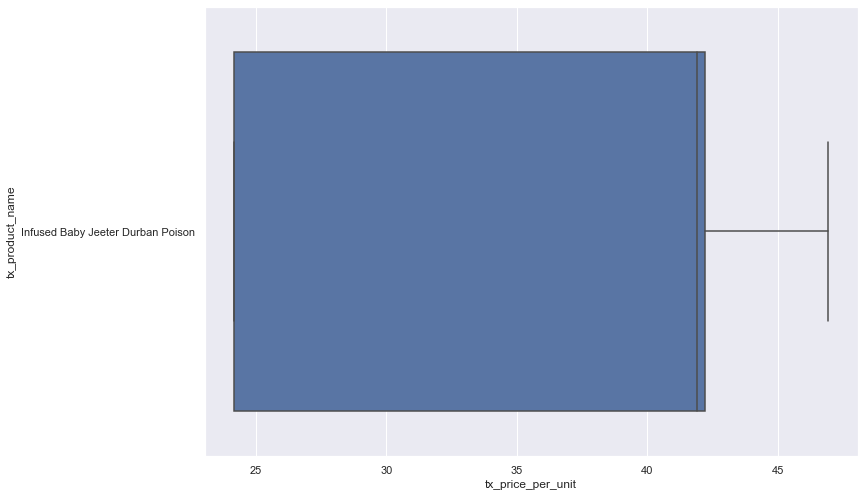

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter Durban Poison in tx_product_name : 239


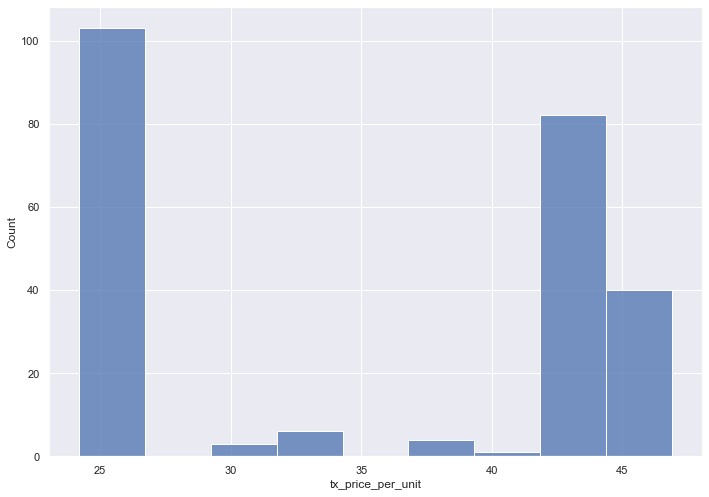

### Outputting summary table ### 	
count    239.00
mean      34.70
std        9.59
min       24.19
25%       24.19
50%       41.91
75%       42.22
max       46.91
Name: Infused Baby Jeeter Durban Poison, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2020-11          6.0  39.09  5.68  32.84  34.01  39.88  42.22  46.91
2020-12         18.0  42.61  2.31  37.53  42.22  42.22  42.22  46.91
2021-01         13.0  44.02  2.37  42.22  42.22  42.22  46.91  46.91
2021-02         11.0  45.18  2.41  41.91  42.22  46.91  46.91  46.91
2021-03         10.0  42.61  2.45  38.91  41.91  41.91  41.91  46.91
2021-04         36.0  43.34  2.93  33.34  41.91  41.91  46.91  46.91
2021-05         14.0  42.30  2.29  37.43  41.91  41.91  41.91  46.91
2021-06         28.0  41.16  5.52  30.12  41.91  41.91  46.91  46.91
2021-10         40.0  24.1

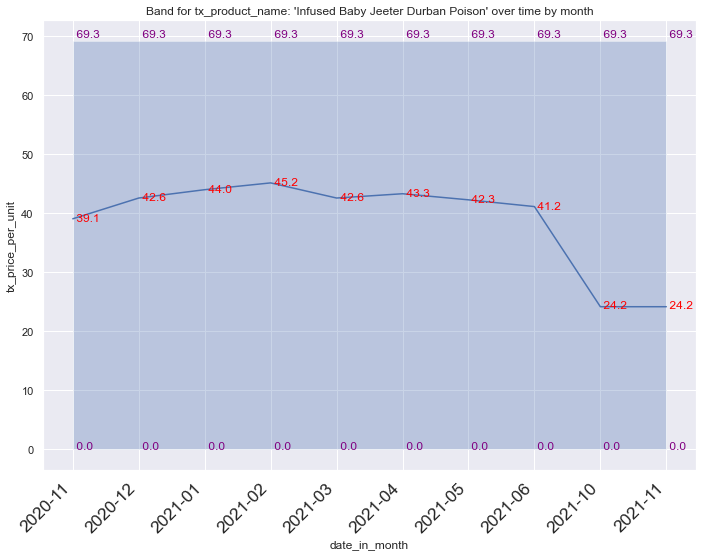

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-11                          0.0                 69.265
2020-12                          0.0                 69.265
2021-01                          0.0                 69.265
2021-02                          0.0                 69.265
2021-03                          0.0                 69.265
2021-04                          0.0                 69.265
2021-05                          0.0                 69.265
2021-06                          0.0                 69.265
2021-10                          0.0                 69.265
2021-11                          0.0                 69.265
GRGBaby Jeeter - Fire OG
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


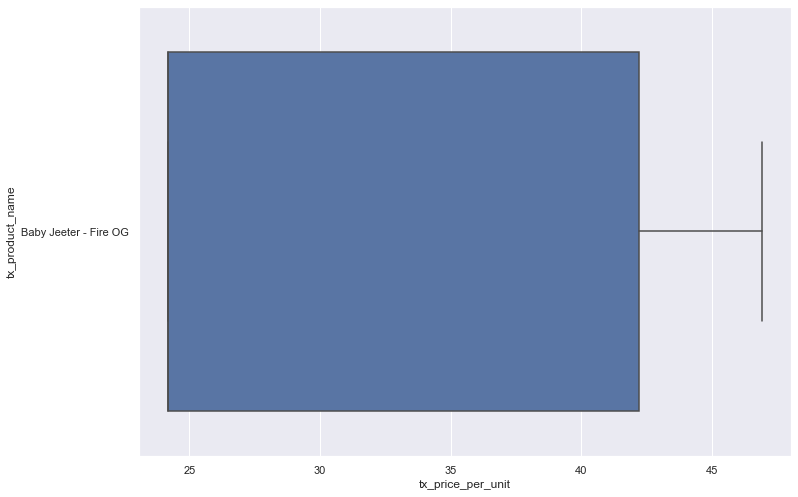

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Fire OG in tx_product_name : 174


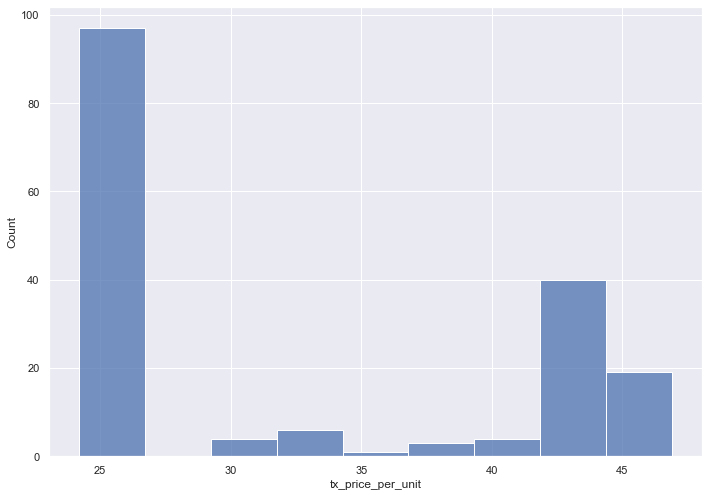

### Outputting summary table ### 	
count    174.00
mean      31.95
std        9.19
min       24.19
25%       24.19
50%       24.19
75%       42.22
max       46.91
Name: Baby Jeeter - Fire OG, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2020-11          8.0  43.39  3.07  39.87  41.63  42.22  46.91  46.91
2020-12         20.0  41.99  1.85  37.53  42.22  42.22  42.22  46.91
2021-01         16.0  43.25  2.84  37.53  42.22  42.22  46.91  46.91
2021-02         10.0  42.69  3.63  35.18  42.22  42.22  45.74  46.91
2021-06         26.0  37.68  7.68  24.63  30.70  38.02  45.66  46.91
2021-08         40.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2021-11         54.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
### Outputting time series line plot of MSRP along with confidence bands ### 	


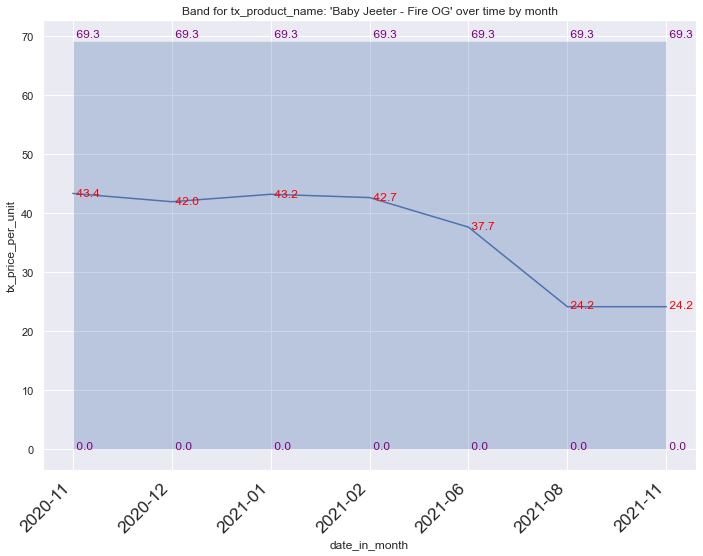

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-11                          0.0                 69.265
2020-12                          0.0                 69.265
2021-01                          0.0                 69.265
2021-02                          0.0                 69.265
2021-06                          0.0                 69.265
2021-08                          0.0                 69.265
2021-11                          0.0                 69.265
GRGBaby Jeeter - Grapefruit Romulan
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


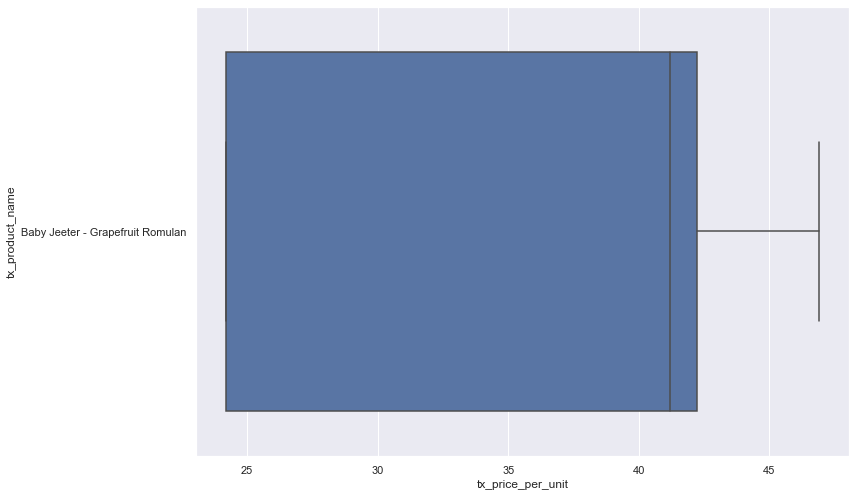

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Grapefruit Romulan in tx_product_name : 170


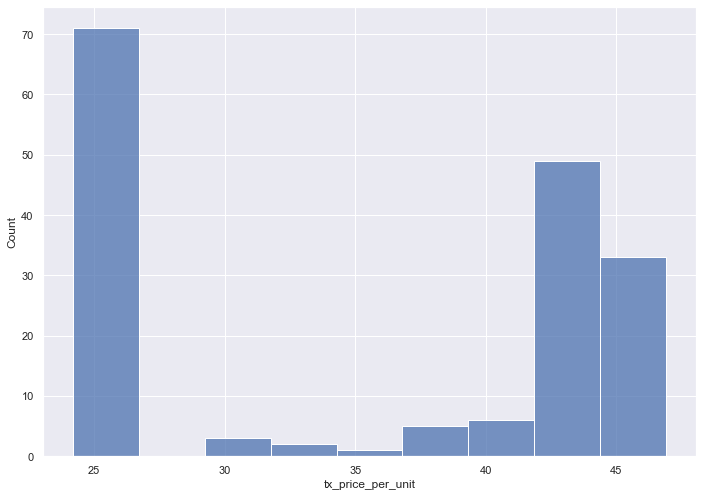

### Outputting summary table ### 	
count    170.00
mean      35.03
std        9.63
min       24.19
25%       24.19
50%       41.21
75%       42.22
max       46.91
Name: Baby Jeeter - Grapefruit Romulan, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2020-11          5.0  43.96  2.71  41.52  42.22  42.22  46.91  46.91
2020-12         22.0  42.82  3.64  32.84  42.22  42.22  46.91  46.91
2021-01         11.0  43.71  2.63  39.87  42.22  42.22  46.91  46.91
2021-02         14.0  43.68  3.16  37.53  41.99  42.22  46.91  46.91
2021-03         11.0  40.56  4.35  29.42  40.41  41.91  41.91  46.91
2021-05         12.0  44.83  2.57  41.91  41.91  46.91  46.91  46.91
2021-06         26.0  40.30  6.27  26.12  41.12  41.91  41.91  46.91
2021-11         18.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2021-12         51.0  24.19

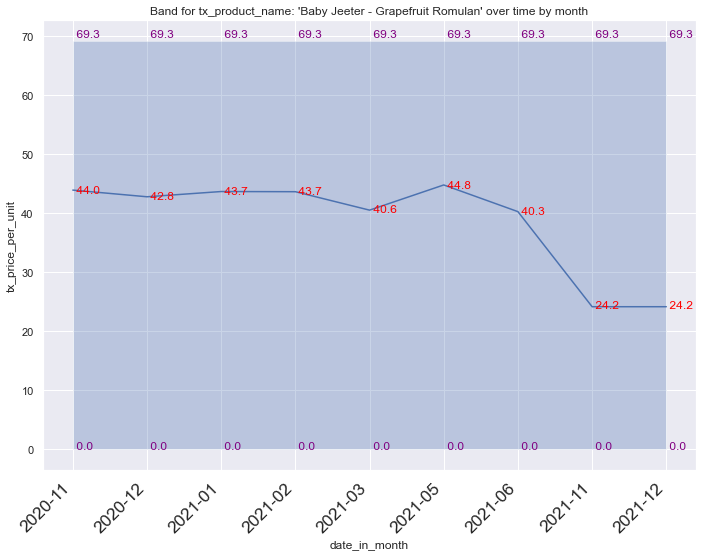

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-11                          0.0                 69.265
2020-12                          0.0                 69.265
2021-01                          0.0                 69.265
2021-02                          0.0                 69.265
2021-03                          0.0                 69.265
2021-05                          0.0                 69.265
2021-06                          0.0                 69.265
2021-11                          0.0                 69.265
2021-12                          0.0                 69.265
GRGBaby Jeeter - Honeydew
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 6.315789473684211 %
Number of transactions outliers above Boxplot Whisker Maximum is 15.43859649122807 %


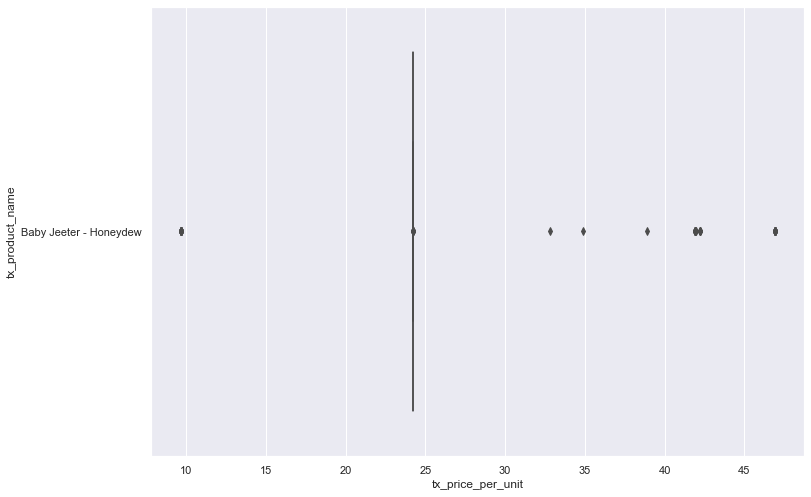

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Honeydew in tx_product_name : 223


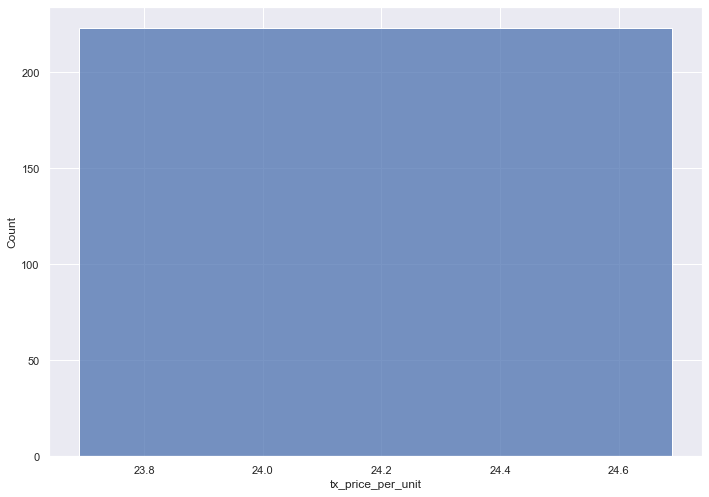

### Outputting summary table ### 	
count    223.00
mean      24.19
std        0.00
min       24.19
25%       24.19
50%       24.19
75%       24.19
max       24.19
Name: Baby Jeeter - Honeydew, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean  std    min    25%    50%    75%    max
date_in_month                                                      
2021-08         15.0  24.19  0.0  24.19  24.19  24.19  24.19  24.19
2021-09         56.0  24.19  0.0  24.19  24.19  24.19  24.19  24.19
2021-10         34.0  24.19  0.0  24.19  24.19  24.19  24.19  24.19
2021-11         63.0  24.19  0.0  24.19  24.19  24.19  24.19  24.19
2021-12         55.0  24.19  0.0  24.19  24.19  24.19  24.19  24.19
### Outputting time series line plot of MSRP along with confidence bands ### 	


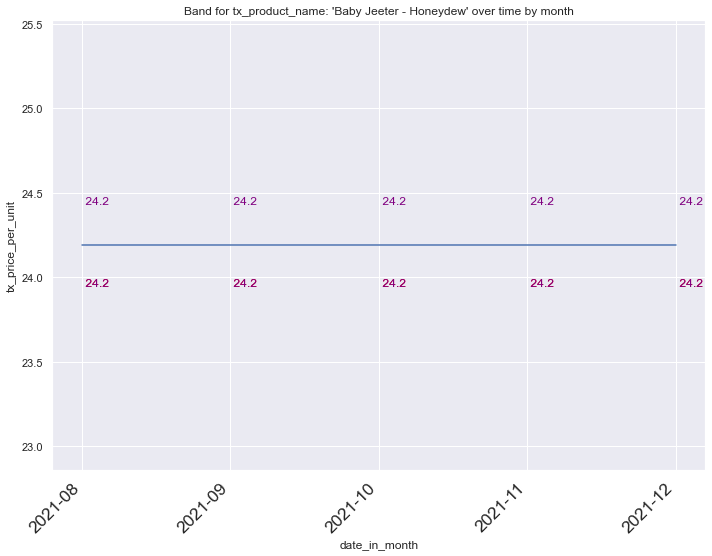

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-08                        24.19                  24.19
2021-09                        24.19                  24.19
2021-10                        24.19                  24.19
2021-11                        24.19                  24.19
2021-12                        24.19                  24.19
GRGBaby Jeeter - Watermelon Zkittlez
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


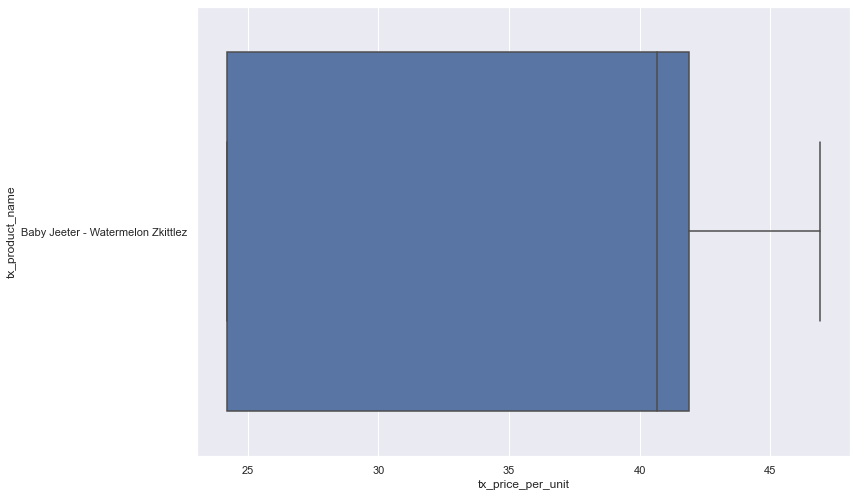

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Watermelon Zkittlez in tx_product_name : 162


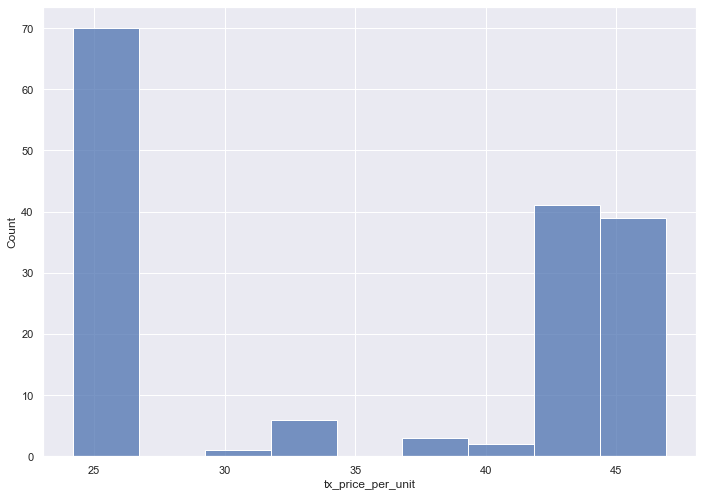

### Outputting summary table ### 	
count    162.00
mean      34.94
std        9.92
min       24.19
25%       24.19
50%       40.68
75%       41.91
max       46.91
Name: Baby Jeeter - Watermelon Zkittlez, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-04         25.0  42.79  4.16  31.91  41.91  41.91  46.91  46.91
2021-05         37.0  44.33  3.85  31.91  41.91  46.91  46.91  46.91
2021-06         29.0  42.28  3.90  31.91  41.91  41.91  46.91  46.91
2021-07          1.0  30.63   NaN  30.63  30.63  30.63  30.63  30.63
2021-09         70.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
### Outputting time series line plot of MSRP along with confidence bands ### 	


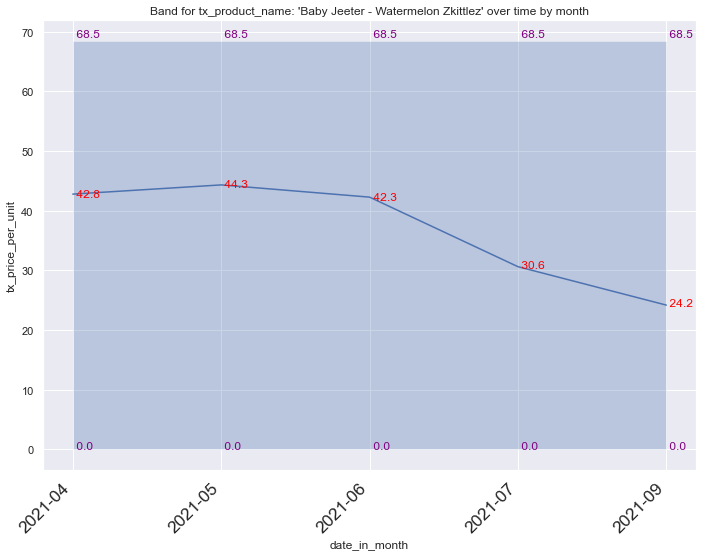

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-04                          0.0                  68.49
2021-05                          0.0                  68.49
2021-06                          0.0                  68.49
2021-07                          0.0                  68.49
2021-09                          0.0                  68.49
GRGInfused Baby Jeeter - Mai Tai
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.904977375565611 %
Number of transactions outliers above Boxplot Whisker Maximum is 18.099547511312217 %


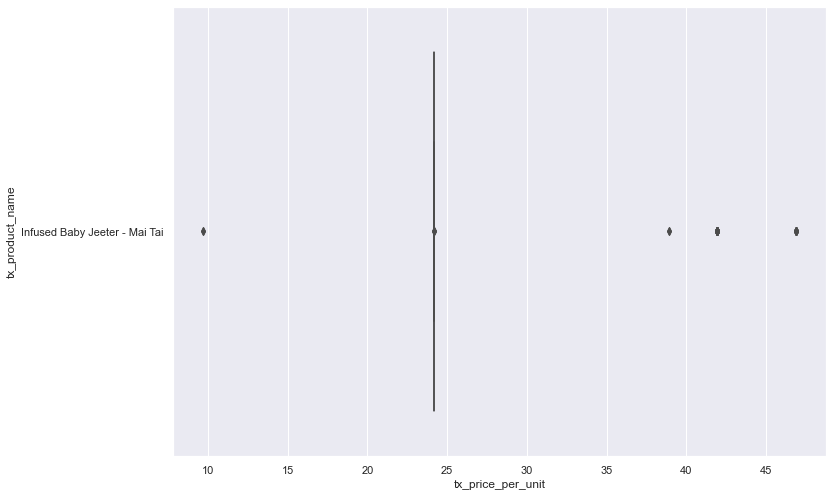

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Mai Tai in tx_product_name : 179


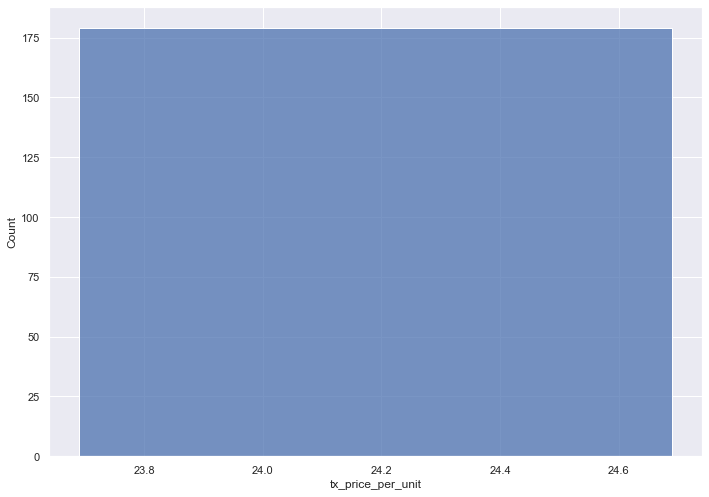

### Outputting summary table ### 	
count    179.00
mean      24.19
std        0.00
min       24.19
25%       24.19
50%       24.19
75%       24.19
max       24.19
Name: Infused Baby Jeeter - Mai Tai, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean  std    min    25%    50%    75%    max
date_in_month                                                      
2021-08         50.0  24.19  0.0  24.19  24.19  24.19  24.19  24.19
2021-09        113.0  24.19  0.0  24.19  24.19  24.19  24.19  24.19
2021-10          8.0  24.19  0.0  24.19  24.19  24.19  24.19  24.19
2021-11          8.0  24.19  0.0  24.19  24.19  24.19  24.19  24.19
### Outputting time series line plot of MSRP along with confidence bands ### 	


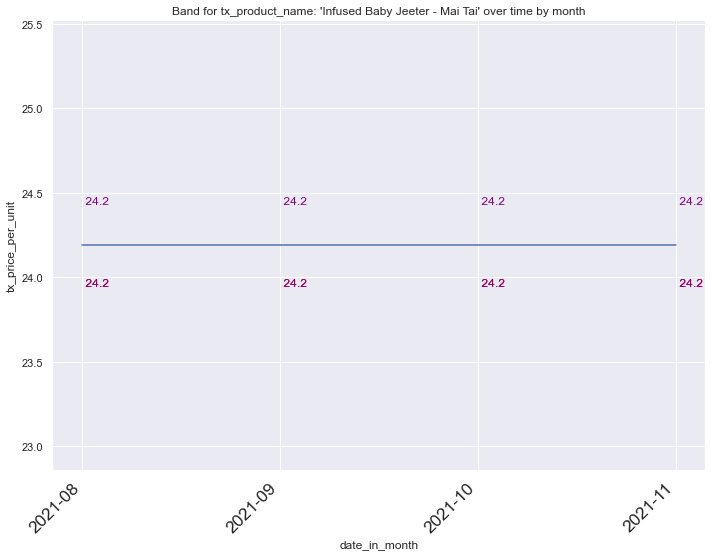

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-08                        24.19                  24.19
2021-09                        24.19                  24.19
2021-10                        24.19                  24.19
2021-11                        24.19                  24.19
GRGInfused Baby Jeeter - Apple Fritter 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.28328611898017 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


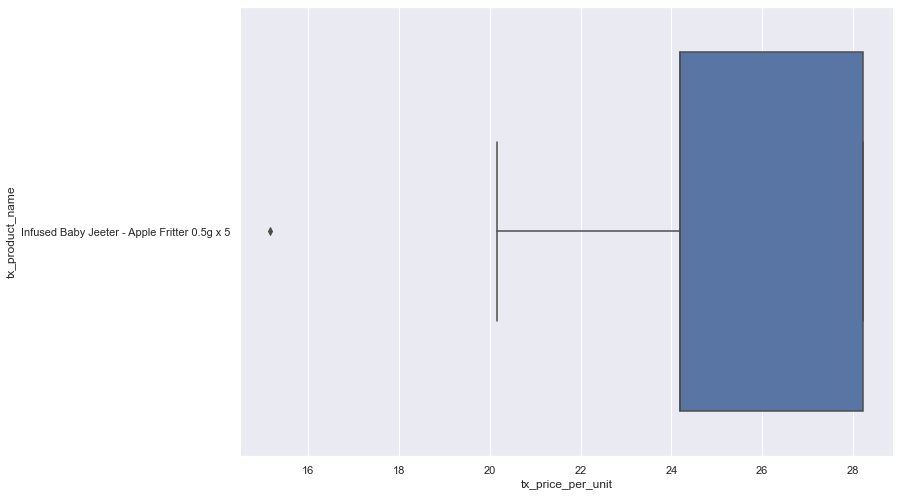

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Apple Fritter 0.5g x 5 in tx_product_name : 352


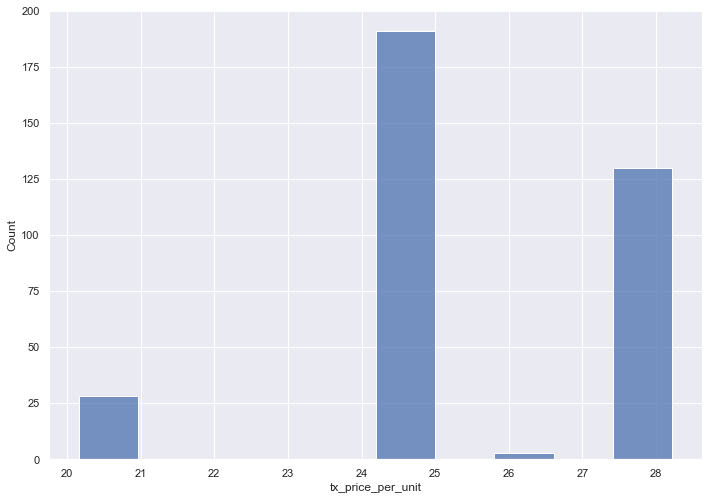

### Outputting summary table ### 	
count    352.00
mean      25.38
std        2.44
min       20.16
25%       24.19
50%       24.19
75%       28.22
max       28.22
Name: Infused Baby Jeeter - Apple Fritter 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-09         45.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2021-11         55.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2022-01          1.0  24.19   NaN  24.19  24.19  24.19  24.19  24.19
2022-02         88.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2022-03         47.0  28.05  0.82  24.19  28.22  28.22  28.22  28.22
2022-04         76.0  25.17  3.87  20.16  20.16  28.22  28.22  28.22
2022-05         40.0  28.22  0.00  28.22  28.22  28.22  28.22  28.22
### Outputting time series line plot of MSRP along with confidence bands ### 	


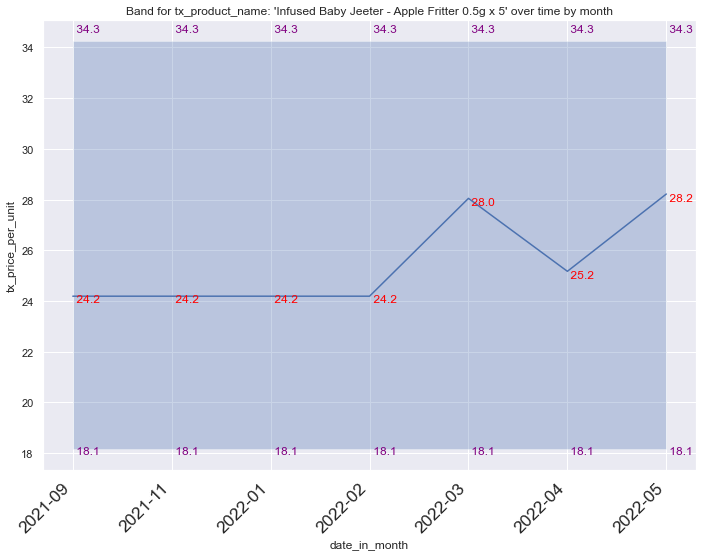

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-09                       18.145                 34.265
2021-11                       18.145                 34.265
2022-01                       18.145                 34.265
2022-02                       18.145                 34.265
2022-03                       18.145                 34.265
2022-04                       18.145                 34.265
2022-05                       18.145                 34.265
GRGInfused Baby Jeeter - Watermelon Zkittlez 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


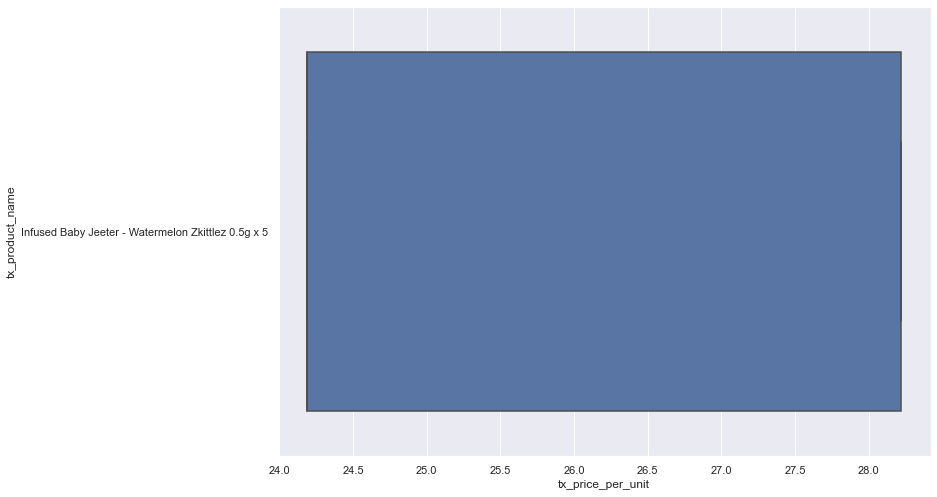

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Watermelon Zkittlez 0.5g x 5 in tx_product_name : 559


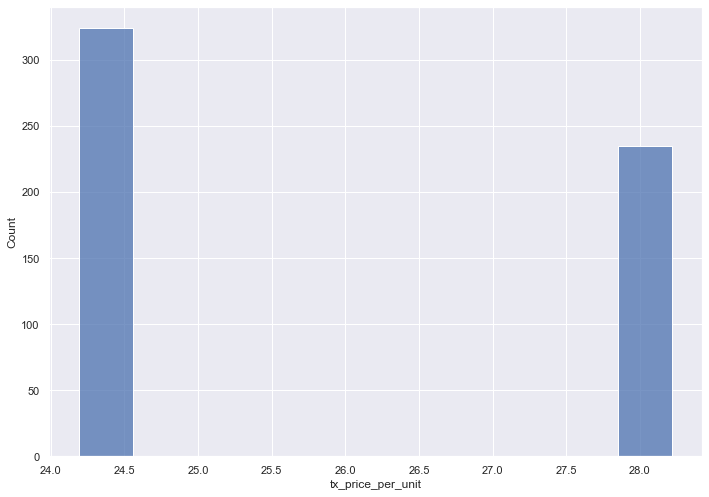

### Outputting summary table ### 	
count    559.00
mean      25.86
std        1.97
min       24.19
25%       24.19
50%       24.19
75%       28.22
max       28.22
Name: Infused Baby Jeeter - Watermelon Zkittlez 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-12         98.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2022-01        182.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2022-02        161.0  27.12  1.80  24.19  24.19  28.22  28.22  28.22
2022-03          1.0  28.22   NaN  28.22  28.22  28.22  28.22  28.22
2022-04        114.0  28.13  0.11  28.00  28.00  28.22  28.22  28.22
2022-05          3.0  28.07  0.13  28.00  28.00  28.00  28.11  28.22
### Outputting time series line plot of MSRP along with confidence bands ### 	


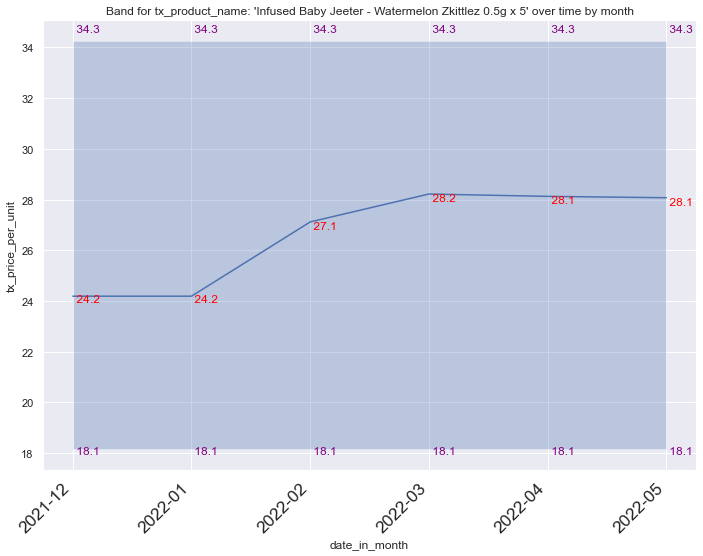

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-12                       18.145                 34.265
2022-01                       18.145                 34.265
2022-02                       18.145                 34.265
2022-03                       18.145                 34.265
2022-04                       18.145                 34.265
2022-05                       18.145                 34.265
GRGInfused Baby Jeeter - Strawberry Shortcake 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


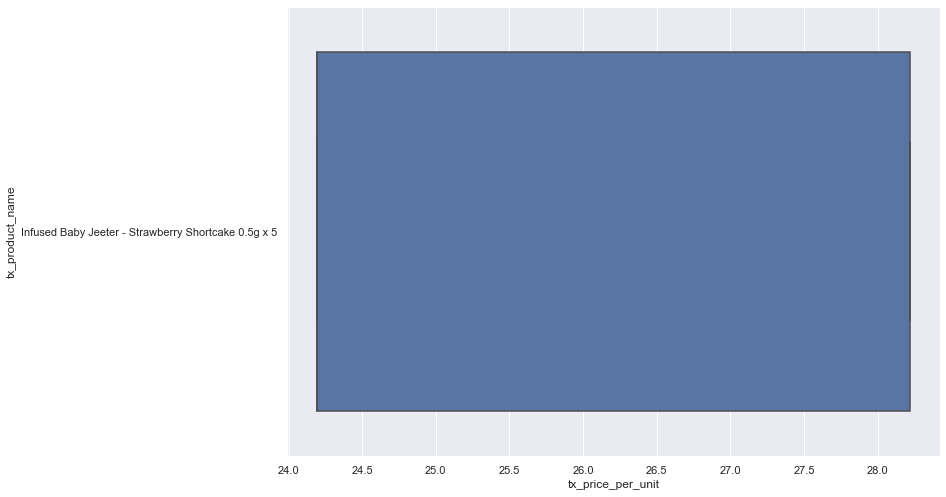

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Strawberry Shortcake 0.5g x 5 in tx_product_name : 288


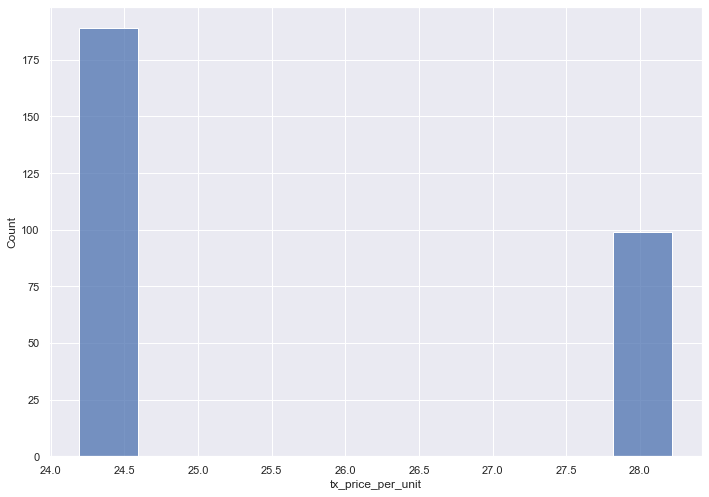

### Outputting summary table ### 	
count    288.00
mean      25.58
std        1.92
min       24.19
25%       24.19
50%       24.19
75%       28.22
max       28.22
Name: Infused Baby Jeeter - Strawberry Shortcake 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-12         84.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2022-01         42.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2022-02        153.0  26.56  1.99  24.19  24.19  28.22  28.22  28.22
2022-05          9.0  28.22  0.00  28.22  28.22  28.22  28.22  28.22
### Outputting time series line plot of MSRP along with confidence bands ### 	


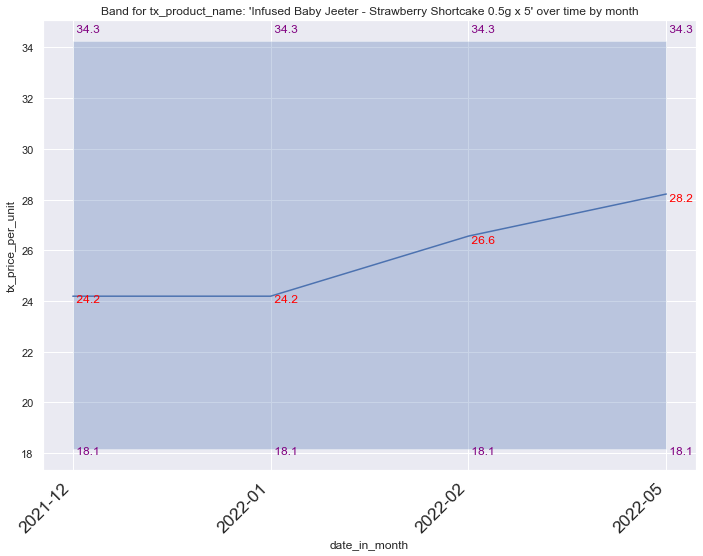

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-12                       18.145                 34.265
2022-01                       18.145                 34.265
2022-02                       18.145                 34.265
2022-05                       18.145                 34.265
GRGInfused Baby Jeeter - Grape Ape 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 3.2193158953722336 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.61569416498994 %


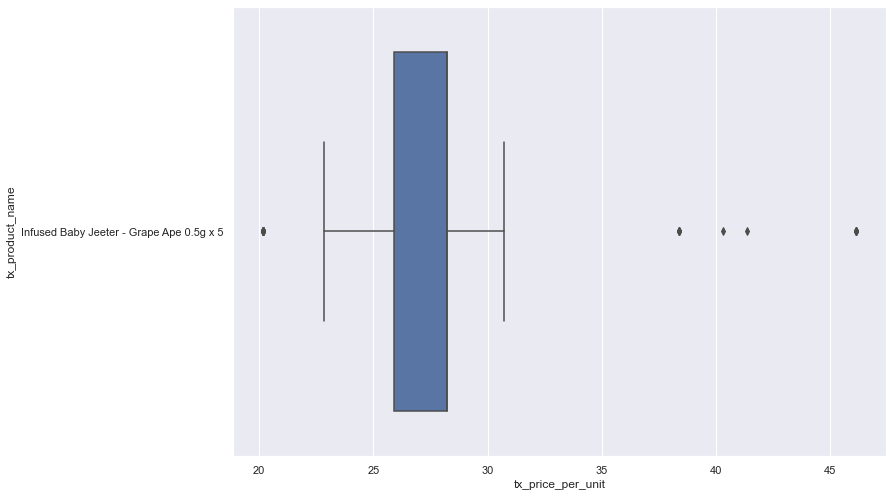

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Grape Ape 0.5g x 5 in tx_product_name : 468


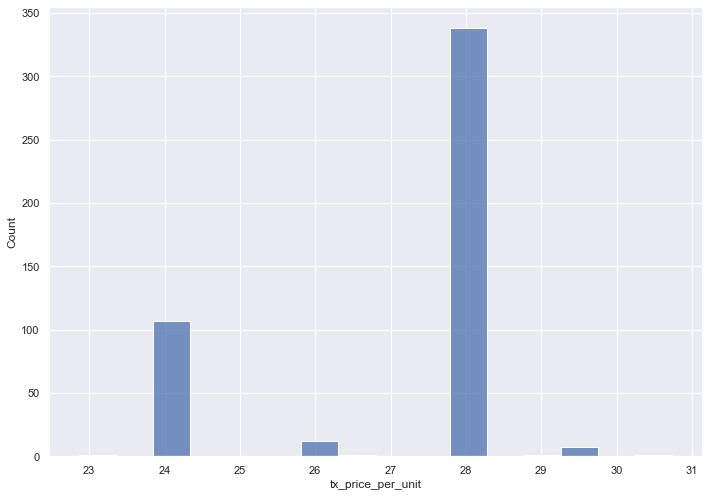

### Outputting summary table ### 	
count    468.00
mean      27.26
std        1.73
min       22.86
25%       26.21
50%       28.22
75%       28.22
max       30.74
Name: Infused Baby Jeeter - Grape Ape 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-11         29.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2021-12         12.0  24.77  1.47  24.19  24.19  24.19  24.19  29.01
2022-01         11.0  28.12  2.57  22.86  27.65  29.38  29.38  30.74
2022-02        137.0  26.25  2.02  24.19  24.19  28.22  28.22  28.22
2022-03        203.0  28.22  0.00  28.22  28.22  28.22  28.22  28.22
2022-04         73.0  27.92  0.72  26.21  28.22  28.22  28.22  28.22
2022-05          3.0  28.22  0.00  28.22  28.22  28.22  28.22  28.22
### Outputting time series line plot of MSRP along with confidence bands ### 	


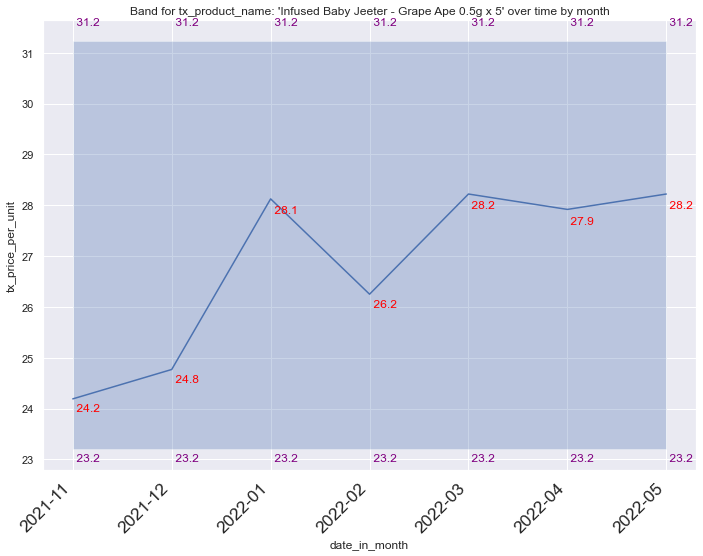

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-11                       23.195                 31.235
2021-12                       23.195                 31.235
2022-01                       23.195                 31.235
2022-02                       23.195                 31.235
2022-03                       23.195                 31.235
2022-04                       23.195                 31.235
2022-05                       23.195                 31.235
GRGInfused Baby Jeeter - Peach Ringz 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.950413223140496 %


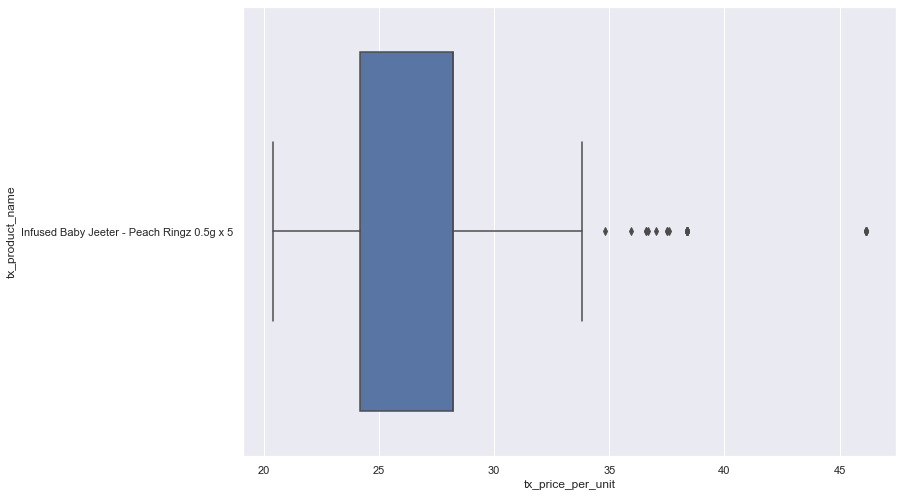

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Peach Ringz 0.5g x 5 in tx_product_name : 569


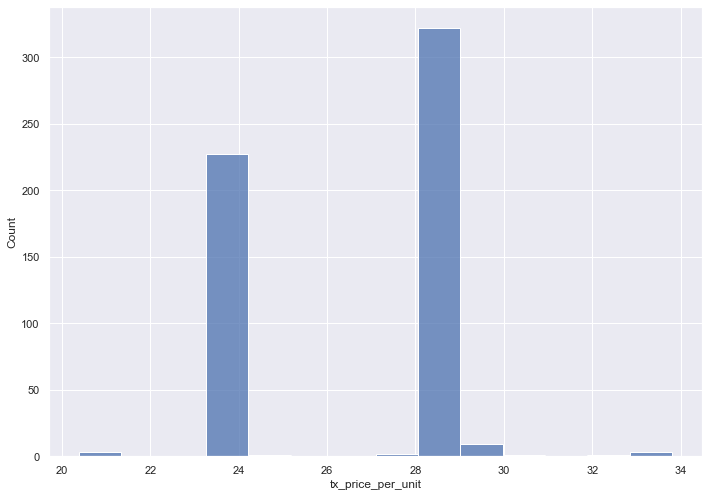

### Outputting summary table ### 	
count    569.00
mean      26.62
std        2.12
min       20.38
25%       24.19
50%       28.22
75%       28.22
max       33.81
Name: Infused Baby Jeeter - Peach Ringz 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-11         37.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2021-12         56.0  24.94  2.15  23.38  24.19  24.19  24.19  33.38
2022-01         90.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2022-02        160.0  26.99  1.86  24.19  24.19  28.22  28.22  28.22
2022-03        165.0  28.22  0.00  28.22  28.22  28.22  28.22  28.22
2022-05         61.0  27.91  2.23  20.38  28.22  28.22  28.22  33.81
### Outputting time series line plot of MSRP along with confidence bands ### 	


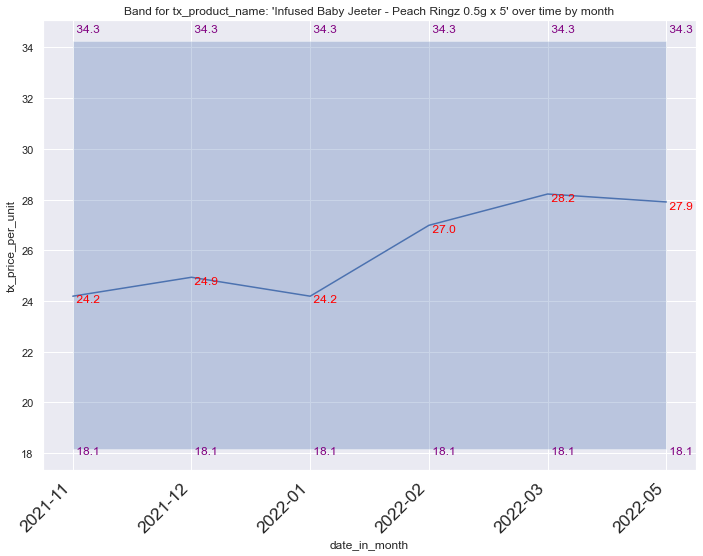

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-11                       18.145                 34.265
2021-12                       18.145                 34.265
2022-01                       18.145                 34.265
2022-02                       18.145                 34.265
2022-03                       18.145                 34.265
2022-05                       18.145                 34.265
GRGInfused Baby Jeeter - Maui Wowie 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.009276437847866 %


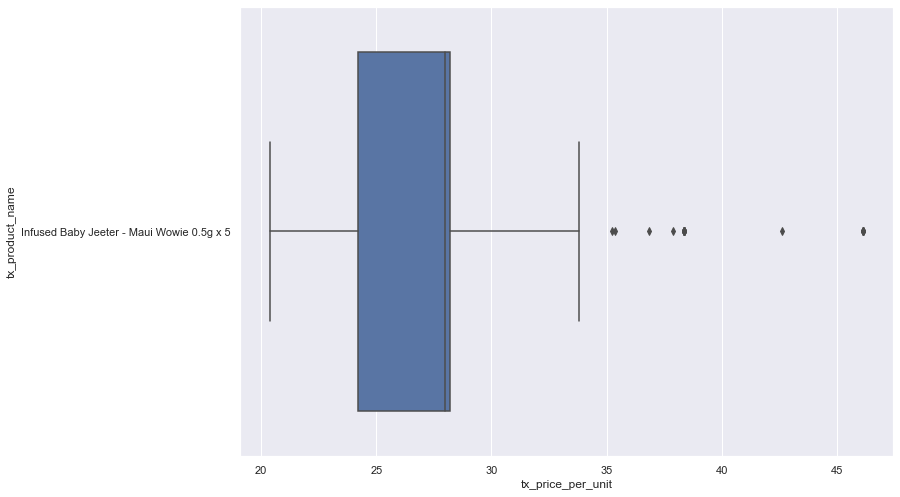

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Maui Wowie 0.5g x 5 in tx_product_name : 512


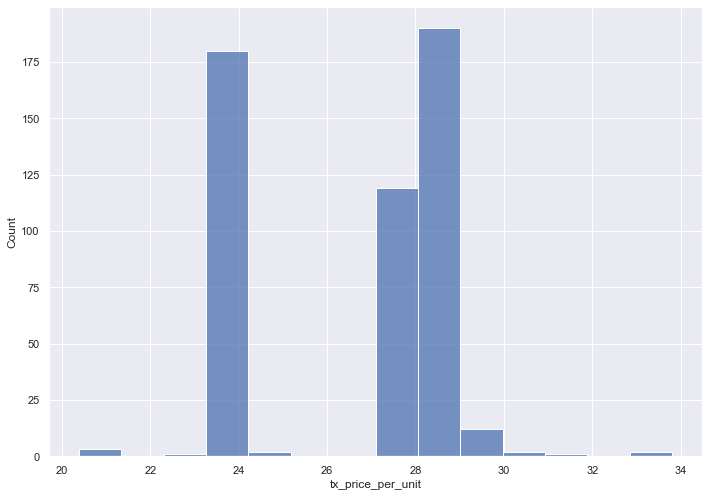

### Outputting summary table ### 	
count    512.00
mean      26.75
std        2.05
min       20.38
25%       24.19
50%       28.00
75%       28.22
max       33.81
Name: Infused Baby Jeeter - Maui Wowie 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-12         52.0  24.55  1.62  20.43  24.19  24.19  24.19  30.62
2022-01         52.0  24.56  1.46  22.34  24.19  24.19  24.19  29.75
2022-02        136.0  25.67  1.95  24.19  24.19  24.19  28.22  28.22
2022-03        125.0  28.15  0.10  28.00  28.00  28.22  28.22  28.22
2022-04        131.0  28.09  0.11  28.00  28.00  28.00  28.22  28.22
2022-05         16.0  28.13  3.91  20.38  27.18  29.38  29.69  33.81
### Outputting time series line plot of MSRP along with confidence bands ### 	


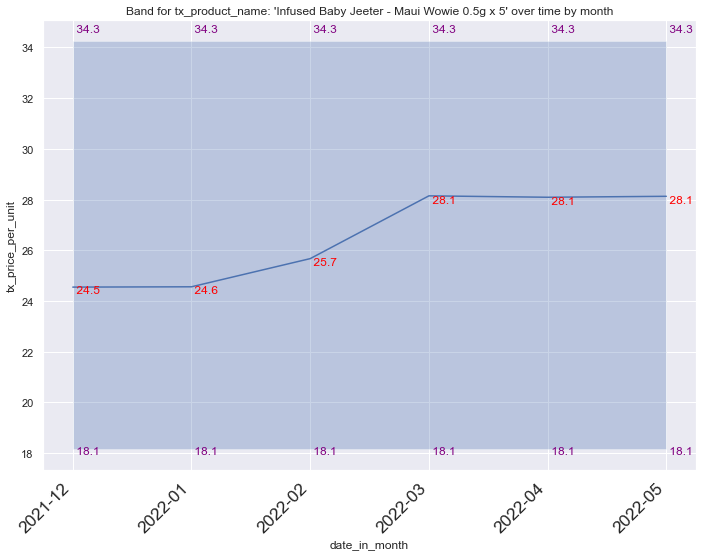

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-12                       18.145                 34.265
2022-01                       18.145                 34.265
2022-02                       18.145                 34.265
2022-03                       18.145                 34.265
2022-04                       18.145                 34.265
2022-05                       18.145                 34.265
GRGInfused Baby Jeeter - Blueberry Kush 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.2663316582914574 %


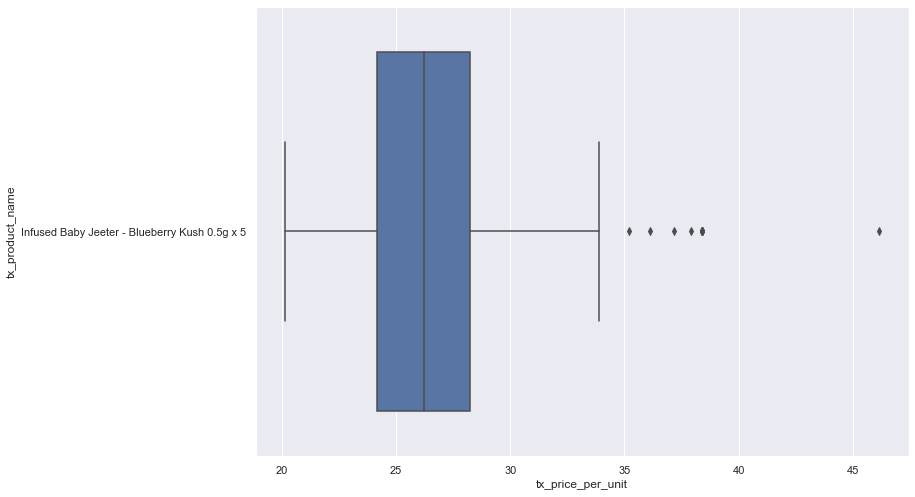

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Blueberry Kush 0.5g x 5 in tx_product_name : 385


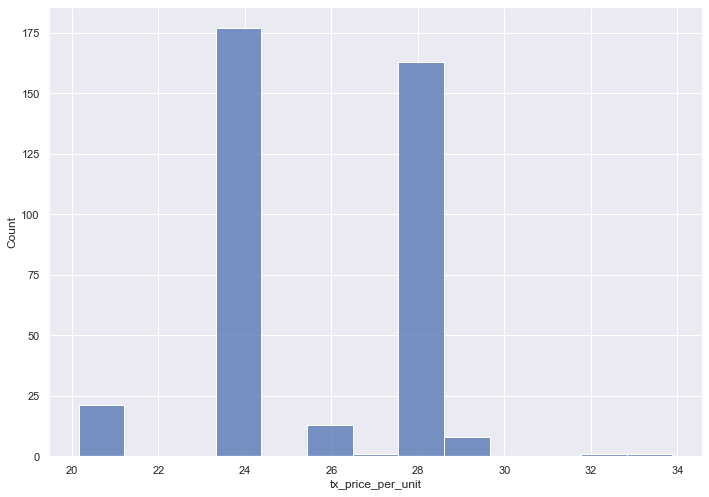

### Outputting summary table ### 	
count    385.00
mean      25.91
std        2.44
min       20.16
25%       24.19
50%       24.19
75%       28.22
max       33.88
Name: Infused Baby Jeeter - Blueberry Kush 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-12         49.0  24.66  1.64  24.19  24.19  24.19  24.19  32.48
2022-01        140.0  24.50  1.34  24.19  24.19  24.19  24.19  33.88
2022-03         71.0  28.22  0.00  28.22  28.22  28.22  28.22  28.22
2022-04        113.0  26.49  3.10  20.16  26.21  28.22  28.22  28.22
2022-05         12.0  28.22  0.00  28.22  28.22  28.22  28.22  28.22
### Outputting time series line plot of MSRP along with confidence bands ### 	


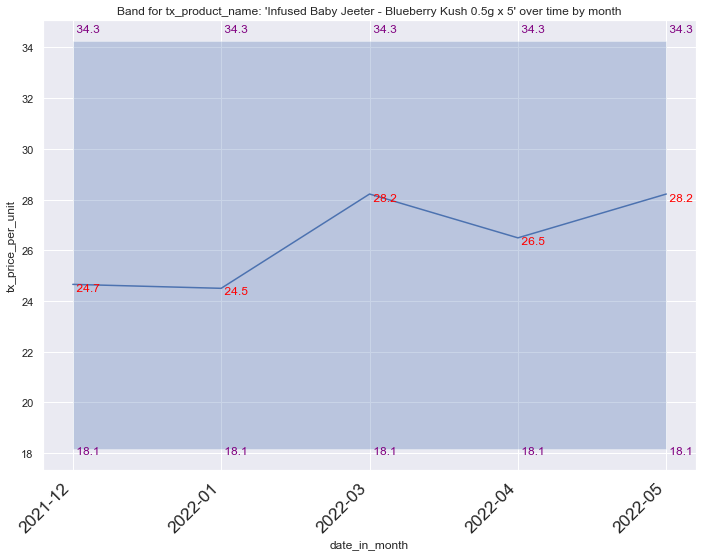

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-12                       18.145                 34.265
2022-01                       18.145                 34.265
2022-03                       18.145                 34.265
2022-04                       18.145                 34.265
2022-05                       18.145                 34.265
GRGInfused Baby Jeeter - Gelato #33
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


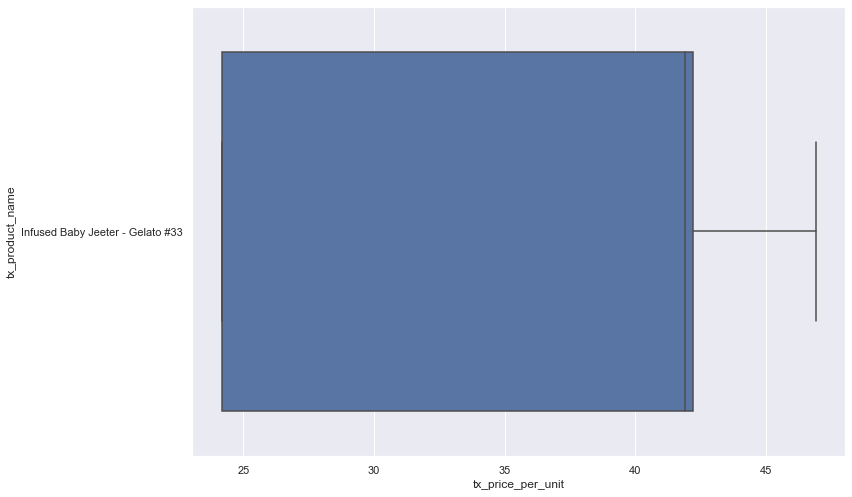

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Gelato #33 in tx_product_name : 110


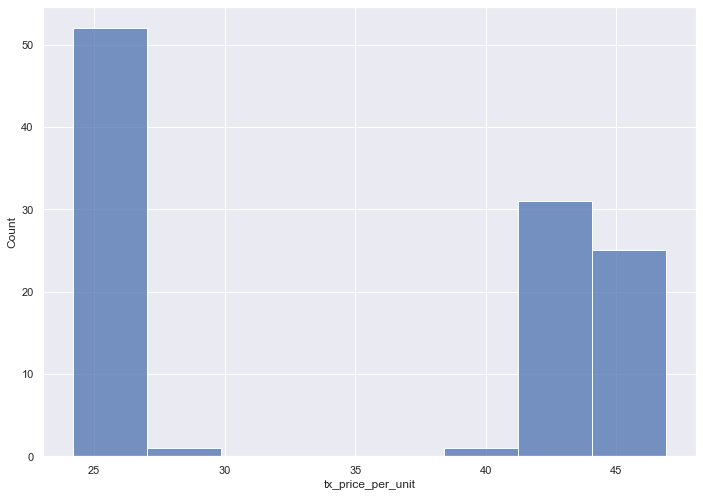

### Outputting summary table ### 	
count    110.00
mean      34.56
std       10.14
min       24.19
25%       24.19
50%       41.91
75%       42.22
max       46.91
Name: Infused Baby Jeeter - Gelato #33, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2020-12          5.0  44.10  2.57  42.22  42.22  42.22  46.91  46.91
2021-01          7.0  42.22  0.00  42.22  42.22  42.22  42.22  42.22
2021-02          9.0  43.75  2.37  41.91  42.22  42.22  46.91  46.91
2021-03         13.0  43.83  2.53  41.91  41.91  41.91  46.91  46.91
2021-04          1.0  41.91   NaN  41.91  41.91  41.91  41.91  41.91
2021-05         20.0  45.01  2.73  38.91  41.91  46.91  46.91  46.91
2021-06          2.0  46.91  0.00  46.91  46.91  46.91  46.91  46.91
2021-10         50.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2022-01          2.0  24.19

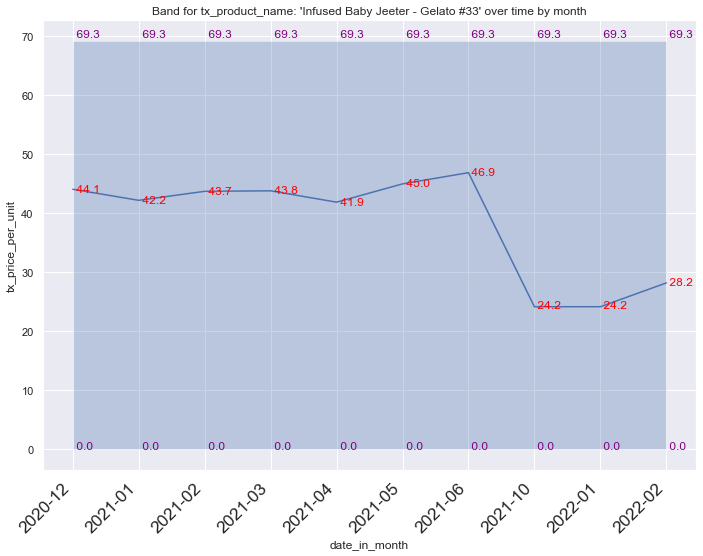

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-12                          0.0                 69.265
2021-01                          0.0                 69.265
2021-02                          0.0                 69.265
2021-03                          0.0                 69.265
2021-04                          0.0                 69.265
2021-05                          0.0                 69.265
2021-06                          0.0                 69.265
2021-10                          0.0                 69.265
2022-01                          0.0                 69.265
2022-02                          0.0                 69.265
GRGBaby Jeeter - Maui Wowie
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


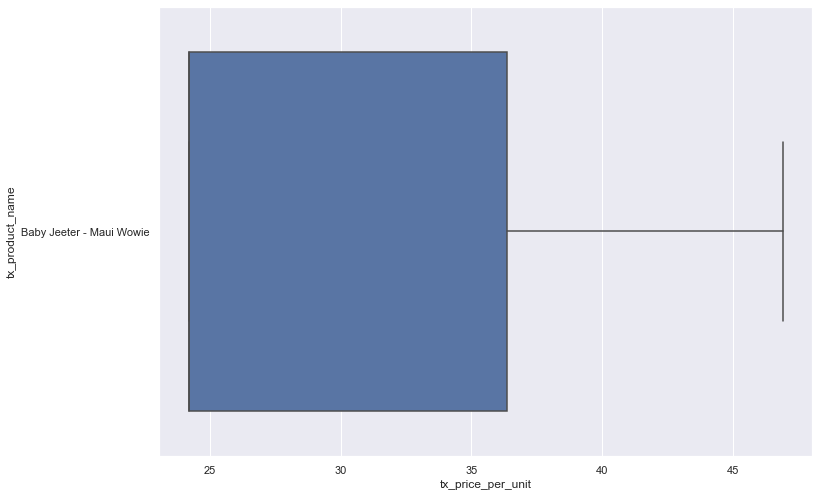

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Maui Wowie in tx_product_name : 188


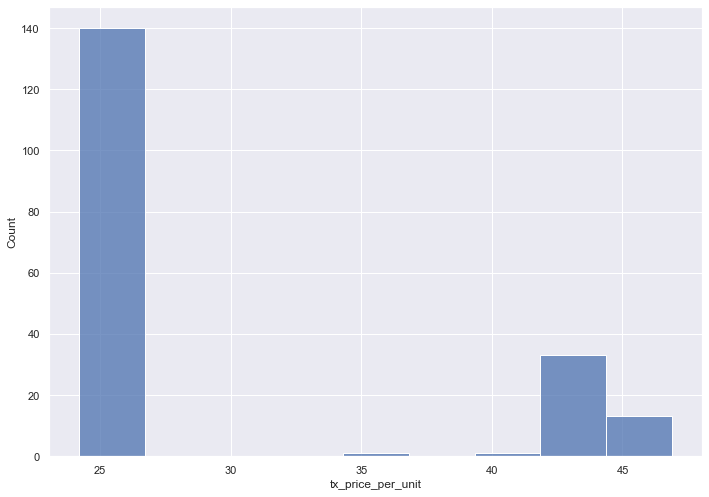

### Outputting summary table ### 	
count    188.00
mean      29.02
std        8.37
min       24.19
25%       24.19
50%       24.19
75%       36.35
max       46.91
Name: Baby Jeeter - Maui Wowie, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-01          5.0  44.10  2.57  42.22  42.22  42.22  46.91  46.91
2021-02         10.0  43.54  4.05  35.18  41.91  44.44  46.91  46.91
2021-03          5.0  43.91  2.74  41.91  41.91  41.91  46.91  46.91
2021-05         23.0  42.78  1.94  41.91  41.91  41.91  41.91  46.91
2021-06          5.0  41.91  0.00  41.91  41.91  41.91  41.91  41.91
2021-10         15.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2021-11         46.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2021-12         63.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2022-01         16.0  24.19  0.00  

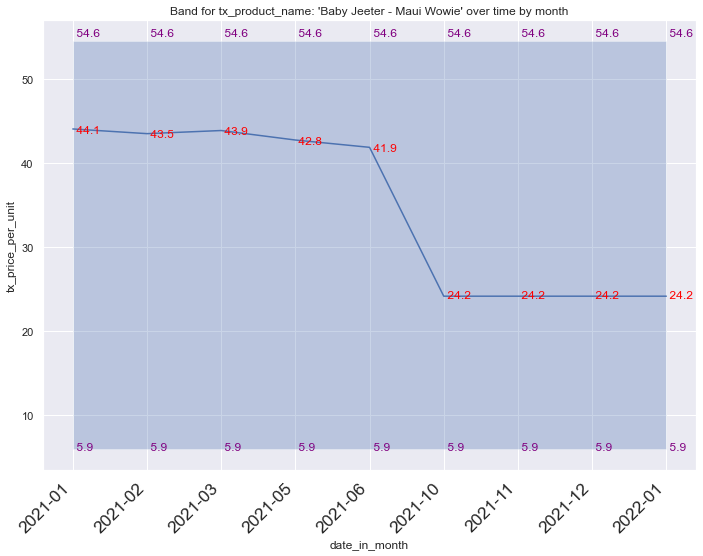

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-01                      5.94625               54.59625
2021-02                      5.94625               54.59625
2021-03                      5.94625               54.59625
2021-05                      5.94625               54.59625
2021-06                      5.94625               54.59625
2021-10                      5.94625               54.59625
2021-11                      5.94625               54.59625
2021-12                      5.94625               54.59625
2022-01                      5.94625               54.59625
GRGInfused Baby Jeeter - Banana Kush 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.39920159680638717 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.1936127744510974 %


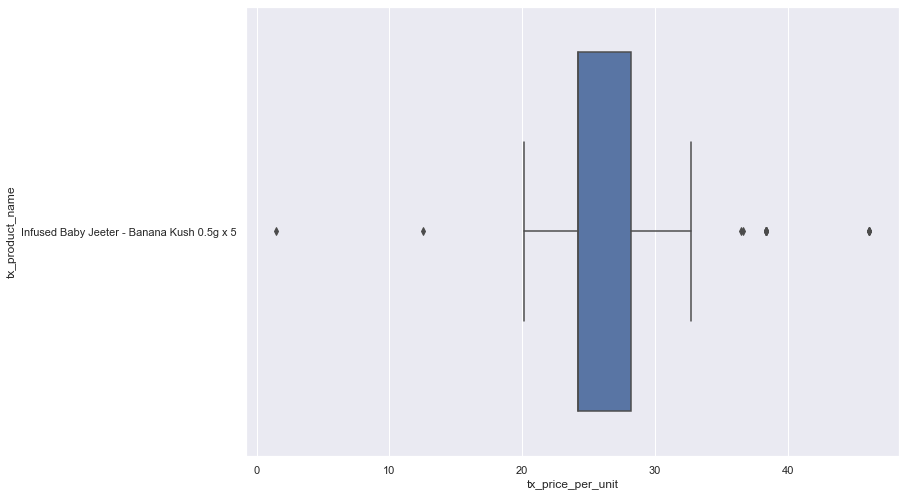

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Banana Kush 0.5g x 5 in tx_product_name : 483


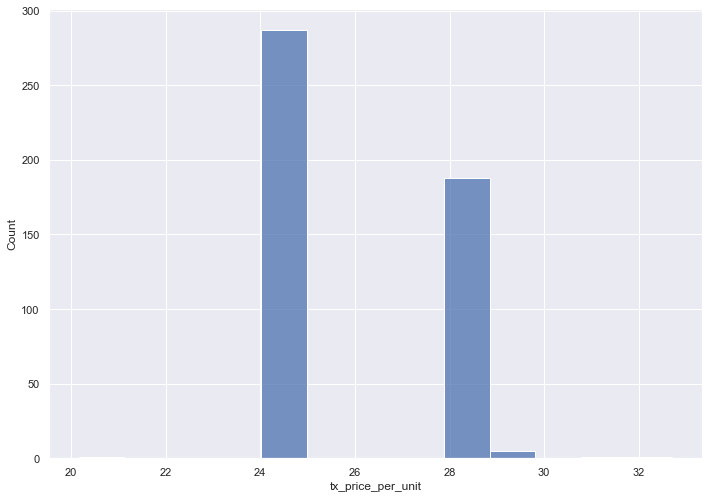

### Outputting summary table ### 	
count    483.00
mean      25.84
std        2.05
min       20.16
25%       24.19
50%       24.19
75%       28.22
max       32.71
Name: Infused Baby Jeeter - Banana Kush 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-11         43.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2021-12         40.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
2022-01         68.0  24.80  1.85  24.19  24.19  24.19  24.19  32.71
2022-02        184.0  25.09  1.68  24.19  24.19  24.19  24.19  28.22
2022-03        116.0  28.22  0.00  28.22  28.22  28.22  28.22  28.22
2022-04         32.0  27.97  1.42  20.16  28.22  28.22  28.22  28.22
### Outputting time series line plot of MSRP along with confidence bands ### 	


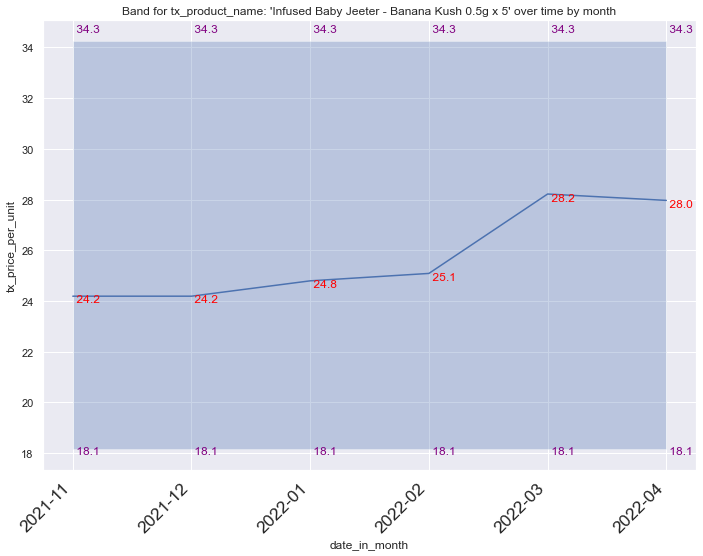

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-11                       18.145                 34.265
2021-12                       18.145                 34.265
2022-01                       18.145                 34.265
2022-02                       18.145                 34.265
2022-03                       18.145                 34.265
2022-04                       18.145                 34.265
GRGInfused Baby Jeeter - Churros 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.516795865633075 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.875968992248062 %


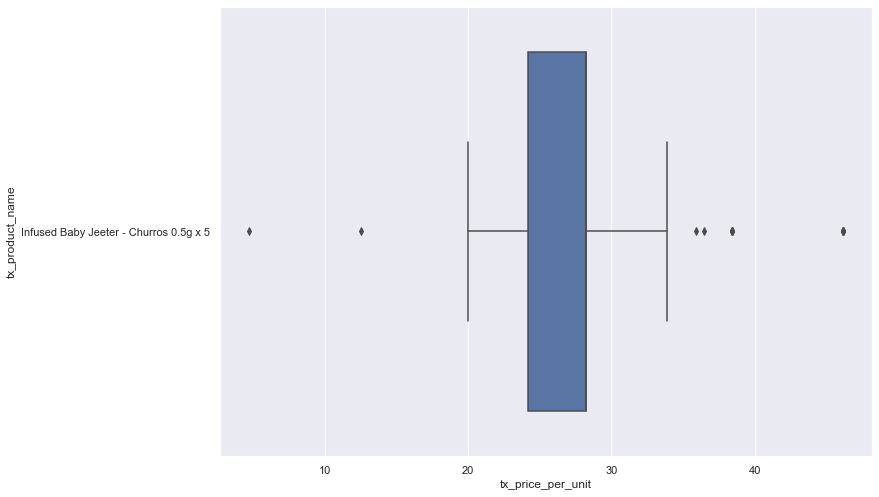

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Churros 0.5g x 5 in tx_product_name : 370


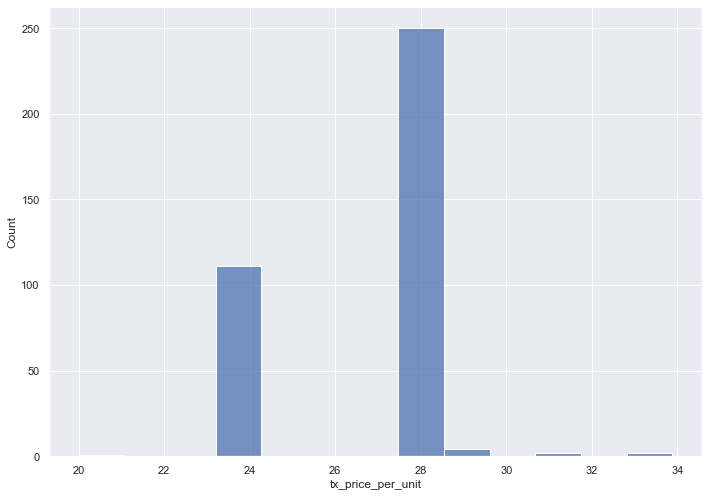

### Outputting summary table ### 	
count    370.00
mean      27.02
std        1.97
min       20.00
25%       24.19
50%       28.22
75%       28.22
max       33.88
Name: Infused Baby Jeeter - Churros 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-12         50.0  24.88  2.21  24.19  24.19  24.19  24.19  33.88
2022-01         69.0  24.48  1.36  24.19  24.19  24.19  24.19  31.48
2022-03        137.0  28.22  0.00  28.22  28.22  28.22  28.22  28.22
2022-04         87.0  28.08  0.88  20.00  28.22  28.22  28.22  28.22
2022-05         27.0  28.00  0.00  28.00  28.00  28.00  28.00  28.00
### Outputting time series line plot of MSRP along with confidence bands ### 	


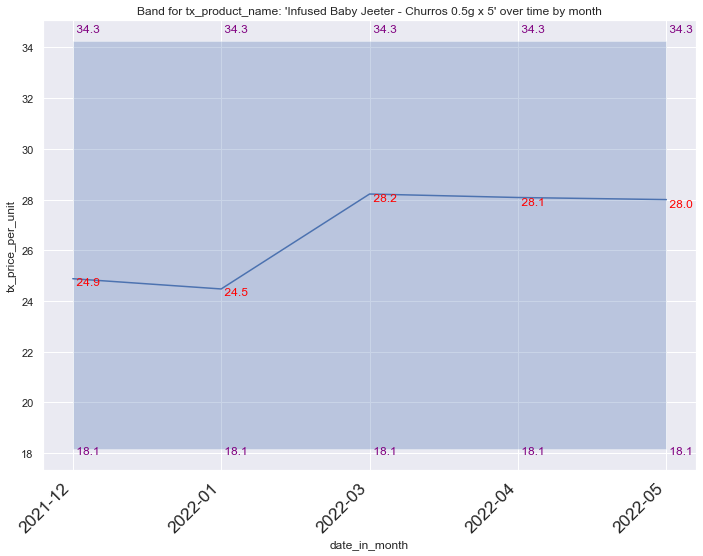

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-12                       18.145                 34.265
2022-01                       18.145                 34.265
2022-03                       18.145                 34.265
2022-04                       18.145                 34.265
2022-05                       18.145                 34.265
GRGBaby Jeeter - Limoncello
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.081632653061225 %


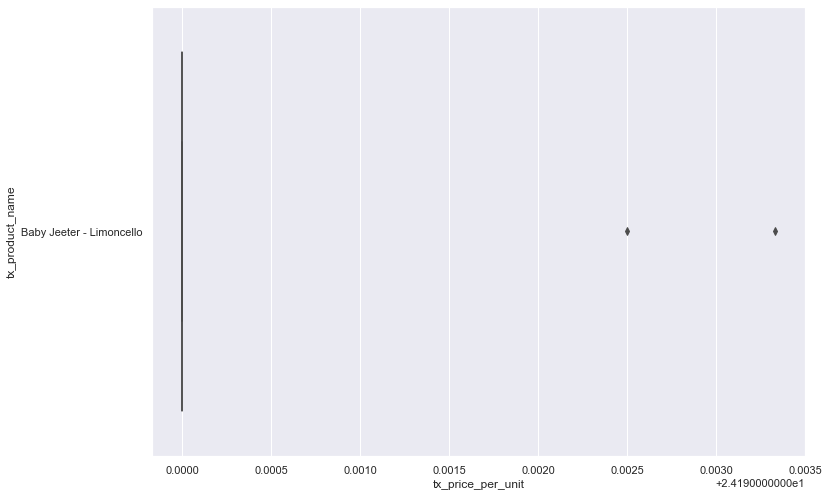

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Limoncello in tx_product_name : 47


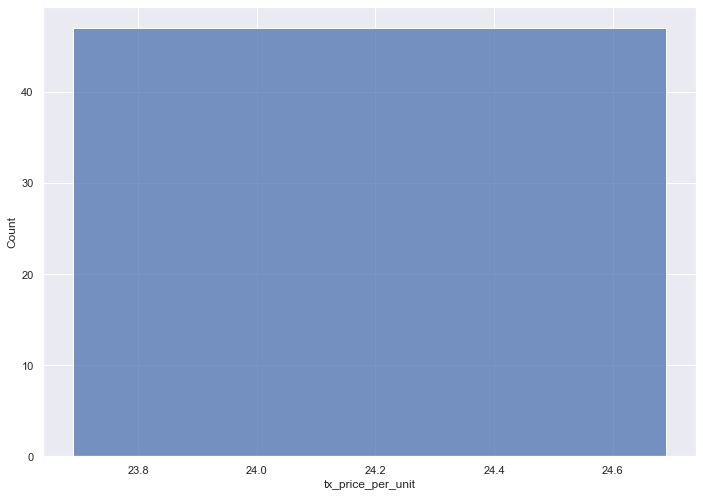

### Outputting summary table ### 	
count    47.00
mean     24.19
std       0.00
min      24.19
25%      24.19
50%      24.19
75%      24.19
max      24.19
Name: Baby Jeeter - Limoncello, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean  std    min    25%    50%    75%    max
date_in_month                                                      
2021-08         25.0  24.19  0.0  24.19  24.19  24.19  24.19  24.19
2021-10         22.0  24.19  0.0  24.19  24.19  24.19  24.19  24.19
### Outputting time series line plot of MSRP along with confidence bands ### 	


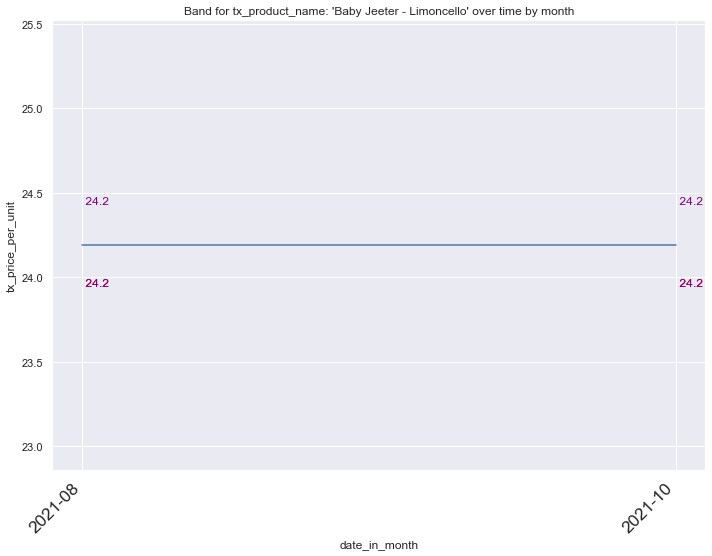

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-08                        24.19                  24.19
2021-10                        24.19                  24.19
GRGBaby Jeeter - Banana Kush
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


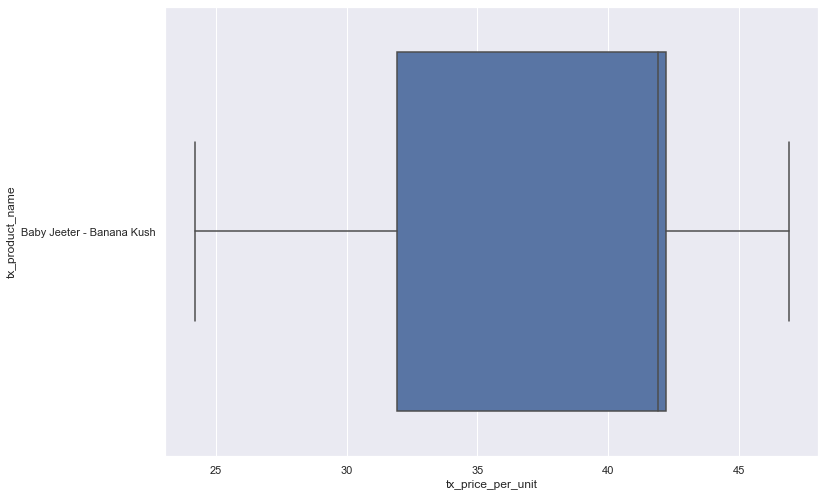

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Baby Jeeter - Banana Kush in tx_product_name : 81


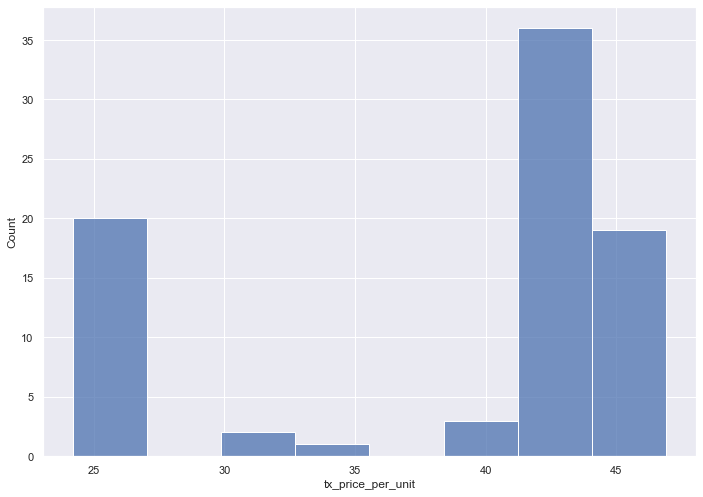

### Outputting summary table ### 	
count    81.00
mean     38.29
std       8.63
min      24.19
25%      31.91
50%      41.91
75%      42.22
max      46.91
Name: Baby Jeeter - Banana Kush, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-02         19.0  43.58  3.35  35.18  41.91  42.22  46.91  46.91
2021-03         12.0  42.52  4.29  31.91  41.91  41.91  46.91  46.91
2021-05          9.0  42.47  1.67  41.91  41.91  41.91  41.91  46.91
2021-06         21.0  42.72  3.50  31.91  41.91  41.91  46.91  46.91
2021-10         20.0  24.19  0.00  24.19  24.19  24.19  24.19  24.19
### Outputting time series line plot of MSRP along with confidence bands ### 	


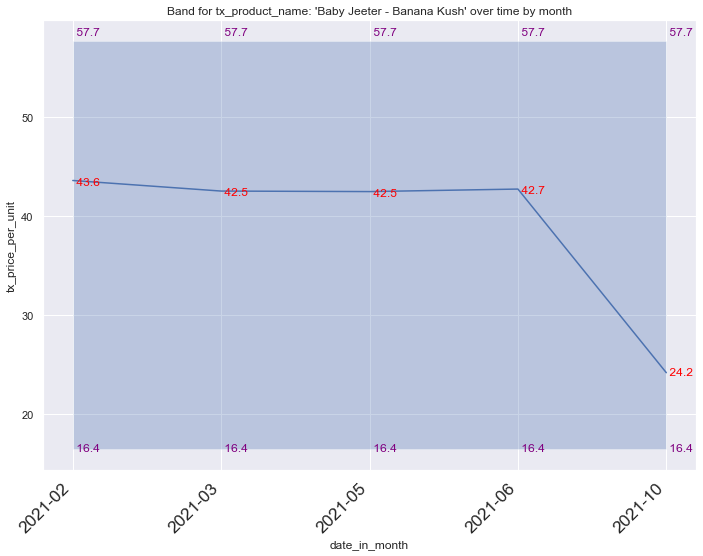

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-02                       16.445                 57.685
2021-03                       16.445                 57.685
2021-05                       16.445                 57.685
2021-06                       16.445                 57.685
2021-10                       16.445                 57.685
GRGInfused Baby Jeeter - Peach Ringz
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.7735849056603774 %


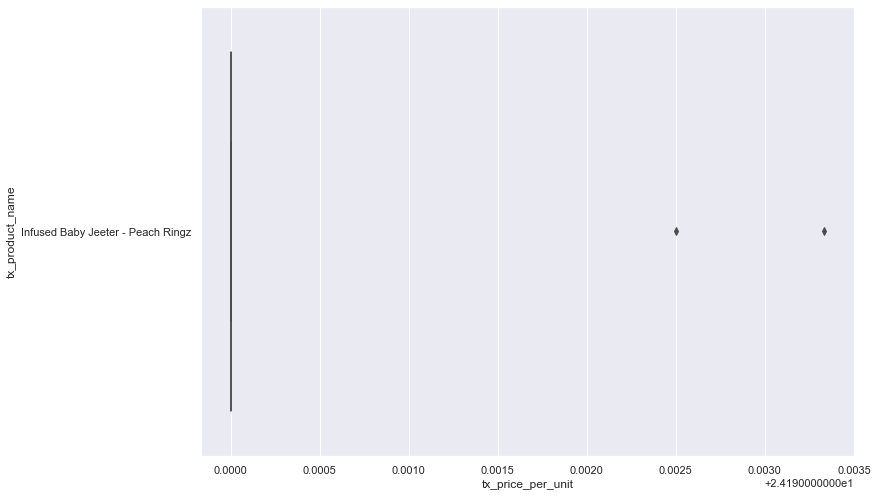

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Peach Ringz in tx_product_name : 51


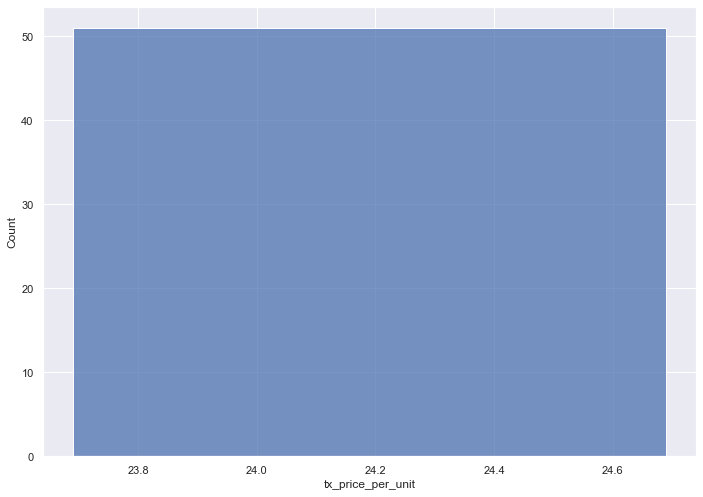

### Outputting summary table ### 	
count    51.00
mean     24.19
std       0.00
min      24.19
25%      24.19
50%      24.19
75%      24.19
max      24.19
Name: Infused Baby Jeeter - Peach Ringz, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean  std    min    25%    50%    75%    max
date_in_month                                                      
2021-08         40.0  24.19  0.0  24.19  24.19  24.19  24.19  24.19
2021-10         11.0  24.19  0.0  24.19  24.19  24.19  24.19  24.19
### Outputting time series line plot of MSRP along with confidence bands ### 	


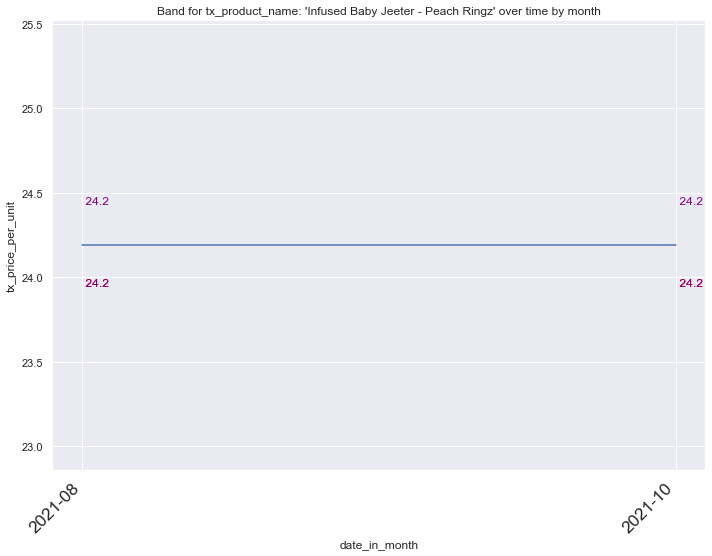

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-08                        24.19                  24.19
2021-10                        24.19                  24.19
GRGJeeter Juice 1g Vape Cartridge Strawberry Cheesecake
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


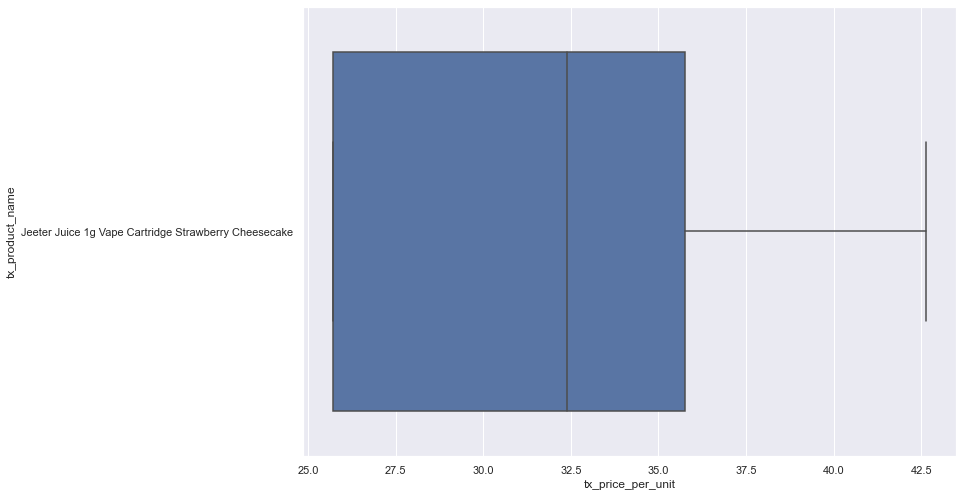

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Jeeter Juice 1g Vape Cartridge Strawberry Cheesecake in tx_product_name : 75


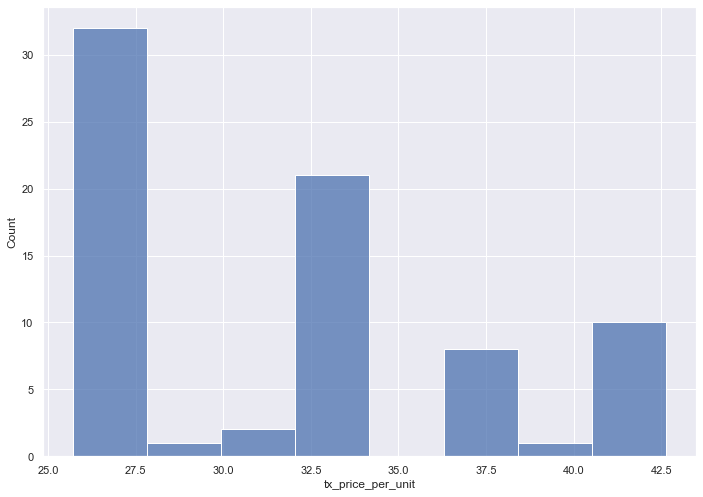

### Outputting summary table ### 	
count    75.00
mean     31.84
std       6.02
min      25.70
25%      25.70
50%      32.38
75%      35.75
max      42.64
Name: Jeeter Juice 1g Vape Cartridge Strawberry Cheesecake, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2021-06         17.0  36.19  4.03  27.22  34.12  38.38  38.38  41.02
2021-07         10.0  32.92  2.66  26.35  34.12  34.12  34.12  34.12
2021-10          8.0  25.70  0.00  25.70  25.70  25.70  25.70  25.70
2021-11         17.0  25.70  0.00  25.70  25.70  25.70  25.70  25.70
2021-12          5.0  29.48  7.41  25.70  25.70  25.70  27.64  42.64
2022-01         12.0  36.59  5.42  26.25  32.64  35.78  42.64  42.64
2022-02          5.0  36.91  5.26  32.64  32.64  34.01  42.64  42.64
2022-03          1.0  29.99   NaN  29.99  29.99  29.99  29.99  29.99
### Outputting 

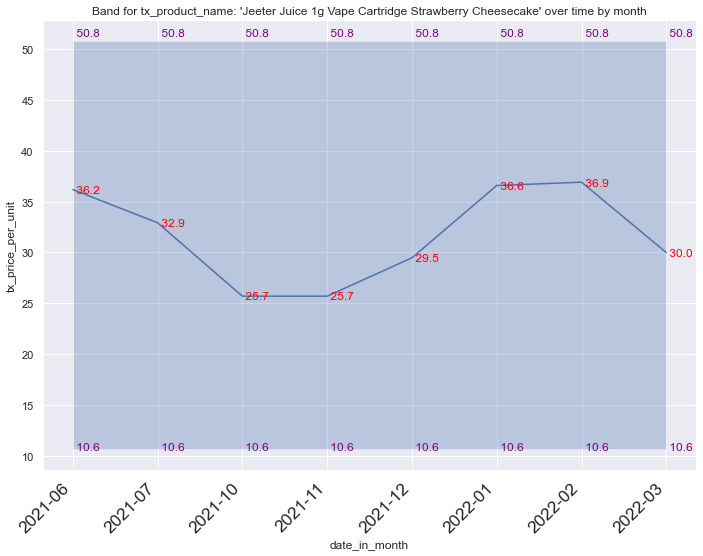

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-06                       10.625                 50.825
2021-07                       10.625                 50.825
2021-10                       10.625                 50.825
2021-11                       10.625                 50.825
2021-12                       10.625                 50.825
2022-01                       10.625                 50.825
2022-02                       10.625                 50.825
2022-03                       10.625                 50.825
EL
Verifying download summaries for license C9-0000370-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-05-11

[SUCCESS] All download summaries look good!
[SUCCESS] No unknown transfer packages!
93.0% of incoming transfer packages have receiver wholesale price
# transactions missing incoming transfer package: 0 (0.0%)
# transactions total: 22365
# receipts with mismatchin

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	
### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][extracted_units_idx] = df['extracted_units'][extracted_units_idx]
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match

### Available combined product category name in costs dataframe ### 	
['pre-roll flower' 'tincture' 'flower' 'edible' 'vape cartridge' 'extract'
 'other concentrate' 'pre-roll leaf' 'capsule' 'pre-roll infused'
 'topical' 'shake']
### Available combined product category name in sales dataframe ### 	
['edible' 'vape cartridge' 'flower' 'pre-roll leaf' 'pre-roll flower'
 'extract' 'tincture' 'other concentrate' 'capsule' 'topical'
 'pre-roll infused' 'shake']
ELInfused jeeter 1g - Maui Wowie
ELInfused Baby Jeeter - Blue Zkittlez 0.5g x 5
ELBaby Jeeter - Tropicana Cookies
ELBaby Jeeter - Blue Zkittlez
ELInfused Baby Jeeter - Strawberry Shortcake
ELInfused Baby Jeeter Grape Ape
ELBaby Jeeter - Blueberry Kush
ELInfused Baby Jeeter Durban Poison
ELBaby Jeeter - Fire OG
ELBaby Jeeter - Grapefruit Romulan
ELBaby Jeeter - Honeydew
ELBaby Jeeter - Watermelon Zkittlez
ELInfused Baby Jeeter - Mai Tai
ELInfused Baby Jeeter - Apple Fritter 0.5g x 5
ELInfused Baby Jeeter - Watermelon Zkittlez 0.5g x 

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	
### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Available combined product category name in costs dataframe ### 	
['vape cartridge' 'extract' 'edible' 'flower' 'pre-roll flower'
 'other concentrate' 'capsule' 'tincture' 'pre-roll infused' 'topical'
 'pre-roll leaf' 'seeds' 'shake']
### Available combined product category name in sales dataframe ### 	
['vape cartridge' 'other concentrate' 'flower' 'extract' 'pre-roll flower'
 'tincture' 'edible' 'pre-roll infused' 'topical' 'capsule'
 'pre-roll leaf' 'seeds' 'shake']
MDInfused jeeter 1g - Maui Wowie
MDInfused Baby Jeeter - Blue Zkittlez 0.5g x 5
MDBaby Jeeter - Tropicana Cookies
MDBaby Jeeter - Blue Zkittlez
MDInfused Baby Jeeter - Strawberry Shortcake
MDInfused Baby Jeeter Grape Ape
MDBaby Jeeter - Blueberry Kush
MDInfused Baby Jeeter Durban Poison
MDBaby Jeeter - Fire OG
MDBaby Jeeter - Grapefruit Romulan
MDBaby Jeeter - Honeydew
MDBaby Jeeter - Watermelon Zkittlez
MDInfused Baby Jeeter - Mai Tai
MDInfused Baby Jeeter - Apple Fritter 0.5g x 5
MDInfused Baby Jeeter - Watermelon 

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['vape cartridge' 'extract' 'pre-roll flower' 'flower' 'edible'
 'pre-roll infused' 'other concentrate' 'shake' 'pre-roll leaf' 'tincture'
 'topical' 'capsule' 'seeds']
### Available combined product category name in sales dataframe ### 	
['pre-roll flower' 'vape cartridge' 'flower' 'other concentrate'
 'pre-roll infused' 'edible' 'extract' 'shake' 'tincture' 'pre-roll leaf'
 'topical' 'capsule' 'seeds']
GHCInfused jeeter 1g - Maui Wowie
GHCInfused Baby Jeeter - Blue Zkittlez 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 21.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.0 %


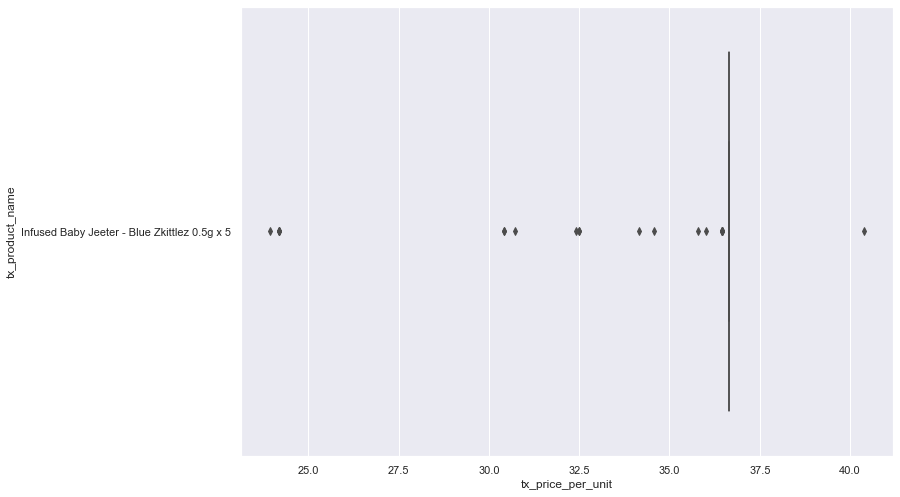

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Blue Zkittlez 0.5g x 5 in tx_product_name : 78


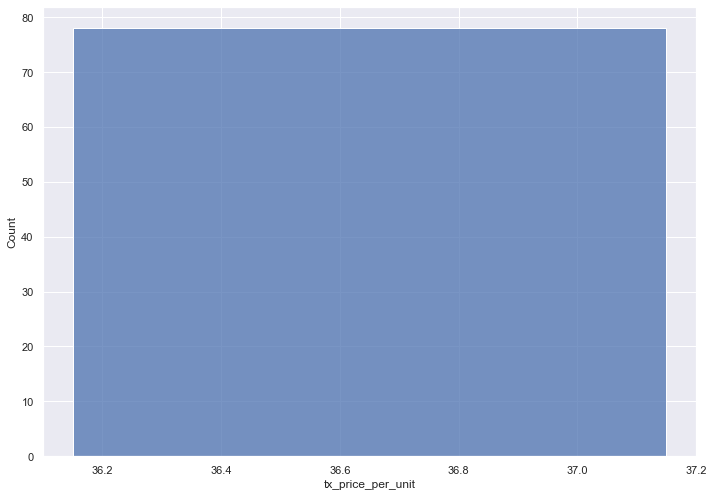

### Outputting summary table ### 	
count    78.00
mean     36.65
std       0.00
min      36.65
25%      36.65
50%      36.65
75%      36.65
max      36.65
Name: Infused Baby Jeeter - Blue Zkittlez 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean  std    min    25%    50%    75%    max
date_in_month                                                      
2021-12          1.0  36.65  NaN  36.65  36.65  36.65  36.65  36.65
2022-01         33.0  36.65  0.0  36.65  36.65  36.65  36.65  36.65
2022-02          3.0  36.65  0.0  36.65  36.65  36.65  36.65  36.65
2022-03         19.0  36.65  0.0  36.65  36.65  36.65  36.65  36.65
2022-04         22.0  36.65  0.0  36.65  36.65  36.65  36.65  36.65
### Outputting time series line plot of MSRP along with confidence bands ### 	


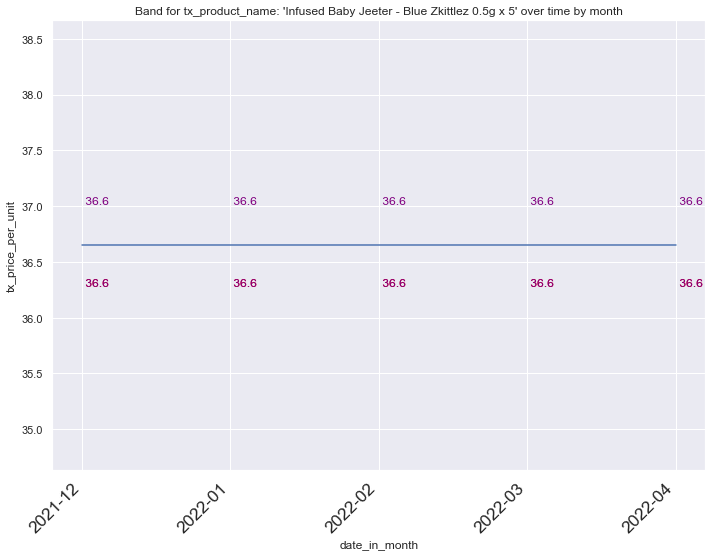

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-12                        36.65                  36.65
2022-01                        36.65                  36.65
2022-02                        36.65                  36.65
2022-03                        36.65                  36.65
2022-04                        36.65                  36.65
GHCBaby Jeeter - Tropicana Cookies
GHCBaby Jeeter - Blue Zkittlez
GHCInfused Baby Jeeter - Strawberry Shortcake
GHCInfused Baby Jeeter Grape Ape
GHCBaby Jeeter - Blueberry Kush
GHCInfused Baby Jeeter Durban Poison
GHCBaby Jeeter - Fire OG
GHCBaby Jeeter - Grapefruit Romulan
GHCBaby Jeeter - Honeydew
GHCBaby Jeeter - Watermelon Zkittlez
GHCInfused Baby Jeeter - Mai Tai
GHCInfused Baby Jeeter - Apple Fritter 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 12.5 %


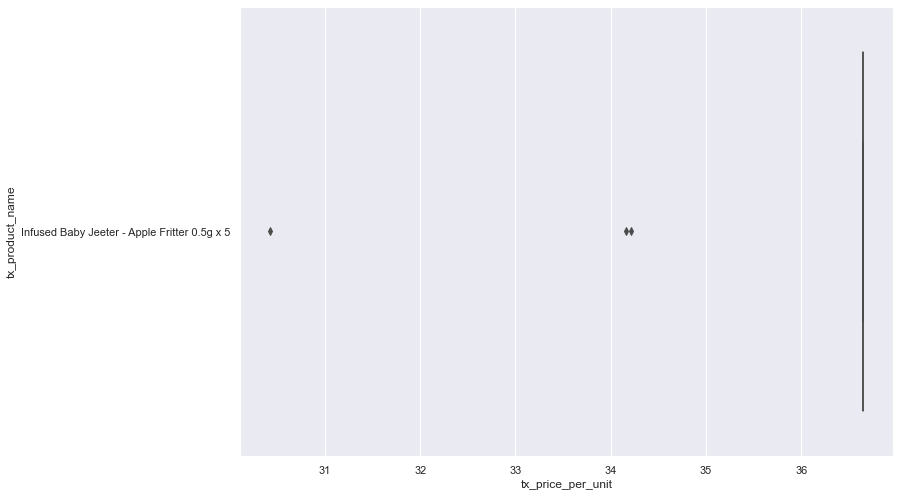

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Apple Fritter 0.5g x 5 in tx_product_name : 21


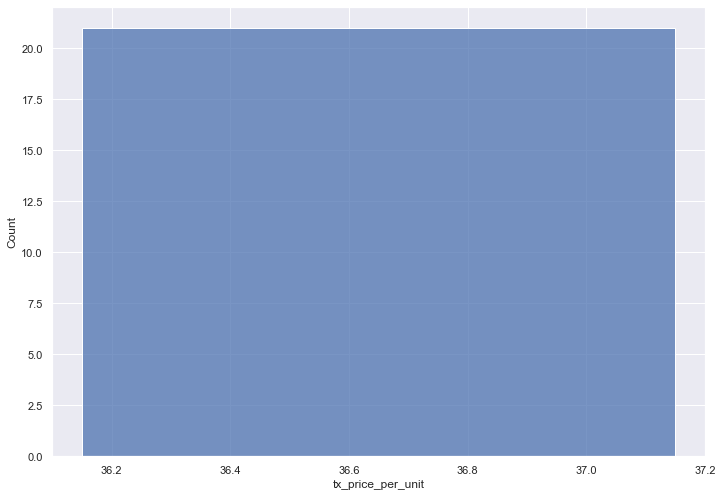

### Outputting summary table ### 	
count    21.00
mean     36.65
std       0.00
min      36.65
25%      36.65
50%      36.65
75%      36.65
max      36.65
Name: Infused Baby Jeeter - Apple Fritter 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean  std    min    25%    50%    75%    max
date_in_month                                                      
2022-01          1.0  36.65  NaN  36.65  36.65  36.65  36.65  36.65
2022-02         12.0  36.65  0.0  36.65  36.65  36.65  36.65  36.65
2022-03          8.0  36.65  0.0  36.65  36.65  36.65  36.65  36.65
### Outputting time series line plot of MSRP along with confidence bands ### 	


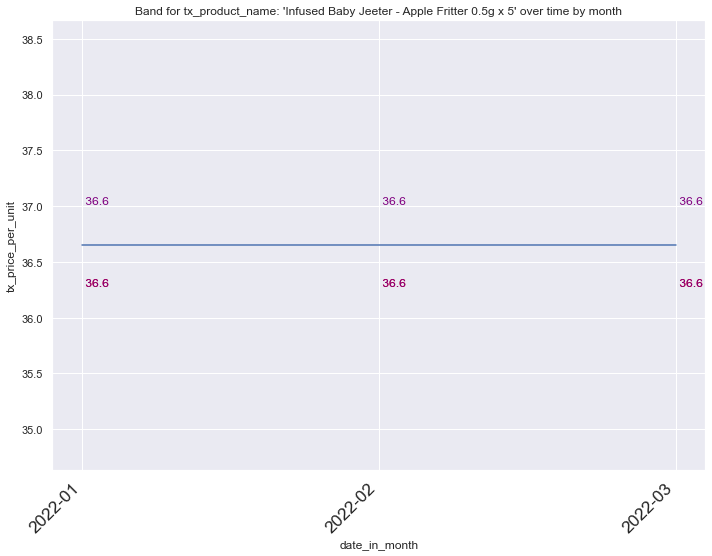

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-01                        36.65                  36.65
2022-02                        36.65                  36.65
2022-03                        36.65                  36.65
GHCInfused Baby Jeeter - Watermelon Zkittlez 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 18.181818181818183 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


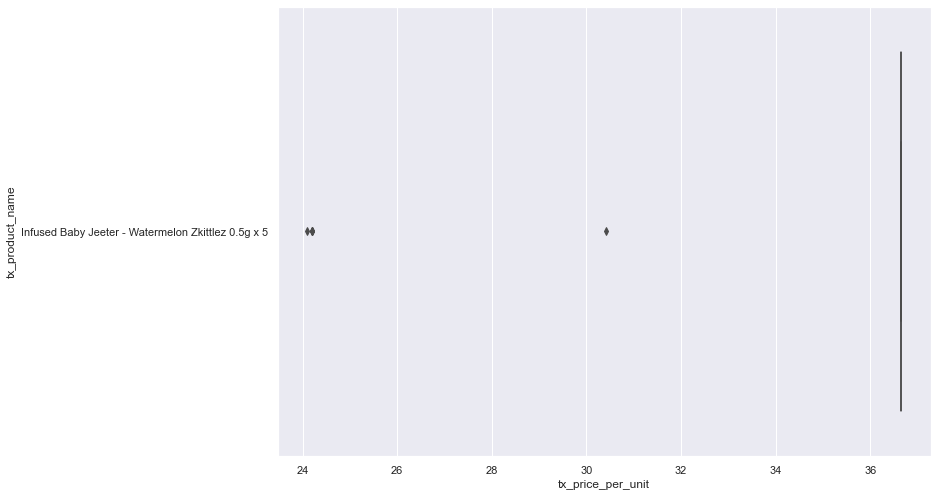

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Watermelon Zkittlez 0.5g x 5 in tx_product_name : 27


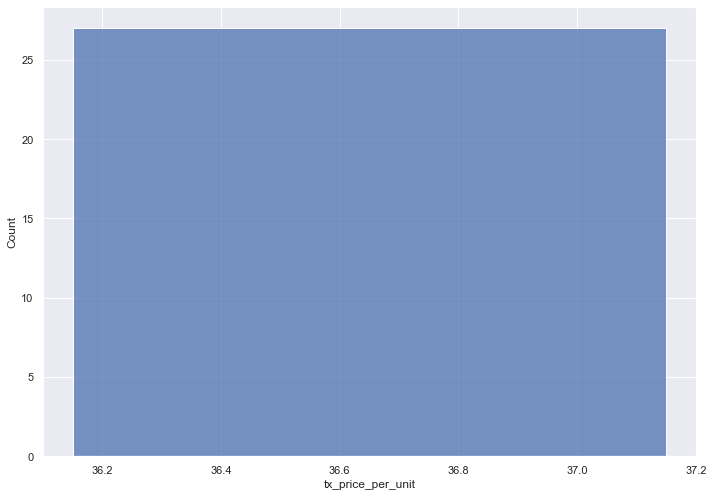

### Outputting summary table ### 	
count    27.00
mean     36.65
std       0.00
min      36.65
25%      36.65
50%      36.65
75%      36.65
max      36.65
Name: Infused Baby Jeeter - Watermelon Zkittlez 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean  std    min    25%    50%    75%    max
date_in_month                                                      
2021-12          2.0  36.65  0.0  36.65  36.65  36.65  36.65  36.65
2022-01         20.0  36.65  0.0  36.65  36.65  36.65  36.65  36.65
2022-05          5.0  36.65  0.0  36.65  36.65  36.65  36.65  36.65
### Outputting time series line plot of MSRP along with confidence bands ### 	


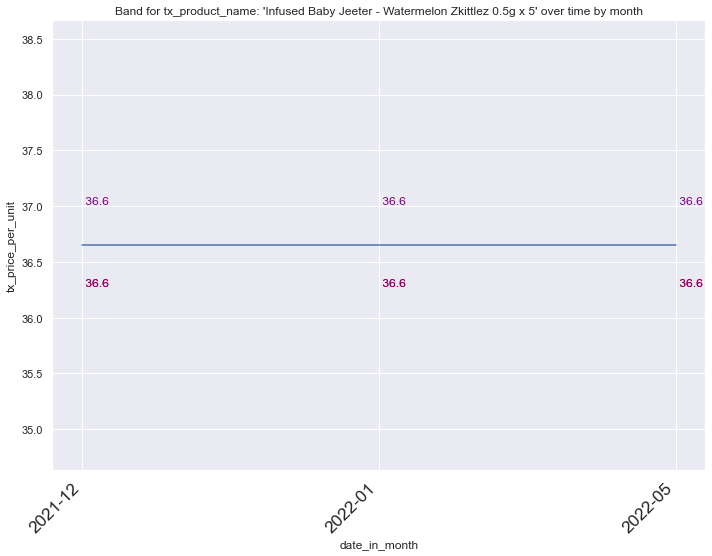

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2021-12                        36.65                  36.65
2022-01                        36.65                  36.65
2022-05                        36.65                  36.65
GHCInfused Baby Jeeter - Strawberry Shortcake 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


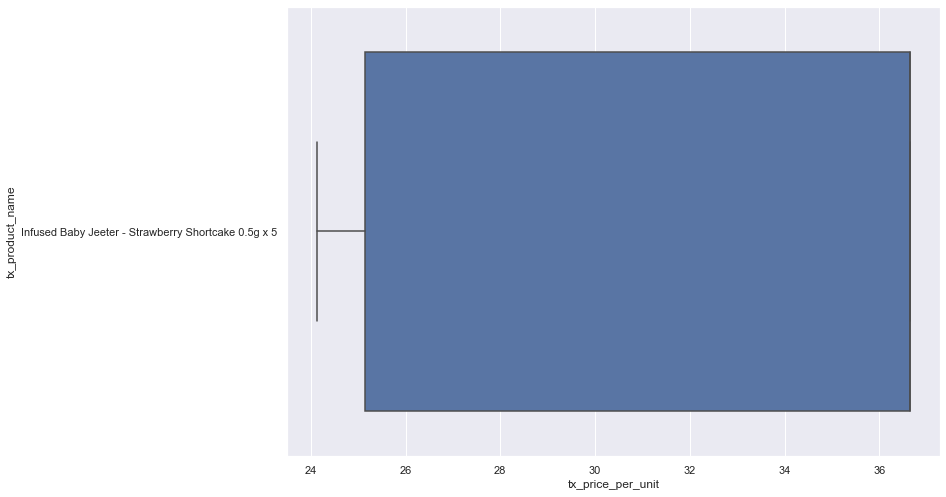

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Strawberry Shortcake 0.5g x 5 in tx_product_name : 7


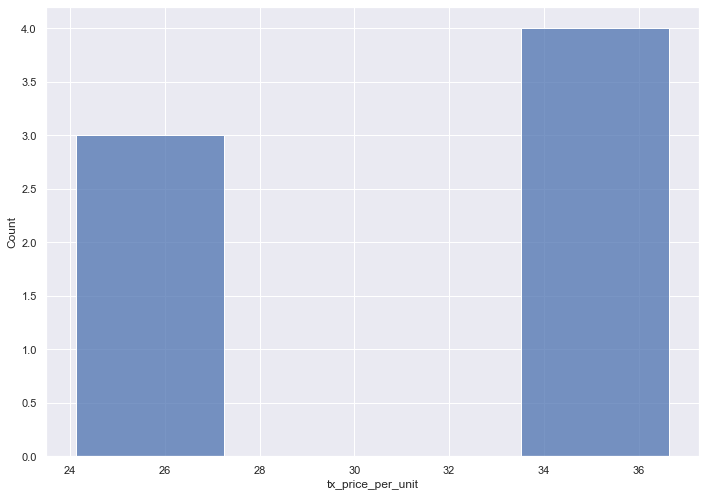

### Outputting summary table ### 	
count     7.00
mean     31.57
std       6.36
min      24.12
25%      25.14
50%      36.65
75%      36.65
max      36.65
Name: Infused Baby Jeeter - Strawberry Shortcake 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2022-05          7.0  31.57  6.36  24.12  25.14  36.65  36.65  36.65
### Outputting time series line plot of MSRP along with confidence bands ### 	


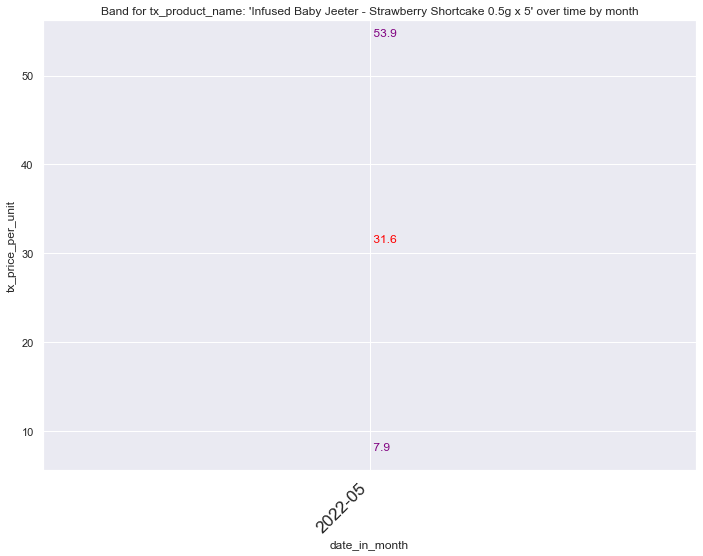

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-05                       7.8875                53.9075
GHCInfused Baby Jeeter - Grape Ape 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 20.833333333333336 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


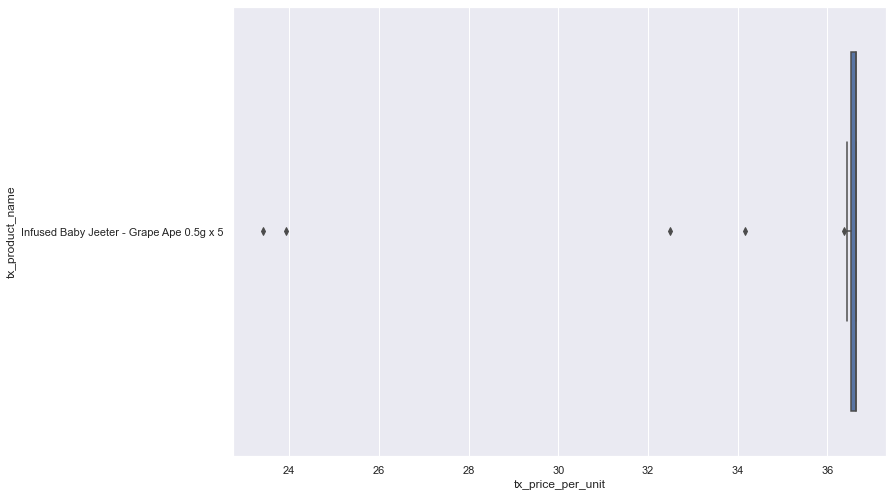

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Grape Ape 0.5g x 5 in tx_product_name : 19


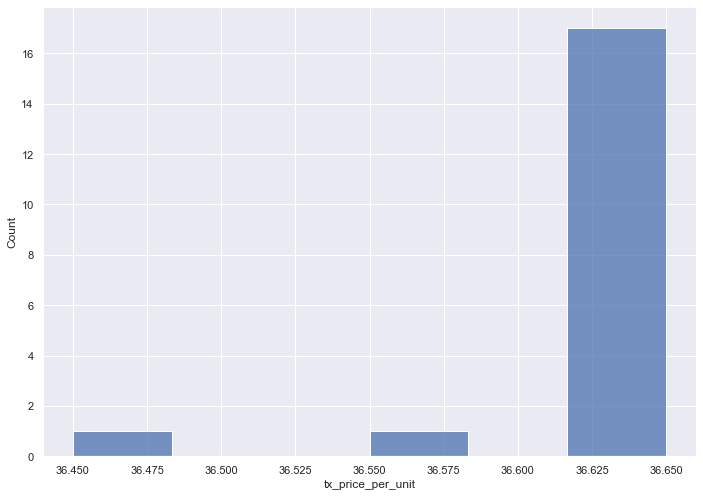

### Outputting summary table ### 	
count    19.00
mean     36.64
std       0.05
min      36.45
25%      36.65
50%      36.65
75%      36.65
max      36.65
Name: Infused Baby Jeeter - Grape Ape 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2022-03          9.0  36.64  0.03  36.57  36.65  36.65  36.65  36.65
2022-04         10.0  36.63  0.06  36.45  36.65  36.65  36.65  36.65
### Outputting time series line plot of MSRP along with confidence bands ### 	


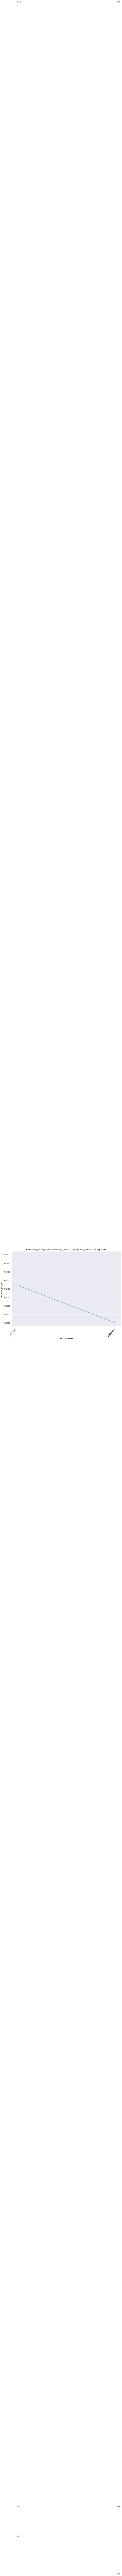

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-03                        36.65                  36.65
2022-04                        36.65                  36.65
GHCInfused Baby Jeeter - Peach Ringz 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 21.73913043478261 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


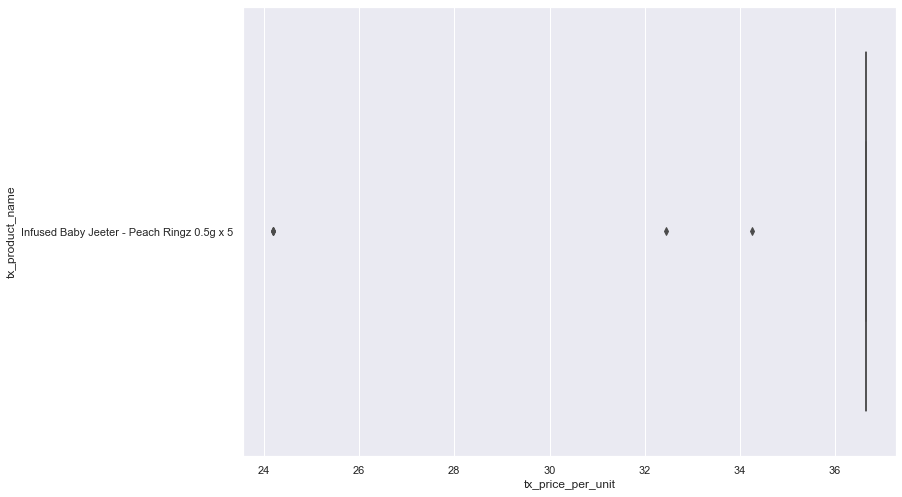

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Peach Ringz 0.5g x 5 in tx_product_name : 18


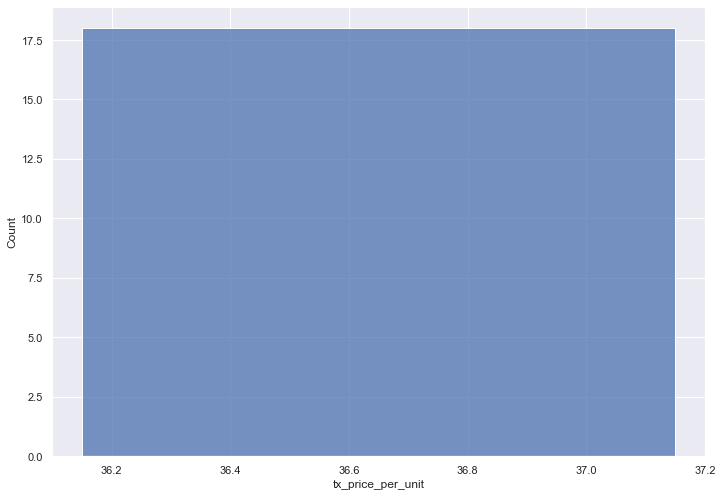

### Outputting summary table ### 	
count    18.00
mean     36.65
std       0.00
min      36.65
25%      36.65
50%      36.65
75%      36.65
max      36.65
Name: Infused Baby Jeeter - Peach Ringz 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean  std    min    25%    50%    75%    max
date_in_month                                                      
2022-03         18.0  36.65  0.0  36.65  36.65  36.65  36.65  36.65
### Outputting time series line plot of MSRP along with confidence bands ### 	


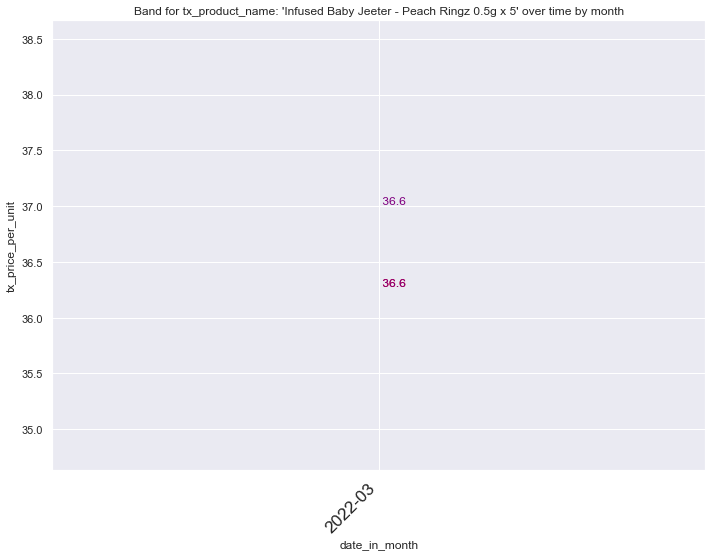

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-03                        36.65                  36.65
GHCInfused Baby Jeeter - Maui Wowie 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 8.333333333333332 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.083333333333333 %


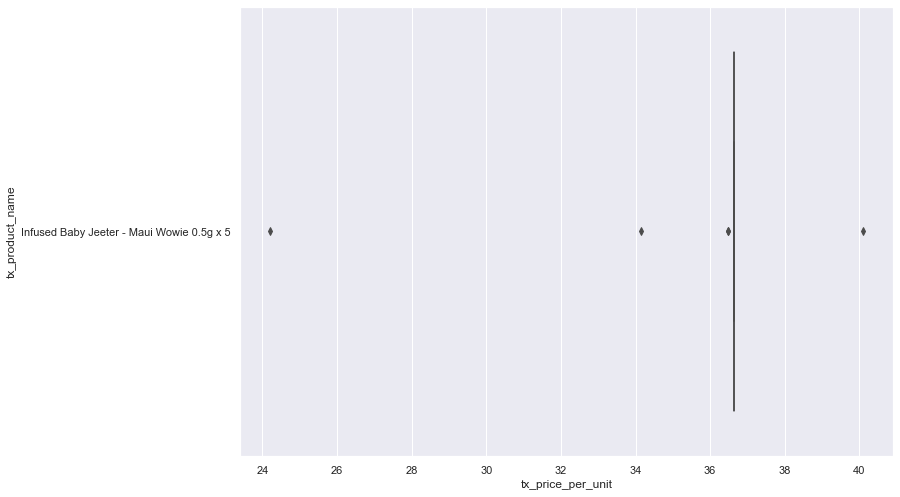

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Maui Wowie 0.5g x 5 in tx_product_name : 43


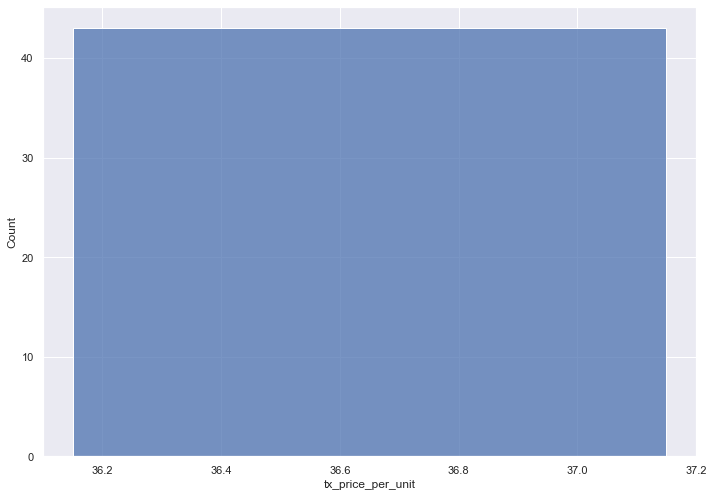

### Outputting summary table ### 	
count    43.00
mean     36.65
std       0.00
min      36.65
25%      36.65
50%      36.65
75%      36.65
max      36.65
Name: Infused Baby Jeeter - Maui Wowie 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean  std    min    25%    50%    75%    max
date_in_month                                                      
2022-01          5.0  36.65  0.0  36.65  36.65  36.65  36.65  36.65
2022-02         16.0  36.65  0.0  36.65  36.65  36.65  36.65  36.65
2022-03         22.0  36.65  0.0  36.65  36.65  36.65  36.65  36.65
### Outputting time series line plot of MSRP along with confidence bands ### 	


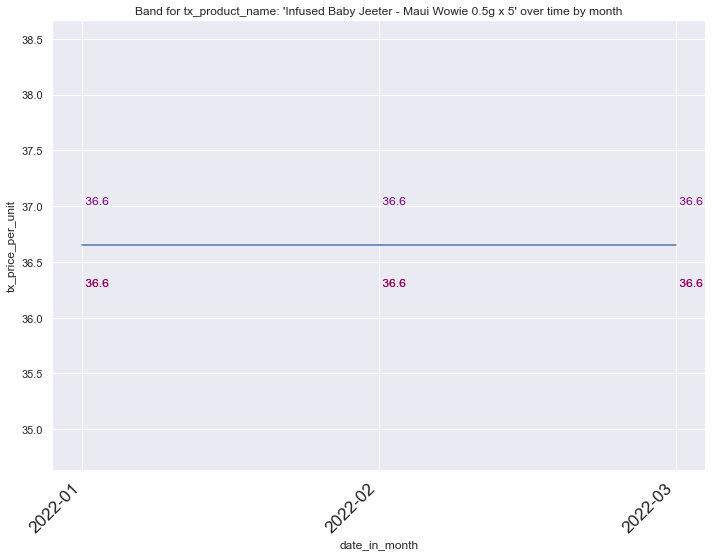

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-01                        36.65                  36.65
2022-02                        36.65                  36.65
2022-03                        36.65                  36.65
GHCInfused Baby Jeeter - Blueberry Kush 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


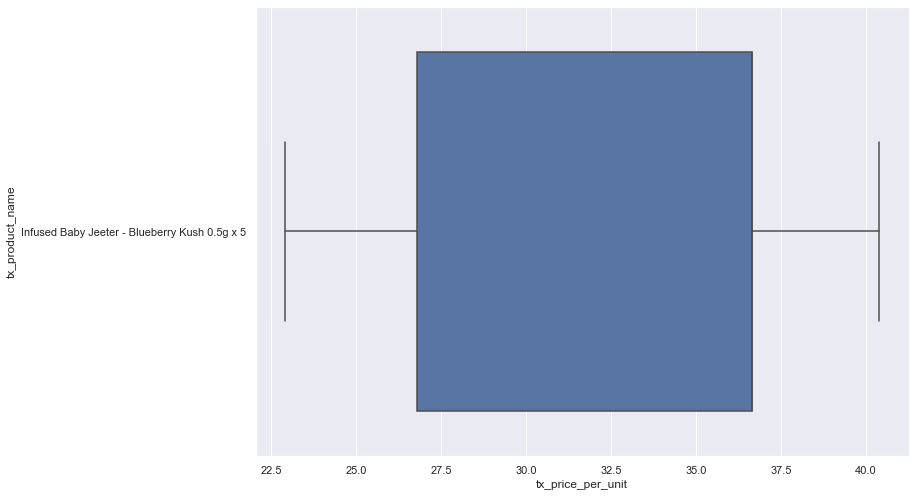

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Blueberry Kush 0.5g x 5 in tx_product_name : 46


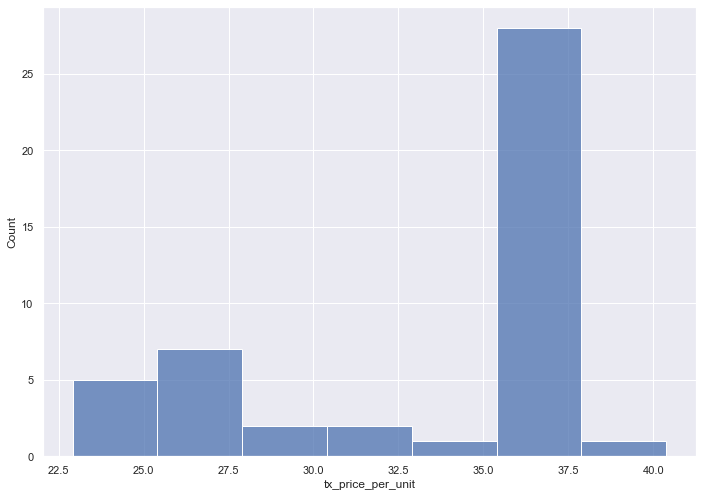

### Outputting summary table ### 	
count    46.00
mean     33.08
std       5.26
min      22.91
25%      26.78
50%      36.65
75%      36.65
max      40.38
Name: Infused Baby Jeeter - Blueberry Kush 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%    max
date_in_month                                                       
2022-03         13.0  35.79  3.81  23.78  36.65  36.65  36.65  40.38
2022-04         30.0  32.01  5.28  23.38  26.27  36.65  36.65  36.65
2022-05          3.0  32.07  7.93  22.91  29.78  36.65  36.65  36.65
### Outputting time series line plot of MSRP along with confidence bands ### 	


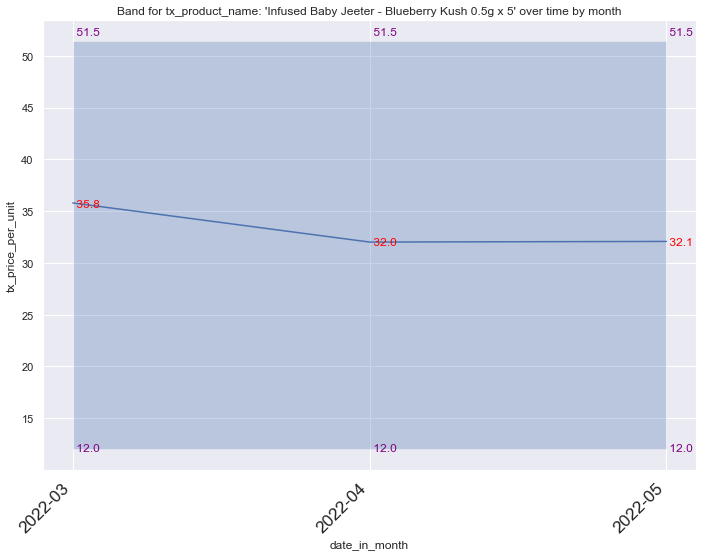

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-03                     11.98125               51.45125
2022-04                     11.98125               51.45125
2022-05                     11.98125               51.45125
GHCInfused Baby Jeeter - Gelato #33
GHCBaby Jeeter - Maui Wowie
GHCInfused Baby Jeeter - Banana Kush 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 16.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


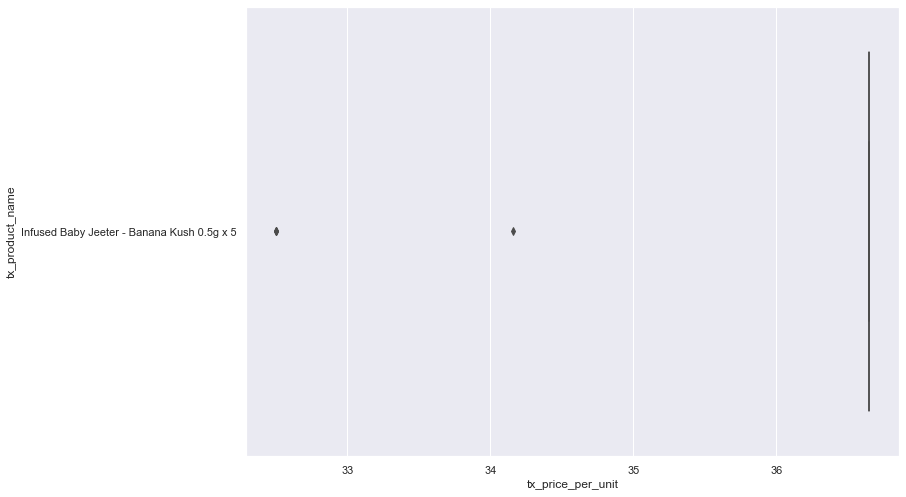

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Banana Kush 0.5g x 5 in tx_product_name : 21


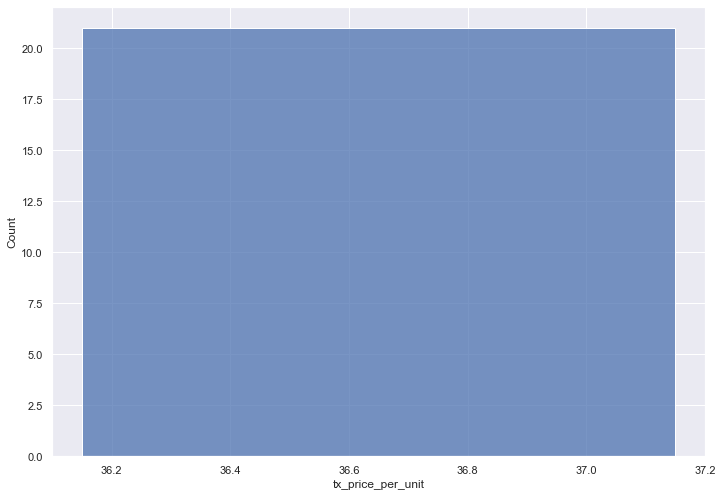

### Outputting summary table ### 	
count    21.00
mean     36.65
std       0.00
min      36.65
25%      36.65
50%      36.65
75%      36.65
max      36.65
Name: Infused Baby Jeeter - Banana Kush 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean  std    min    25%    50%    75%    max
date_in_month                                                      
2022-02         21.0  36.65  0.0  36.65  36.65  36.65  36.65  36.65
### Outputting time series line plot of MSRP along with confidence bands ### 	


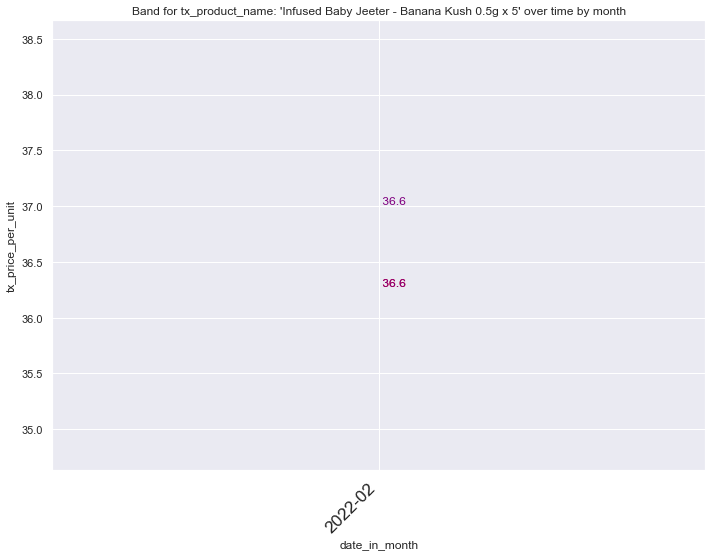

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-02                        36.65                  36.65
GHCInfused Baby Jeeter - Churros 0.5g x 5
### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 17.391304347826086 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %


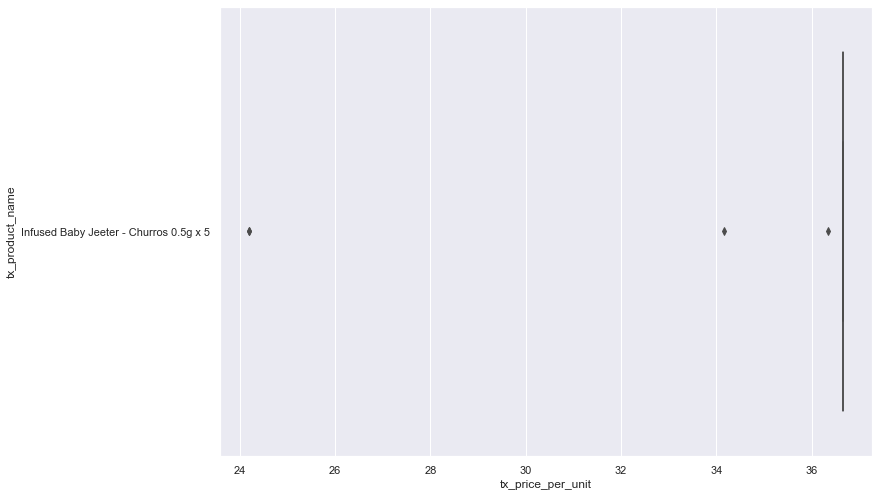

### Checking histogram distribution of MSRP for given tx_product_name ### 	
Total number of transactions for Infused Baby Jeeter - Churros 0.5g x 5 in tx_product_name : 19


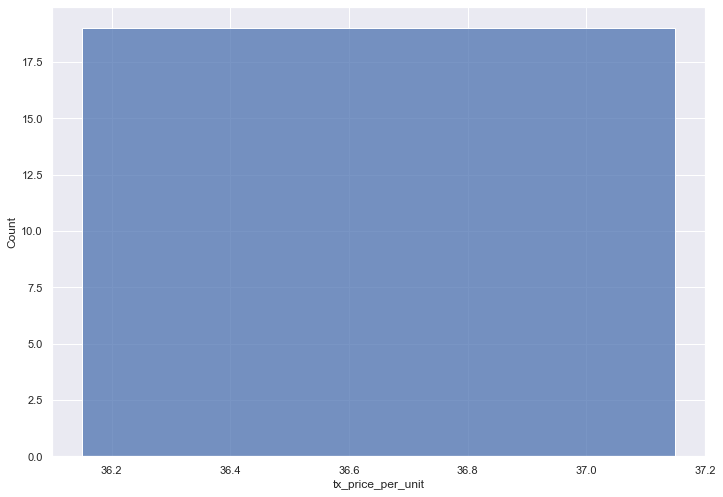

### Outputting summary table ### 	
count    19.00
mean     36.65
std       0.00
min      36.65
25%      36.65
50%      36.65
75%      36.65
max      36.65
Name: Infused Baby Jeeter - Churros 0.5g x 5, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean  std    min    25%    50%    75%    max
date_in_month                                                      
2022-01         19.0  36.65  0.0  36.65  36.65  36.65  36.65  36.65
### Outputting time series line plot of MSRP along with confidence bands ### 	


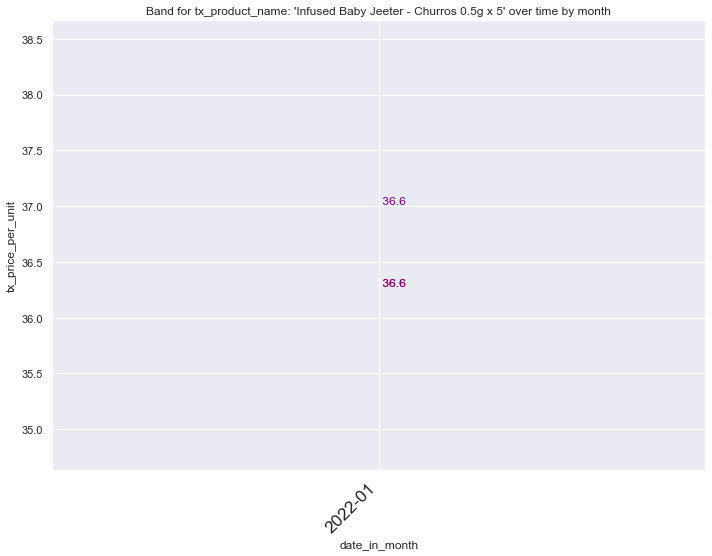

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2022-01                        36.65                  36.65
GHCBaby Jeeter - Limoncello
GHCBaby Jeeter - Banana Kush
GHCInfused Baby Jeeter - Peach Ringz
GHCJeeter Juice 1g Vape Cartridge Strawberry Cheesecake
SV
Verifying download summaries for license C9-0000146-LIC...
Earliest download summary: 2021-01-01
Latest download summary: 2022-05-11

[SUCCESS] All download summaries look good!
[SUCCESS] No unknown transfer packages!
96.0% of incoming transfer packages have receiver wholesale price
# transactions missing incoming transfer package: 10338 (7.550945876853407%)
# transactions total: 136910
# receipts with mismatching transactions: 0 (0.0%)
# receipts missing transactions: 15 (0.03687950237258132%)
# receipts total: 40673
### Adding new columns calculated by average price per unit ### 	
### Sorting time series ### 	
### Removing NAs from product category row ### 

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['edible' 'topical' 'vape cartridge' 'tincture' 'pre-roll flower'
 'extract' 'flower' 'capsule' 'pre-roll infused' 'seeds'
 'other concentrate' 'pre-roll leaf' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['tincture' 'flower' 'topical' 'vape cartridge' 'edible'
 'other concentrate' 'pre-roll flower' 'extract' 'pre-roll infused'
 'seeds' 'capsule' 'infused butter/oil' 'pre-roll leaf']
SVInfused jeeter 1g - Maui Wowie
SVInfused Baby Jeeter - Blue Zkittlez 0.5g x 5
SVBaby Jeeter - Tropicana Cookies
SVBaby Jeeter - Blue Zkittlez
SVInfused Baby Jeeter - Strawberry Shortcake
SVInfused Baby Jeeter Grape Ape
SVBaby Jeeter - Blueberry Kush
SVInfused Baby Jeeter Durban Poison
SVBaby Jeeter - Fire OG
SVBaby Jeeter - Grapefruit Romulan
SVBaby Jeeter - Honeydew
SVBaby Jeeter - Watermelon Zkittlez
SVInfused Baby Jeeter - Mai Tai
SVInfused Baby Jeeter - Apple Fritter 0.5g x 5
SVInfused

/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_measure_from_product_name'][count_measure_non_na_index] = df['count_measure_from_product_name'][count_measure_non_na_index].apply(mba_util.extract_count_units)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
/Users/victoria/dev/platform/services/api-server/script

### Combining same product categories with different measurements ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:349: SettingWithCopyWarn

### Breaking down product names into different brands ### 	


/Users/victoria/dev/platform/services/api-server/scripts/underwriting/msrp_band_analyzer.py:396: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (df[product_name].str.contains("^(1 ml)") == False) &


### Available combined product category name in costs dataframe ### 	
['flower' 'capsule' 'other concentrate' 'pre-roll leaf' 'vape cartridge'
 'extract' 'pre-roll flower' 'topical' 'tincture' 'edible' 'shake'
 'pre-roll infused' 'seeds']
### Available combined product category name in sales dataframe ### 	
['edible' 'flower' 'other concentrate' 'vape cartridge' 'extract'
 'tincture' 'pre-roll flower' 'pre-roll leaf' 'pre-roll infused' 'topical'
 'shake' 'capsule' 'seeds']
99HTInfused jeeter 1g - Maui Wowie
99HTInfused Baby Jeeter - Blue Zkittlez 0.5g x 5
99HTBaby Jeeter - Tropicana Cookies
99HTBaby Jeeter - Blue Zkittlez
99HTInfused Baby Jeeter - Strawberry Shortcake
99HTInfused Baby Jeeter Grape Ape
99HTBaby Jeeter - Blueberry Kush
99HTInfused Baby Jeeter Durban Poison
99HTBaby Jeeter - Fire OG
99HTBaby Jeeter - Grapefruit Romulan
99HTBaby Jeeter - Honeydew
99HTBaby Jeeter - Watermelon Zkittlez
99HTInfused Baby Jeeter - Mai Tai
99HTInfused Baby Jeeter - Apple Fritter 0.5g x 5
99HTInf

In [64]:
#cost + unit convert
sale_dict_minmax_prod = {}
for company in CA_COMPANY_IDENTIFIER_LIST: 
    print(company)
    mba = msrp_band_analyzer.MSRPBand()
    mba.update_company_data([company])
    mba.output_time_series_metadata()
    for c in ca_prod_list_sale:
        print(company + c)
        k = company + '-' + c
        if mba.company_sales_df[mba.company_sales_df['tx_product_name'] == c].shape[0] == 0:
            continue
        else:
            _ = mba.run_analysis('tx_product_name', c, 'S','minmax',use_unit_converted_price = False,ignore_non_unit_extractable_rows = False)
            sale_dict_minmax_prod[k] = mba.msrp_summary_table_by_time


In [65]:
sale_dict_minmax_prod.keys()

dict_keys(['EMA-Infused Baby Jeeter - Apple Fritter 0.5g x 5', 'EMA-Infused Baby Jeeter - Grape Ape 0.5g x 5', 'EMA-Infused Baby Jeeter - Blueberry Kush 0.5g x 5', 'EMM-Infused Baby Jeeter - Apple Fritter 0.5g x 5', 'EMM-Infused Baby Jeeter - Grape Ape 0.5g x 5', 'EMM-Infused Baby Jeeter - Blueberry Kush 0.5g x 5', 'EMT-Infused Baby Jeeter - Apple Fritter 0.5g x 5', 'EMT-Infused Baby Jeeter - Blueberry Kush 0.5g x 5', 'EMF-Infused Baby Jeeter - Apple Fritter 0.5g x 5', 'EMF-Infused Baby Jeeter - Grape Ape 0.5g x 5', 'EMF-Infused Baby Jeeter - Blueberry Kush 0.5g x 5', 'ST-Infused jeeter 1g - Maui Wowie', 'ST-Infused Baby Jeeter - Blue Zkittlez 0.5g x 5', 'ST-Baby Jeeter - Tropicana Cookies', 'ST-Baby Jeeter - Blue Zkittlez', 'ST-Infused Baby Jeeter - Strawberry Shortcake', 'ST-Infused Baby Jeeter Grape Ape', 'ST-Baby Jeeter - Blueberry Kush', 'ST-Infused Baby Jeeter Durban Poison', 'ST-Baby Jeeter - Fire OG', 'ST-Baby Jeeter - Honeydew', 'ST-Baby Jeeter - Watermelon Zkittlez', 'ST-Infu

In [103]:
ca_prod_list_sale


['Infused jeeter 1g - Maui Wowie',
 'Infused Baby Jeeter - Blue Zkittlez 0.5g x 5',
 'Baby Jeeter - Tropicana Cookies',
 'Baby Jeeter - Blue Zkittlez',
 'Infused Baby Jeeter - Strawberry Shortcake',
 'Infused Baby Jeeter Grape Ape',
 'Baby Jeeter - Blueberry Kush',
 'Infused Baby Jeeter Durban Poison',
 'Baby Jeeter - Fire OG',
 'Baby Jeeter - Grapefruit Romulan',
 'Baby Jeeter - Honeydew',
 'Baby Jeeter - Watermelon Zkittlez',
 'Infused Baby Jeeter - Mai Tai',
 'Infused Baby Jeeter - Apple Fritter 0.5g x 5',
 'Infused Baby Jeeter - Watermelon Zkittlez 0.5g x 5',
 'Infused Baby Jeeter - Strawberry Shortcake 0.5g x 5',
 'Infused Baby Jeeter - Grape Ape 0.5g x 5',
 'Infused Baby Jeeter - Peach Ringz 0.5g x 5',
 'Infused Baby Jeeter - Maui Wowie 0.5g x 5',
 'Infused Baby Jeeter - Blueberry Kush 0.5g x 5',
 'Infused Baby Jeeter - Gelato #33',
 'Baby Jeeter - Maui Wowie',
 'Infused Baby Jeeter - Banana Kush 0.5g x 5',
 'Infused Baby Jeeter - Churros 0.5g x 5',
 'Baby Jeeter - Limoncello',
 

In [ ]:
Baby Jeeter - Banana Kush
Baby Jeeter - Blue Zkittlez
Baby Jeeter - Blueberry Kush
Baby Jeeter - Fire OG
Baby Jeeter - Grapefruit Romulan
Baby Jeeter - Honeydew
Baby Jeeter - Limoncello
Baby Jeeter - Maui Wowie
Baby Jeeter - Tropicana Cookies
Baby Jeeter - Watermelon Zkittlez


In [111]:
p_list = []
for company in CA_COMPANY_IDENTIFIER_LIST:
    k = company + '-' + 'Baby Jeeter - Banana Kush'
    if k not in list(sale_dict_minmax_prod.keys()):
        continue
    else:
        data = pd.DataFrame({k:sale_dict_minmax_prod[k]['mean']})
        p_list.append(data)
    p_list_df = pd.concat(p_list,axis = 1).sort_values(by = 'date_in_month')
    
p1_list = []
for company in CA_COMPANY_IDENTIFIER_LIST:
    k = company + '-' + 'Baby Jeeter - Blue Zkittlez'
    if k not in list(sale_dict_minmax_prod.keys()):
        continue
    else:
        data = pd.DataFrame({k:sale_dict_minmax_prod[k]['mean']})
        p1_list.append(data)
    p1_list_df = pd.concat(p1_list,axis = 1).sort_values(by = 'date_in_month')
    
p2_list = []
for company in CA_COMPANY_IDENTIFIER_LIST:
    k = company + '-' + 'Baby Jeeter - Blueberry Kush'
    if k not in list(sale_dict_minmax_prod.keys()):
        continue
    else:
        data = pd.DataFrame({k:sale_dict_minmax_prod[k]['mean']})
        p2_list.append(data)
    p2_list_df = pd.concat(p2_list,axis = 1).sort_values(by = 'date_in_month')
    
p3_list = []
for company in CA_COMPANY_IDENTIFIER_LIST:
    k = company + '-' + 'Baby Jeeter - Fire OG'
    if k not in list(sale_dict_minmax_prod.keys()):
        continue
    else:
        data = pd.DataFrame({k:sale_dict_minmax_prod[k]['mean']})
        p3_list.append(data)
    p3_list_df = pd.concat(p3_list,axis = 1).sort_values(by = 'date_in_month')

p4_list = []
for company in CA_COMPANY_IDENTIFIER_LIST:
    k = company + '-' + 'Baby Jeeter - Grapefruit Romulan'
    if k not in list(sale_dict_minmax_prod.keys()):
        continue
    else:
        data = pd.DataFrame({k:sale_dict_minmax_prod[k]['mean']})
        p4_list.append(data)
    p4_list_df = pd.concat(p4_list,axis = 1).sort_values(by = 'date_in_month')
    
p5_list = []
for company in CA_COMPANY_IDENTIFIER_LIST:
    k = company + '-' + 'Baby Jeeter - Honeydew'
    if k not in list(sale_dict_minmax_prod.keys()):
        continue
    else:
        data = pd.DataFrame({k:sale_dict_minmax_prod[k]['mean']})
        p5_list.append(data)
    p5_list_df = pd.concat(p5_list,axis = 1).sort_values(by = 'date_in_month')
    
p6_list = []
for company in CA_COMPANY_IDENTIFIER_LIST:
    k = company + '-' + 'Baby Jeeter - Limoncello'
    if k not in list(sale_dict_minmax_prod.keys()):
        continue
    else:
        data = pd.DataFrame({k:sale_dict_minmax_prod[k]['mean']})
        p6_list.append(data)
    p6_list_df = pd.concat(p6_list,axis = 1).sort_values(by = 'date_in_month')
    
p7_list = []
for company in CA_COMPANY_IDENTIFIER_LIST:
    k = company + '-' + 'Baby Jeeter - Maui Wowie'
    if k not in list(sale_dict_minmax_prod.keys()):
        continue
    else:
        data = pd.DataFrame({k:sale_dict_minmax_prod[k]['mean']})
        p7_list.append(data)
    p7_list_df = pd.concat(p7_list,axis = 1).sort_values(by = 'date_in_month')
    
p8_list = []
for company in CA_COMPANY_IDENTIFIER_LIST:
    k = company + '-' + 'Baby Jeeter - Tropicana Cookies'
    if k not in list(sale_dict_minmax_prod.keys()):
        continue
    else:
        data = pd.DataFrame({k:sale_dict_minmax_prod[k]['mean']})
        p8_list.append(data)
    p8_list_df = pd.concat(p8_list,axis = 1).sort_values(by = 'date_in_month')

p9_list = []
for company in CA_COMPANY_IDENTIFIER_LIST:
    k = company + '-' + 'Baby Jeeter - Watermelon Zkittlez'
    if k not in list(sale_dict_minmax_prod.keys()):
        continue
    else:
        data = pd.DataFrame({k:sale_dict_minmax_prod[k]['mean']})
        p9_list.append(data)
    p9_list_df = pd.concat(p9_list,axis = 1).sort_values(by = 'date_in_month')

In [118]:
pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(\
                p_list_df,p1_list_df,on = 'date_in_month',how = 'outer'),\
                p2_list_df,on = 'date_in_month',how = 'outer'),\
                p3_list_df,on = 'date_in_month',how = 'outer'),\
                p4_list_df,on = 'date_in_month',how = 'outer'),\
                p5_list_df,on = 'date_in_month',how = 'outer'),\
                p6_list_df,on = 'date_in_month',how = 'outer'),\
                p7_list_df,on = 'date_in_month',how = 'outer'),\
                p8_list_df,on = 'date_in_month',how = 'outer'),\
                p9_list_df,on = 'date_in_month',how = 'outer').sort_values(by = 'date_in_month')

         
         


GRG-Baby Jeeter - Banana Kush  ST-Baby Jeeter - Blue Zkittlez  \
date_in_month                                                                  
2020-11                                  NaN                             NaN   
2020-12                                  NaN                             NaN   
2021-01                                  NaN                             NaN   
2021-02                                43.58                             NaN   
2021-03                                42.52                             NaN   
2021-04                                  NaN                             NaN   
2021-05                                42.47                             NaN   
2021-06                                42.72                             NaN   
2021-07                                  NaN                           35.19   
2021-08                                  NaN                             NaN   
2021-09                                  NaN                             NaN   
2021-10                                24.19                             NaN   
2021-11                                  NaN                             NaN   
2021-12                                  NaN                             NaN   
2022-01                                  NaN                             NaN   

               GRG-Baby Jeeter - Blue Zkittlez  \
date_in_month                                    
2020-11                                  42.47   
2020-12                                  43.47   
2021-01                                    NaN   
2021-02                                  46.91   
2021-03                                  42.38   
2021-04                                  43.30   
2021-05                                  42.62   
2021-06                                  43.08   
2021-07                                    NaN   
2021-08                                  24.19   
2021-09                                  24.19   
2021-10                                  24.19   
2021-11                                  24.19   
2021-12                                    NaN   
2022-01                                    NaN   

               ST-Baby Jeeter - Blueberry Kush  \
date_in_month                                    
2020-11                                    NaN   
2020-12                                    NaN   
2021-01                                    NaN   
2021-02                                    NaN   
2021-03                                    NaN   
2021-04                                    NaN   
2021-05                                    NaN   
2021-06                                    NaN   
2021-07                                    NaN   
2021-08                                    NaN   
2021-09                                  37.11   
2021-10                                    NaN   
2021-11                                    NaN   
2021-12                                    NaN   
2022-01                                    NaN   

               GRG-Baby Jeeter - Blueberry Kush  ST-Baby Jeeter - Fire OG  \
date_in_month                                                               
2020-11                                     NaN                       NaN   
2020-12                                     NaN                       NaN   
2021-01                                     NaN                       NaN   
2021-02                                     NaN                       NaN   
2021-03                                     NaN                       NaN   
2021-04                                     NaN                       NaN   
2021-05                                     NaN                       NaN   
2021-06                                     NaN                     36.51   
2021-07                                     NaN                       NaN   
2021-08                                     NaN                       NaN   
2021-09                     

In [109]:
pd.merge(p1_list_df,p_list_df,on = 'date_in_month',how = 'outer').sort_values(by = 'date_in_month')

ST-Infused Baby Jeeter - Gelato #33  \
date_in_month                                        
2020-11                                        NaN   
2020-12                                        NaN   
2021-01                                        NaN   
2021-02                                        NaN   
2021-03                                        NaN   
2021-04                                      35.08   
2021-05                                      36.49   
2021-06                                        NaN   
2021-08                                      35.55   
2021-09                                      35.64   
2021-10                                        NaN   
2021-11                                        NaN   
2022-01                                        NaN   
2022-02                                        NaN   

               GRG-Infused Baby Jeeter - Gelato #33  ST-Baby Jeeter - Fire OG  \
date_in_month                                                                   
2020-11                                         NaN                       NaN   
2020-12                                       44.10                       NaN   
2021-01                                       42.22                       NaN   
2021-02                                       43.75                       NaN   
2021-03                                       43.83                       NaN   
2021-04                                       41.91                       NaN   
2021-05                                       45.01                       NaN   
2021-06                                       46.91                     36.51   
2021-08                                         NaN                       NaN   
2021-09                                         NaN                       NaN   
2021-10                                       24.19                       NaN   
2021-11                                         NaN                       NaN   
2022-01                                       24.19                       NaN   
2022-02                                       28.22                       NaN   

               GRG-Baby Jeeter - Fire OG  
date_in_month                             
2020-11                            43.39  
2020-12                            41.99  
2021-01                            43.25  
2021-02                            42.69  
2021-03                              NaN  
2021-04                              NaN  
2021-05                              NaN  
2021-06                            37.68  
2021-08                            24.19  
2021-09                              NaN  
2021-10                              NaN  
2021-11                            24.19  
2022-01                              NaN  
2022-02                              NaN

In [107]:
p1_list_df

ST-Infused Baby Jeeter - Gelato #33  \
date_in_month                                        
2020-12                                        NaN   
2021-01                                        NaN   
2021-02                                        NaN   
2021-03                                        NaN   
2021-04                                      35.08   
2021-05                                      36.49   
2021-06                                        NaN   
2021-08                                      35.55   
2021-09                                      35.64   
2021-10                                        NaN   
2022-01                                        NaN   
2022-02                                        NaN   

               GRG-Infused Baby Jeeter - Gelato #33  
date_in_month                                        
2020-12                                       44.10  
2021-01                                       42.22  
2021-02                                       43.75  
2021-03                                       43.83  
2021-04                                       41.91  
2021-05                                       45.01  
2021-06                                       46.91  
2021-08                                         NaN  
2021-09                                         NaN  
2021-10                                       24.19  
2022-01                                       24.19  
2022-02                                       28.22

In [105]:
p_list_df

ST-Baby Jeeter - Fire OG  GRG-Baby Jeeter - Fire OG
date_in_month                                                     
2020-11                             NaN                      43.39
2020-12                             NaN                      41.99
2021-01                             NaN                      43.25
2021-02                             NaN                      42.69
2021-06                           36.51                      37.68
2021-08                             NaN                      24.19
2021-11                             NaN                      24.19

In [84]:
p_list_df

ST-Infused jeeter 1g - Maui Wowie  \
date_in_month                                      
2020-12                                      NaN   
2021-01                                      NaN   
2021-02                                      NaN   
2021-03                                      NaN   
2021-04                                    20.85   
2021-05                                    19.81   
2021-06                                    19.91   
2021-10                                      NaN   
2021-11                                      NaN   
2021-12                                      NaN   
2022-01                                      NaN   
2022-02                                      NaN   

               GRG-Infused jeeter 1g - Maui Wowie  
date_in_month                                      
2020-12                                     23.32  
2021-01                                     23.50  
2021-02                                     21.67  
2021-03                                     23.87  
2021-04                                     21.73  
2021-05                                     22.06  
2021-06                                     20.90  
2021-10                                     12.10  
2021-11                                     12.10  
2021-12                                     12.10  
2022-01                                     12.10  
2022-02                                     12.50

# Appendix

In [ ]:
# mba.run_time_series_plot_analysis_multi_category('product_category_name',ca_cat_list, 'C','minmax',use_unit_converted_price = False,ignore_non_unit_extractable_rows = False)
# mba.run_time_series_plot_analysis_multi_category('tx_product_category_name',ca_cat_list, 'S','minmax',use_unit_converted_price = False,ignore_non_unit_extractable_rows = False)


# from underwriting import msrp_band_analyzer_testing
# TESTING_COMPANY_NAMES = [
#     'EMA'
# ]
# mba_test = msrp_band_analyzer_testing.MSRPTest()
# mba_test.update_test_set(TESTING_COMPANY_NAMES)
